# CA Assignment 2

## Implementing Image Classification Algorithms

##### By
##### 1. By Chiamaka Jibuaku (201670698) and 
##### 2. Frank Enendu (201607044)

### Step 1. Indicate the imported packages/libraries

In [28]:
# Import necessary libraries for data manipulation
import pandas as pd                          # Pandas for data manipulation
import numpy as np                           # NumPy for numerical operations
import matplotlib.pyplot as plt             # Matplotlib for data visualization

# Import libraries for machine learning algorithms, mathematical operations, iterators, and time-related operations
from sklearn.metrics import accuracy_score   # Accuracy score metric
import math                                 # Math library for mathematical operations
import itertools                            # Itertools for creating iterators
import time                                 # Time library for time-related operations
import random                               # Random library for generating random numbers

# Import PyTorch libraries for deep learning algorithms
import torch                                # PyTorch for deep learning
import torch.nn as nn                       # PyTorch's neural network module
import torch.optim as optim                 # PyTorch's optimization module
import torchvision                          # PyTorch's computer vision module
import torchvision.datasets as datasets     # PyTorch's datasets module
import torchvision.transforms as transforms # PyTorch's transforms module for data preprocessing
from torch.autograd import Variable         # PyTorch's Variable for automatic differentiation
import torch.utils.data as data             # PyTorch's data handling module
from torch.utils.data import DataLoader     # PyTorch's DataLoader for creating data loaders
import torch.nn.functional as F            # PyTorch's functional module for activation functions

# Import libraries for data visualization and metrics calculations
import seaborn as sns                       # Seaborn for statistical graphics
from sklearn.metrics import confusion_matrix # Confusion matrix for performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Classification metrics

### Step 2. Load the dataset (you can import PyTorch dataset library to download the dataset)

###### Option 1 

In [2]:
# Define the transform to be applied to the input images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Download and load the training dataset
train_dataset = datasets.EMNIST(root='./data', split='balanced', train=True, transform=transform, download=True)

# Download and load the test dataset
test_set = datasets.EMNIST(root='./data', split='balanced', train=False, transform=transform, download=True)

In [4]:
# Define the sizes of each set
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Use random_split to split the dataset
train_set, val_set = data.random_split(train_dataset, [train_size, val_size])

In [5]:
# Define a dictionary to map the numeric labels to their corresponding names
label_names = {
  0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',  20: 'K',
  21: 'L', 22: 'M',  23: 'N',  24: 'O',  25: 'P',  26: 'Q',  27: 'R',  28: 'S',  29: 'T',  30: 'U',  31: 'V',  32: 'W',  33: 'X',  34: 'Y',  35: 'Z',  36: 'a',  37: 'b',  38: 'd',  39: 'e',
  40: 'f', 41: 'g',  42: 'h',  43: 'n',  44: 'q',  45: 'r',  46: 't'
}

### Step 3. Split data into a training dataset and a testing dataset (e.g., using DataLoader in PyTorch)

In [6]:
#Create data loaders for the training and test sets
#Define a data loader for the training set, which loads data in batches of 250 samples and shuffles the data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=250, shuffle=True)

#Define a data loader for the validation set, which loads data in batches of 250 samples and shuffles the data
val_loader = torch.utils.data.DataLoader(val_set, batch_size=250, shuffle=True)

#Define a data loader for the test set, which loads data in batches of 250 samples and shuffles the data
test_loader = torch.utils.data.DataLoader(test_set, batch_size=250, shuffle=True)

### Step 4. Understand the dataset and visualize the dataset:

##### i. Print out the number of training/testing samples in the dataset.

In [8]:
# This line of code prints the number of training samples and validation samples combined
print(f"Number of training samples: {len(train_set) + len(val_set)} ")
# This line of code prints the number of testing samples
print(f"Number of testing samples: {len(test_set)}")

Number of training samples: 112800 
Number of testing samples: 18800


###### ii. Plot some figures to visualize some samples in the dataset (we will provide the mapping .txt file for “Balanced” dataset, if you can implement mapping from the index to the classes by yourself, you can ignore the .txt file).

In [83]:
def plot_samples(dataset, label_names):
    """
    Plot sample images from a given dataset.

    Args:
        dataset: a PyTorch dataset object containing images and labels
        label_names: a list of label names corresponding to the labels in the dataset
    """
    # Create a figure with four subplots arranged in a 2x2 grid
    fig, axs = plt.subplots(4, 4, figsize=(5, 6))
    # Loop over the rows and columns of the subplot grid
    for i in range(4):
        for j in range(4):
            # Calculate the index of the current image in the dataset
            index = i * 2 + j
            # Get the image and label from the dataset
            img, label = dataset[index]
            # Get the label name corresponding to the current label index
            label_name = label_names[label]
            # Convert the PyTorch tensor image to a numpy array and reshape it
            img = img.squeeze().numpy()
            # Normalize the pixel values of the image to be between -1 and 1
            img = (img * 0.5) + 0.5
            # Display the image in the current subplot with its corresponding label name as the title
            axs[i][j].imshow(img, cmap='gray')
            axs[i][j].set_title(label_name)
            # Turn off the axis labels for the current subplot
            axs[i][j].axis('off')
    # Show the plot
    plt.show()

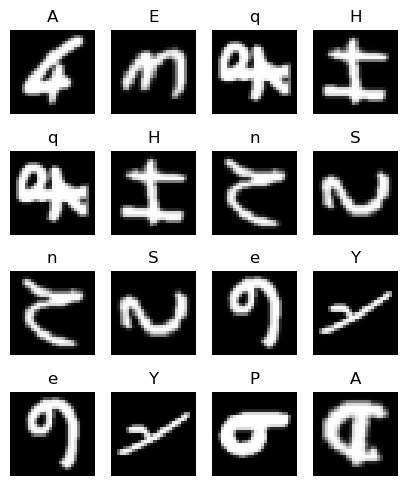

In [84]:
# Plot some sample images from the training set
plot_samples(train_set, label_names)

In [12]:
# Initialize an empty dictionary to store the label counts
label_counts = {}

# Loop over each sample in the train_set dataset
for i in range(len(train_set)):
    # Get the label index for the current sample
    label = train_set[i][1]
    # Get the corresponding label name from the label_names list
    label_name = label_names[label]
    # If the label name is already in the dictionary, increment its count by 1
    if label_name in label_counts:
        label_counts[label_name] += 1
    # Otherwise, add the label name to the dictionary with a count of 1
    else:
        label_counts[label_name] = 1

# Print the dictionary of label counts
print(label_counts)

{'A': 1916, 'E': 1917, 'q': 1939, 'H': 1915, 'n': 1913, 'S': 1942, 'e': 1926, 'Y': 1931, 'P': 1968, 'F': 1929, 'O': 1934, 'C': 1885, 'L': 1921, 'T': 1919, 'B': 1931, 'R': 1943, 'M': 1935, 'Q': 1933, '7': 1893, 'D': 1897, 'X': 1916, 'G': 1922, '4': 1901, '5': 1900, '9': 1909, 'f': 1901, 'h': 1926, 'g': 1901, 'W': 1896, 'b': 1940, '6': 1927, '3': 1886, '0': 1923, 'I': 1915, 'U': 1882, '8': 1923, 'd': 1937, 'N': 1946, 'Z': 1895, 't': 1941, 'V': 1876, '2': 1926, 'a': 1956, 'r': 1905, 'K': 1946, '1': 1912, 'J': 1945}


### Step-5: For the MLP, please complete the below steps, respectively, on the training dataset:

#### 1. For the techniques/hyperparameters you choose to explore, you can use cross-validation to find the most suitable combination (of those techniques/hyperparameters) under the evaluation metric of accuracy.

In [13]:
# Check if CUDA (GPU) is available, and if so, set the device to CUDA, otherwise set it to CPU
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [14]:
# Set the input size to be the total number of pixels in the input image (28x28=784)
input_size = 28*28

# Set the number of nodes in the hidden layer
hidden_size = 256

# Set the number of output classes. In this case, the output will be a number between 0 and 46 (inclusive),
# representing the class label for the input image.
num_classes = 47

# Set the batch size, which is the number of input samples used in each iteration of training.
batch_size = 250

# Set the learning rate for the optimizer. This controls how quickly the optimizer adjusts the model parameters
# to minimize the loss function.
lr = 0.01

# Set the number of epochs, which is the number of times the entire dataset is passed through the model during training.
epochs = 20

# Set the new_epoch variable, which is the optimised number of epoch 
new_epoch = ...

# Set the activation function for the hidden layer nodes. In this case, the 'relu' function is used.
activation = 'relu'

# Set the optimizer to be used during training. In this case, the Adam optimizer is used.
optimizer = optim.Adam

# Set the batch normalization flag. If True, batch normalization will be applied to the hidden layer output.
batch_norm = True

# Set the regularization parameter for the model. This controls the amount of regularization applied to the model
# to prevent overfitting.
regularization = 0.001

# Set the dropout rate for the model. This controls the percentage of hidden layer nodes that are randomly
# dropped out during each iteration of training to prevent overfitting.
dropout = 0.2

In [15]:
class MLP(nn.Module):
    """
    Multilayer Perceptron (MLP) model for classification.

    Args:
        input_size (int): Size of the input feature vector.
        hidden_size (int): Number of nodes in the hidden layers.
        num_classes (int): Number of output classes.
        activation (str): Activation function to be used ('relu', 'sigmoid', or 'tanh').
        batch_norm (bool): Whether to apply batch normalization after each fully connected layer.
        dropout (float): Dropout rate to be applied after each fully connected layer.
        regularization (float): Regularization strength to prevent overfitting.

    """

    def __init__(self, input_size, hidden_size, num_classes, activation, batch_norm, dropout, regularization):
        super(MLP, self).__init__()

        # Define the fully connected layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)

        # Store the hyperparameters
        self.activation = activation
        self.batch_norm = batch_norm
        self.dropout = dropout
        self.regularization = regularization

        # Add batch normalization if enabled
        if self.batch_norm:
            self.bn1 = nn.BatchNorm1d(hidden_size)
            self.bn2 = nn.BatchNorm1d(hidden_size)
            self.bn3 = nn.BatchNorm1d(hidden_size)

        # Add regularization if enabled
        if self.regularization:
            self.l1 = nn.L1Loss()
            self.l2 = nn.MSELoss()

    def forward(self, x):
        """
        Forward pass of the MLP model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, input_size).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes).

        """
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        out = self.fc1(x)
        if self.batch_norm:
            out = self.bn1(out)
        if self.activation == 'relu':
            out = F.relu(out)
        elif self.activation == 'sigmoid':
            out = F.sigmoid(out)
        elif self.activation == 'tanh':
            out = F.tanh(out)
        if self.dropout:
            out = F.dropout(out, p=self.dropout)
        out = self.fc2(out)
        if self.batch_norm:
            out = self.bn2(out)
        if self.activation == 'relu':
            out = F.relu(out)
        elif self.activation == 'sigmoid':
            out = F.sigmoid(out)
        elif self.activation == 'tanh':
            out = F.tanh(out)
        if self.dropout:
            out = F.dropout(out, p=self.dropout)
        out = self.fc3(out)
        if self.batch_norm:
            out = self.bn3(out)
        if self.activation == 'relu':
            out = F.relu(out)
        elif self.activation == 'sigmoid':
            out = F.sigmoid(out)
        elif self.activation == 'tanh':
            out = F.tanh(out)
        if self.dropout:
            out = F.dropout(out, p=self.dropout)
        out = self.fc4(out)
        return out

In [16]:
model = MLP(input_size, hidden_size, num_classes, activation, batch_norm, dropout, regularization).to(device)

# Define the loss function, optimiser and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimiser, mode='min', factor=0.1, patience=1, verbose=True)

accuracy = []
losses = []  # Update variable name from 'loss' to 'losses'
iter = []
# Train the model
startTime = time.time()
for epoch in range(epochs):
    correct = 0
    total = 0
    for images, labels in train_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        if regularization == 'l1':
            l1_regularization = torch.tensor(0, dtype=torch.float32)
            for param in model.parameters():
                l1_regularization += torch.norm(param, 1)
            loss += regularization * l1_regularization
        elif regularization == 'l2':
            l2_regularization = torch.tensor(0, dtype=torch.float32)
            for param in model.parameters():
                l2_regularization += torch.norm(param, 2)
            loss += regularization * l2_regularization

        # Backward and optimize
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step(loss)

    # Compute training accuracy for the epoch
    Accuracy = correct / total
    trainingAccuracy = 100 * Accuracy

    # Print the loss and accuracy after each epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {trainingAccuracy:.2f}%")

    accuracy.append(Accuracy)
    losses.append(loss.item())  # Update the list for storing loss values
    iter.append(epoch+1)

result = list(zip(iter, accuracy, losses))  # Update variable name in the zip function

endTime = time.time()
trainingTime = endTime - startTime
print(f"Training time: {trainingTime}")
result

Epoch [1/20], Loss: 0.7484, Training Accuracy: 67.90%
Epoch [2/20], Loss: 0.6814, Training Accuracy: 77.02%
Epoch [3/20], Loss: 0.7214, Training Accuracy: 79.20%
Epoch [4/20], Loss: 0.5713, Training Accuracy: 80.58%
Epoch [5/20], Loss: 0.5464, Training Accuracy: 81.23%
Epoch [6/20], Loss: 0.4877, Training Accuracy: 81.93%
Epoch [7/20], Loss: 0.4249, Training Accuracy: 82.62%
Epoch [8/20], Loss: 0.4286, Training Accuracy: 82.70%
Epoch 00009: reducing learning rate of group 0 to 1.0000e-03.
Epoch [9/20], Loss: 0.5882, Training Accuracy: 83.38%
Epoch [10/20], Loss: 0.4311, Training Accuracy: 85.39%
Epoch 00011: reducing learning rate of group 0 to 1.0000e-04.
Epoch [11/20], Loss: 0.4394, Training Accuracy: 86.27%
Epoch [12/20], Loss: 0.2847, Training Accuracy: 86.53%
Epoch [13/20], Loss: 0.3190, Training Accuracy: 86.50%
Epoch 00014: reducing learning rate of group 0 to 1.0000e-05.
Epoch [14/20], Loss: 0.3408, Training Accuracy: 86.63%
Epoch [15/20], Loss: 0.4438, Training Accuracy: 86.70

[(1, 0.6790226063829787, 0.748364269733429),
 (2, 0.7701795212765957, 0.6813874840736389),
 (3, 0.7919880319148936, 0.7213954329490662),
 (4, 0.8057513297872341, 0.5713140368461609),
 (5, 0.81228945035461, 0.5464386343955994),
 (6, 0.8193151595744681, 0.4876939654350281),
 (7, 0.8261857269503546, 0.4249267578125),
 (8, 0.8270168439716312, 0.42857256531715393),
 (9, 0.8338209219858156, 0.588184118270874),
 (10, 0.8538785460992908, 0.4310823082923889),
 (11, 0.862677304964539, 0.43937069177627563),
 (12, 0.865270390070922, 0.2846991717815399),
 (13, 0.8650487588652482, 0.31896644830703735),
 (14, 0.8662898936170212, 0.3408186733722687),
 (15, 0.8669547872340425, 0.44375890493392944),
 (16, 0.8673093971631206, 0.36328068375587463),
 (17, 0.8677304964539007, 0.34757283329963684),
 (18, 0.8667553191489362, 0.27290135622024536),
 (19, 0.8690159574468085, 0.33465397357940674),
 (20, 0.8659242021276595, 0.376464307308197)]

In [17]:
def hyper_params_test(activation, opt, batch_norm, regularization, dropout, lr_scheduler, data):
    """
    Function to train a multi-layer perceptron (MLP) model with different hyperparameter configurations
    and return the training results.

    Args:
        activation (str): Activation function to be used in the hidden layers of the MLP.
        opt (str): Optimization algorithm to be used for weight updates.
        batch_norm (bool): Boolean value to indicate whether to use batch normalization or not.
        regularization (str): Regularization method to be applied on the model.
        dropout (float): Dropout rate to be applied on the model.
        lr_scheduler (str): Learning rate scheduler to adjust the learning rate during training.
        data (DataLoader): Data loader containing the training dataset.

    Returns:
        list: A list of tuples containing epoch number, training accuracy, and loss values.
    """    
    model = MLP(input_size, hidden_size, num_classes, activation, batch_norm, dropout, regularization).to(device)
    
    # Define the loss function, optimizer, and learning rate scheduler
    criterion = nn.CrossEntropyLoss()
    if opt == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif opt == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.001)
    elif opt == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)

    if lr_scheduler == 'ReduceLROnPlateau':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)
    elif lr_scheduler == 'StepLR':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Train the model
    accuracy = []
    losses = []
    iter = []
    startTime = time.time()
    for epoch in range(epochs):
        correct = 0
        total = 0
        for images, labels in data:
            # Move the images and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            if regularization == 'l1':
                l1_regularization = torch.tensor(0, dtype=torch.float32)
                for param in model.parameters():
                    l1_regularization += torch.norm(param, 1)
                loss += 0.001 * l1_regularization
            elif regularization == 'l2':
                l2_regularization = torch.tensor(0, dtype=torch.float32)
                for param in model.parameters():
                    l2_regularization += torch.norm(param, 2)
                loss += 0.01 * l2_regularization
            else:
                pass  # Do nothing if regularization is None

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step(loss)

        # Compute training accuracy for the epoch
        Accuracy = correct / total
        trainingAccuracy = 100 * Accuracy

#         Print the loss and accuracy after each epoch
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {trainingAccuracy:.2f}%")

        accuracy.append(Accuracy)  # Update the list for storing accuracy values
        losses.append(loss.item())  # Update the list for storing loss values
        iter.append(epoch+1)
    
    result = list(zip(iter, accuracy, losses))  # Update variable name in the zip function

    endTime = time.time()
    trainingTime = endTime - startTime
#     print(f"Training time: {trainingTime}")
    return result

In [18]:
train_result = hyper_params_test('relu', 'Adam', True, 'l1', 0.2, 'ReduceLROnPlateau', train_loader)

Epoch 00014: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00019: reducing learning rate of group 0 to 1.0000e-05.


In [19]:
val_result = hyper_params_test('relu', 'Adam', True, 'l1', 0.2, 'ReduceLROnPlateau', val_loader)

Epoch 00004: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00009: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00013: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00015: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00018: reducing learning rate of group 0 to 1.0000e-08.


In [20]:
train_result

[(1, 0.613353280141844, 3.1550369262695312),
 (2, 0.6893617021276596, 2.927938938140869),
 (3, 0.6990359042553191, 2.8011341094970703),
 (4, 0.703125, 2.762836456298828),
 (5, 0.7106382978723405, 2.486140012741089),
 (6, 0.7125443262411347, 2.5428738594055176),
 (7, 0.7207668439716312, 2.3210196495056152),
 (8, 0.723260195035461, 2.2853410243988037),
 (9, 0.7255873226950355, 2.277285575866699),
 (10, 0.7261414007092198, 2.159026861190796),
 (11, 0.7274157801418439, 2.3288612365722656),
 (12, 0.7281360815602836, 2.1265435218811035),
 (13, 0.729332890070922, 2.1809427738189697),
 (14, 0.7281139184397163, 2.2129688262939453),
 (15, 0.7775044326241135, 1.6537624597549438),
 (16, 0.7918882978723404, 1.6418501138687134),
 (17, 0.7925864361702127, 1.5397520065307617),
 (18, 0.7946697695035461, 1.6925756931304932),
 (19, 0.7936281028368795, 1.6561319828033447),
 (20, 0.8032025709219858, 1.5253307819366455)]

In [21]:
val_result

[(1, 0.48497340425531915, 4.7916741371154785),
 (2, 0.6459663120567376, 3.358341693878174),
 (3, 0.6627659574468086, 3.421480655670166),
 (4, 0.683377659574468, 3.39821195602417),
 (5, 0.7452127659574468, 2.811816692352295),
 (6, 0.7715868794326242, 2.5559091567993164),
 (7, 0.7780141843971631, 2.358973264694214),
 (8, 0.7740691489361702, 2.6335372924804688),
 (9, 0.7790336879432624, 2.3816750049591064),
 (10, 0.7953900709219858, 2.1401922702789307),
 (11, 0.8014627659574468, 2.114684581756592),
 (12, 0.8039007092198581, 2.157864809036255),
 (13, 0.8023049645390071, 2.254385232925415),
 (14, 0.8052748226950355, 2.2958130836486816),
 (15, 0.8055851063829788, 2.590585708618164),
 (16, 0.8039893617021276, 2.0870792865753174),
 (17, 0.8074024822695035, 2.1385247707366943),
 (18, 0.8069148936170213, 2.281724452972412),
 (19, 0.8035017730496454, 2.2749898433685303),
 (20, 0.8057624113475177, 2.1485559940338135)]

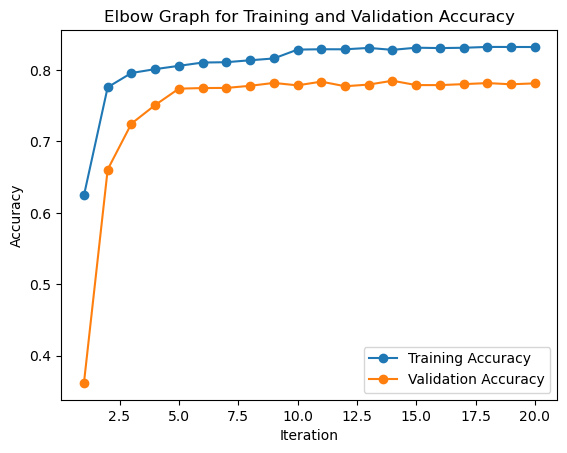

In [96]:
# Get the first two items in each tuple and store in separate lists
train_iter = [x[0] for x in train_result]
train_accuracy = [x[1] for x in train_result]
val_iter = [x[0] for x in val_result]
val_accuracy = [x[1] for x in val_result]

# Plot elbow graph for both training and validation loss
plt.plot(train_iter, train_accuracy, '-o', label='Training Accuracy')
plt.plot(val_iter, val_accuracy, '-o', label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Elbow Graph for Training and Validation Accuracy')
plt.legend()
plt.show()

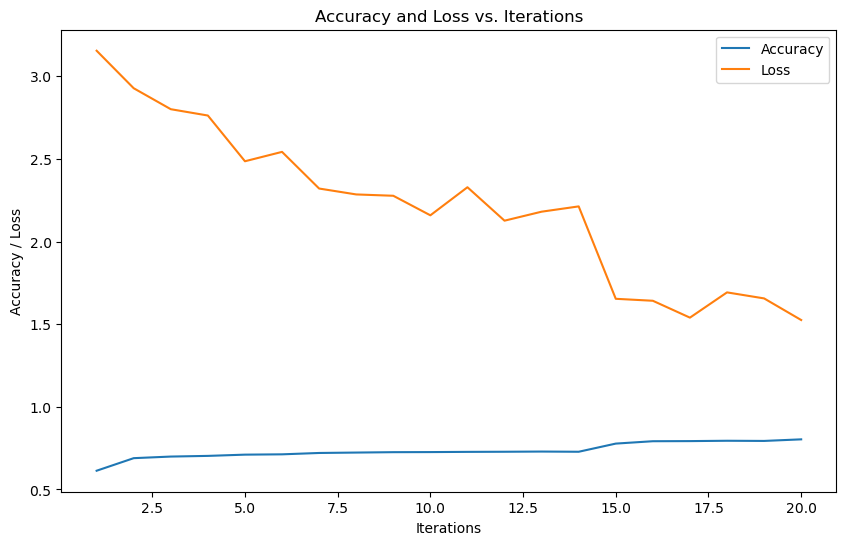

In [23]:
# Call the function and get the results
result = train_result
# Extract the accuracy and losses from the result
iter, accuracy, losses = zip(*result)

# Plot the accuracy and losses against iterations in one chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iter, accuracy, label='Accuracy')
ax.plot(iter, losses, label='Loss')
ax.set_xlabel('Iterations')
ax.set_ylabel('Accuracy / Loss')
ax.set_title('Accuracy and Loss vs. Iterations')
ax.legend()
plt.show()

In [24]:
def random_search_hyperparams(num_trials, data):
    """
    Conducts a random search over the hyperparameters of a neural network.

    Parameters:
    num_trials (int): The number of random trials to conduct.
    data (torch.utils.data.DataLoader): The data to train the model on.

    Returns:
    dict: The hyperparameters that produce the highest accuracy.
    float: The highest accuracy achieved.
    float: The total training time in seconds.
    """

    # Start the timer
    startTime = time.time()

    # Define the range of values for each hyperparameter
    hyperparams = {
        'activation': ['relu', 'sigmoid', 'tanh'], 
        'opt': ['SGD', 'Adam', 'RMSprop'],
        'batch_norm': [True, False],
        'regularization': ['l1', 'l2', 'none'],
        'dropout': [0.0, 0.2],
        'scheduler': ['ReduceLROnPlateau', 'StepLR']
    }

    best_accuracy = 0.0
    best_hyperparams = None

    # Loop through the number of trials specified
    for i in range(num_trials):

        # Sample a set of hyperparameters at random
        activation = random.choice(hyperparams['activation'])
        opt = random.choice(hyperparams['opt'])
        batch_norm = random.choice(hyperparams['batch_norm'])
        regularization = random.choice(hyperparams['regularization'])
        dropout = random.uniform(*hyperparams['dropout'])
        scheduler = random.choice(hyperparams['scheduler'])

        # Test the current set of hyperparameters
        result = hyper_params_test(activation, opt, batch_norm, regularization, dropout, scheduler, data)

        # Compute the accuracy of the model for the current set of hyperparameters
        accuracy = result[-1][1]

        # Check if the current set of hyperparameters has produced the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparams = {
                'activation': activation,
                'opt': opt,
                'batch_norm': batch_norm,
                'regularization': regularization,
                'dropout': dropout,
                'scheduler': scheduler
            }

    # End the timer and compute the total training time
    endTime = time.time()
    trainingTime = endTime - startTime

    # Return the best hyperparameters, the highest accuracy achieved, and the total training time
    return best_hyperparams, best_accuracy, trainingTime

In [29]:
best_hyperparams, best_accuracy, trainingTime = random_search_hyperparams(3, train_loader)

In [30]:
trainingTime

2578.7114112377167

In [31]:
best_hyperparams

{'activation': 'tanh',
 'opt': 'RMSprop',
 'batch_norm': True,
 'regularization': 'none',
 'dropout': 0.06047303883412776,
 'scheduler': 'StepLR'}

In [32]:
best_accuracy

0.8952460106382979

In [33]:
best_hyperparams = best_hyperparams
best_result = hyper_params_test(best_hyperparams['activation'], best_hyperparams['opt'], best_hyperparams['batch_norm'], best_hyperparams['regularization'], best_hyperparams['dropout'], best_hyperparams['scheduler'], train_loader)

In [34]:
best_result

[(1, 0.686679964539007, 0.8390989899635315),
 (2, 0.7758200354609929, 0.7289019823074341),
 (3, 0.802238475177305, 0.6171123385429382),
 (4, 0.8176418439716312, 0.6406661868095398),
 (5, 0.8301750886524822, 0.5005921125411987),
 (6, 0.8384862588652482, 0.5151647925376892),
 (7, 0.8473958333333333, 0.3500683605670929),
 (8, 0.8522828014184397, 0.5126637816429138),
 (9, 0.8585992907801419, 0.41960400342941284),
 (10, 0.8616910460992908, 0.4185105860233307),
 (11, 0.8668661347517731, 0.3959517180919647),
 (12, 0.8705562943262412, 0.3845011293888092),
 (13, 0.8743794326241134, 0.33395662903785706),
 (14, 0.8762300531914894, 0.3470272123813629),
 (15, 0.8811945921985815, 0.36807262897491455),
 (16, 0.8841533687943263, 0.23939667642116547),
 (17, 0.8868018617021277, 0.33683159947395325),
 (18, 0.889450354609929, 0.20571847259998322),
 (19, 0.8918772163120567, 0.29461827874183655),
 (20, 0.8937389184397163, 0.3292597234249115)]

In [86]:
test_result = hyper_params_test(best_hyperparams['activation'], best_hyperparams['opt'], best_hyperparams['batch_norm'], best_hyperparams['regularization'], best_hyperparams['dropout'], best_hyperparams['scheduler'], test_loader)
test_result

[(1, 0.24303191489361703, 3.619079113006592),
 (2, 0.5411170212765958, 2.657271385192871),
 (3, 0.6348936170212766, 2.385260581970215),
 (4, 0.6795212765957447, 2.3388078212738037),
 (5, 0.7082446808510638, 1.9418227672576904),
 (6, 0.7245212765957447, 1.7605950832366943),
 (7, 0.7369148936170212, 2.142688751220703),
 (8, 0.7453723404255319, 1.8857786655426025),
 (9, 0.7535106382978723, 1.7728583812713623),
 (10, 0.7601595744680851, 1.9194046258926392),
 (11, 0.7656382978723404, 1.6545281410217285),
 (12, 0.7729255319148937, 2.0374627113342285),
 (13, 0.7767021276595745, 1.9731154441833496),
 (14, 0.781595744680851, 1.9352829456329346),
 (15, 0.7836702127659575, 1.8365309238433838),
 (16, 0.7875531914893616, 1.8070882558822632),
 (17, 0.7909574468085107, 1.983504056930542),
 (18, 0.7893085106382979, 1.6225364208221436),
 (19, 0.7934574468085106, 1.6906144618988037),
 (20, 0.795904255319149, 1.6111308336257935)]

In [35]:
# Save the model state dictionary
torch.save(model.state_dict(), 'mlp_model.pth')
print("Model saved successfully!")

Model saved successfully!


#### 2. After you obtain the best version of the model (i.e., the model with the best techniques/hyperparameters combination), please:

##### 2.1 Plot the loss function graph with respect to the iteration/epoch

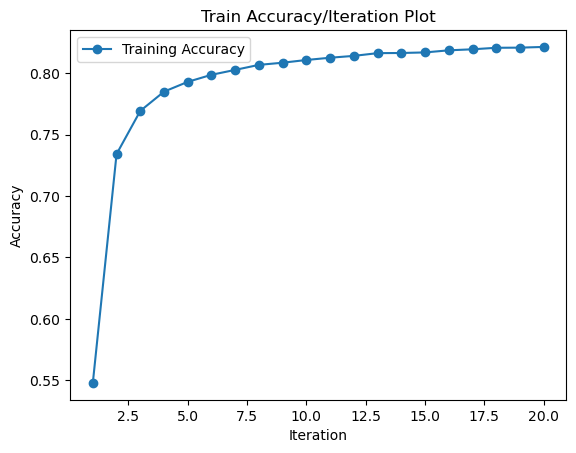

In [87]:
# Get the first two items in each tuple and store in separate lists
train_iter = [x[0] for x in best_result]
train_accuracy = [x[1] for x in best_result]


# Plot elbow graph for both training and validation loss
plt.plot(train_iter, train_accuracy, '-o', label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train Accuracy/Iteration Plot')
plt.legend()
plt.show()

##### 2.2 Plot the accuracy graph with respect to the iteration/epoch

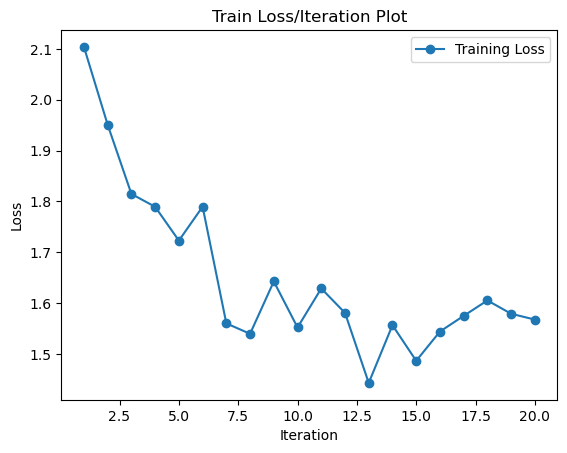

In [88]:
# Get the first two items in each tuple and store in separate lists
train_iter = [x[0] for x in best_result]
train_accuracy = [x[2] for x in best_result]


# Plot elbow graph for both training and validation loss
plt.plot(train_iter, train_accuracy, '-o', label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Loss/Iteration Plot')
plt.legend()
plt.show()

##### 2.3 You can use either CPU or GPU to train your model, and please print the training time

In [38]:
trainingTime

2578.7114112377167

### Step-5: For CNNs, please complete the below steps, respectively, on the training dataset:

In [39]:
class CNN(nn.Module):
    def __init__(self, input_size, num_classes, activation, batch_norm, dropout, regularization):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=47)
        self.activation = activation
        self.batch_norm = batch_norm
        self.dropout = dropout
        self.regularization = regularization
        if self.batch_norm:
            self.bn1 = nn.BatchNorm2d(6)
            self.bn2 = nn.BatchNorm2d(16)
        if self.regularization:
            self.l1 = nn.L1Loss()
            self.l2 = nn.MSELoss()

    def forward(self, x):
        out = self.conv1(x)
        if self.batch_norm:
            out = self.bn1(out)
        if self.activation == 'relu':
            out = F.relu(out)
        elif self.activation == 'sigmoid':
            out = F.sigmoid(out)
        elif self.activation == 'tanh':
            out = F.tanh(out)
        out = self.pool(out)
        out = self.conv2(out)
        if self.batch_norm:
            out = self.bn2(out)
        if self.activation == 'relu':
            out = F.relu(out)
        elif self.activation == 'sigmoid':
            out = F.sigmoid(out)
        elif self.activation == 'tanh':
            out = F.tanh(out)
        out = self.pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        if self.activation == 'relu':
            out = F.relu(out)
        elif self.activation == 'sigmoid':
            out = F.sigmoid(out)
        elif self.activation == 'tanh':
            out = F.tanh(out)
        if self.dropout:
            out = F.dropout(out, p=self.dropout)
        out = self.fc2(out)
        return out

In [40]:
# Instantiate the CNN model
model = CNN(input_size, num_classes, activation, batch_norm, dropout, regularization).to(device)

# Define the loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)

#### 1. For the techniques/hyperparameters you choose to explore, you can use cross-validation to find the most suitable combination (of those techniques/hyperparameters) under the evaluation metric of accuracy.


In [41]:
accuracy = []
losses = []
iter = []
# Train the model
startTime = time.time()
for epoch in range(epochs):
    correct = 0
    total = 0
    for images, labels in train_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        if regularization == 'l1':
            l1_regularization = torch.tensor(0, dtype=torch.float32).to(device)
            for param in model.parameters():
                l1_regularization += torch.norm(param, 1)
            loss += regularization * l1_regularization
        elif regularization == 'l2':
            l2_regularization = torch.tensor(0, dtype=torch.float32).to(device)
            for param in model.parameters():
                l2_regularization += torch.norm(param, 2)
            loss += regularization * l2_regularization

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step(loss)

    # Compute training accuracy for the epoch
    Accuracy = correct / total
    trainingAccuracy = 100 * Accuracy

    # Print the loss and accuracy after each epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {trainingAccuracy:.2f}%")

    accuracy.append(Accuracy)
    losses.append(loss.item())
    iter.append(epoch+1)

result = list(zip(iter, accuracy, losses))
endTime = time.time()
trainingTime = endTime - startTime
print(f"Training time: {trainingTime}")
result

Epoch [1/20], Loss: 0.5989, Training Accuracy: 72.02%
Epoch [2/20], Loss: 0.4142, Training Accuracy: 81.66%
Epoch [3/20], Loss: 0.5352, Training Accuracy: 83.25%
Epoch 00004: reducing learning rate of group 0 to 1.0000e-03.
Epoch [4/20], Loss: 0.5438, Training Accuracy: 84.13%
Epoch [5/20], Loss: 0.3866, Training Accuracy: 86.64%
Epoch [6/20], Loss: 0.2591, Training Accuracy: 87.01%
Epoch [7/20], Loss: 0.3911, Training Accuracy: 87.30%
Epoch 00008: reducing learning rate of group 0 to 1.0000e-04.
Epoch [8/20], Loss: 0.3996, Training Accuracy: 87.42%
Epoch [9/20], Loss: 0.2933, Training Accuracy: 87.62%
Epoch 00010: reducing learning rate of group 0 to 1.0000e-05.
Epoch [10/20], Loss: 0.3335, Training Accuracy: 87.85%
Epoch [11/20], Loss: 0.3930, Training Accuracy: 87.80%
Epoch 00012: reducing learning rate of group 0 to 1.0000e-06.
Epoch [12/20], Loss: 0.2898, Training Accuracy: 87.88%
Epoch [13/20], Loss: 0.3054, Training Accuracy: 87.87%
Epoch 00014: reducing learning rate of group 0

[(1, 0.7201573581560283, 0.5989465713500977),
 (2, 0.8166001773049646, 0.41422709822654724),
 (3, 0.8325354609929078, 0.5351669192314148),
 (4, 0.841300975177305, 0.5437585711479187),
 (5, 0.8663785460992908, 0.38661760091781616),
 (6, 0.8701019503546099, 0.2590578496456146),
 (7, 0.8730274822695036, 0.3911277651786804),
 (8, 0.8742021276595745, 0.399619996547699),
 (9, 0.8761968085106383, 0.2932813763618469),
 (10, 0.878479609929078, 0.3335009813308716),
 (11, 0.8780141843971632, 0.39303058385849),
 (12, 0.8787566489361702, 0.2897656261920929),
 (13, 0.878690159574468, 0.30541378259658813),
 (14, 0.8797096631205674, 0.28332847356796265),
 (15, 0.8797872340425532, 0.3062036335468292),
 (16, 0.8800864361702128, 0.43496623635292053),
 (17, 0.8785350177304965, 0.38777729868888855),
 (18, 0.8785904255319149, 0.4242354929447174),
 (19, 0.8787788120567376, 0.22641797363758087),
 (20, 0.8778479609929078, 0.30216720700263977)]

In [42]:
def hyper_params_test(activation, opt, batch_norm, regularization, dropout, lr_scheduler, data): 
    
    model = CNN(input_size, num_classes, activation, batch_norm, dropout, regularization).to(device)
    
    # Define the loss function, optimizer, and learning rate scheduler
    criterion = nn.CrossEntropyLoss()
    if opt == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif opt == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.001)
    elif opt == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)

    if lr_scheduler == 'ReduceLROnPlateau':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)
    elif lr_scheduler == 'StepLR':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Train the model
    accuracy = []
    losses = []
    iter = []
    startTime = time.time()
    for epoch in range(epochs):
        correct = 0
        total = 0
        for images, labels in data:
            # Move the images and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            if regularization == 'l1':
                l1_regularization = torch.tensor(0, dtype=torch.float32)
                for param in model.parameters():
                    l1_regularization += torch.norm(param, 1)
                loss += 0.001 * l1_regularization
            elif regularization == 'l2':
                l2_regularization = torch.tensor(0, dtype=torch.float32)
                for param in model.parameters():
                    l2_regularization += torch.norm(param, 2)
                loss += 0.01 * l2_regularization
            else:
                pass  # Do nothing if regularization is None

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step(loss)

        # Compute training accuracy for the epoch
        Accuracy = correct / total
        trainingAccuracy = 100 * Accuracy

        # Print the loss and accuracy after each epoch
#         print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {trainingAccuracy:.2f}%")

        accuracy.append(Accuracy)  # Update the list for storing accuracy values
        losses.append(loss.item())  # Update the list for storing loss values
        iter.append(epoch+1)
    
    result = list(zip(iter, accuracy, losses))  # Update variable name in the zip function

    endTime = time.time()
    trainingTime = endTime - startTime
#     print(f"Training time: {trainingTime}")
    return result

In [43]:
train_result = hyper_params_test('relu', 'Adam', True, 'l1', 0.2, 'ReduceLROnPlateau', train_loader)

Epoch 00009: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00014: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00016: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00018: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00020: reducing learning rate of group 0 to 1.0000e-08.


In [44]:
val_result = hyper_params_test('relu', 'Adam', True, 'l1', 0.2, 'ReduceLROnPlateau', val_loader)

Epoch 00004: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00008: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00010: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00012: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00014: reducing learning rate of group 0 to 1.0000e-08.


In [45]:
train_result

[(1, 0.6244902482269503, 1.6013453006744385),
 (2, 0.7758089539007093, 1.4236159324645996),
 (3, 0.7957668439716312, 1.2785120010375977),
 (4, 0.8011635638297873, 1.2579090595245361),
 (5, 0.8057734929078014, 1.2422176599502563),
 (6, 0.8103834219858156, 1.1595442295074463),
 (7, 0.8108710106382979, 1.1089203357696533),
 (8, 0.8135749113475177, 1.184456467628479),
 (9, 0.8161125886524823, 1.1937503814697266),
 (10, 0.8285128546099291, 1.03287935256958),
 (11, 0.8290004432624114, 1.0813469886779785),
 (12, 0.8289228723404255, 0.9494917392730713),
 (13, 0.830862145390071, 1.0351080894470215),
 (14, 0.8281471631205674, 0.9880846738815308),
 (15, 0.8311724290780141, 0.999152660369873),
 (16, 0.8306515957446808, 1.056840419769287),
 (17, 0.831072695035461, 1.1264665126800537),
 (18, 0.8322584219858156, 0.981949508190155),
 (19, 0.8321808510638298, 1.091880440711975),
 (20, 0.8321143617021277, 1.0480564832687378)]

In [46]:
val_result

[(1, 0.36196808510638295, 2.8630058765411377),
 (2, 0.6606826241134752, 1.717210054397583),
 (3, 0.7248670212765957, 2.0560061931610107),
 (4, 0.750886524822695, 1.7784545421600342),
 (5, 0.7738475177304964, 1.3203918933868408),
 (6, 0.7746897163120567, 1.3100550174713135),
 (7, 0.7748670212765958, 1.5701041221618652),
 (8, 0.7778368794326241, 1.4928491115570068),
 (9, 0.7818705673758866, 1.5464565753936768),
 (10, 0.7784574468085106, 1.5169379711151123),
 (11, 0.7836879432624113, 1.6216281652450562),
 (12, 0.7772163120567376, 1.4623644351959229),
 (13, 0.7795656028368795, 1.455361247062683),
 (14, 0.7849290780141844, 1.606116771697998),
 (15, 0.7788563829787234, 1.454471230506897),
 (16, 0.7788120567375887, 1.4325799942016602),
 (17, 0.7801861702127659, 1.5500593185424805),
 (18, 0.7816489361702128, 1.6085290908813477),
 (19, 0.7799645390070922, 1.516925573348999),
 (20, 0.78125, 1.4685622453689575)]

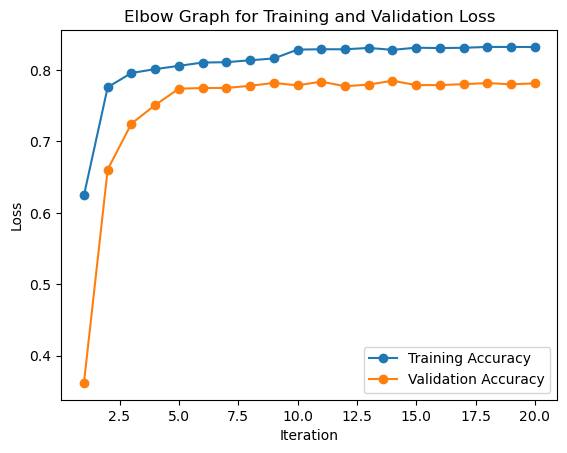

In [47]:
# Get the first two items in each tuple and store in separate lists
train_iter = [x[0] for x in train_result]
train_accuracy = [x[1] for x in train_result]
val_iter = [x[0] for x in val_result]
val_accuracy = [x[1] for x in val_result]

# Plot elbow graph for both training and validation loss
plt.plot(train_iter, train_accuracy, '-o', label='Training Accuracy')
plt.plot(val_iter, val_accuracy, '-o', label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Elbow Graph for Training and Validation Loss')
plt.legend()
plt.show()

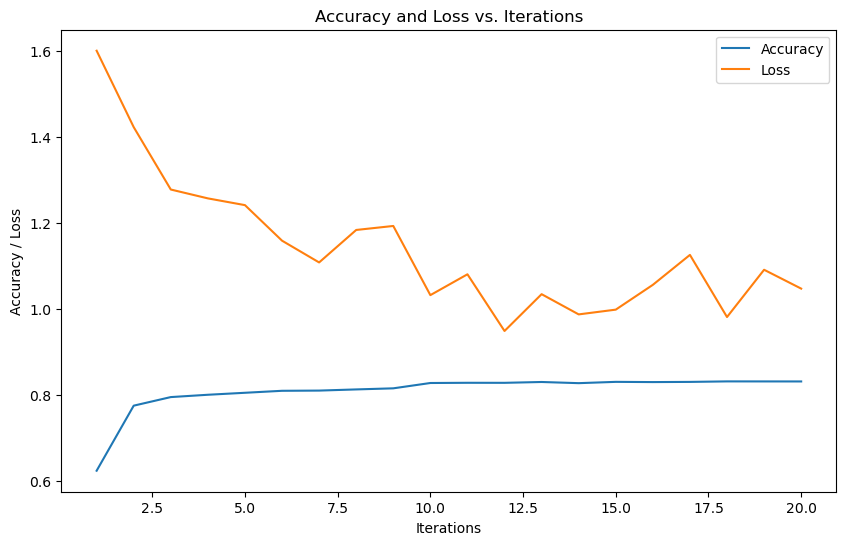

In [48]:
# Call the function and get the results
result = train_result
# Extract the accuracy and losses from the result
iter, accuracy, losses = zip(*result)

# Plot the accuracy and losses against iterations in one chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iter, accuracy, label='Accuracy')
ax.plot(iter, losses, label='Loss')
ax.set_xlabel('Iterations')
ax.set_ylabel('Accuracy / Loss')
ax.set_title('Accuracy and Loss vs. Iterations')
ax.legend()
plt.show()

In [49]:
def random_search_hyperparams(num_trials, data):
    startTime = time.time()
    # Define the range of values for each hyperparameter
    hyperparams = {
        'activation': ['relu', 'sigmoid', 'tanh'], 
        'opt': ['SGD', 'Adam', 'RMSprop'],
        'batch_norm': [True, False],
        'regularization': ['l1', 'l2', 'none'],
        'dropout': [0.0, 0.2],
        'scheduler': ['ReduceLROnPlateau', 'StepLR']
    }

    best_accuracy = 0.0
    best_hyperparams = None

    for i in range(num_trials):
        # Sample a set of hyperparameters at random
        activation = random.choice(hyperparams['activation'])
        opt = random.choice(hyperparams['opt'])
        batch_norm = random.choice(hyperparams['batch_norm'])
        regularization = random.choice(hyperparams['regularization'])
        dropout = random.uniform(*hyperparams['dropout'])
        scheduler = random.choice(hyperparams['scheduler'])

        # Test the current set of hyperparameters
        result = hyper_params_test(activation, opt, batch_norm, regularization, dropout, scheduler, data)

        # Compute the accuracy of the model for the current set of hyperparameters
        accuracy = result[-1][1]

        # Check if the current set of hyperparameters has produced the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparams = {
                'activation': activation,
                'opt': opt,
                'batch_norm': batch_norm,
                'regularization': regularization,
                'dropout': dropout,
                'scheduler': scheduler
            }
    endTime = time.time()
    trainingTime = endTime - startTime
    return best_hyperparams, best_accuracy, trainingTime

In [50]:
best_hyperparams, best_accuracy, trainingTime = random_search_hyperparams(3, train_loader)

In [51]:
trainingTime

3710.2809088230133

In [52]:
best_hyperparams

{'activation': 'tanh',
 'opt': 'Adam',
 'batch_norm': False,
 'regularization': 'l1',
 'dropout': 0.021685843857884926,
 'scheduler': 'StepLR'}

In [85]:
test_result = hyper_params_test('tanh', 'Adam', False, 'l1', 0.02, 'StepLR', test_loader)
test_result

C:\Users\LENOVO\conda1\envs\pytorch\lib\site-packages\torch\optim\lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


[(1, 0.2696276595744681, 3.3756158351898193),
 (2, 0.5553191489361702, 2.746840238571167),
 (3, 0.633031914893617, 2.3461506366729736),
 (4, 0.6743617021276596, 2.0936479568481445),
 (5, 0.6997872340425532, 2.111240863800049),
 (6, 0.718563829787234, 2.0566577911376953),
 (7, 0.7336702127659575, 2.1458466053009033),
 (8, 0.7460106382978723, 2.019954204559326),
 (9, 0.7544148936170213, 2.0837624073028564),
 (10, 0.7616489361702128, 1.8919799327850342),
 (11, 0.7682978723404256, 2.1255617141723633),
 (12, 0.7734042553191489, 1.686140775680542),
 (13, 0.7762234042553191, 1.8605241775512695),
 (14, 0.7819148936170213, 1.7414740324020386),
 (15, 0.7842021276595744, 1.7754828929901123),
 (16, 0.7882446808510638, 1.8612473011016846),
 (17, 0.7913297872340426, 1.9451228380203247),
 (18, 0.7940957446808511, 1.7458643913269043),
 (19, 0.7928723404255319, 1.8275556564331055),
 (20, 0.7960106382978723, 2.071272611618042)]

In [53]:
best_accuracy

0.8181737588652482

In [54]:
best_hyperparams = best_hyperparams
best_result = hyper_params_test(best_hyperparams['activation'], best_hyperparams['opt'], best_hyperparams['batch_norm'], best_hyperparams['regularization'], best_hyperparams['dropout'], best_hyperparams['scheduler'], train_loader)

In [55]:
# Save the model state dictionary
torch.save(model.state_dict(), 'cnn_model.pth')
print("Model saved successfully!")

Model saved successfully!


#### 2. After you obtain the best version of the model (i.e., the model with the best techniques/hyperparameters combination), please:


##### 2.1 Plot the loss function graph with respect to the iteration/epoch


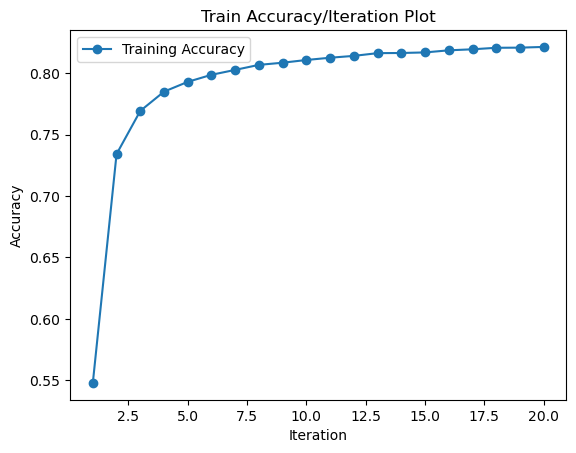

In [92]:
# Get the first two items in each tuple and store in separate lists
train_iter = [x[0] for x in best_result]
train_accuracy = [x[1] for x in best_result]


# Plot elbow graph for both training and validation loss
plt.plot(train_iter, train_accuracy, '-o', label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train Accuracy/Iteration Plot')
plt.legend()
plt.show()

##### 2.2 Plot the accuracy graph with respect to the iteration/epoch


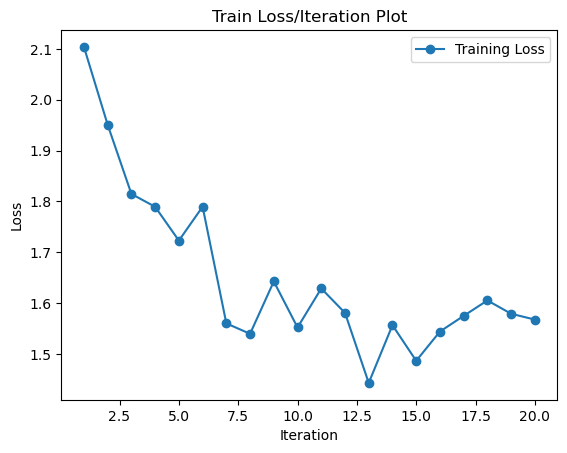

In [93]:
# Get the first two items in each tuple and store in separate lists
train_iter = [x[0] for x in best_result]
train_accuracy = [x[2] for x in best_result]


# Plot elbow graph for both training and validation loss
plt.plot(train_iter, train_accuracy, '-o', label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Loss/Iteration Plot')
plt.legend()
plt.show()

##### 2.3 You can use either CPU or GPU to train your model, and please print the training time


In [58]:
trainingTime

3710.2809088230133

### Step-6: After you obtain the best version of MLP and CNNs, please test both models on the testing dataset


#### 1. Compare the performance of MLP and CNNs


In [59]:
# Load the saved model
mlp_model = MLP(input_size, hidden_size, num_classes, activation, batch_norm, dropout, regularization).to(device)
mlp_model.load_state_dict(torch.load('mlp_model.pth'))
mlp_model.eval()

# Run test data through the model
test_accuracy = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = mlp_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        test_accuracy += (predicted == labels).sum().item()

# Compute test accuracy
Accuracy = test_accuracy / total
testAccuracy = 100 * Accuracy
print(f"Test Accuracy: {testAccuracy:.2f}%")

Test Accuracy: 83.61%


In [60]:
# Load the saved model
cnn_model = CNN(input_size, num_classes, activation, batch_norm, dropout, regularization).to(device)
cnn_model.load_state_dict(torch.load('cnn_model.pth'))
cnn_model.eval()

# Run test data through the model
test_accuracy = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        test_accuracy += (predicted == labels).sum().item()

# Compute test accuracy
Accuracy = test_accuracy / total
testAccuracy = 100 * Accuracy
print(f"Test Accuracy: {testAccuracy:.2f}%")

Test Accuracy: 85.87%


#### 2. Load your model and print the prediction of the top six samples in the testing dataset, and compare them with the true labels.


In [61]:
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = cnn_model(images)

        # Get the predicted classes
        _, predicted = torch.max(outputs.data, 1)

        # Print the top six predictions along with the true labels
        for i in range(6):
            print(f"Predicted: {predicted[i]}, True Label: {labels[i]}")

Predicted: 3, True Label: 3
Predicted: 25, True Label: 25
Predicted: 4, True Label: 4
Predicted: 16, True Label: 16
Predicted: 37, True Label: 37
Predicted: 2, True Label: 2
Predicted: 18, True Label: 1
Predicted: 1, True Label: 21
Predicted: 15, True Label: 40
Predicted: 38, True Label: 38
Predicted: 43, True Label: 43
Predicted: 43, True Label: 43
Predicted: 32, True Label: 32
Predicted: 0, True Label: 24
Predicted: 33, True Label: 33
Predicted: 43, True Label: 43
Predicted: 35, True Label: 35
Predicted: 21, True Label: 21
Predicted: 7, True Label: 7
Predicted: 6, True Label: 6
Predicted: 45, True Label: 45
Predicted: 33, True Label: 33
Predicted: 20, True Label: 20
Predicted: 32, True Label: 32
Predicted: 46, True Label: 35
Predicted: 35, True Label: 2
Predicted: 40, True Label: 15
Predicted: 38, True Label: 38
Predicted: 39, True Label: 39
Predicted: 17, True Label: 17
Predicted: 16, True Label: 16
Predicted: 42, True Label: 4
Predicted: 1, True Label: 21
Predicted: 23, True Label:

Predicted: 20, True Label: 20
Predicted: 34, True Label: 34
Predicted: 19, True Label: 19
Predicted: 31, True Label: 31
Predicted: 7, True Label: 7
Predicted: 18, True Label: 18
Predicted: 23, True Label: 23
Predicted: 1, True Label: 18
Predicted: 28, True Label: 28
Predicted: 8, True Label: 8
Predicted: 11, True Label: 11
Predicted: 46, True Label: 46
Predicted: 39, True Label: 39
Predicted: 26, True Label: 26
Predicted: 15, True Label: 40
Predicted: 11, True Label: 11
Predicted: 8, True Label: 8
Predicted: 9, True Label: 44
Predicted: 4, True Label: 4
Predicted: 32, True Label: 32
Predicted: 40, True Label: 15
Predicted: 45, True Label: 45
Predicted: 4, True Label: 4
Predicted: 16, True Label: 16
Predicted: 46, True Label: 46
Predicted: 46, True Label: 34
Predicted: 37, True Label: 37
Predicted: 10, True Label: 10
Predicted: 27, True Label: 27
Predicted: 19, True Label: 19
Predicted: 5, True Label: 28
Predicted: 26, True Label: 26
Predicted: 32, True Label: 26
Predicted: 14, True Lab

In [90]:
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = mlp_model(images)

        # Get the predicted classes
        _, predicted = torch.max(outputs.data, 1)

        # Print the top six predictions along with the true labels
        for i in range(6):
            print(f"Predicted: {predicted[i]}, True Label: {labels[i]}")

Predicted: 21, True Label: 21
Predicted: 7, True Label: 7
Predicted: 40, True Label: 40
Predicted: 0, True Label: 0
Predicted: 43, True Label: 43
Predicted: 43, True Label: 17
Predicted: 23, True Label: 23
Predicted: 21, True Label: 21
Predicted: 9, True Label: 9
Predicted: 45, True Label: 45
Predicted: 8, True Label: 44
Predicted: 7, True Label: 7
Predicted: 4, True Label: 4
Predicted: 37, True Label: 37
Predicted: 4, True Label: 4
Predicted: 30, True Label: 30
Predicted: 23, True Label: 23
Predicted: 28, True Label: 28
Predicted: 35, True Label: 35
Predicted: 35, True Label: 35
Predicted: 44, True Label: 44
Predicted: 9, True Label: 41
Predicted: 26, True Label: 26
Predicted: 26, True Label: 26
Predicted: 19, True Label: 19
Predicted: 25, True Label: 25
Predicted: 11, True Label: 11
Predicted: 29, True Label: 29
Predicted: 32, True Label: 32
Predicted: 14, True Label: 14
Predicted: 33, True Label: 33
Predicted: 32, True Label: 32
Predicted: 36, True Label: 36
Predicted: 29, True Labe

Predicted: 23, True Label: 23
Predicted: 42, True Label: 42
Predicted: 23, True Label: 23
Predicted: 27, True Label: 27
Predicted: 32, True Label: 32
Predicted: 31, True Label: 31
Predicted: 2, True Label: 2
Predicted: 40, True Label: 15
Predicted: 20, True Label: 20
Predicted: 35, True Label: 14
Predicted: 36, True Label: 36
Predicted: 11, True Label: 11
Predicted: 3, True Label: 3
Predicted: 2, True Label: 2
Predicted: 27, True Label: 27
Predicted: 7, True Label: 7
Predicted: 12, True Label: 12
Predicted: 33, True Label: 33
Predicted: 39, True Label: 39
Predicted: 37, True Label: 37
Predicted: 25, True Label: 25
Predicted: 2, True Label: 35
Predicted: 0, True Label: 0
Predicted: 39, True Label: 39
Predicted: 18, True Label: 18
Predicted: 0, True Label: 24
Predicted: 43, True Label: 43
Predicted: 1, True Label: 18
Predicted: 41, True Label: 9
Predicted: 20, True Label: 20
Predicted: 34, True Label: 34
Predicted: 39, True Label: 39
Predicted: 11, True Label: 11
Predicted: 39, True Labe

Predicted: 39, True Label: 39


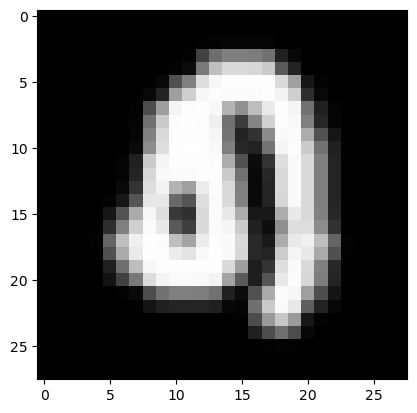

Predicted: 33, True Label: 34


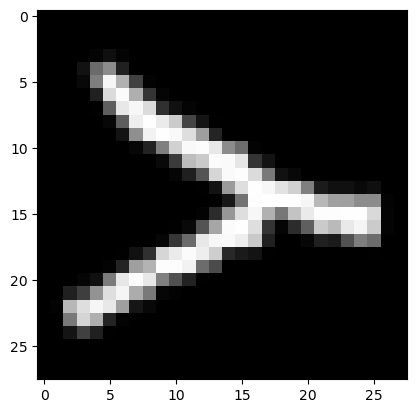

Predicted: 14, True Label: 14


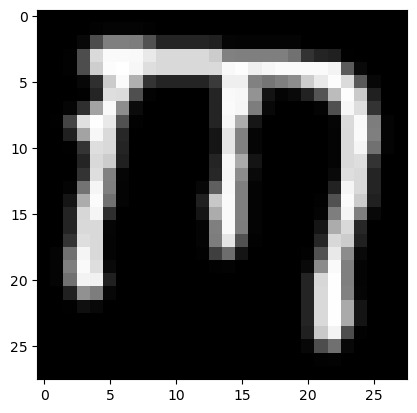

Predicted: 27, True Label: 27


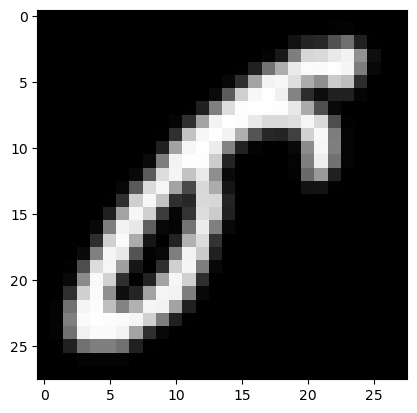

Predicted: 23, True Label: 23


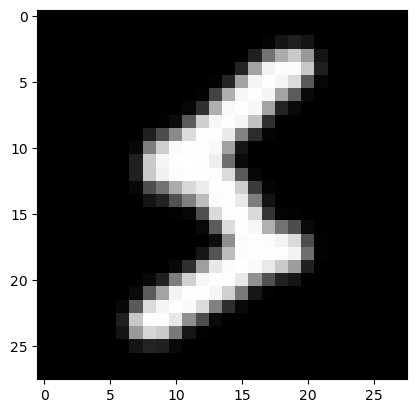

Predicted: 8, True Label: 8


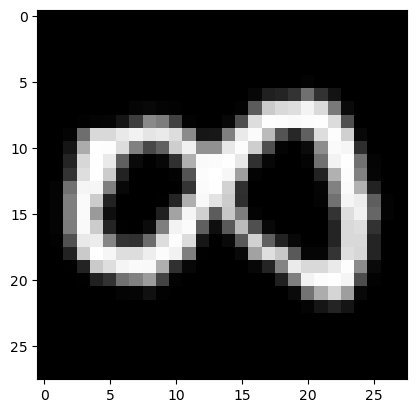

Predicted: 34, True Label: 34


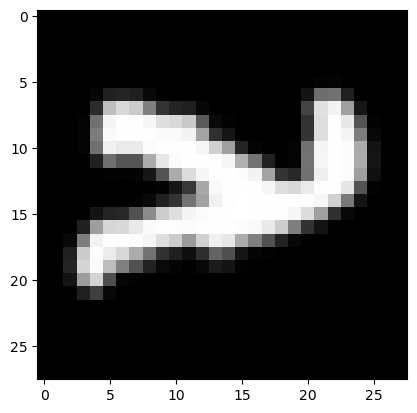

Predicted: 7, True Label: 7


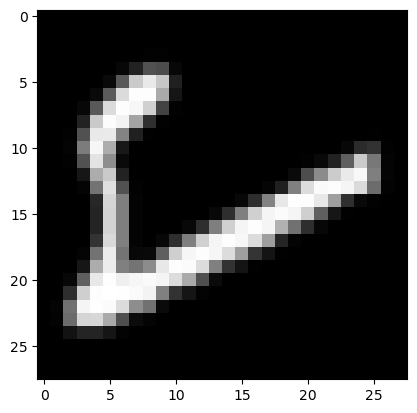

Predicted: 30, True Label: 30


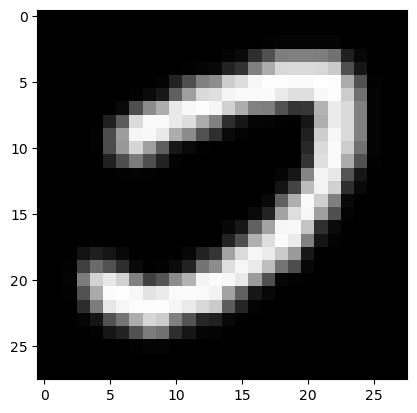

Predicted: 40, True Label: 15


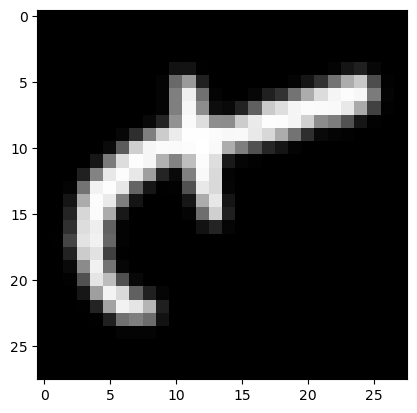

Predicted: 3, True Label: 3


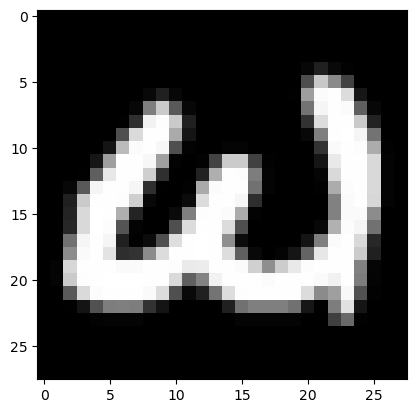

Predicted: 23, True Label: 23


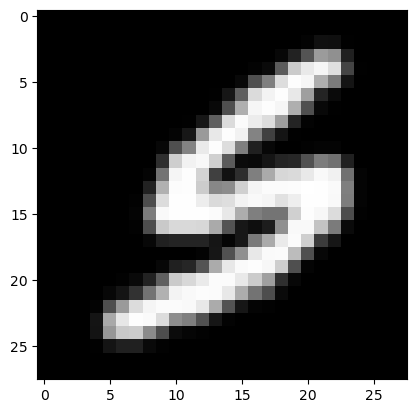

Predicted: 25, True Label: 25


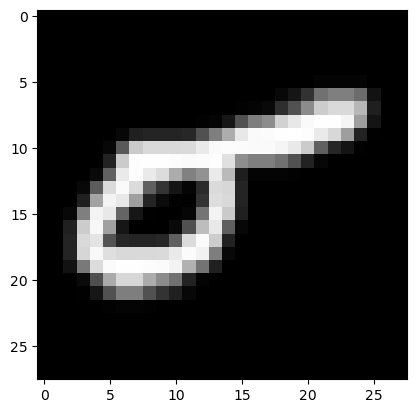

Predicted: 2, True Label: 2


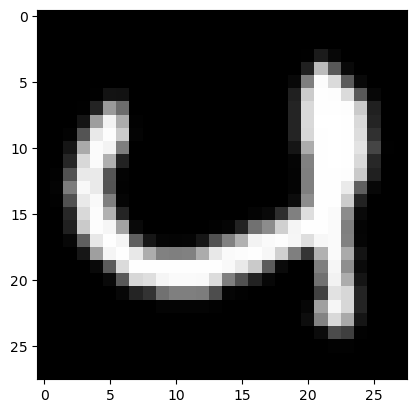

Predicted: 23, True Label: 23


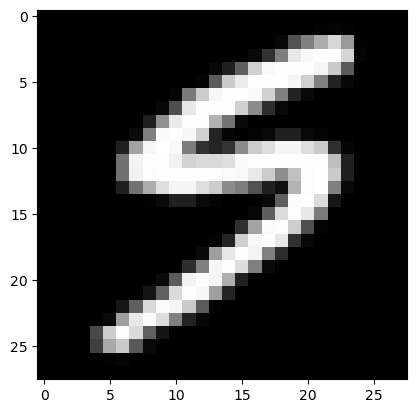

Predicted: 13, True Label: 37


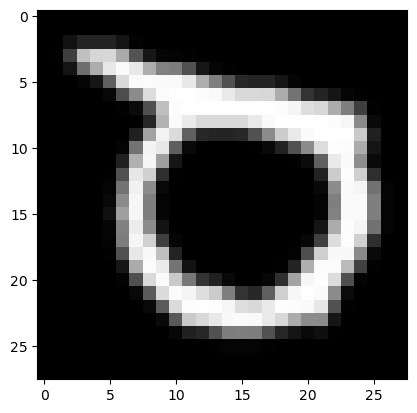

Predicted: 22, True Label: 43


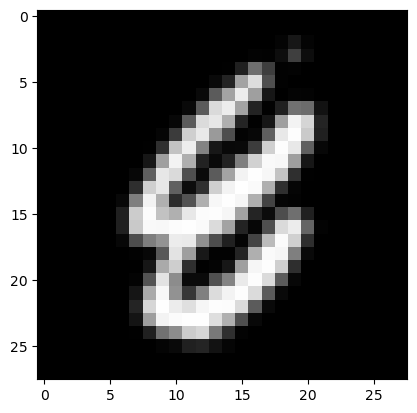

Predicted: 45, True Label: 18


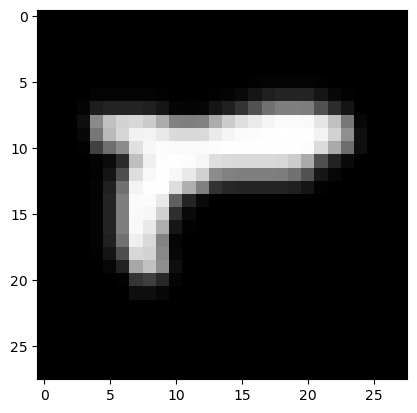

Predicted: 40, True Label: 40


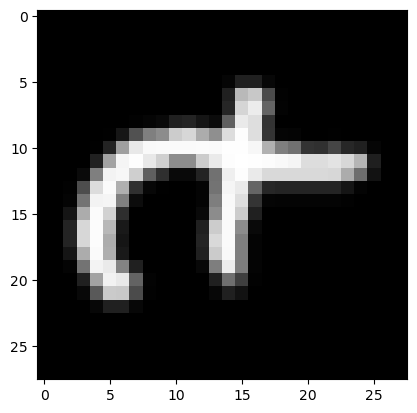

Predicted: 19, True Label: 19


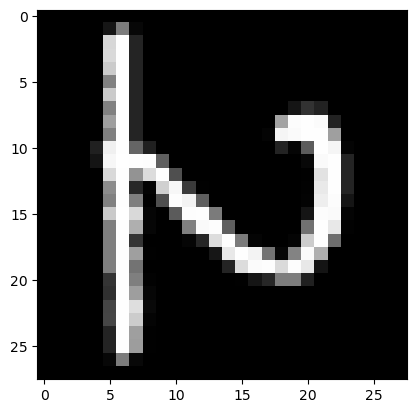

Predicted: 22, True Label: 22


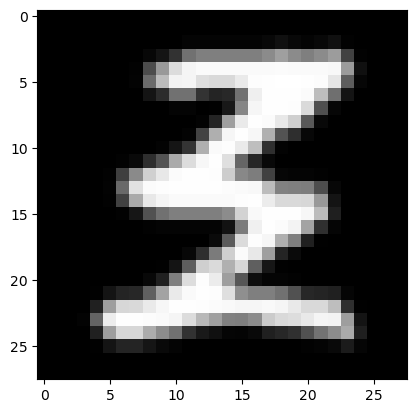

Predicted: 36, True Label: 36


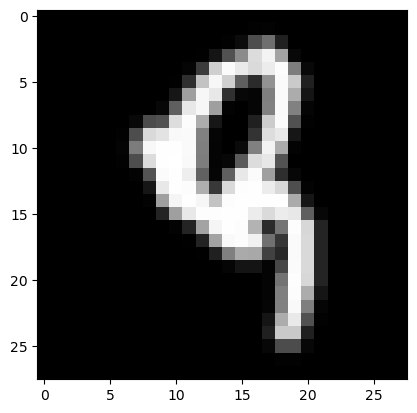

Predicted: 22, True Label: 22


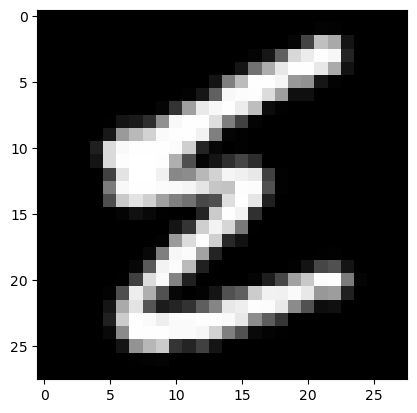

Predicted: 2, True Label: 2


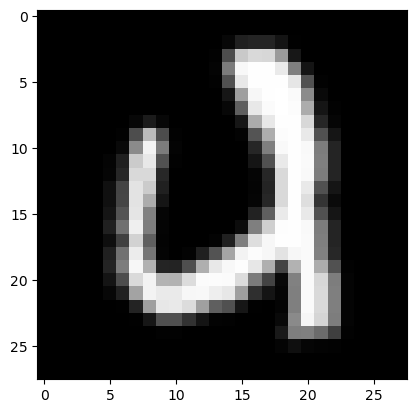

Predicted: 16, True Label: 16


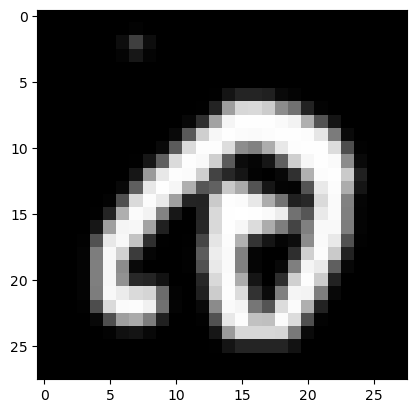

Predicted: 31, True Label: 31


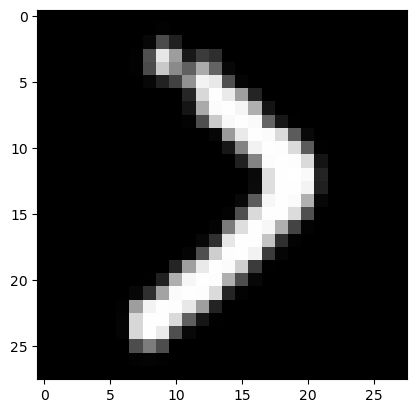

Predicted: 41, True Label: 44


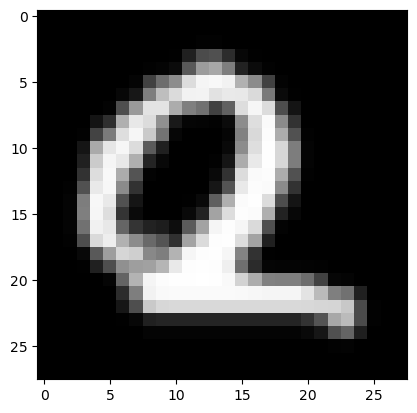

Predicted: 25, True Label: 25


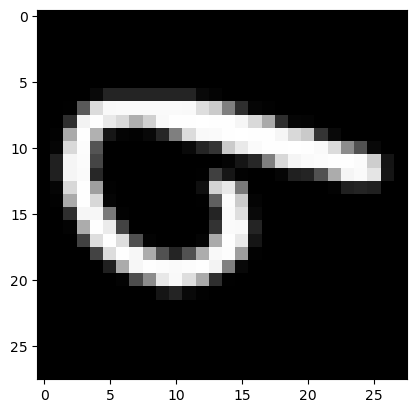

Predicted: 41, True Label: 41


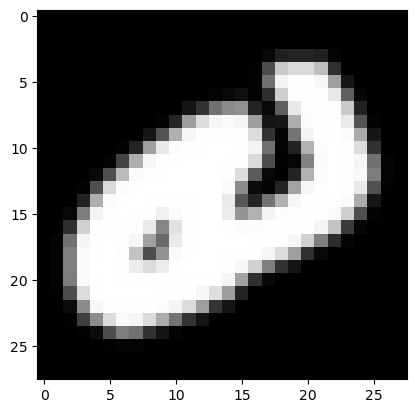

Predicted: 36, True Label: 36


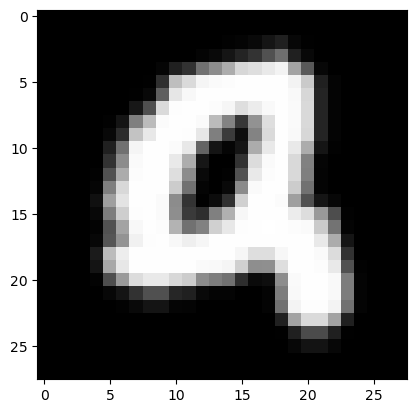

Predicted: 11, True Label: 11


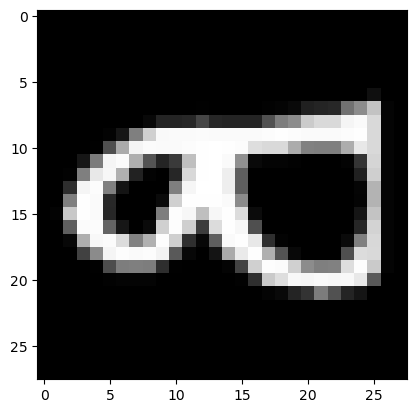

Predicted: 40, True Label: 40


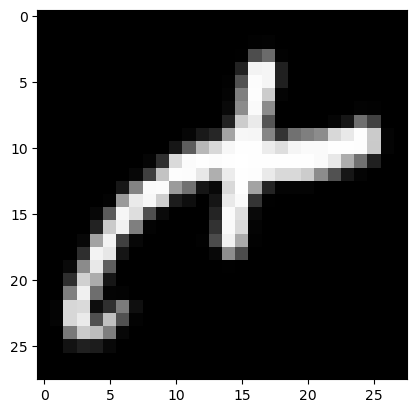

Predicted: 34, True Label: 34


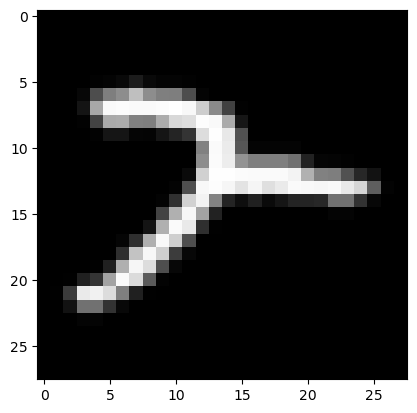

Predicted: 2, True Label: 2


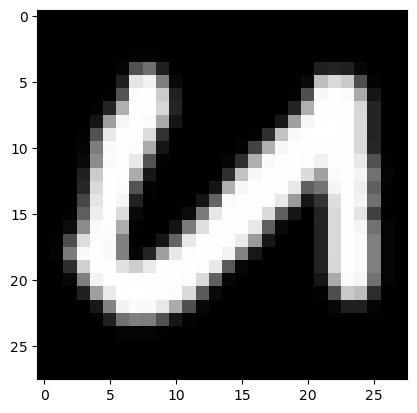

Predicted: 16, True Label: 6


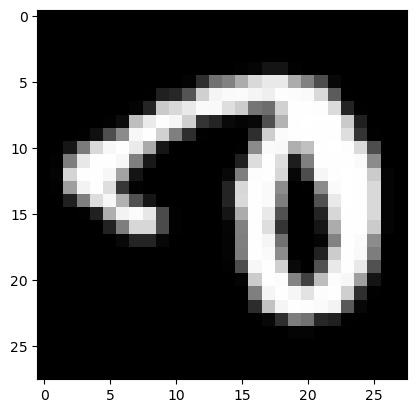

Predicted: 13, True Label: 13


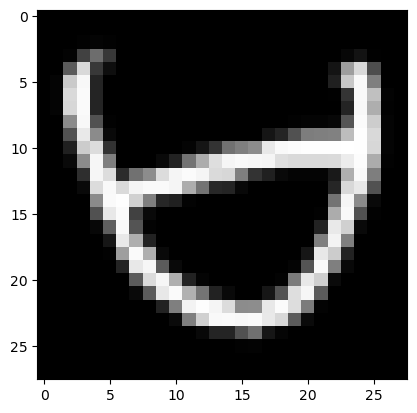

Predicted: 2, True Label: 2


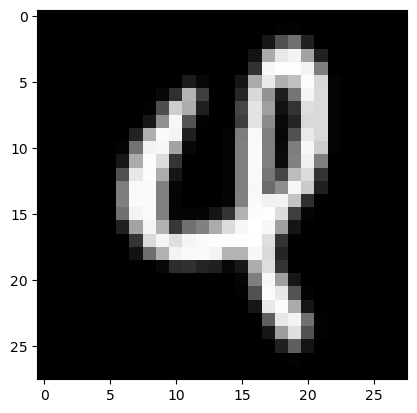

Predicted: 18, True Label: 18


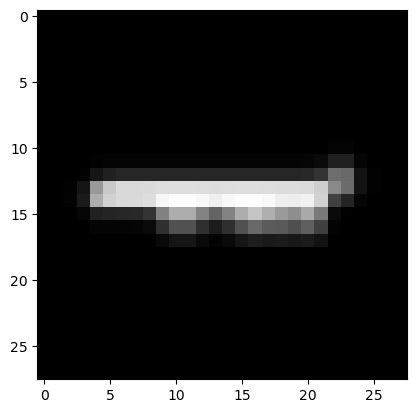

Predicted: 39, True Label: 39


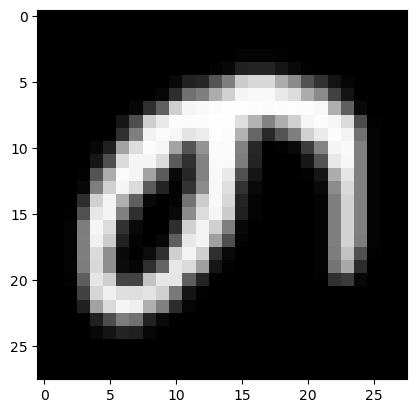

Predicted: 25, True Label: 25


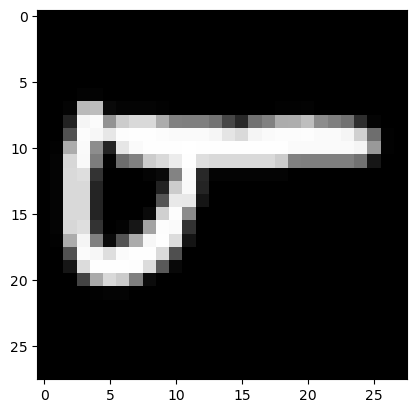

Predicted: 46, True Label: 46


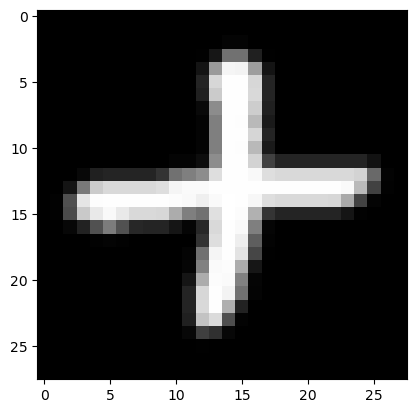

Predicted: 44, True Label: 44


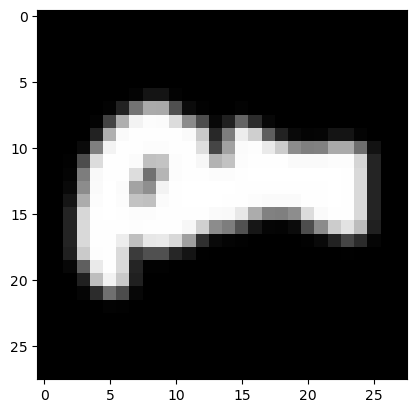

Predicted: 12, True Label: 12


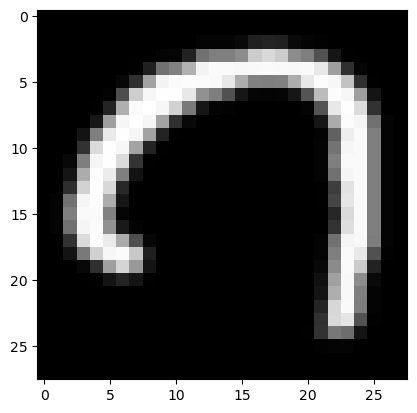

Predicted: 1, True Label: 1


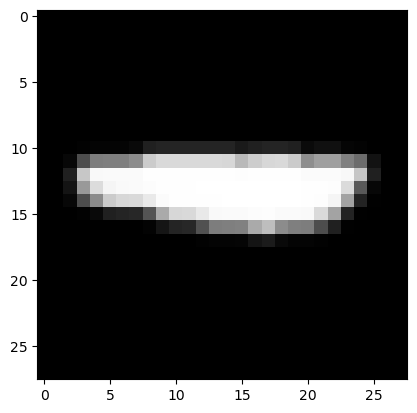

Predicted: 32, True Label: 32


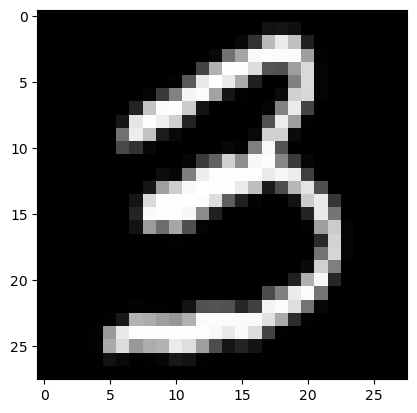

Predicted: 25, True Label: 25


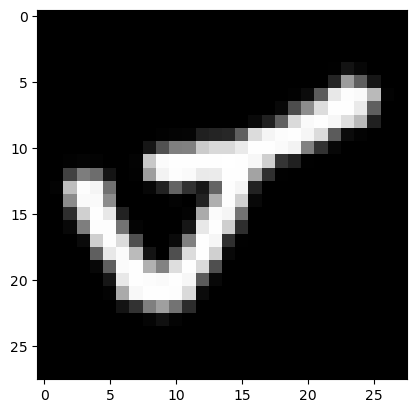

Predicted: 17, True Label: 17


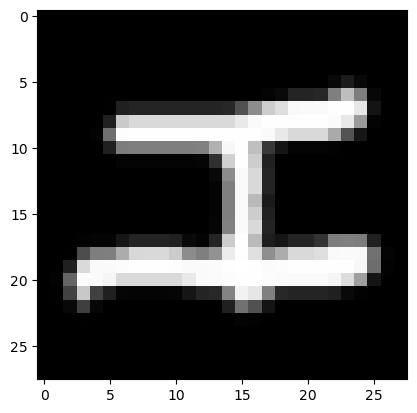

Predicted: 14, True Label: 14


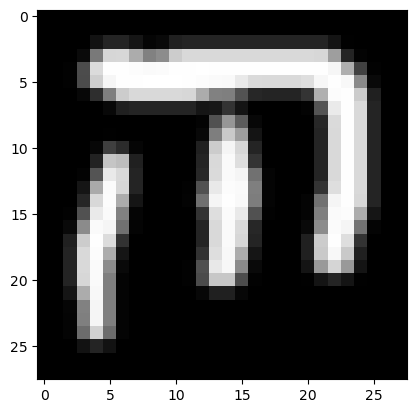

Predicted: 46, True Label: 29


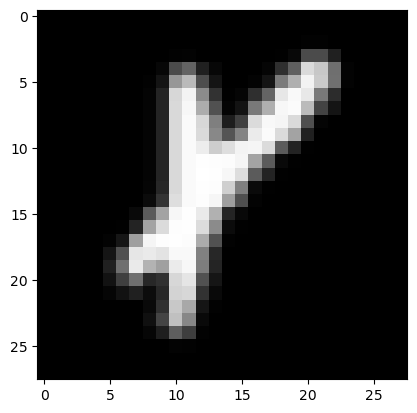

Predicted: 41, True Label: 41


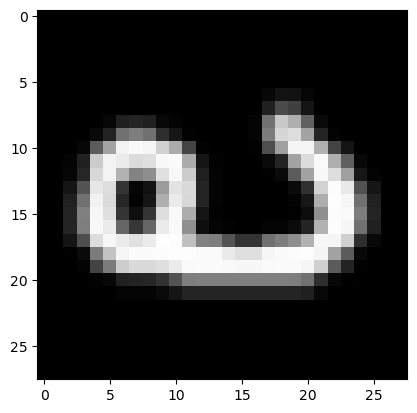

Predicted: 26, True Label: 26


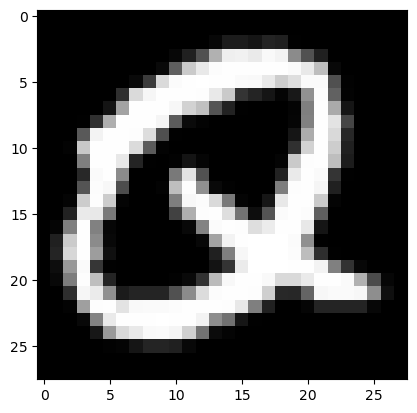

Predicted: 13, True Label: 13


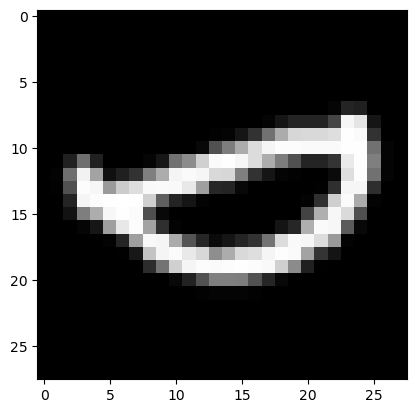

Predicted: 32, True Label: 32


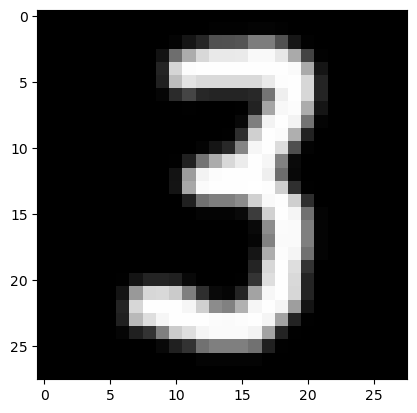

Predicted: 36, True Label: 41


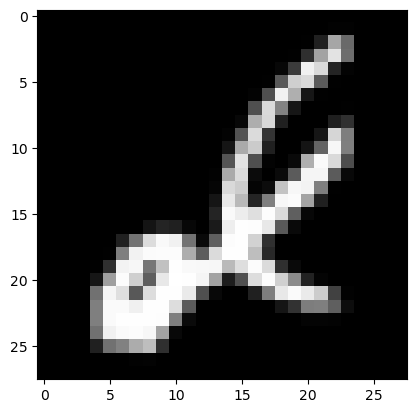

Predicted: 1, True Label: 1


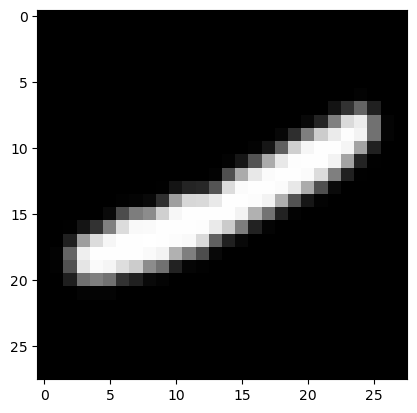

Predicted: 0, True Label: 24


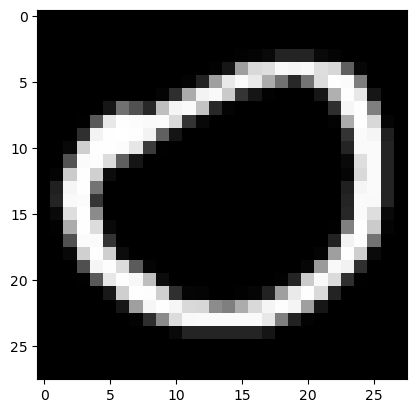

Predicted: 32, True Label: 32


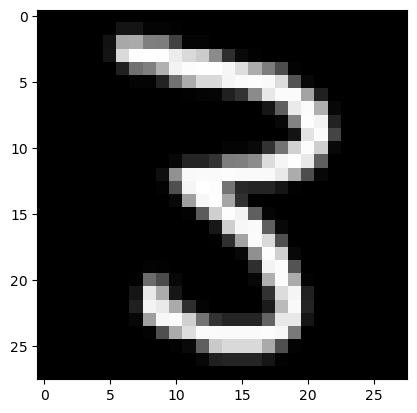

Predicted: 3, True Label: 3


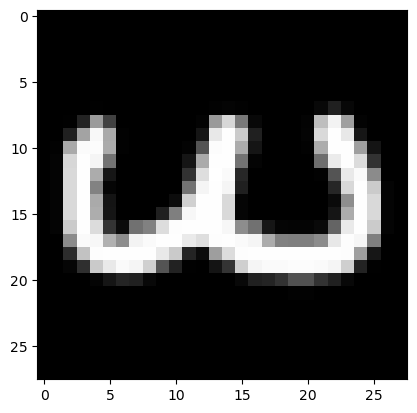

Predicted: 24, True Label: 24


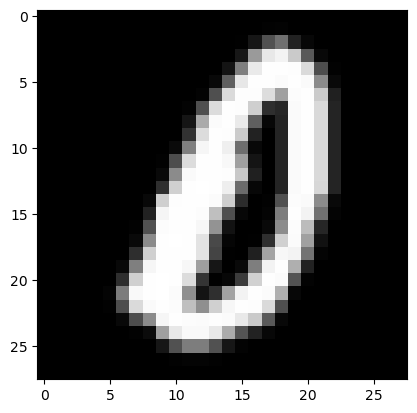

Predicted: 16, True Label: 16


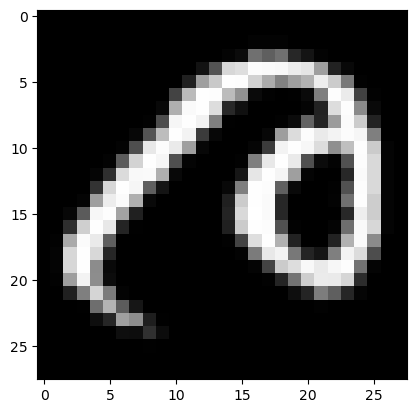

Predicted: 1, True Label: 18


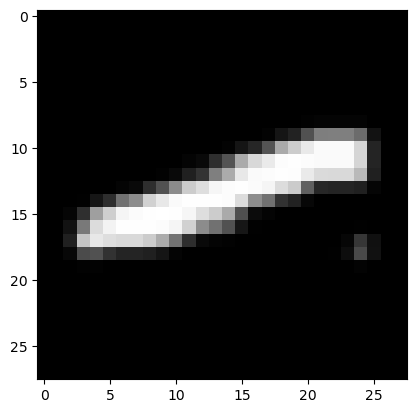

Predicted: 37, True Label: 37


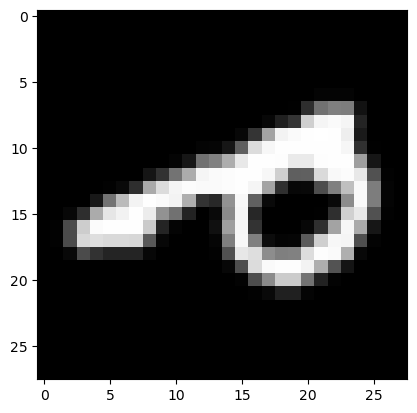

Predicted: 9, True Label: 44


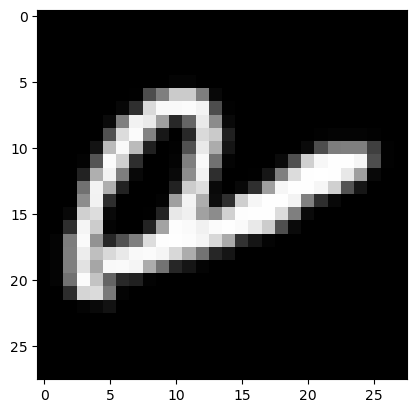

Predicted: 7, True Label: 7


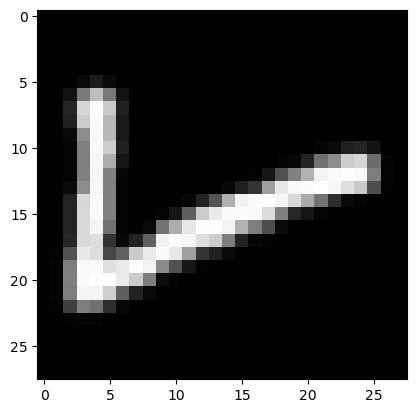

Predicted: 43, True Label: 43


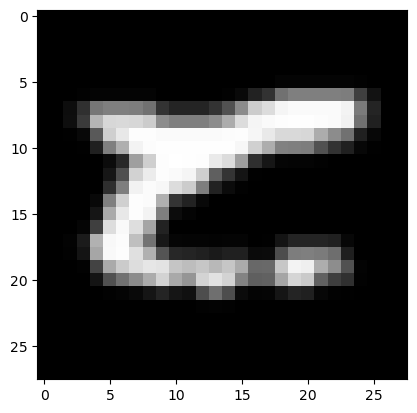

Predicted: 43, True Label: 43


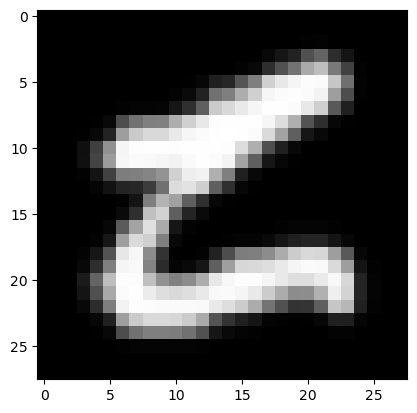

Predicted: 24, True Label: 24


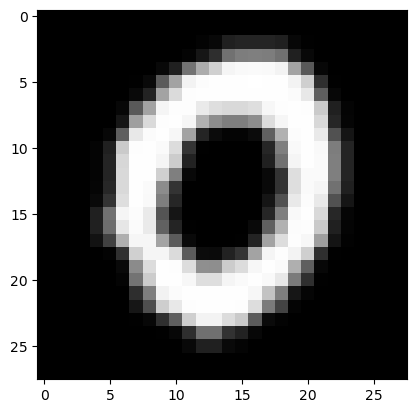

Predicted: 16, True Label: 16


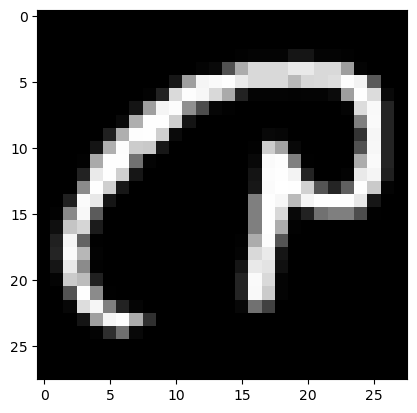

Predicted: 3, True Label: 3


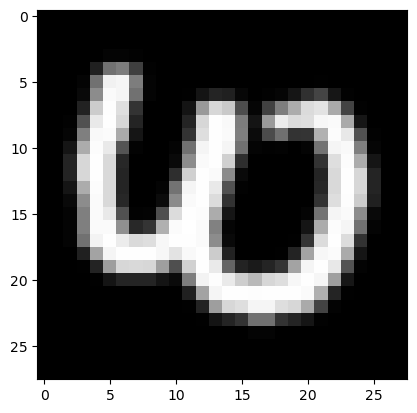

Predicted: 0, True Label: 0


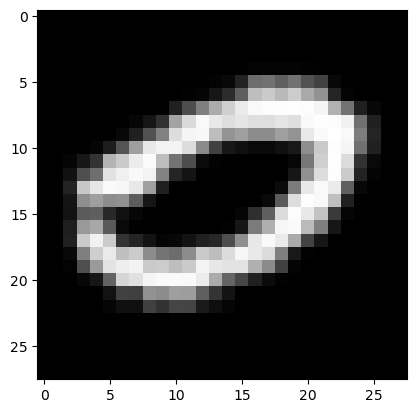

Predicted: 2, True Label: 2


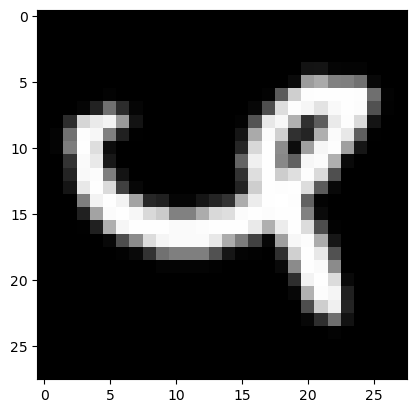

Predicted: 31, True Label: 31


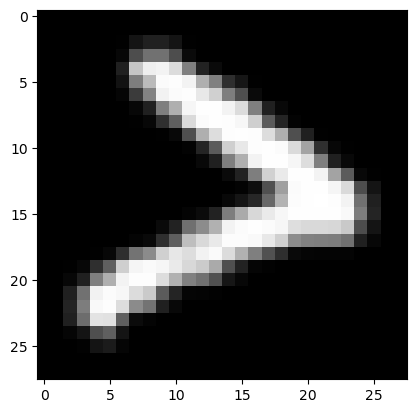

Predicted: 15, True Label: 15


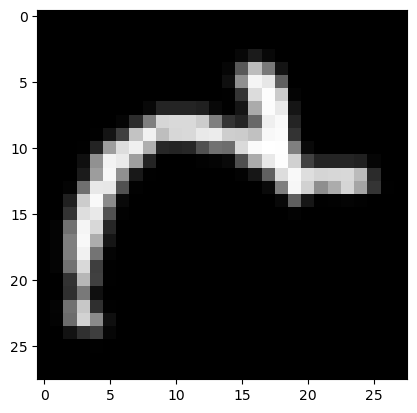

Predicted: 22, True Label: 22


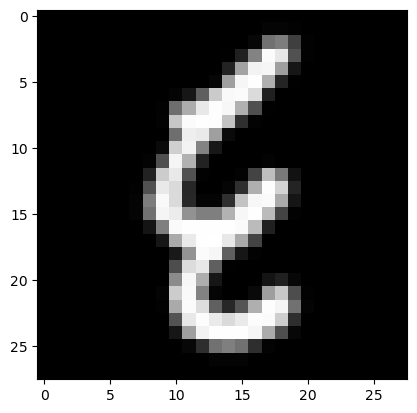

Predicted: 19, True Label: 19


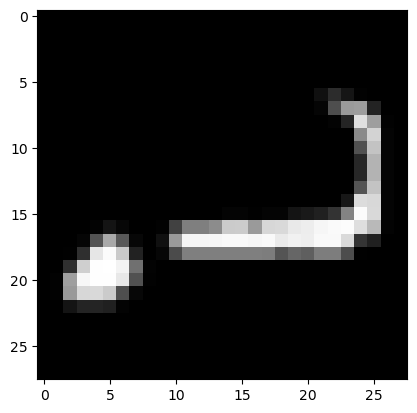

Predicted: 26, True Label: 26


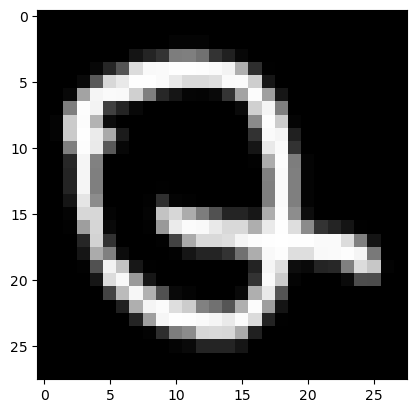

Predicted: 21, True Label: 21


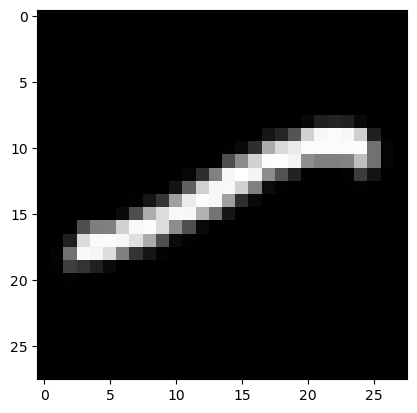

Predicted: 35, True Label: 35


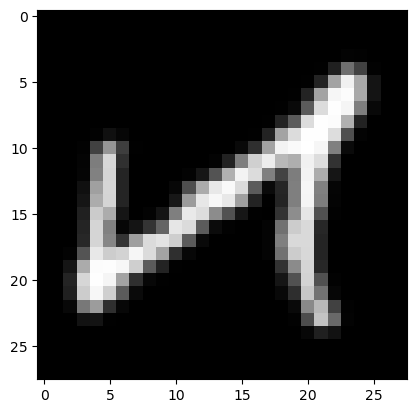

Predicted: 32, True Label: 32


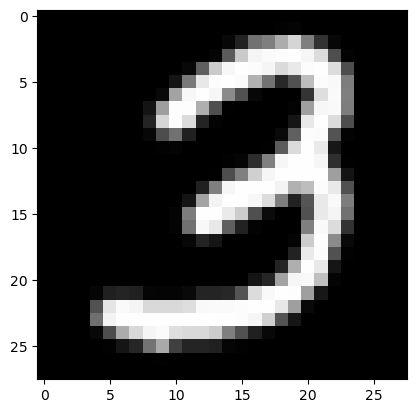

Predicted: 23, True Label: 23


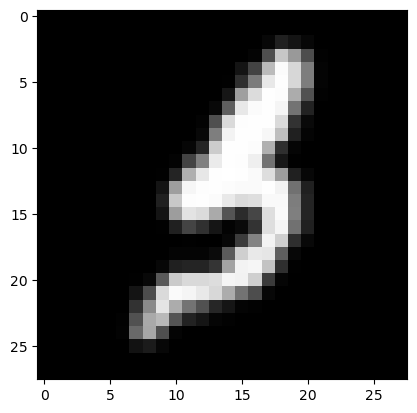

Predicted: 46, True Label: 46


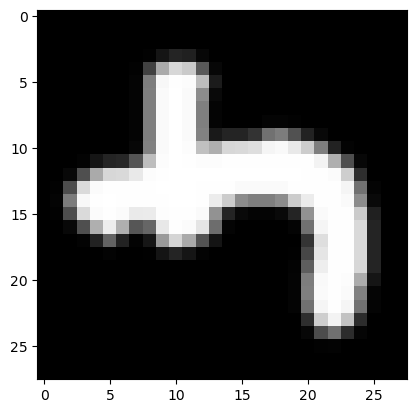

Predicted: 2, True Label: 2


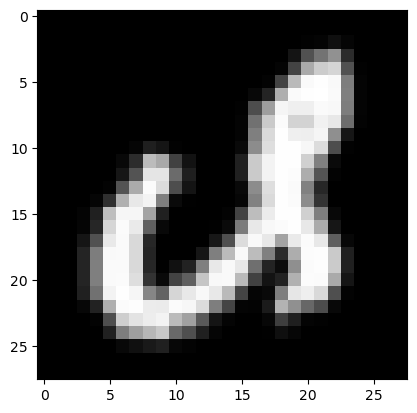

Predicted: 38, True Label: 38


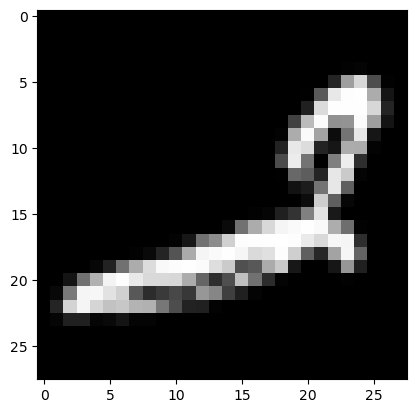

Predicted: 4, True Label: 4


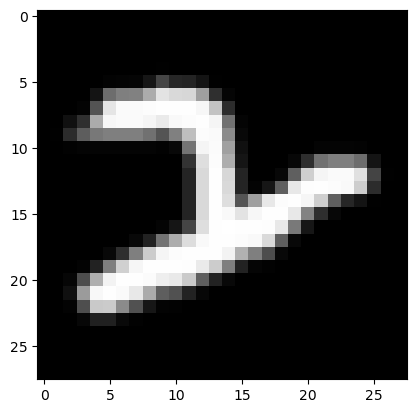

Predicted: 46, True Label: 29


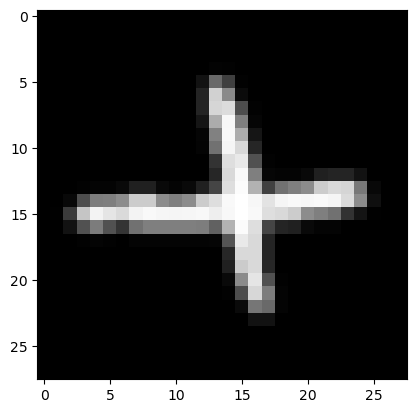

Predicted: 28, True Label: 28


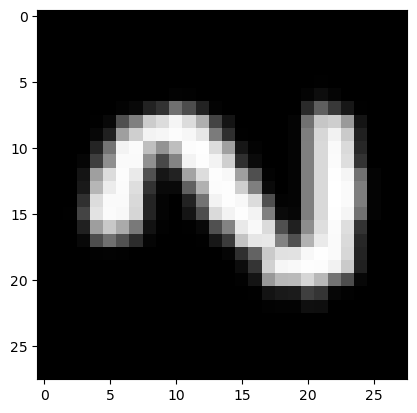

Predicted: 23, True Label: 23


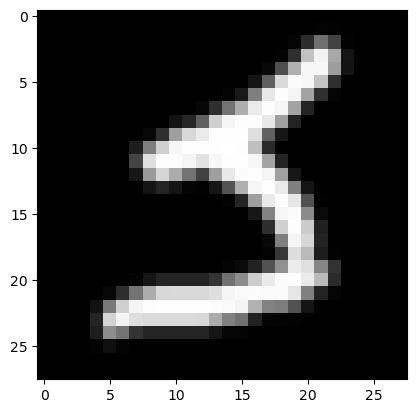

Predicted: 31, True Label: 31


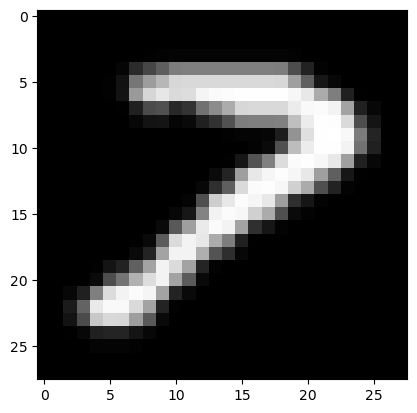

Predicted: 34, True Label: 34


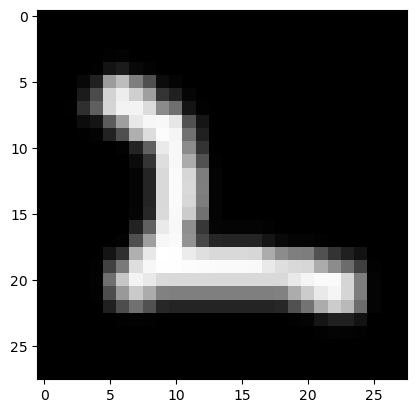

Predicted: 12, True Label: 12


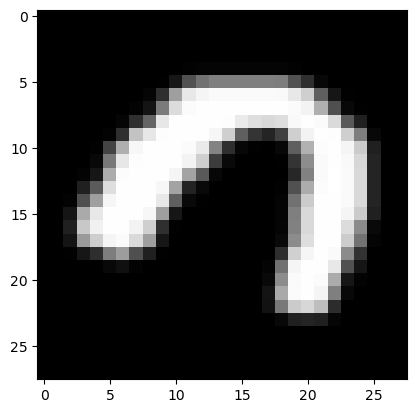

Predicted: 17, True Label: 17


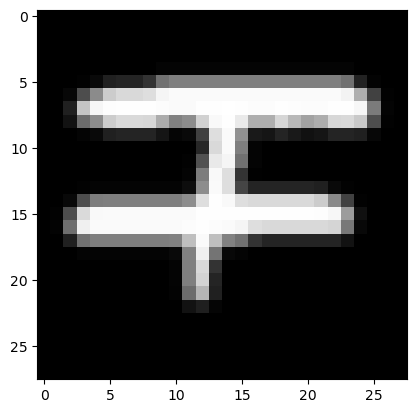

Predicted: 34, True Label: 34


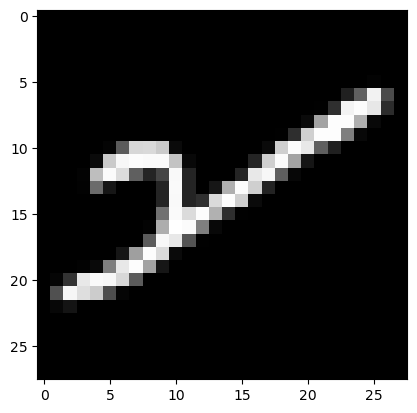

Predicted: 15, True Label: 40


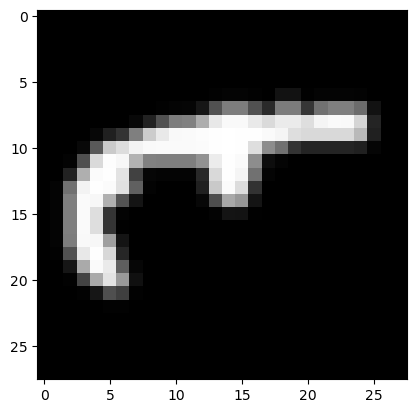

Predicted: 15, True Label: 40


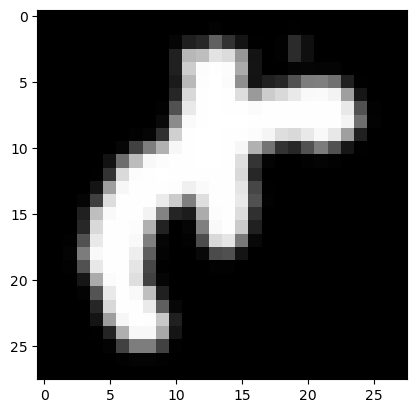

Predicted: 10, True Label: 10


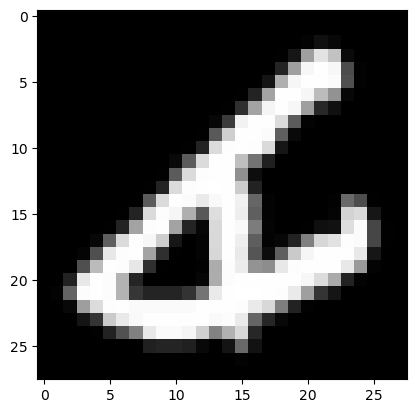

Predicted: 3, True Label: 3


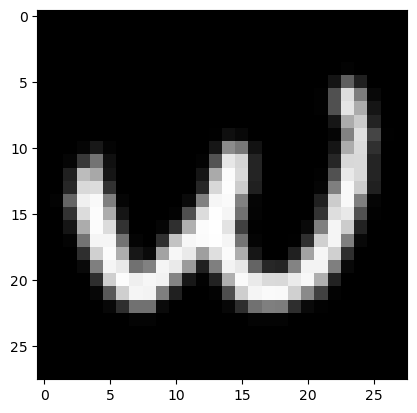

Predicted: 23, True Label: 23


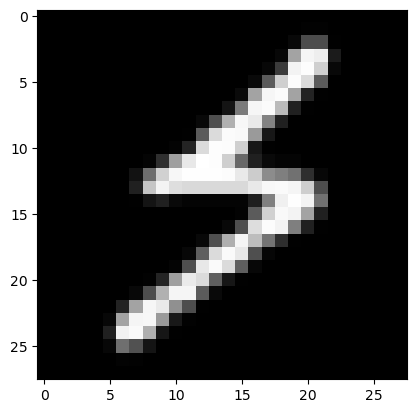

Predicted: 15, True Label: 40


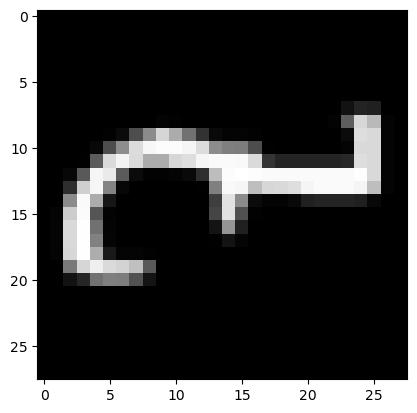

Predicted: 29, True Label: 29


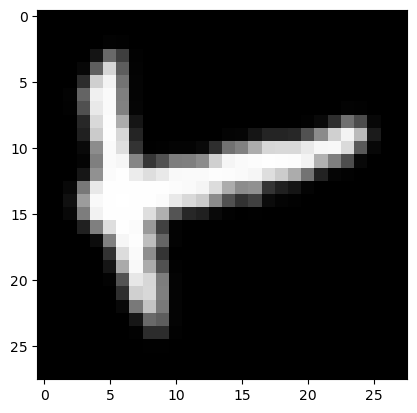

Predicted: 36, True Label: 36


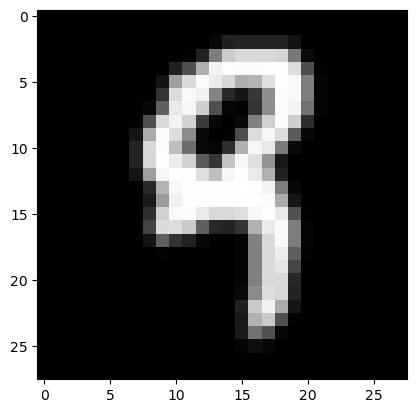

Predicted: 13, True Label: 13


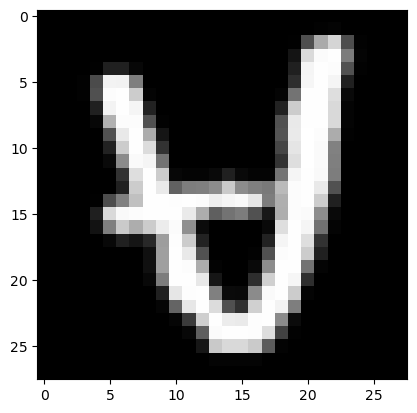

Predicted: 32, True Label: 32


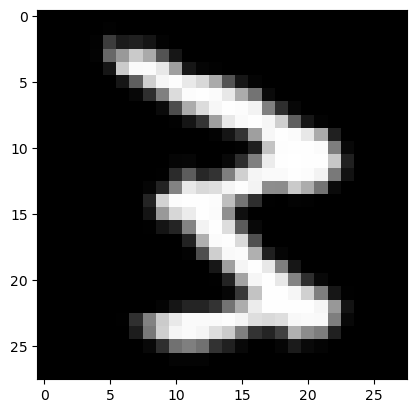

Predicted: 13, True Label: 13


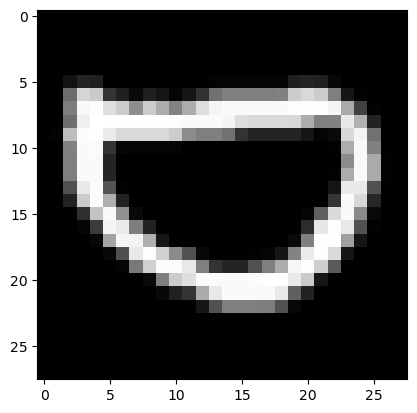

Predicted: 7, True Label: 7


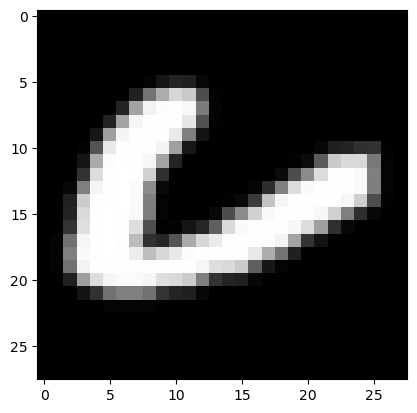

Predicted: 36, True Label: 41


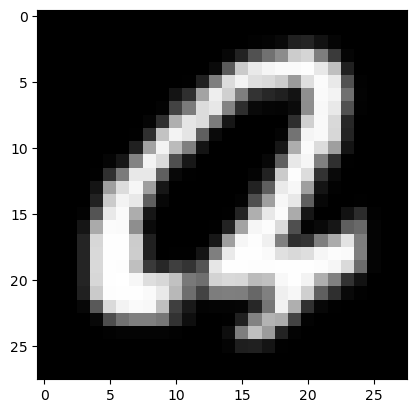

Predicted: 34, True Label: 34


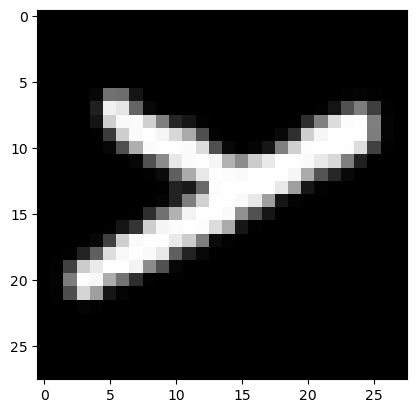

Predicted: 5, True Label: 5


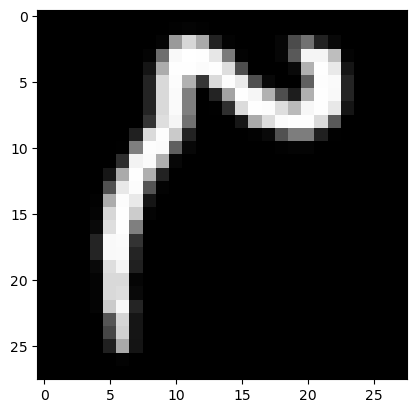

Predicted: 16, True Label: 16


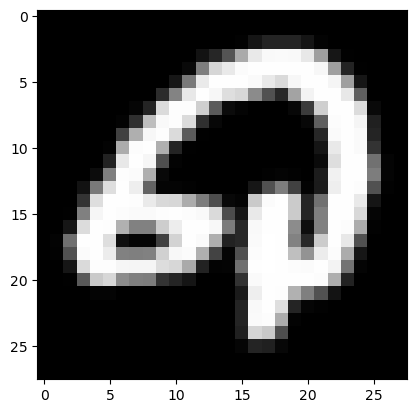

Predicted: 4, True Label: 4


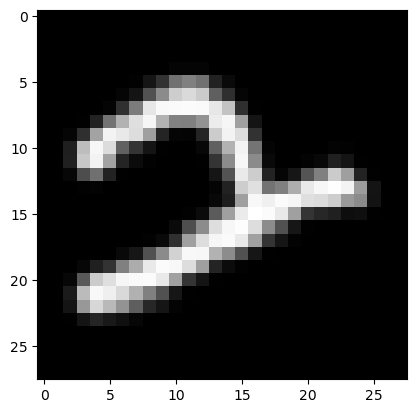

Predicted: 35, True Label: 35


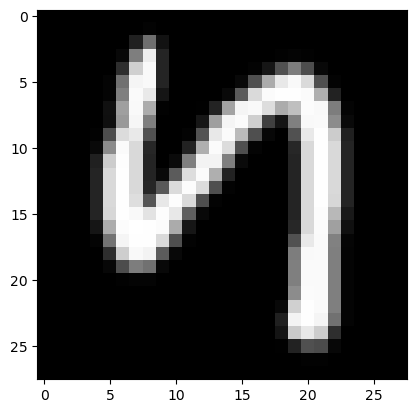

Predicted: 24, True Label: 24


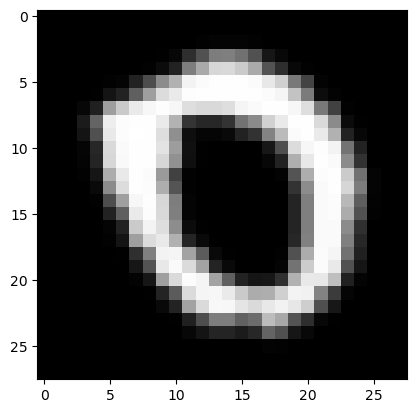

Predicted: 34, True Label: 34


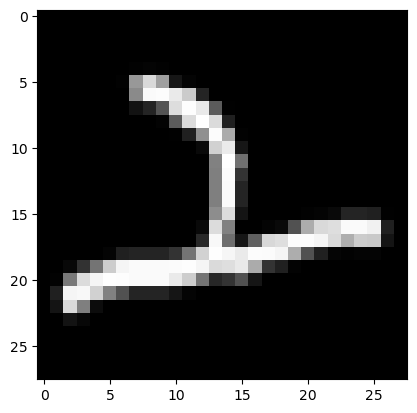

Predicted: 45, True Label: 45


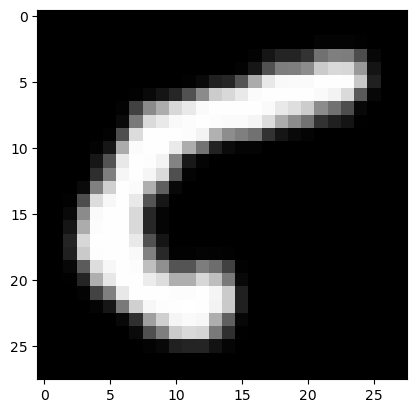

Predicted: 17, True Label: 17


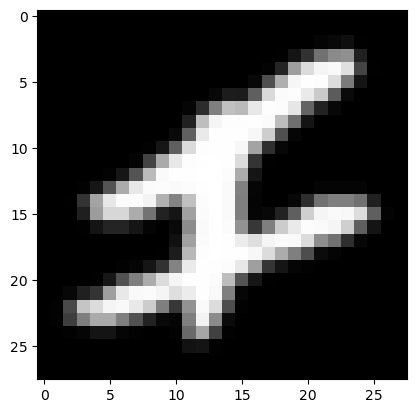

Predicted: 43, True Label: 43


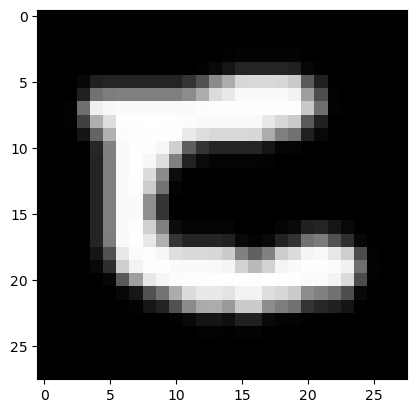

Predicted: 31, True Label: 31


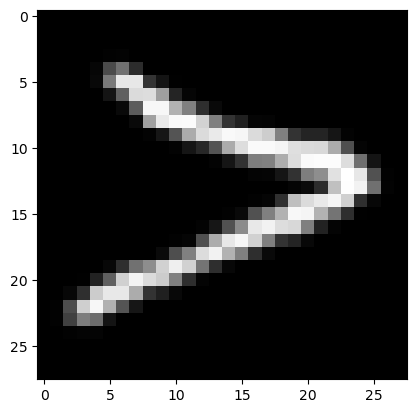

Predicted: 26, True Label: 26


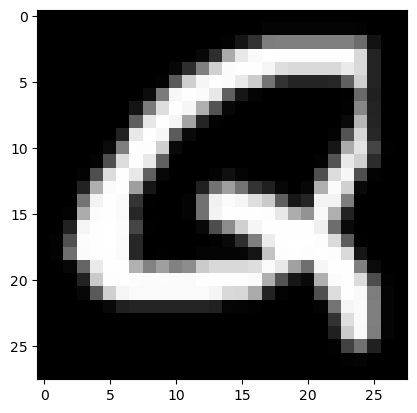

Predicted: 0, True Label: 0


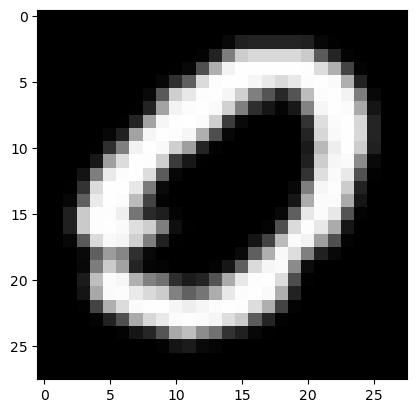

Predicted: 21, True Label: 21


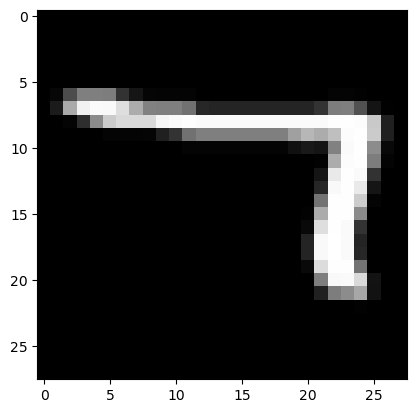

Predicted: 45, True Label: 25


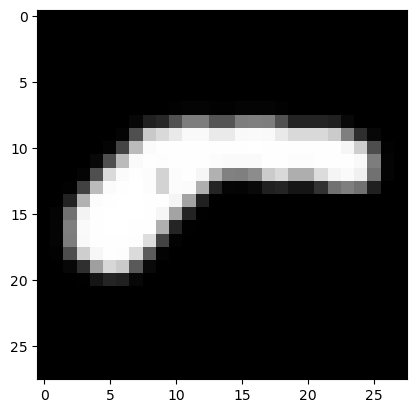

Predicted: 42, True Label: 42


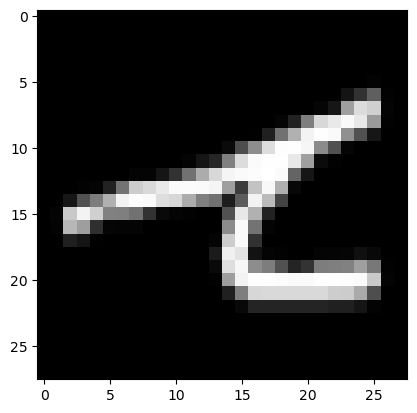

Predicted: 11, True Label: 11


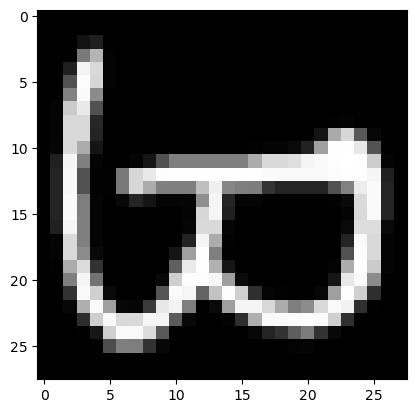

Predicted: 3, True Label: 3


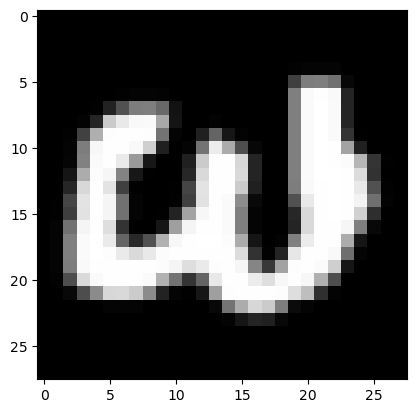

Predicted: 44, True Label: 44


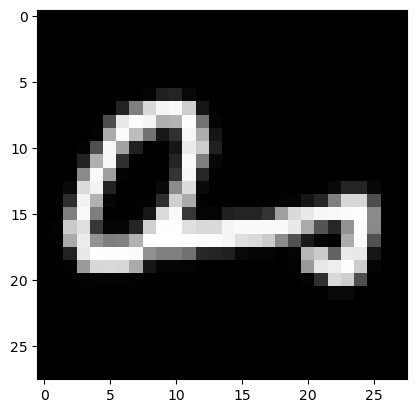

Predicted: 34, True Label: 34


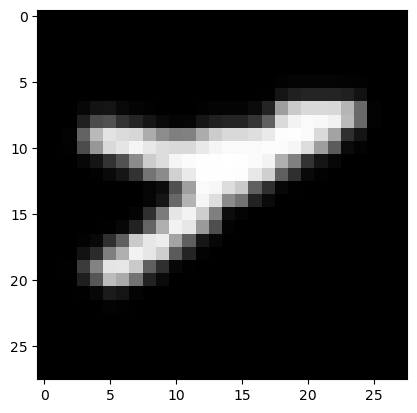

Predicted: 27, True Label: 27


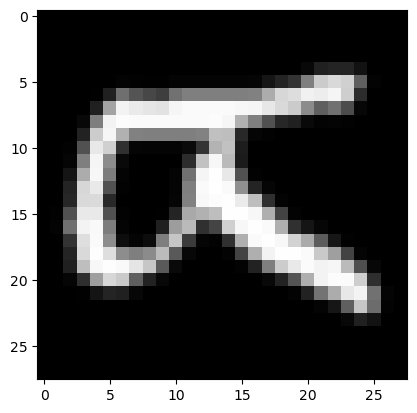

Predicted: 1, True Label: 18


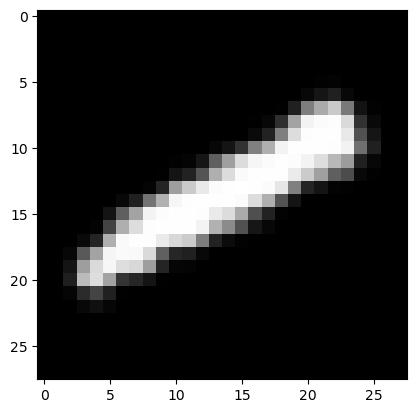

Predicted: 23, True Label: 23


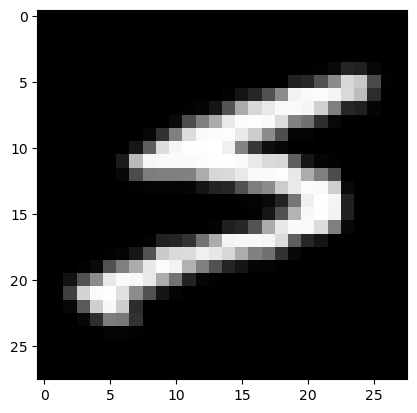

Predicted: 5, True Label: 5


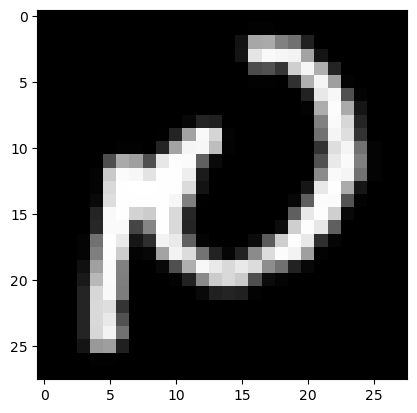

Predicted: 42, True Label: 6


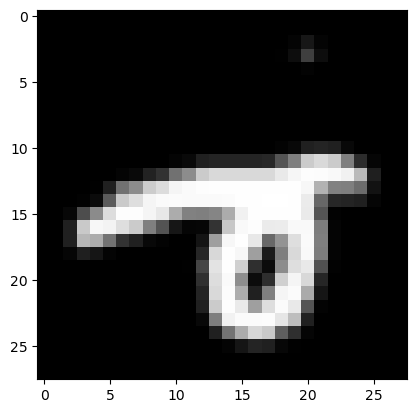

Predicted: 18, True Label: 18


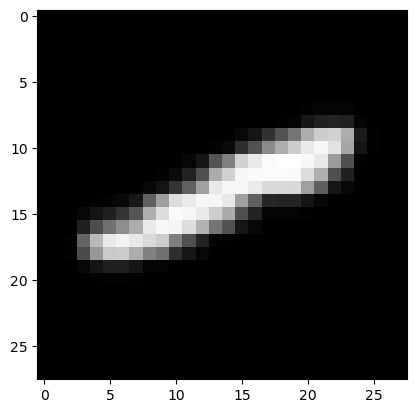

Predicted: 5, True Label: 5


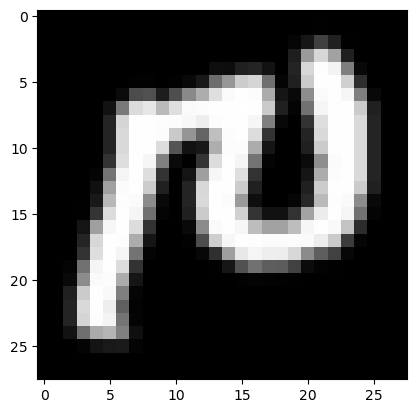

Predicted: 4, True Label: 34


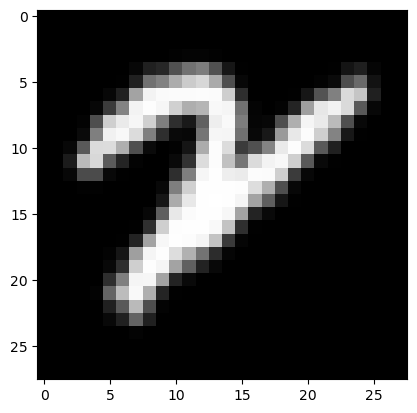

Predicted: 14, True Label: 14


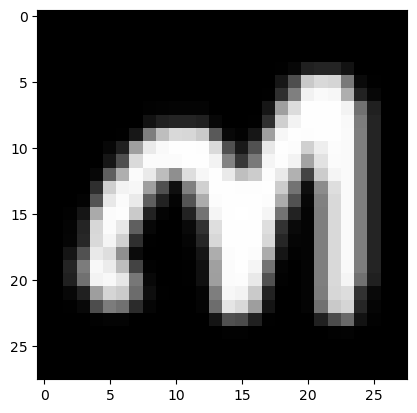

Predicted: 10, True Label: 10


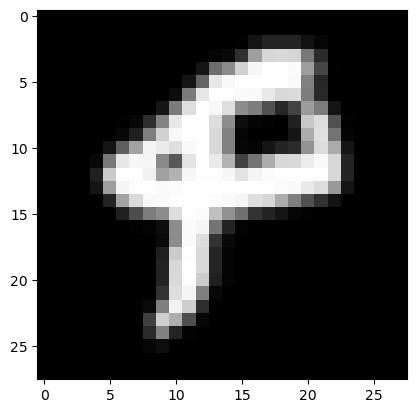

Predicted: 11, True Label: 11


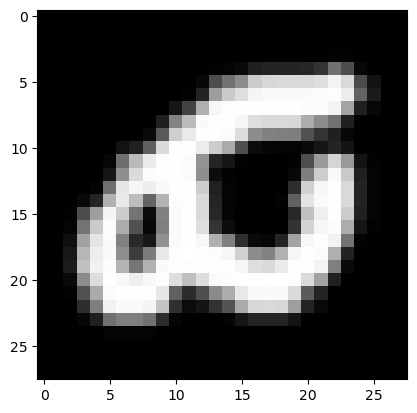

Predicted: 38, True Label: 38


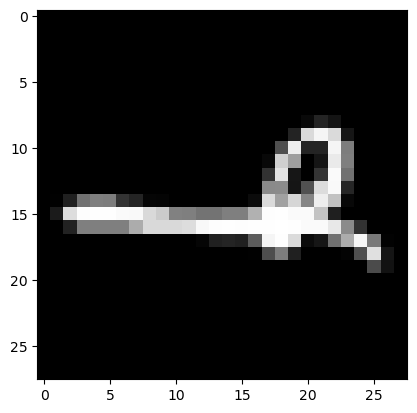

Predicted: 14, True Label: 14


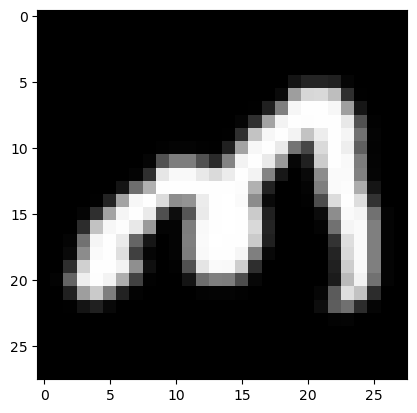

Predicted: 3, True Label: 3


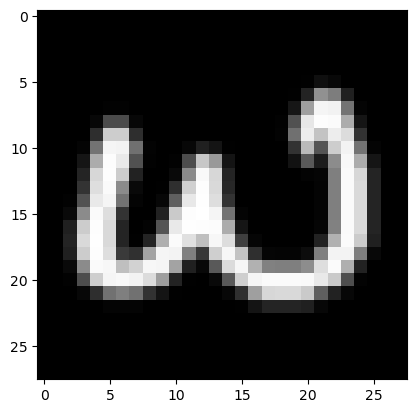

Predicted: 31, True Label: 31


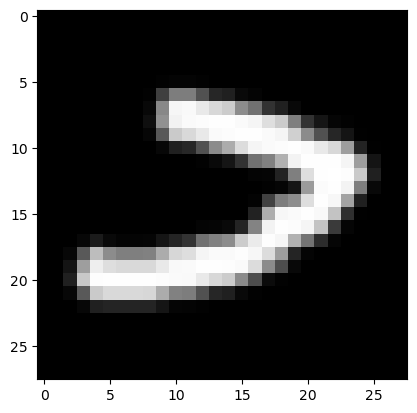

Predicted: 7, True Label: 7


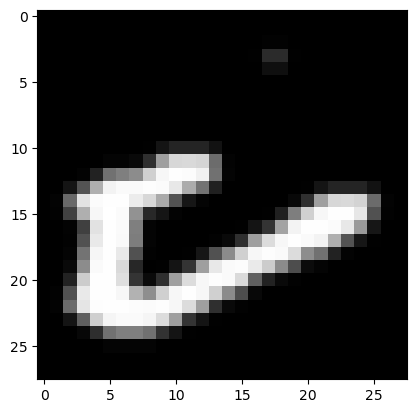

Predicted: 24, True Label: 13


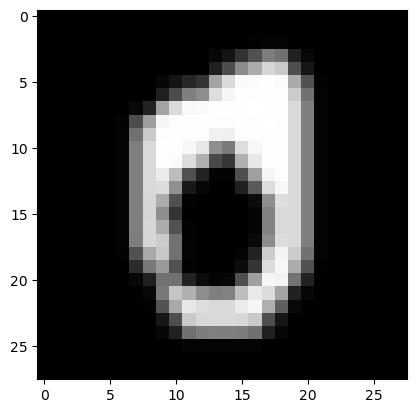

Predicted: 27, True Label: 27


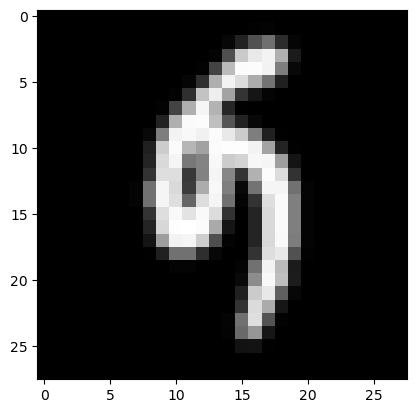

Predicted: 2, True Label: 2


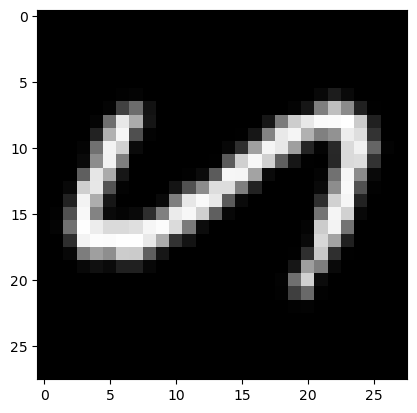

Predicted: 5, True Label: 5


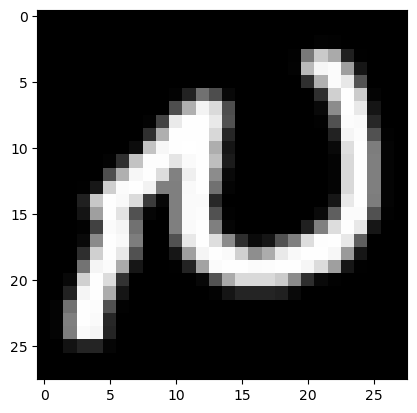

Predicted: 6, True Label: 6


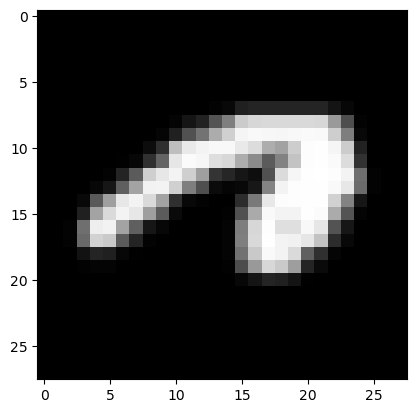

Predicted: 38, True Label: 38


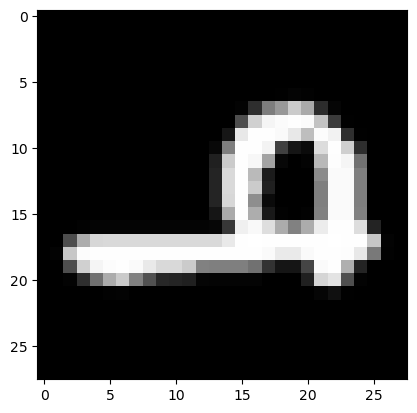

Predicted: 36, True Label: 36


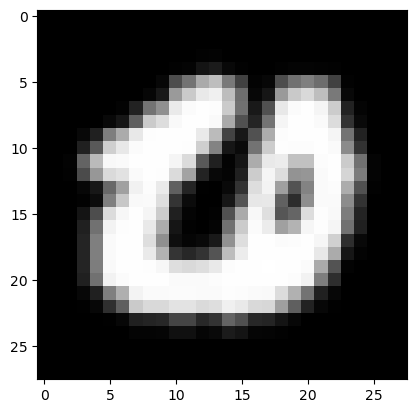

Predicted: 41, True Label: 44


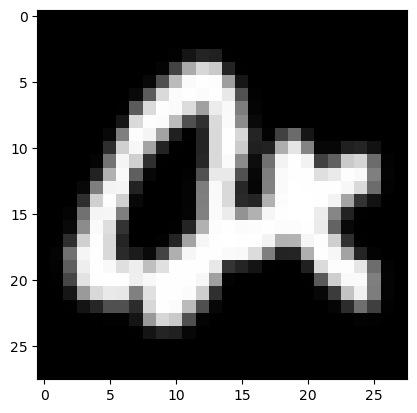

Predicted: 12, True Label: 12


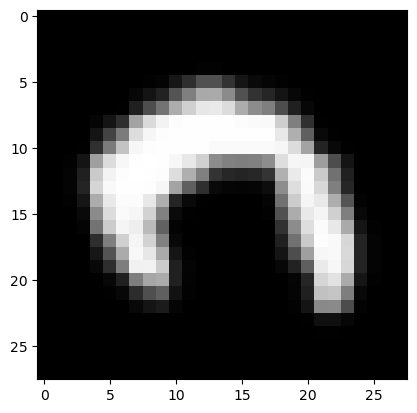

Predicted: 13, True Label: 13


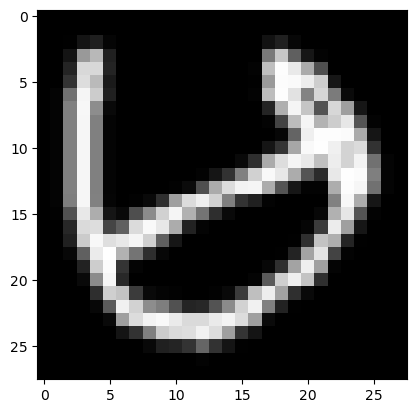

Predicted: 43, True Label: 43


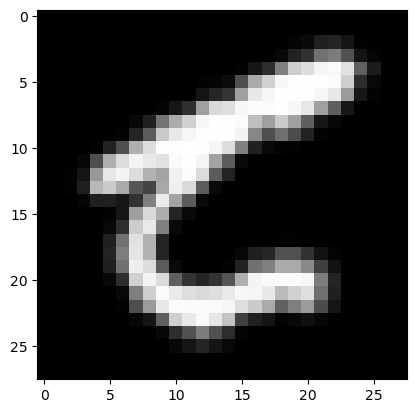

Predicted: 8, True Label: 41


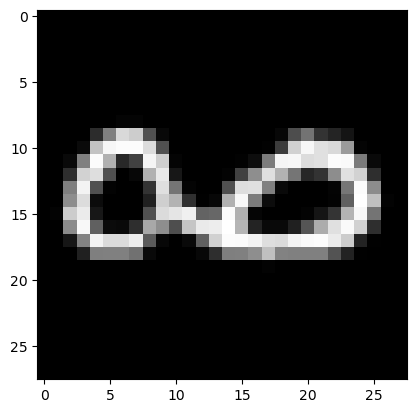

Predicted: 12, True Label: 12


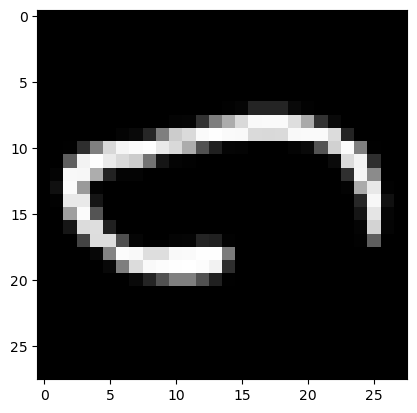

Predicted: 5, True Label: 5


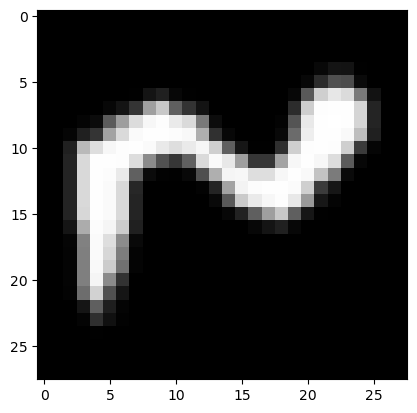

Predicted: 20, True Label: 20


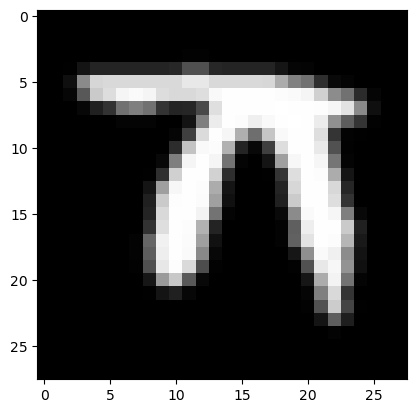

Predicted: 34, True Label: 34


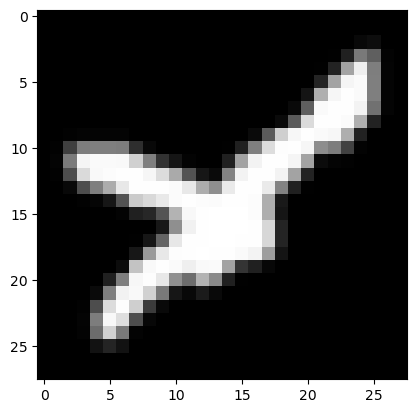

Predicted: 35, True Label: 35


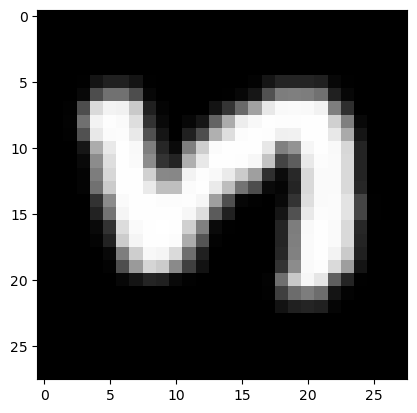

Predicted: 45, True Label: 45


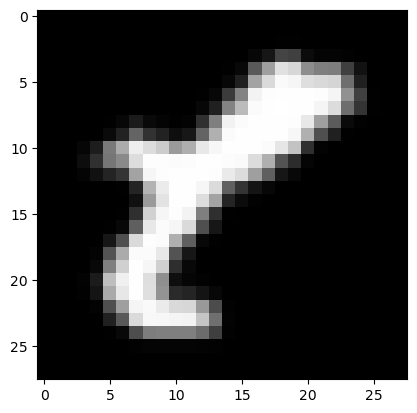

Predicted: 32, True Label: 32


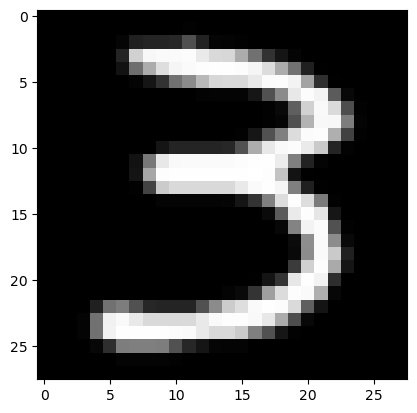

Predicted: 0, True Label: 0


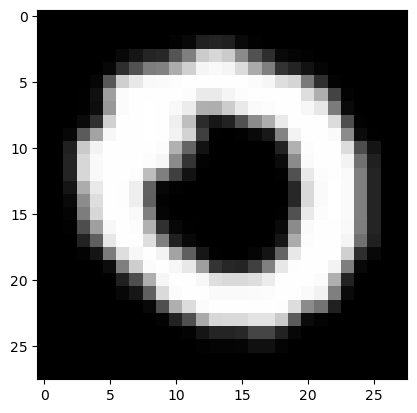

Predicted: 12, True Label: 12


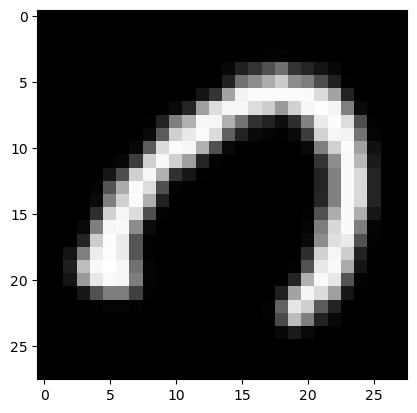

Predicted: 41, True Label: 41


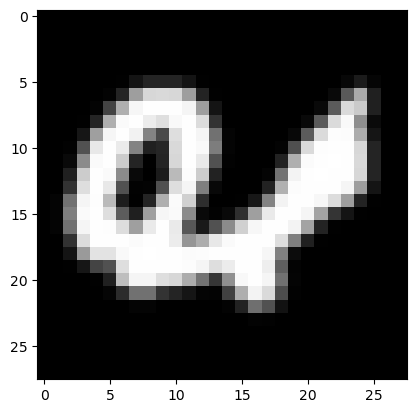

Predicted: 7, True Label: 7


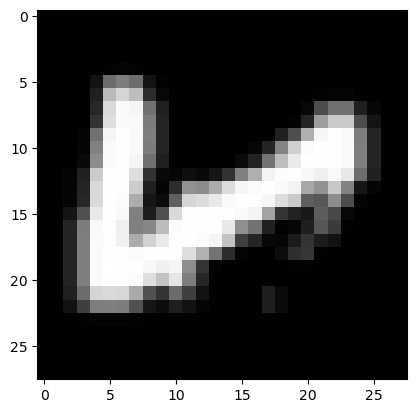

Predicted: 37, True Label: 37


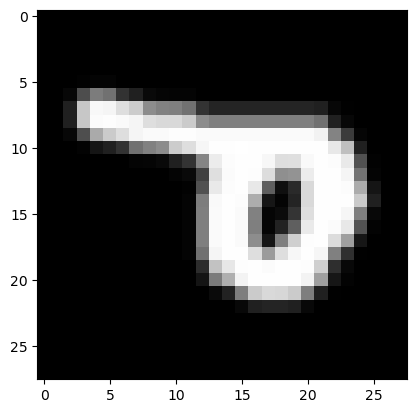

Predicted: 18, True Label: 18


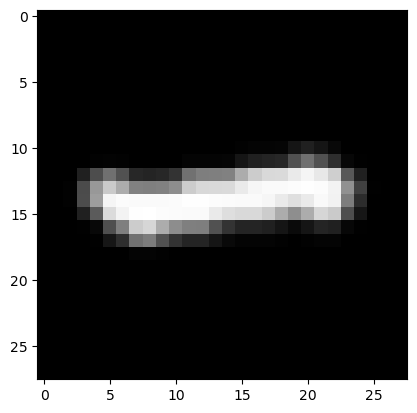

Predicted: 16, True Label: 16


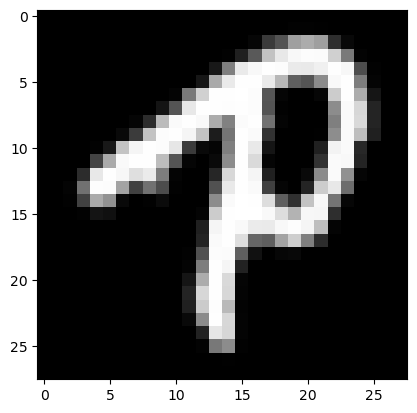

Predicted: 30, True Label: 30


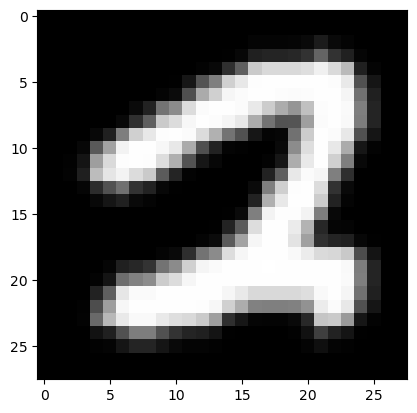

Predicted: 24, True Label: 24


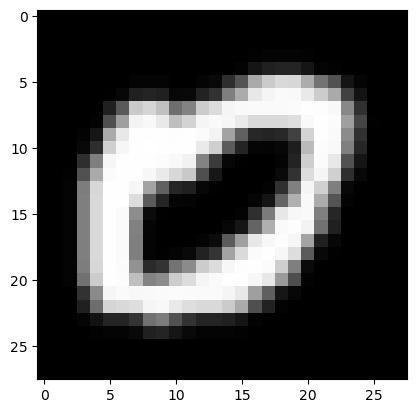

Predicted: 6, True Label: 6


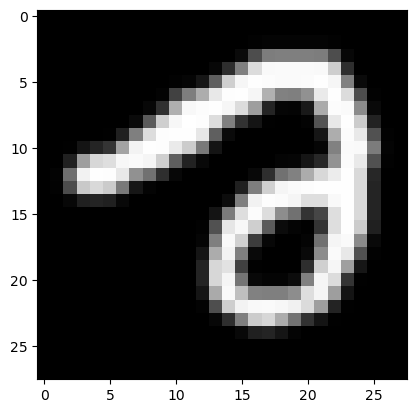

Predicted: 3, True Label: 3


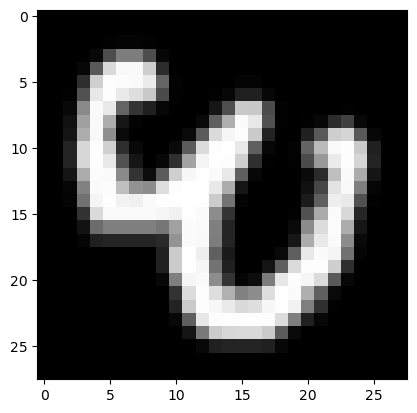

Predicted: 26, True Label: 26


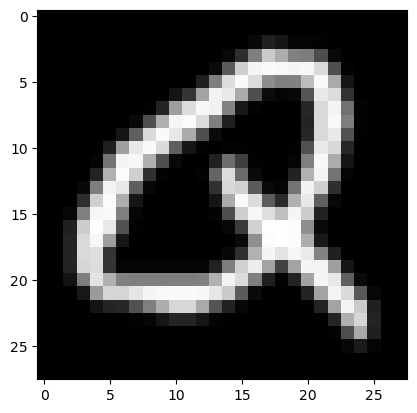

Predicted: 46, True Label: 46


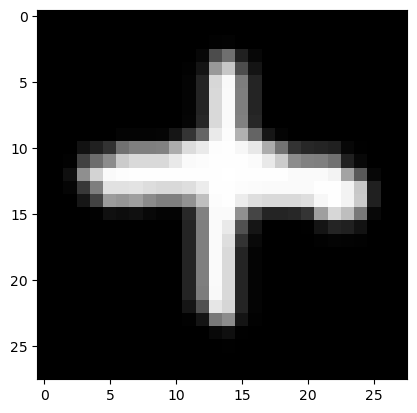

Predicted: 29, True Label: 29


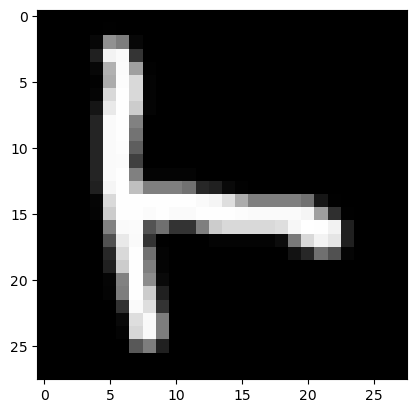

Predicted: 17, True Label: 17


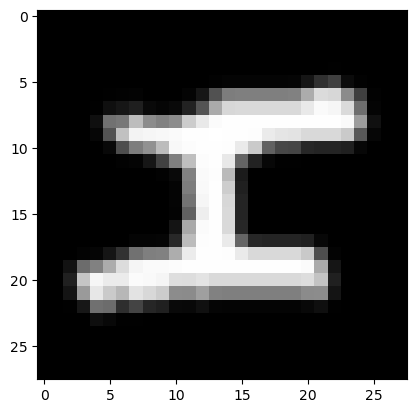

Predicted: 2, True Label: 2


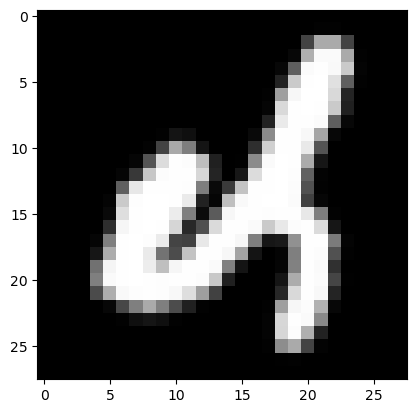

Predicted: 28, True Label: 28


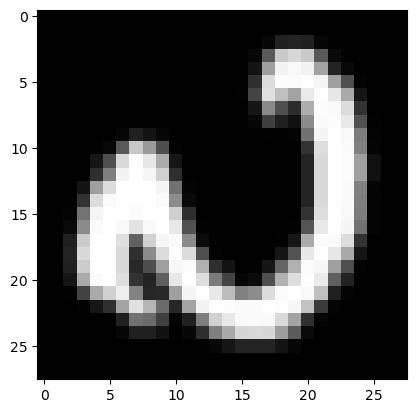

Predicted: 44, True Label: 44


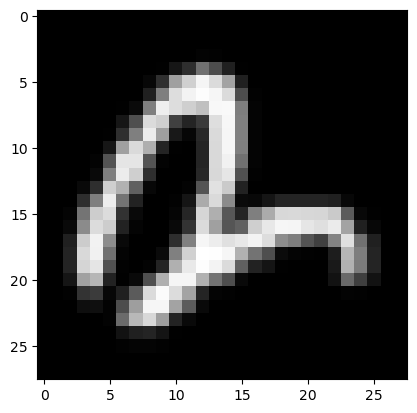

Predicted: 40, True Label: 40


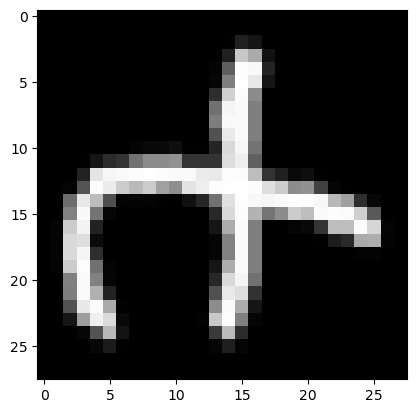

Predicted: 13, True Label: 13


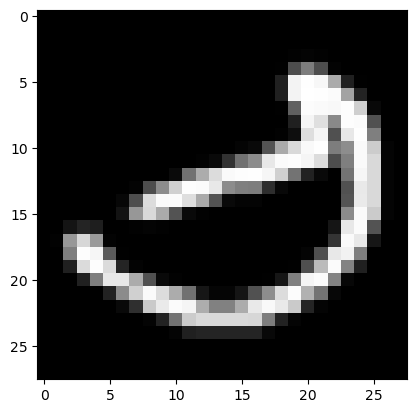

Predicted: 16, True Label: 16


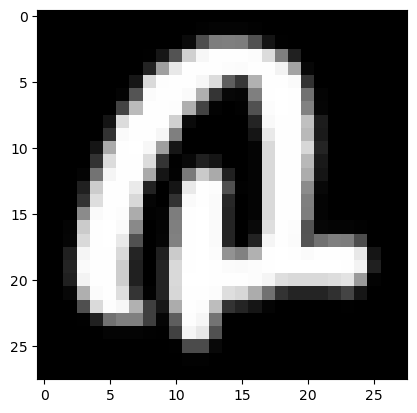

Predicted: 30, True Label: 30


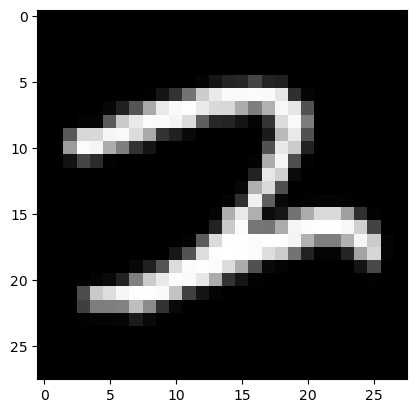

Predicted: 11, True Label: 11


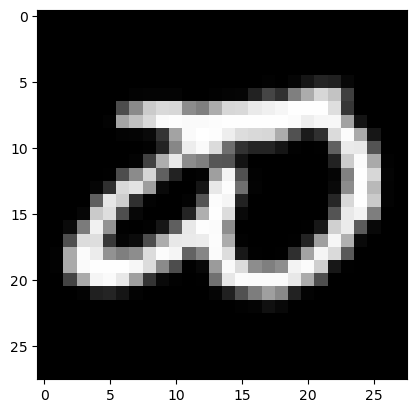

Predicted: 38, True Label: 38


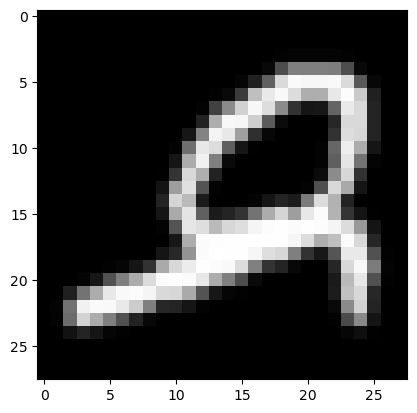

Predicted: 42, True Label: 42


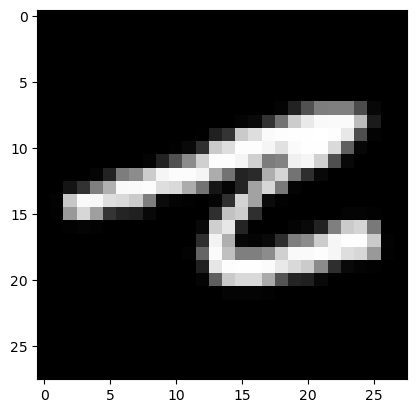

Predicted: 33, True Label: 33


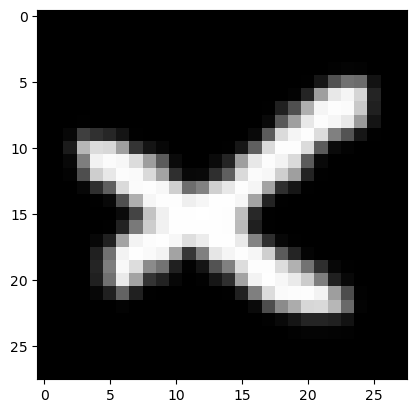

Predicted: 35, True Label: 35


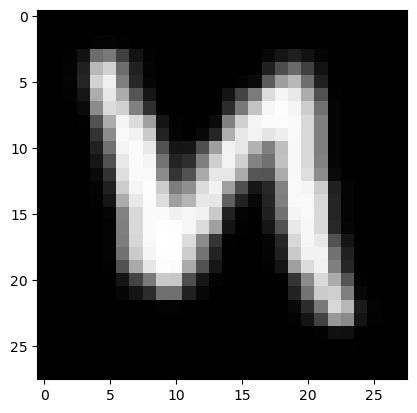

Predicted: 28, True Label: 28


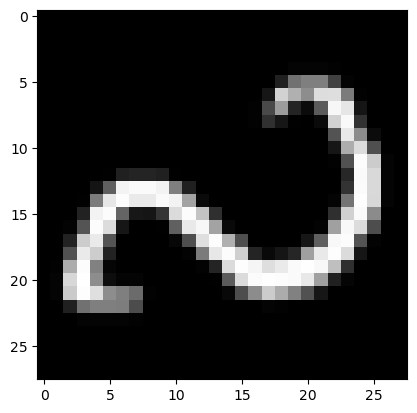

Predicted: 39, True Label: 39


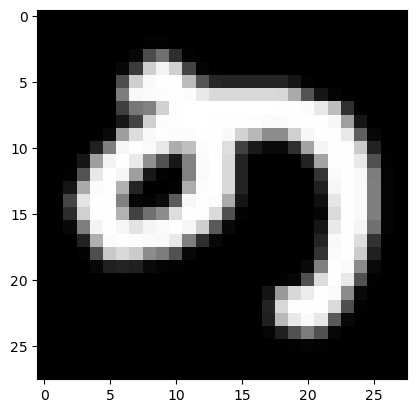

Predicted: 15, True Label: 15


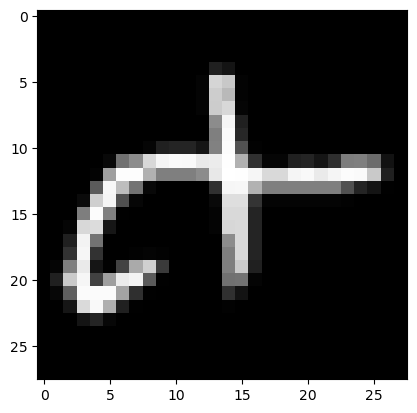

Predicted: 6, True Label: 37


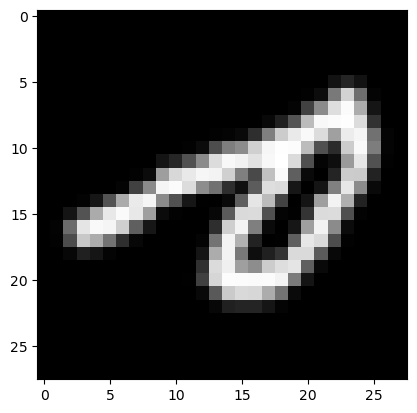

Predicted: 38, True Label: 38


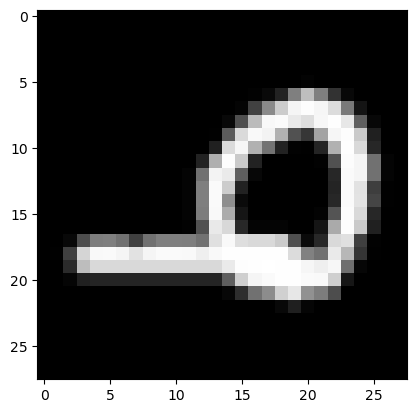

Predicted: 10, True Label: 10


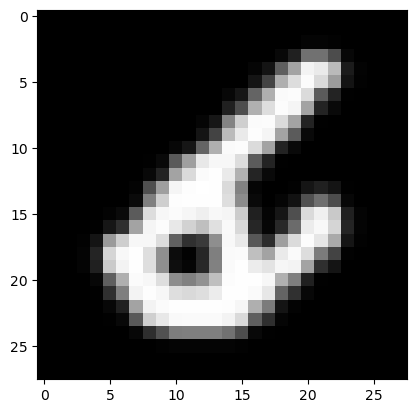

Predicted: 24, True Label: 24


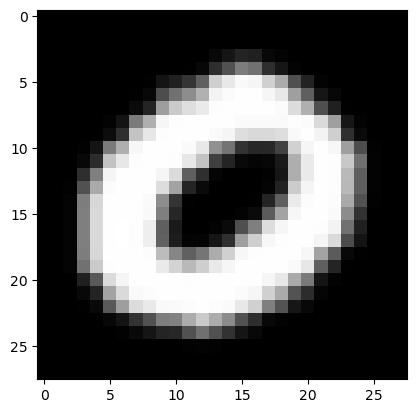

Predicted: 28, True Label: 28


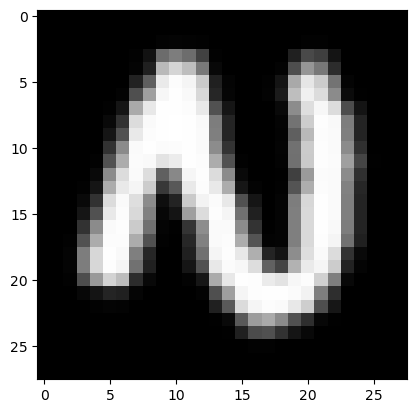

Predicted: 25, True Label: 25


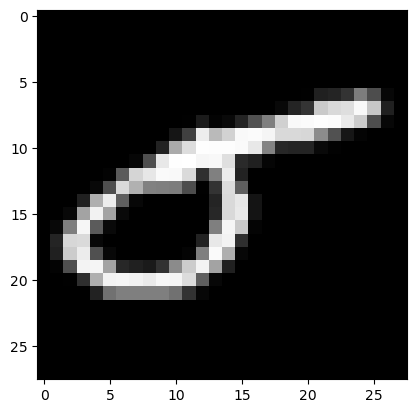

Predicted: 18, True Label: 21


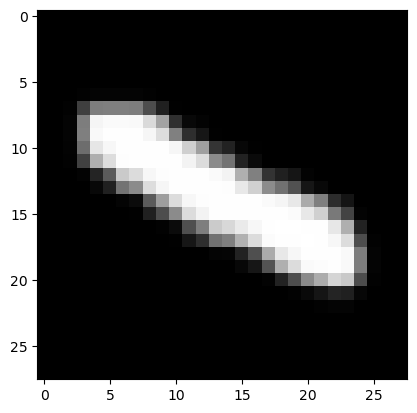

Predicted: 21, True Label: 18


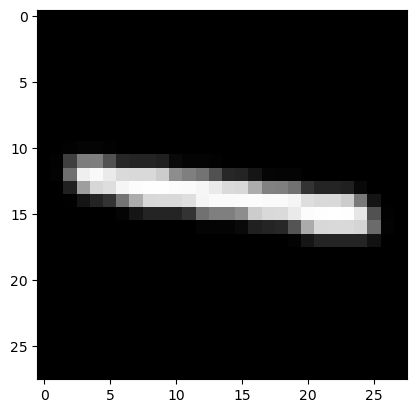

Predicted: 27, True Label: 27


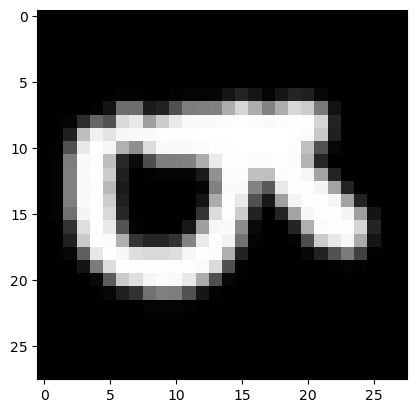

Predicted: 12, True Label: 12


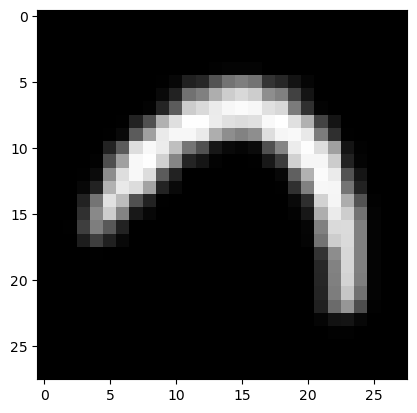

Predicted: 28, True Label: 28


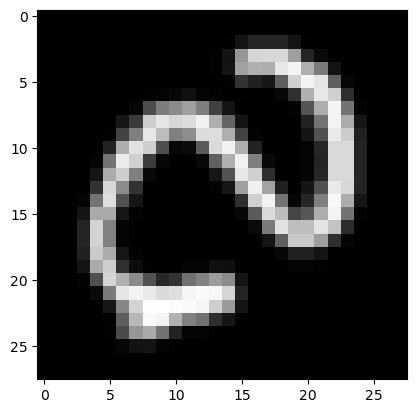

Predicted: 2, True Label: 2


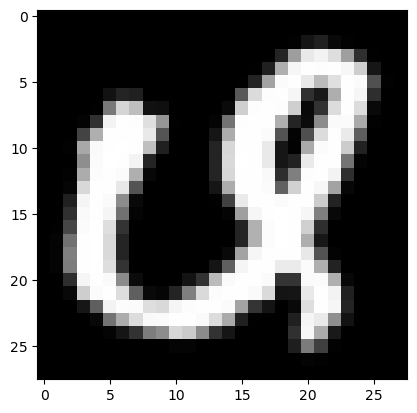

Predicted: 12, True Label: 12


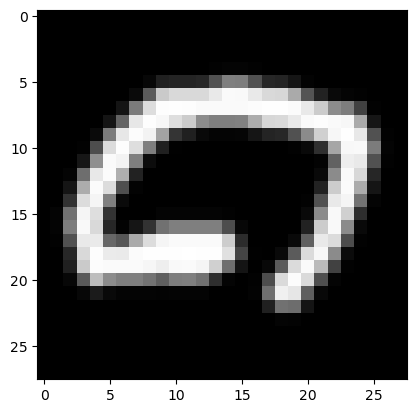

Predicted: 41, True Label: 41


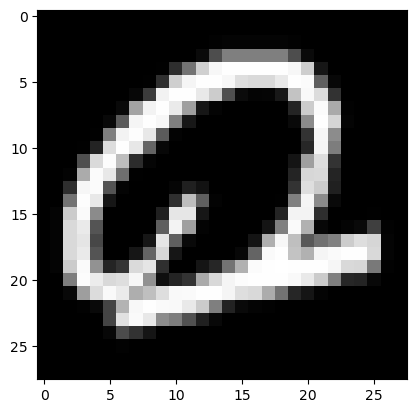

Predicted: 4, True Label: 4


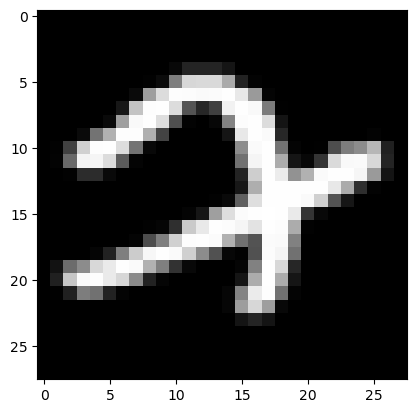

Predicted: 16, True Label: 16


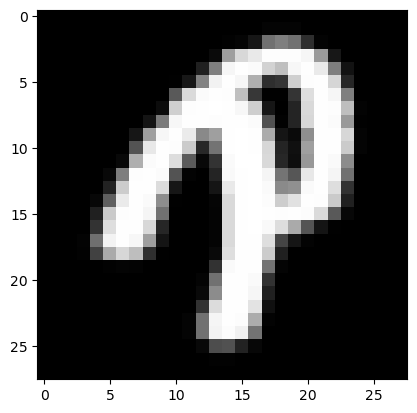

Predicted: 35, True Label: 35


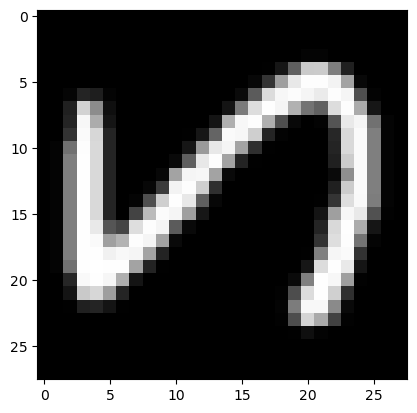

Predicted: 37, True Label: 37


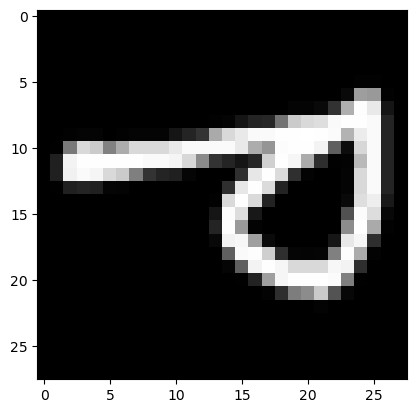

Predicted: 45, True Label: 45


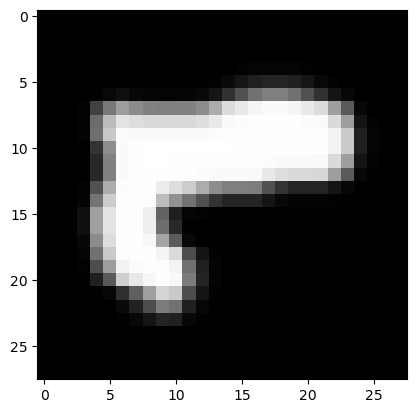

Predicted: 3, True Label: 3


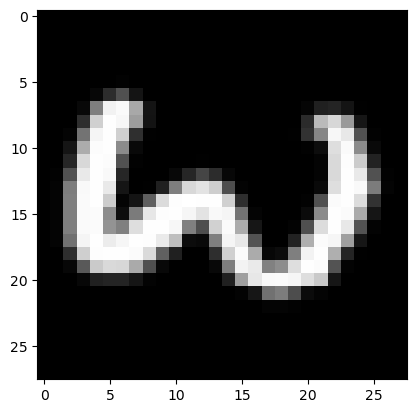

Predicted: 44, True Label: 44


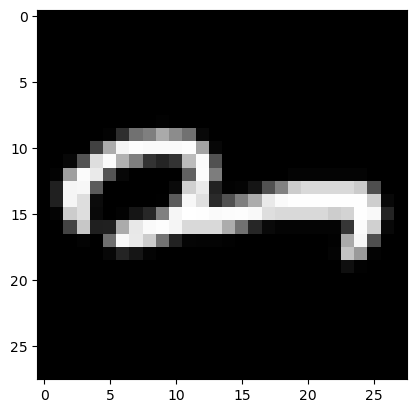

Predicted: 41, True Label: 41


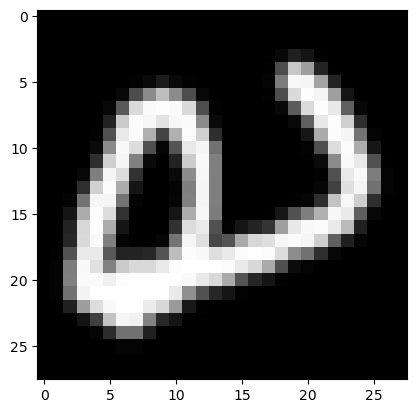

Predicted: 32, True Label: 32


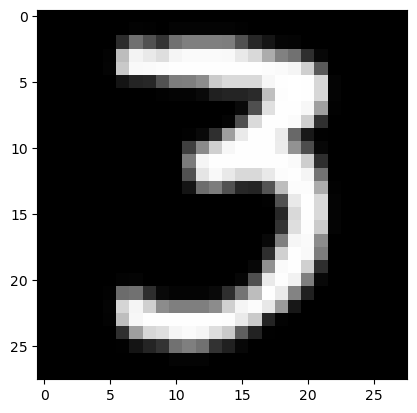

Predicted: 41, True Label: 44


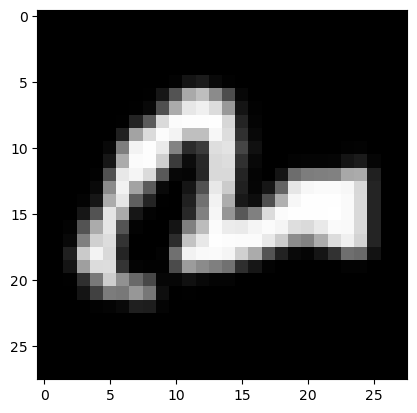

Predicted: 23, True Label: 23


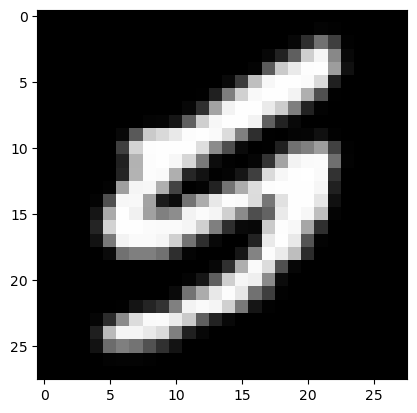

Predicted: 46, True Label: 46


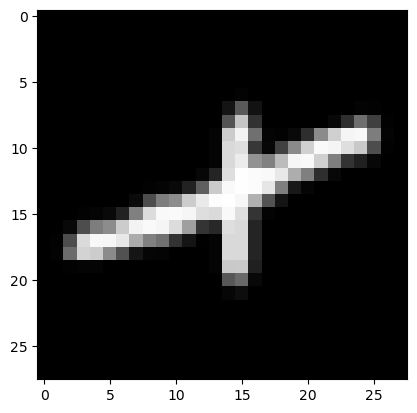

Predicted: 15, True Label: 15


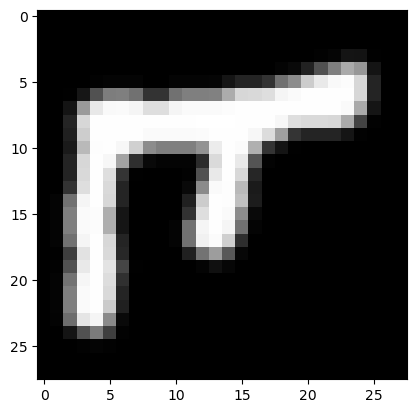

Predicted: 25, True Label: 25


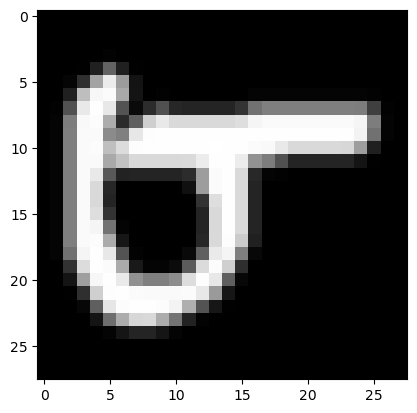

Predicted: 46, True Label: 46


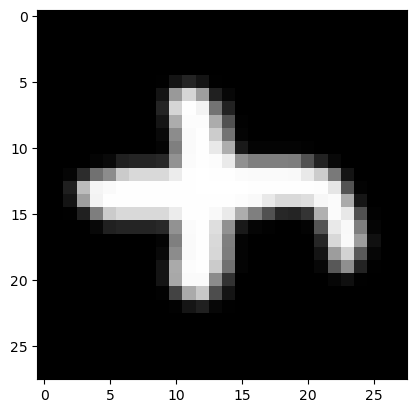

Predicted: 28, True Label: 28


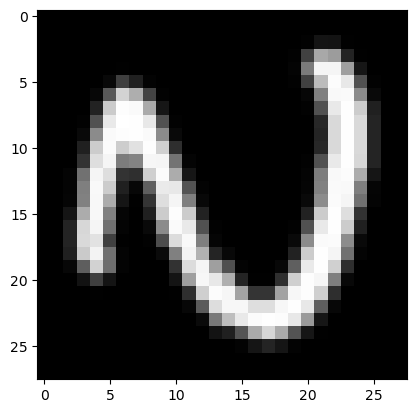

Predicted: 37, True Label: 37


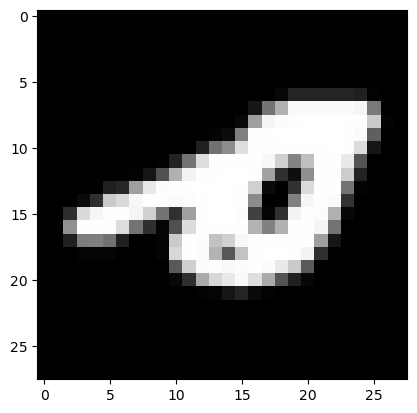

Predicted: 46, True Label: 46


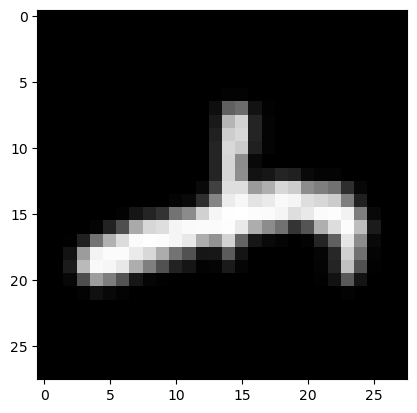

Predicted: 24, True Label: 24


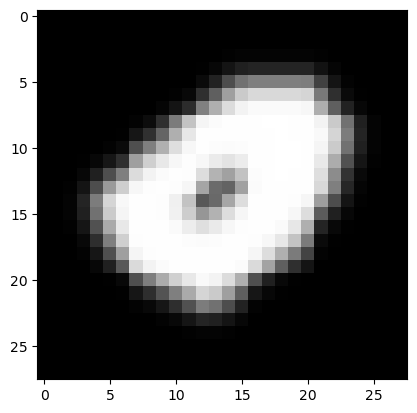

Predicted: 27, True Label: 27


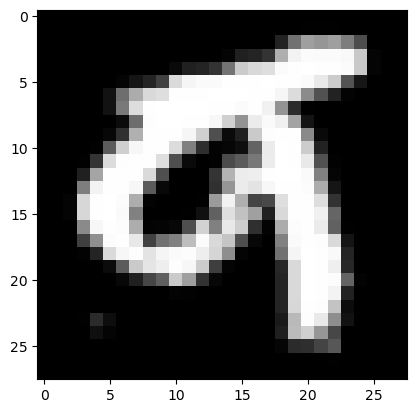

Predicted: 45, True Label: 45


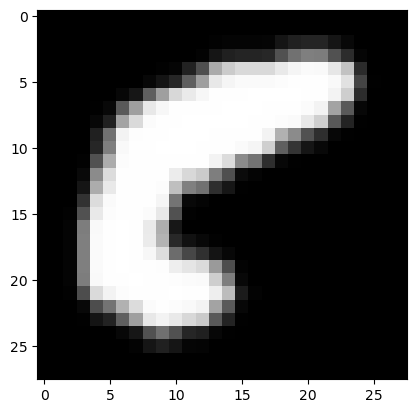

Predicted: 38, True Label: 38


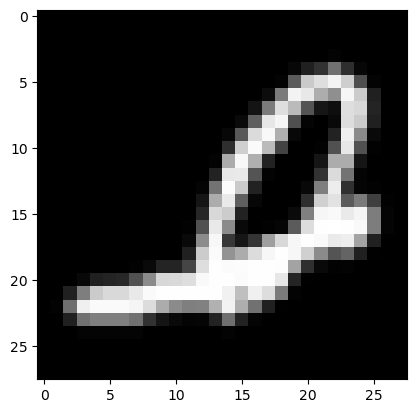

Predicted: 11, True Label: 11


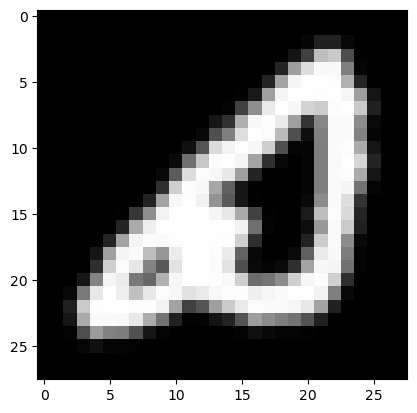

Predicted: 40, True Label: 40


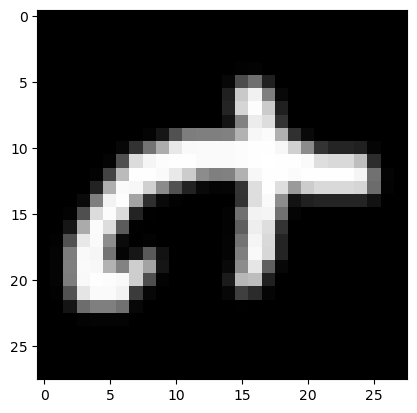

Predicted: 20, True Label: 20


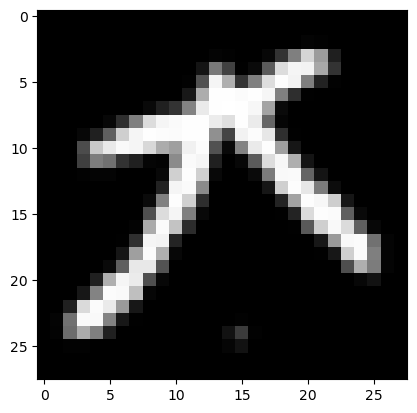

Predicted: 16, True Label: 16


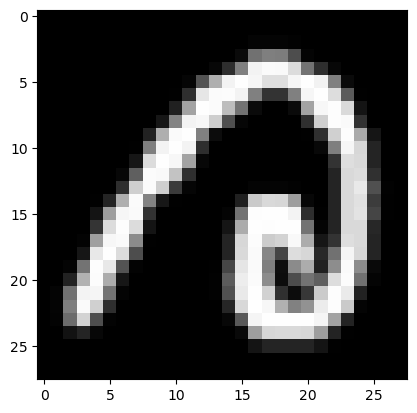

Predicted: 10, True Label: 10


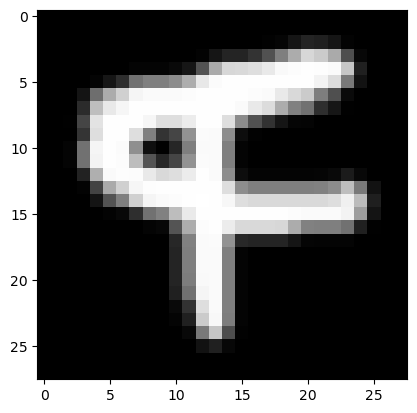

Predicted: 40, True Label: 40


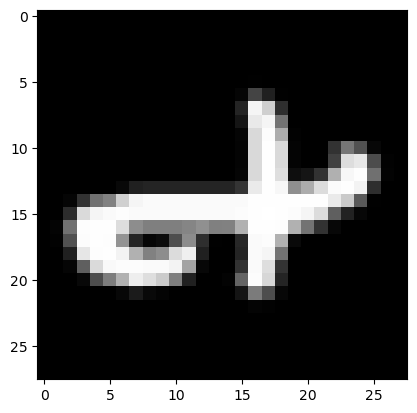

Predicted: 1, True Label: 1


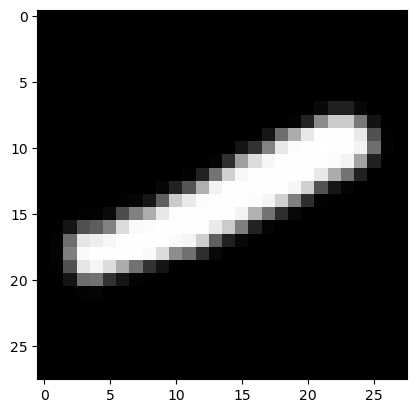

Predicted: 13, True Label: 13


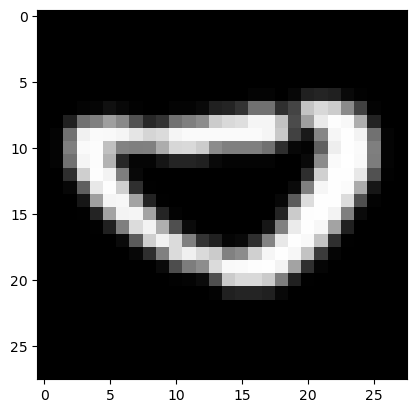

Predicted: 34, True Label: 34


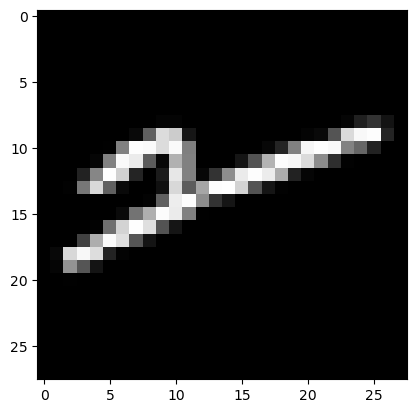

Predicted: 10, True Label: 25


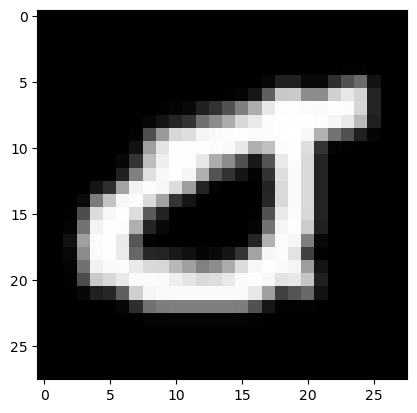

Predicted: 19, True Label: 19


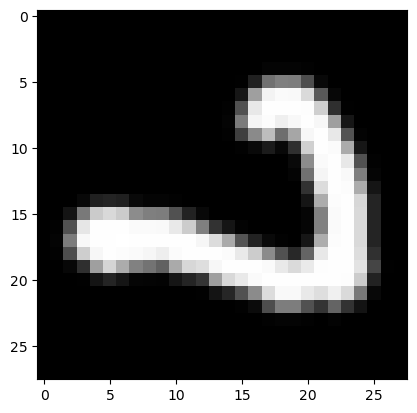

Predicted: 10, True Label: 10


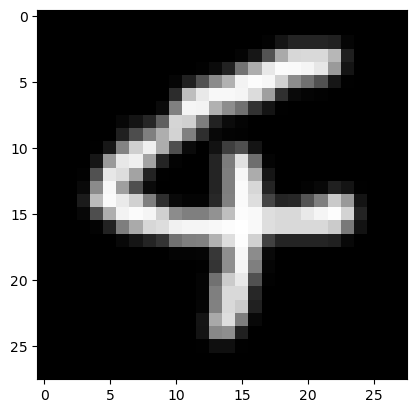

Predicted: 45, True Label: 45


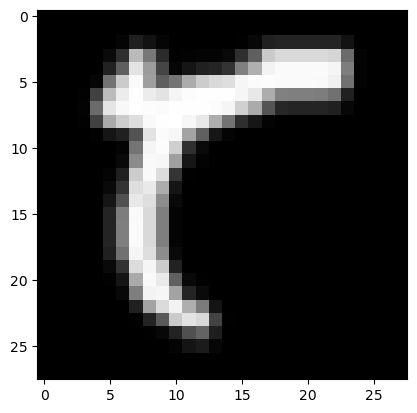

Predicted: 22, True Label: 22


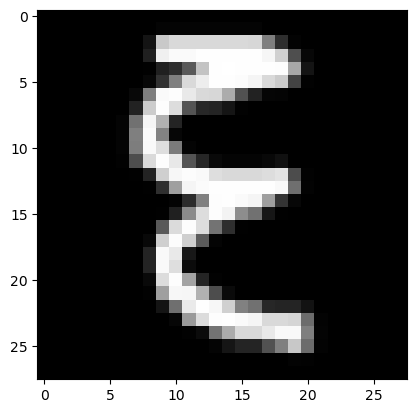

Predicted: 21, True Label: 21


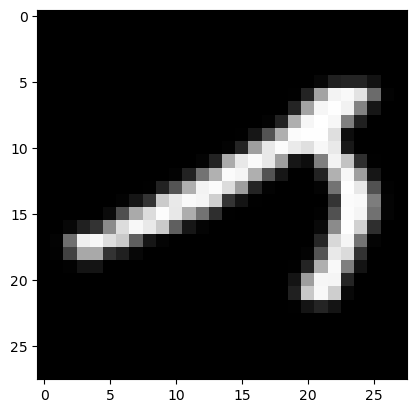

Predicted: 38, True Label: 38


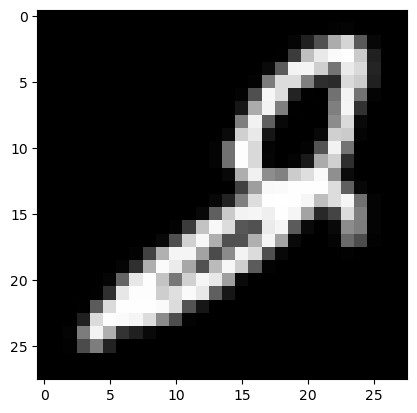

Predicted: 33, True Label: 33


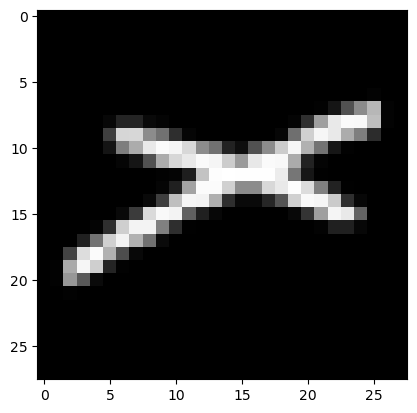

Predicted: 38, True Label: 38


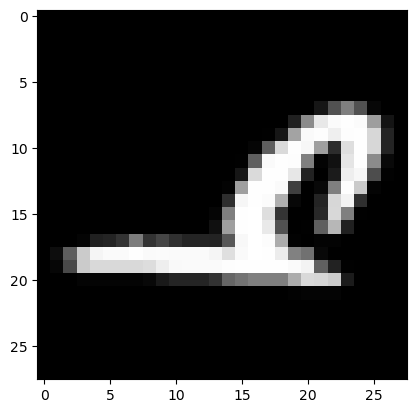

Predicted: 18, True Label: 18


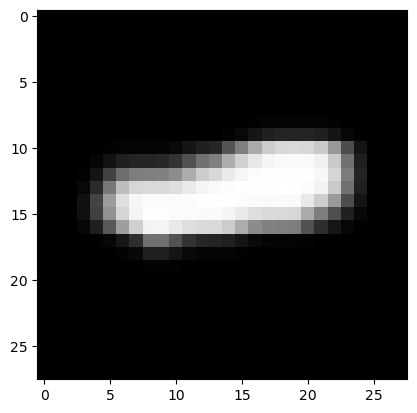

Predicted: 35, True Label: 35


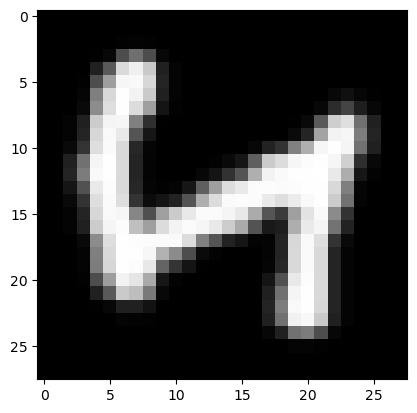

Predicted: 10, True Label: 10


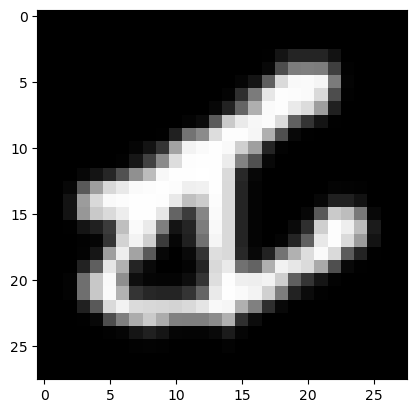

Predicted: 29, True Label: 46


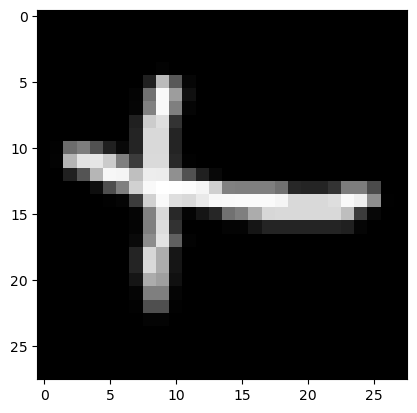

Predicted: 29, True Label: 29


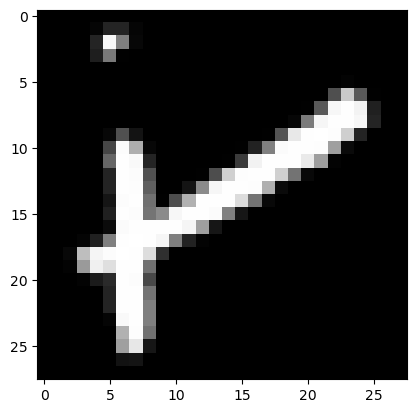

Predicted: 42, True Label: 42


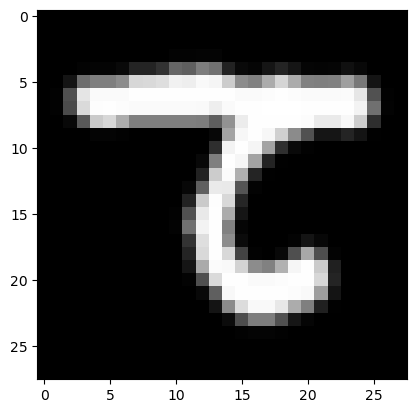

Predicted: 28, True Label: 28


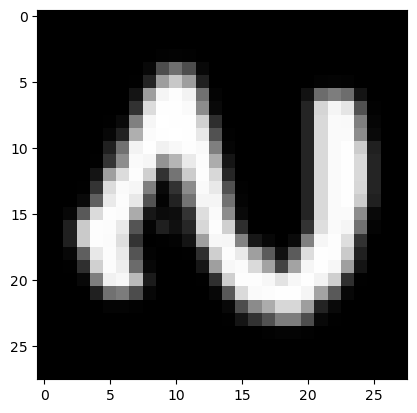

Predicted: 11, True Label: 11


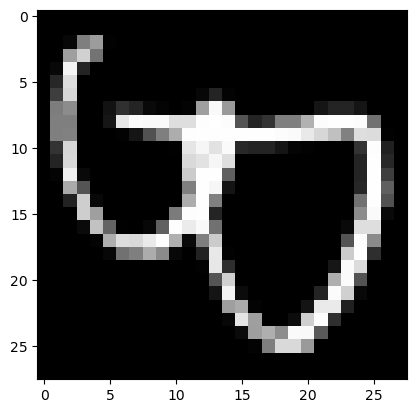

Predicted: 45, True Label: 45


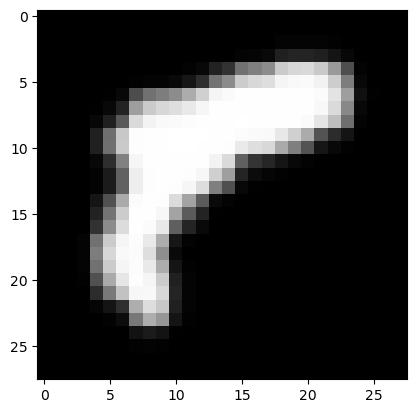

Predicted: 13, True Label: 13


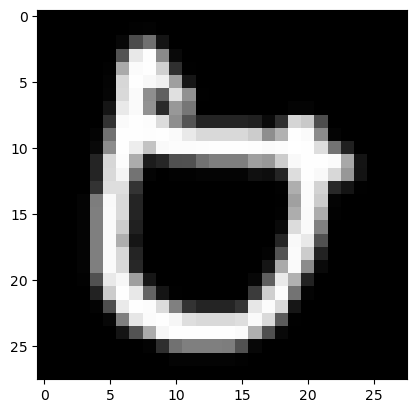

Predicted: 38, True Label: 38


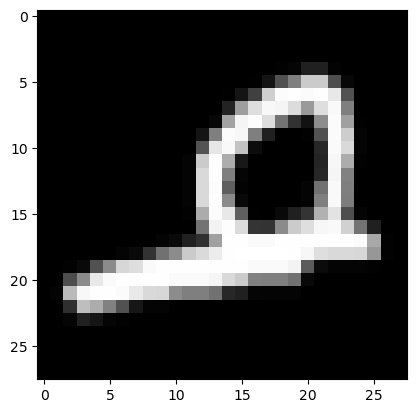

Predicted: 6, True Label: 6


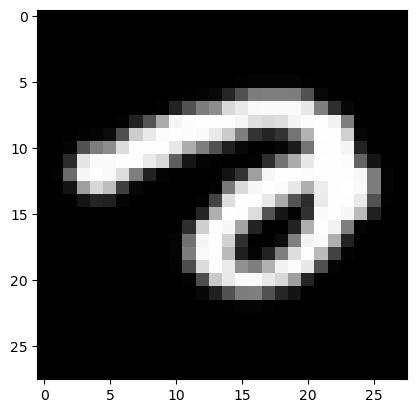

Predicted: 30, True Label: 30


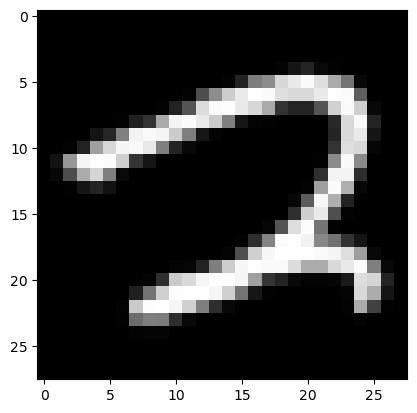

Predicted: 38, True Label: 38


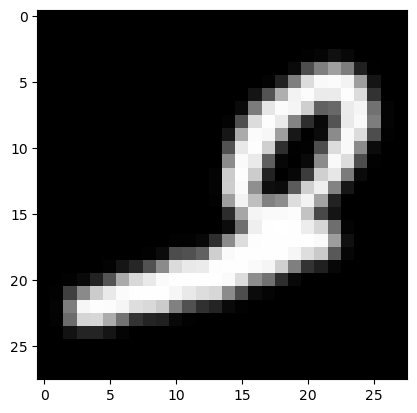

Predicted: 14, True Label: 14


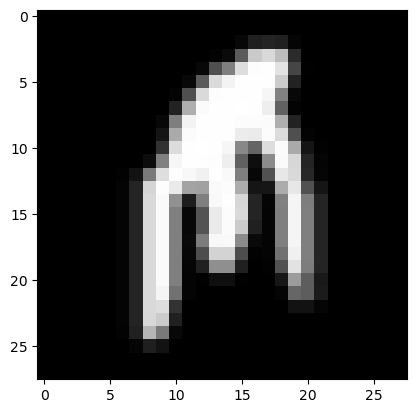

Predicted: 26, True Label: 26


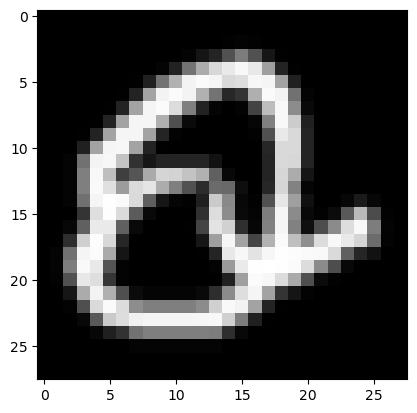

Predicted: 42, True Label: 42


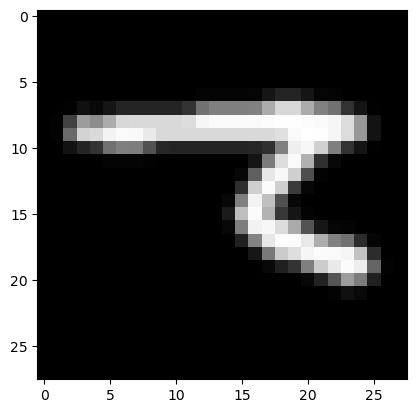

Predicted: 34, True Label: 34


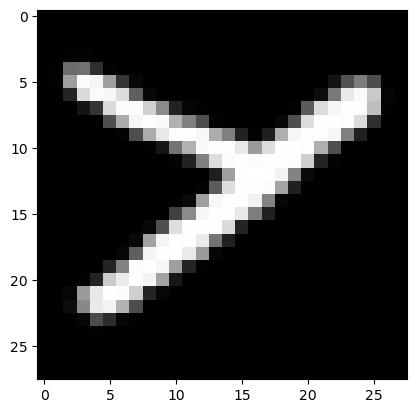

Predicted: 20, True Label: 20


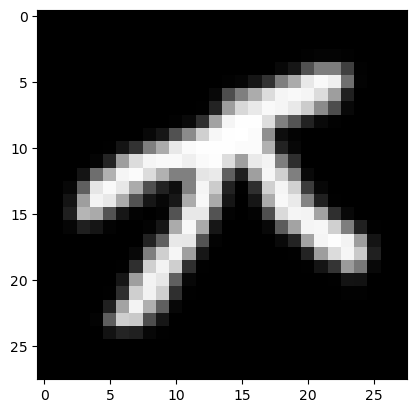

Predicted: 33, True Label: 33


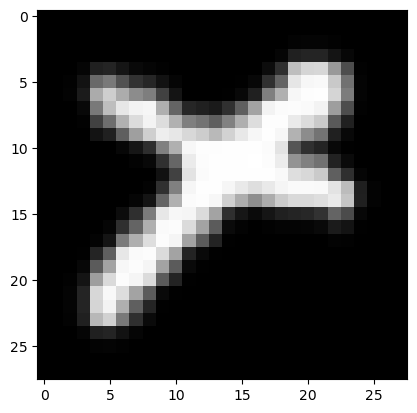

Predicted: 33, True Label: 33


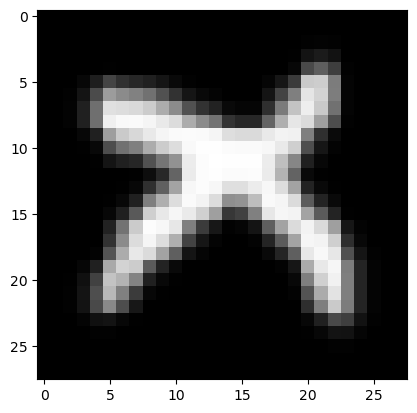

Predicted: 19, True Label: 19


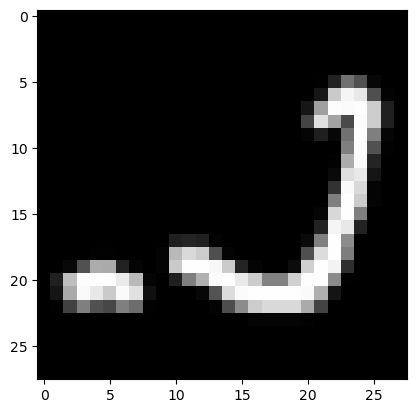

Predicted: 2, True Label: 2


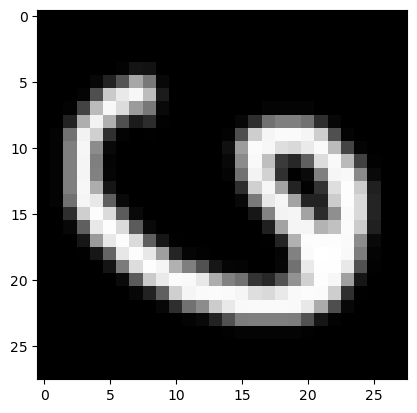

Predicted: 25, True Label: 25


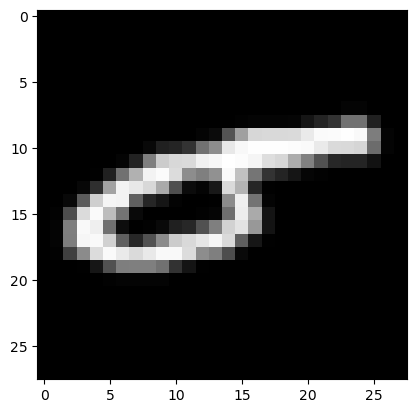

Predicted: 25, True Label: 25


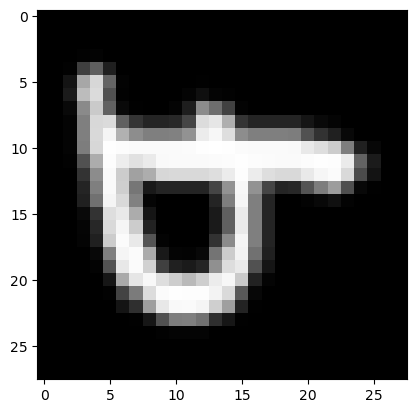

Predicted: 19, True Label: 19


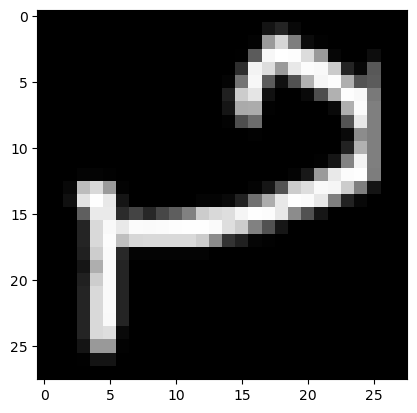

Predicted: 3, True Label: 3


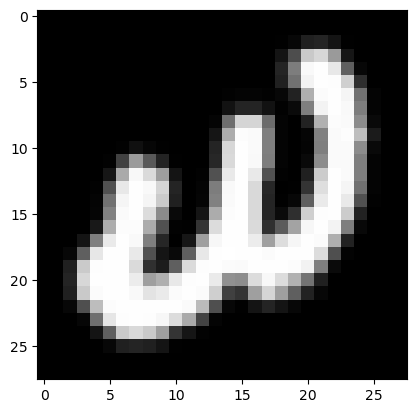

Predicted: 6, True Label: 37


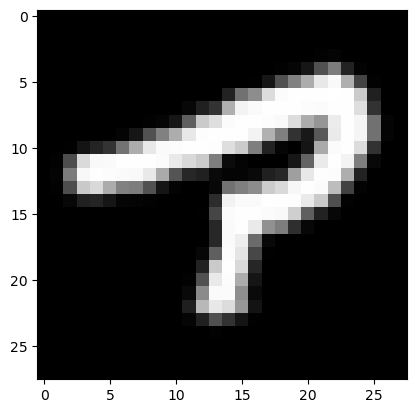

Predicted: 24, True Label: 24


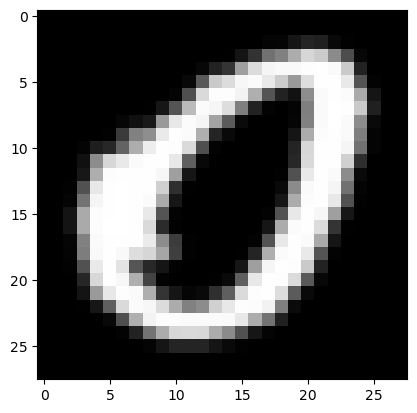

Predicted: 27, True Label: 27


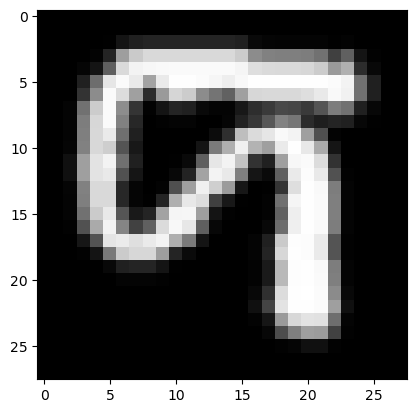

Predicted: 44, True Label: 44


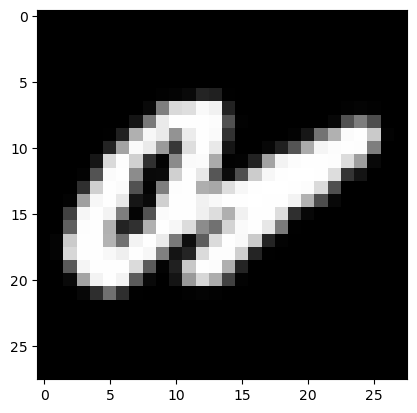

Predicted: 3, True Label: 3


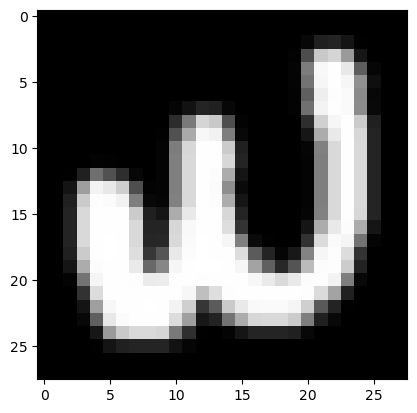

Predicted: 14, True Label: 14


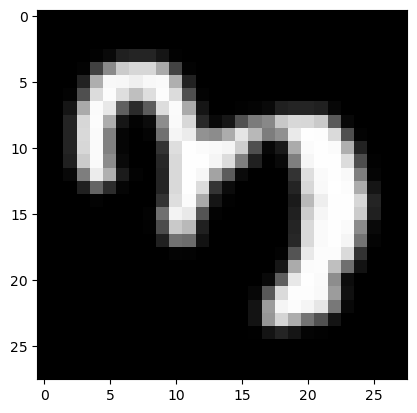

Predicted: 6, True Label: 6


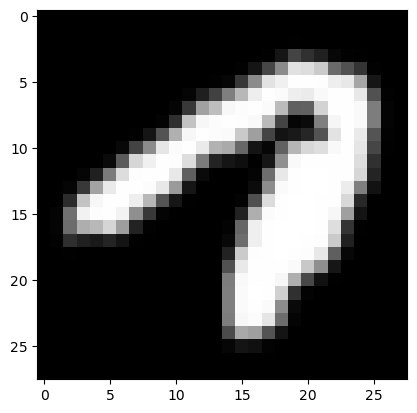

Predicted: 1, True Label: 18


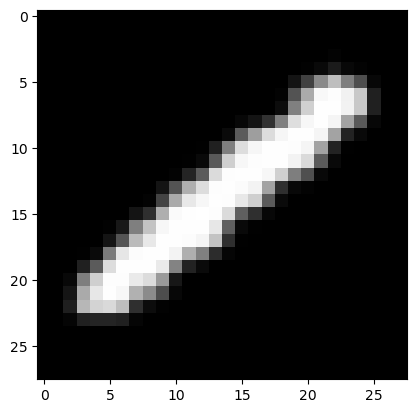

Predicted: 28, True Label: 28


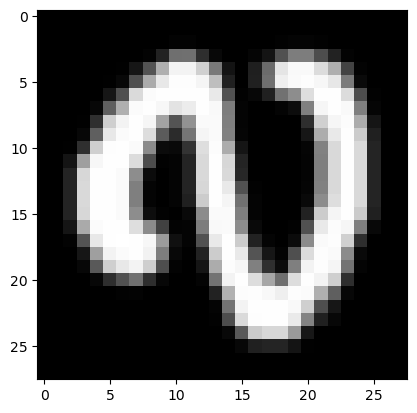

Predicted: 22, True Label: 23


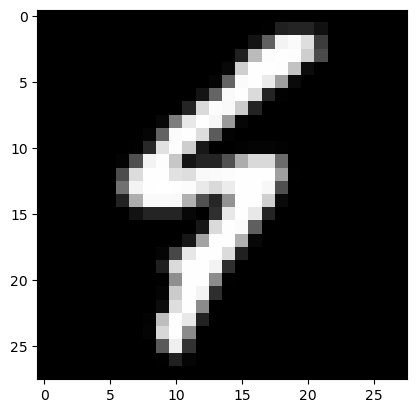

Predicted: 8, True Label: 8


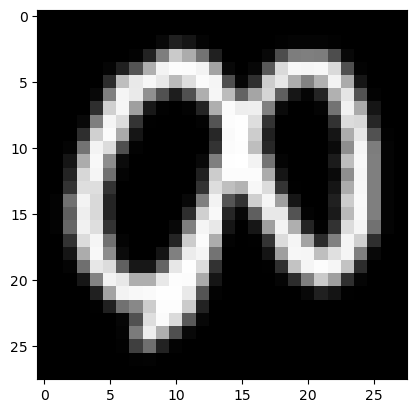

Predicted: 1, True Label: 1


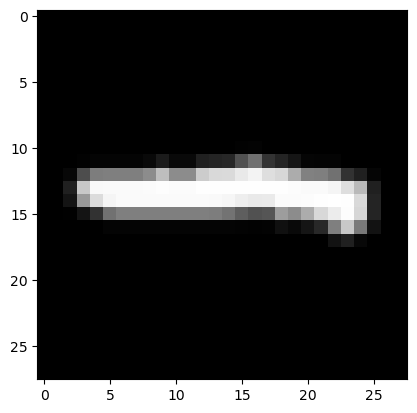

Predicted: 20, True Label: 20


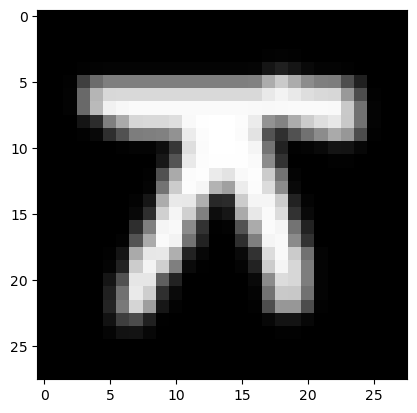

Predicted: 9, True Label: 9


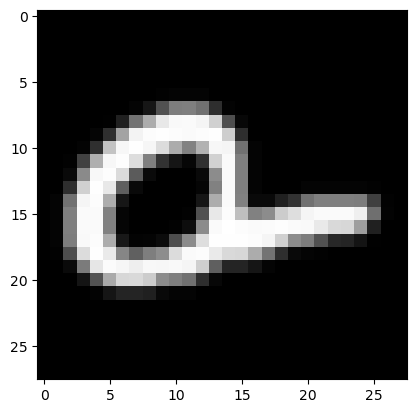

Predicted: 15, True Label: 15


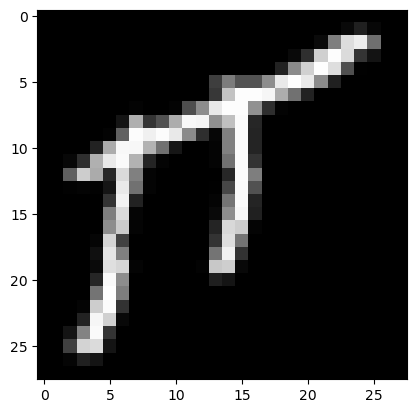

Predicted: 39, True Label: 39


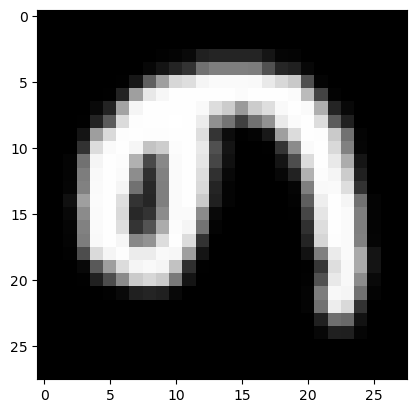

Predicted: 9, True Label: 41


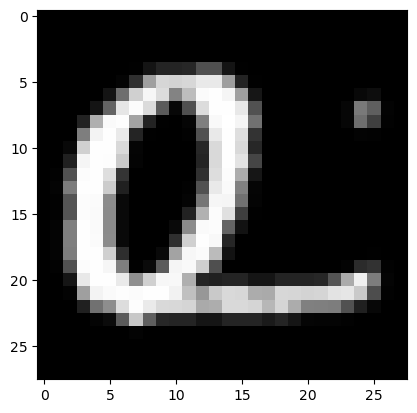

Predicted: 31, True Label: 31


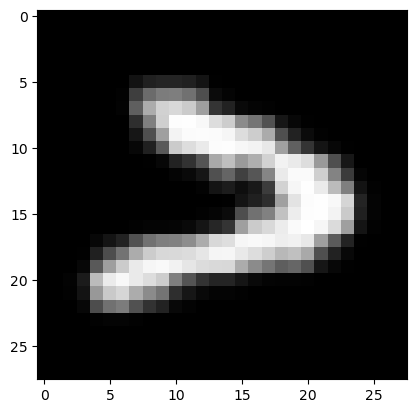

Predicted: 33, True Label: 33


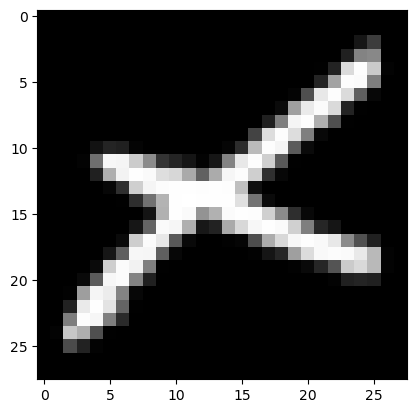

Predicted: 35, True Label: 2


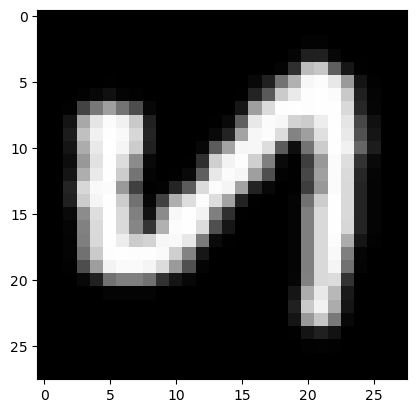

Predicted: 36, True Label: 36


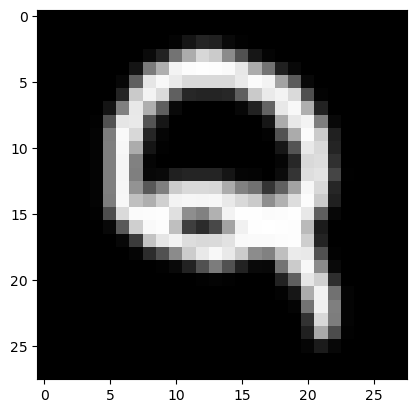

Predicted: 5, True Label: 5


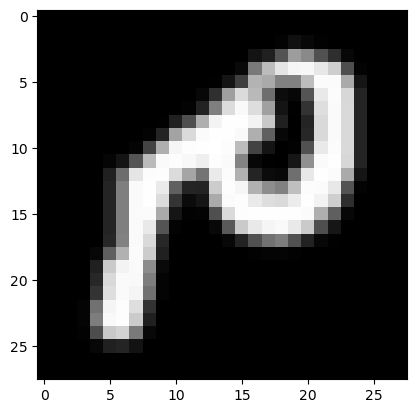

Predicted: 30, True Label: 30


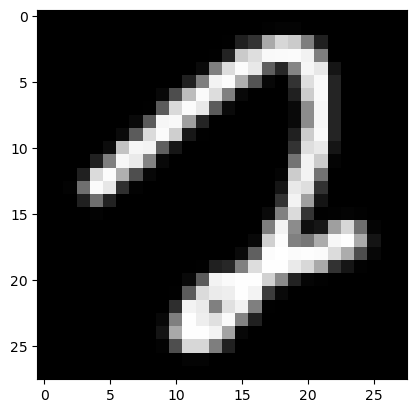

Predicted: 38, True Label: 38


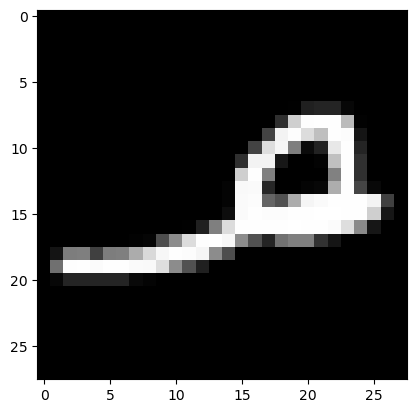

Predicted: 28, True Label: 28


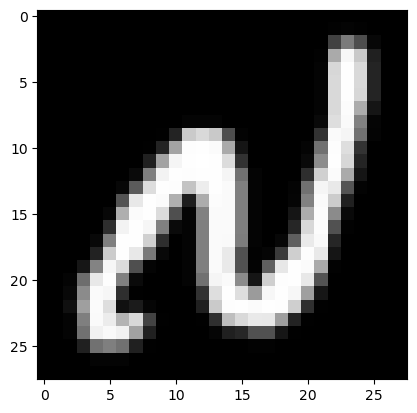

Predicted: 44, True Label: 41


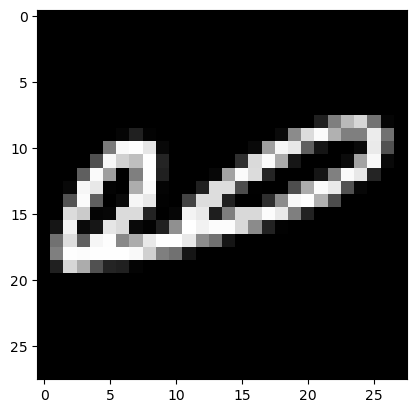

Predicted: 17, True Label: 17


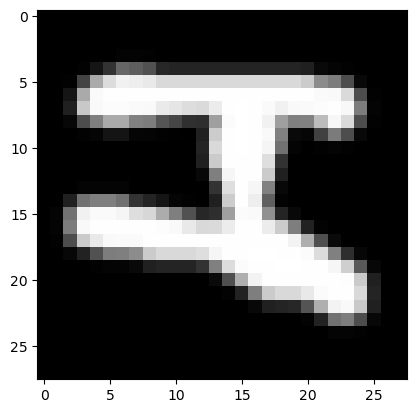

Predicted: 26, True Label: 26


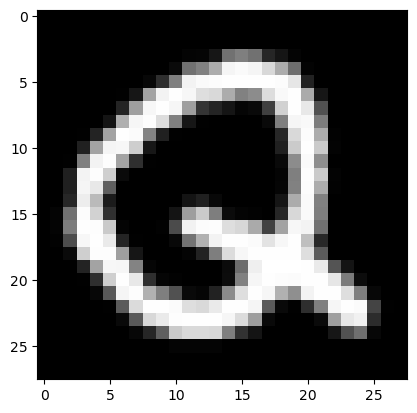

Predicted: 36, True Label: 36


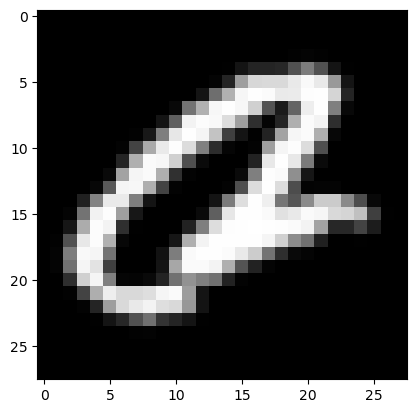

Predicted: 18, True Label: 21


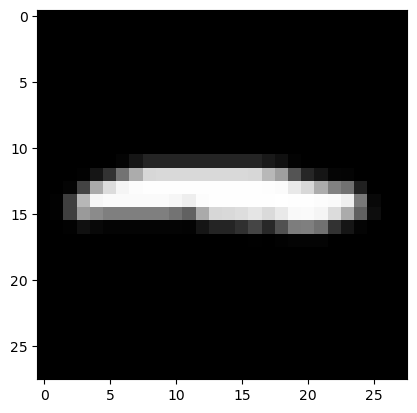

Predicted: 21, True Label: 1


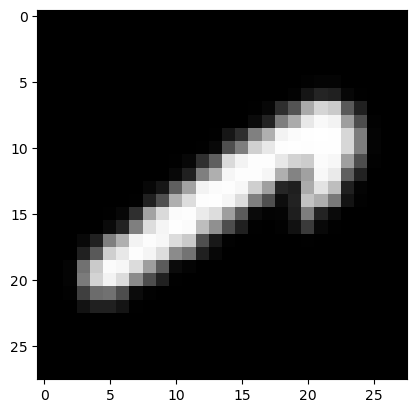

Predicted: 39, True Label: 39


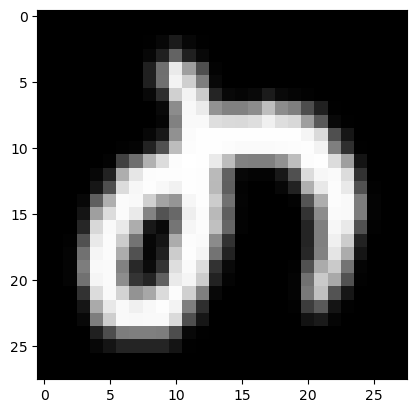

Predicted: 35, True Label: 35


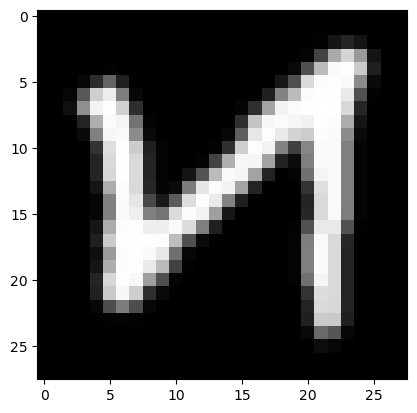

Predicted: 30, True Label: 30


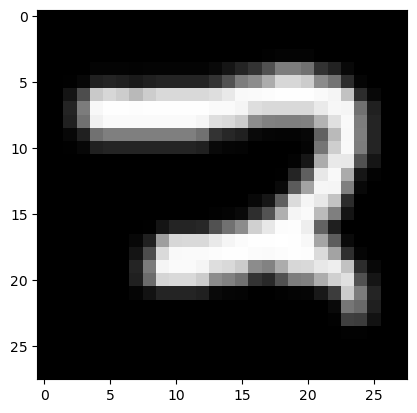

Predicted: 26, True Label: 26


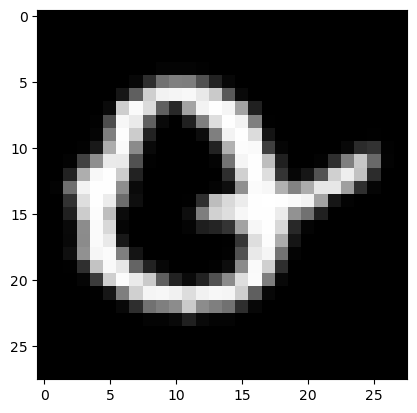

Predicted: 13, True Label: 13


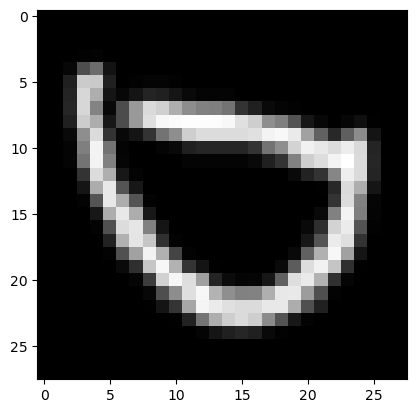

Predicted: 42, True Label: 42


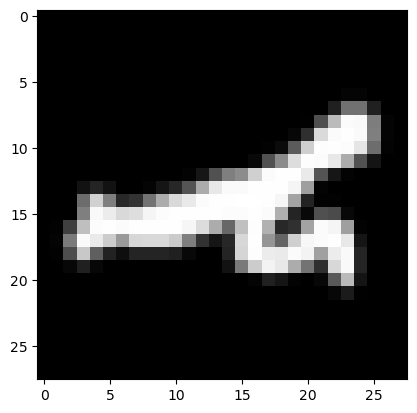

Predicted: 10, True Label: 10


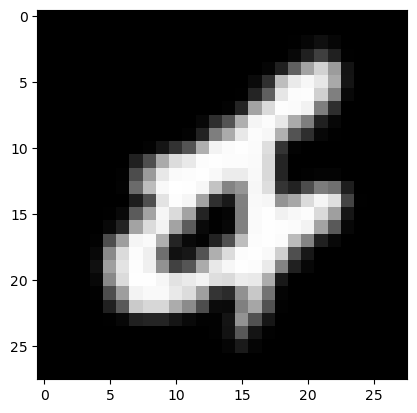

Predicted: 21, True Label: 21


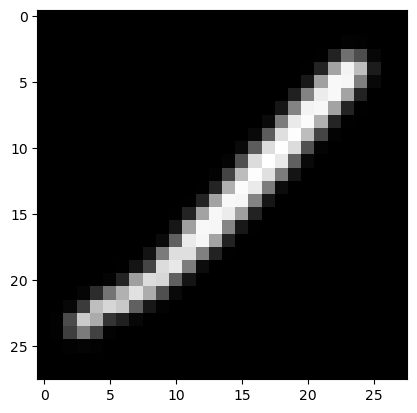

Predicted: 42, True Label: 42


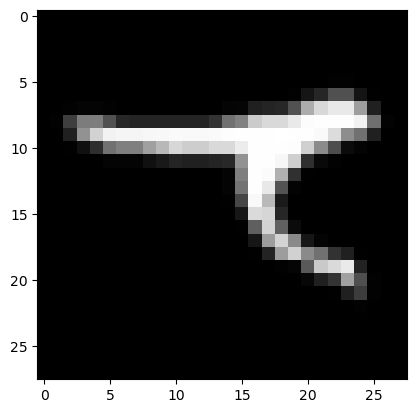

Predicted: 27, True Label: 27


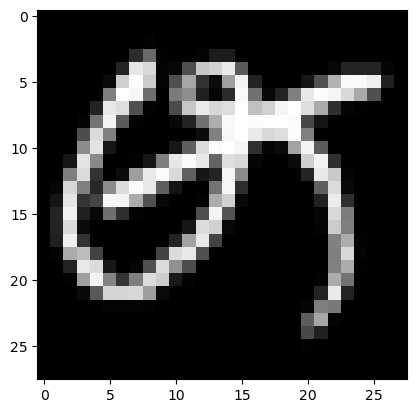

Predicted: 26, True Label: 26


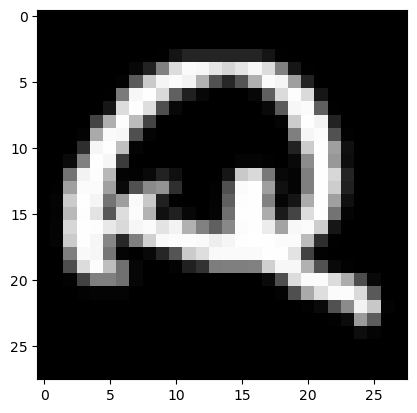

Predicted: 9, True Label: 9


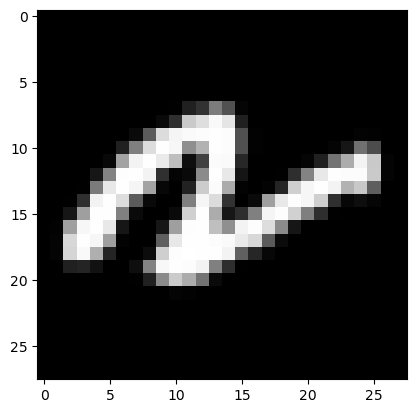

Predicted: 33, True Label: 33


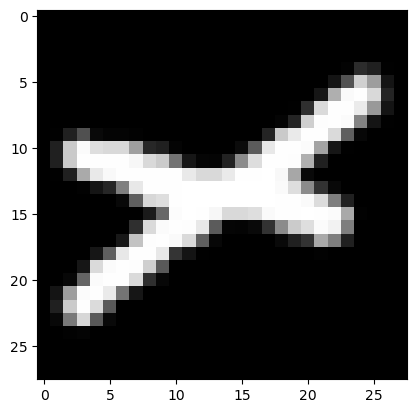

Predicted: 33, True Label: 33


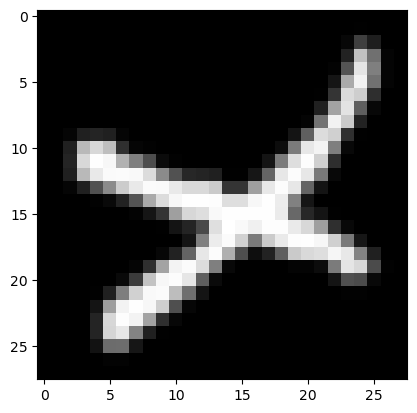

Predicted: 44, True Label: 44


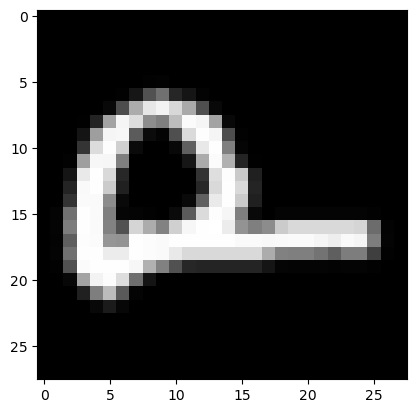

Predicted: 8, True Label: 8


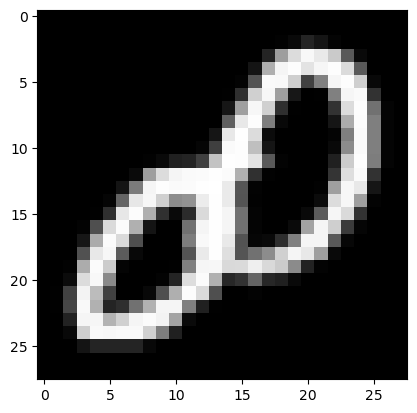

Predicted: 4, True Label: 4


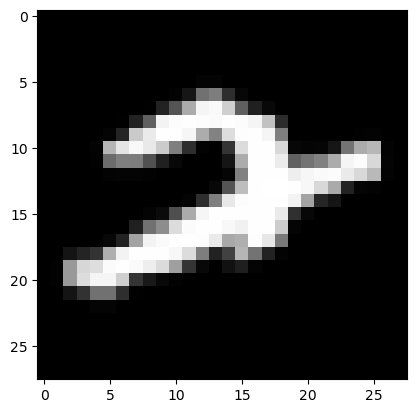

Predicted: 10, True Label: 10


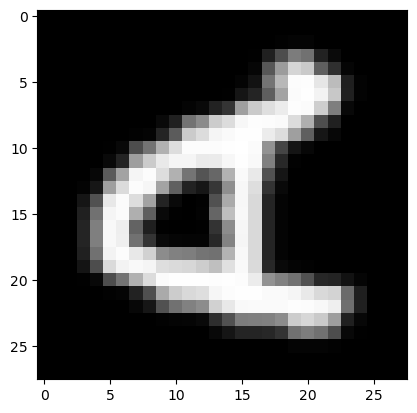

Predicted: 29, True Label: 29


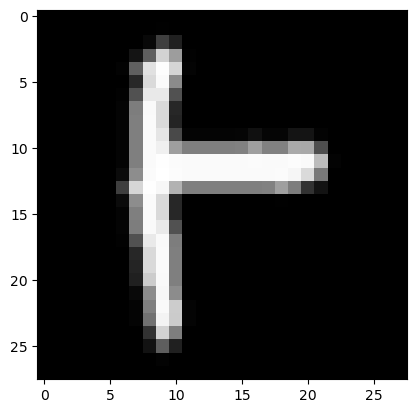

Predicted: 13, True Label: 13


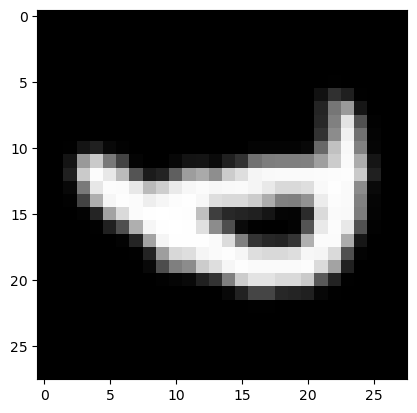

Predicted: 33, True Label: 33


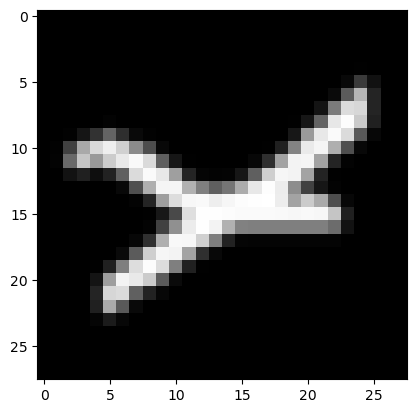

Predicted: 38, True Label: 38


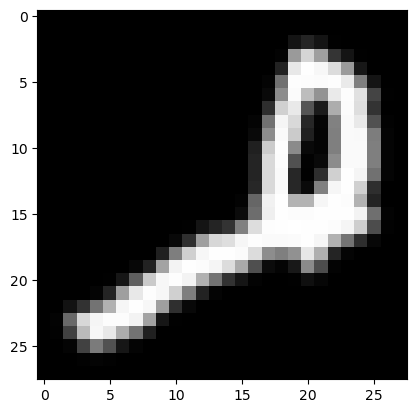

Predicted: 11, True Label: 11


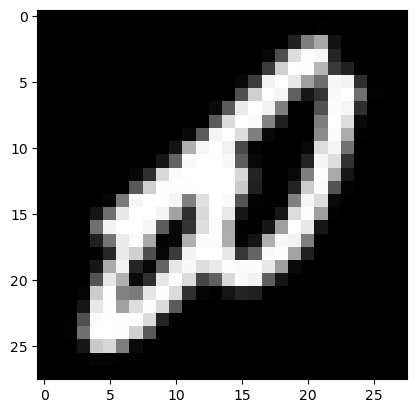

Predicted: 44, True Label: 44


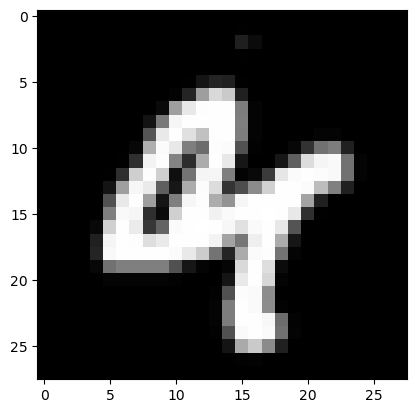

Predicted: 39, True Label: 39


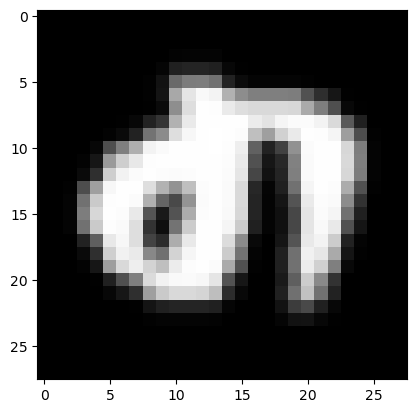

Predicted: 13, True Label: 13


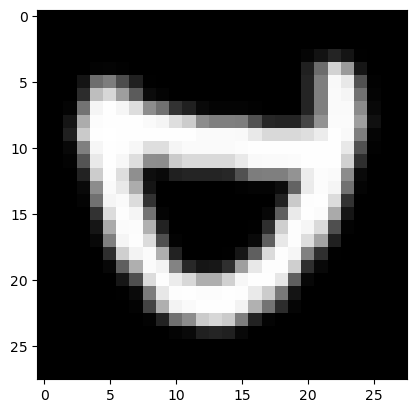

Predicted: 18, True Label: 18


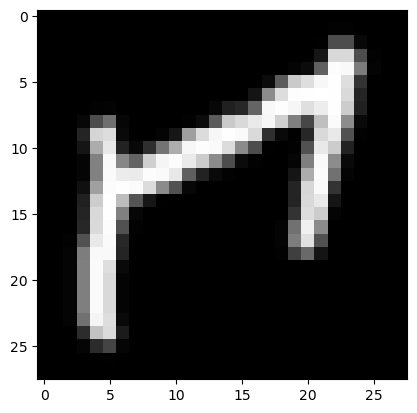

Predicted: 34, True Label: 34


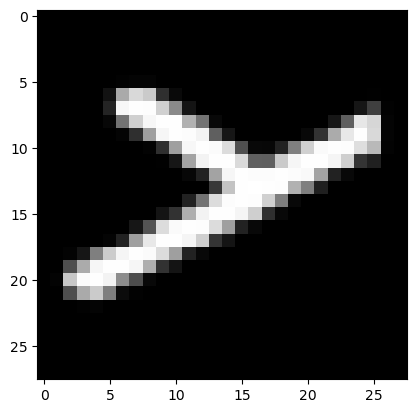

Predicted: 15, True Label: 15


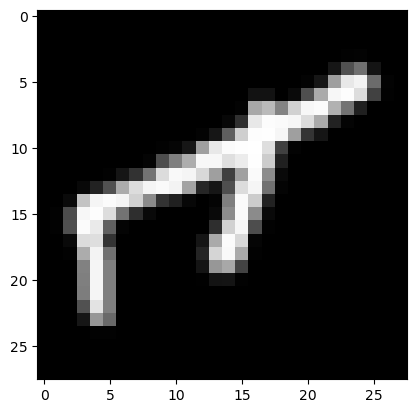

Predicted: 8, True Label: 8


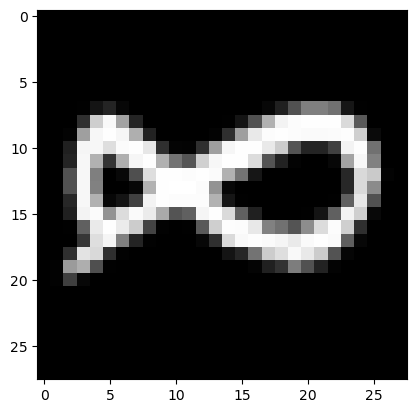

Predicted: 46, True Label: 46


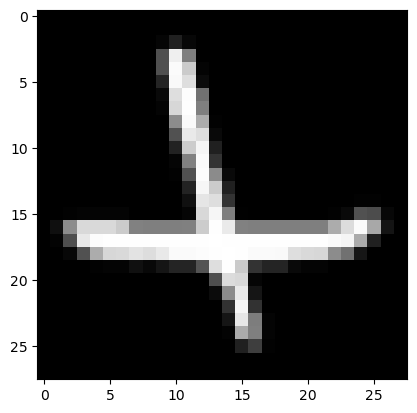

Predicted: 19, True Label: 19


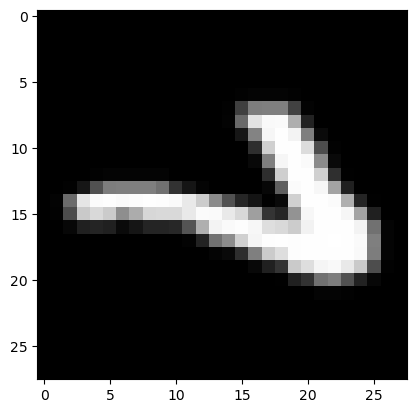

Predicted: 40, True Label: 15


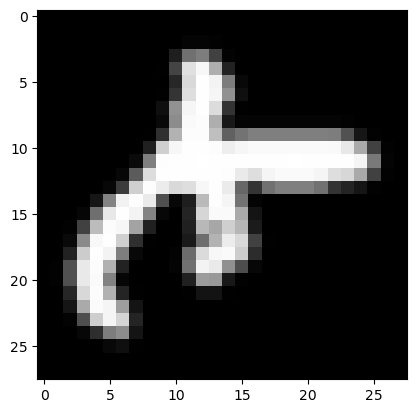

Predicted: 28, True Label: 28


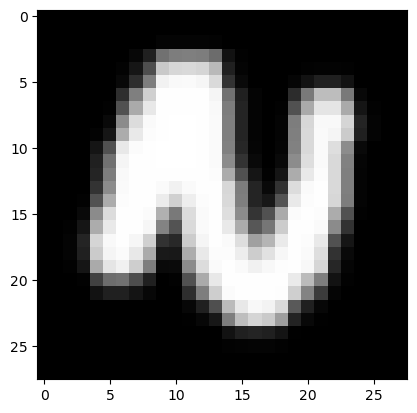

Predicted: 46, True Label: 46


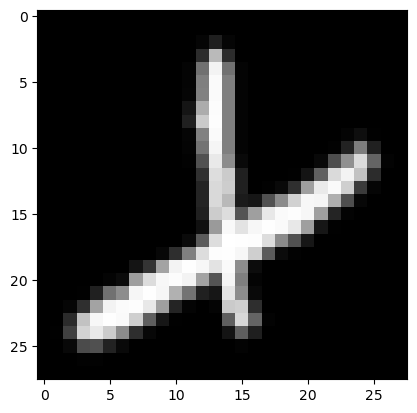

Predicted: 35, True Label: 35


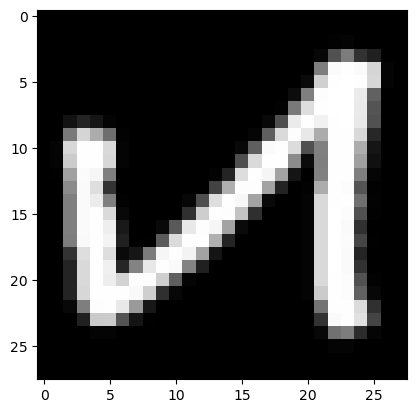

Predicted: 1, True Label: 21


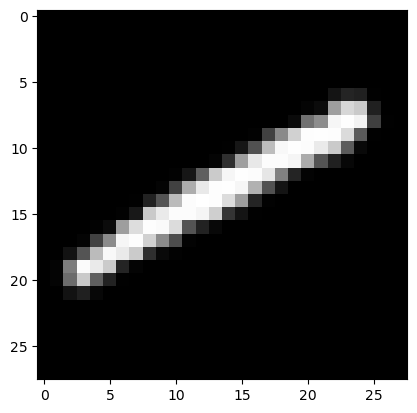

Predicted: 2, True Label: 2


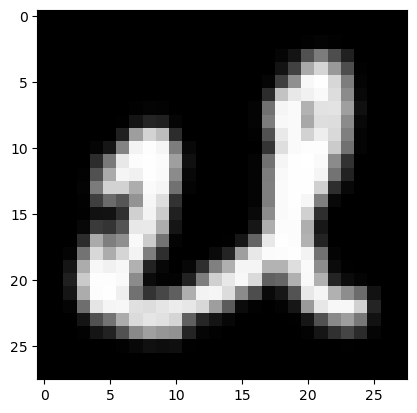

Predicted: 33, True Label: 33


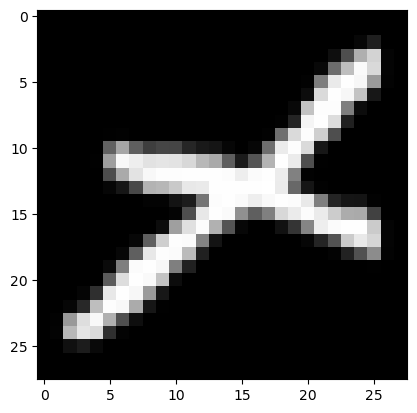

Predicted: 32, True Label: 32


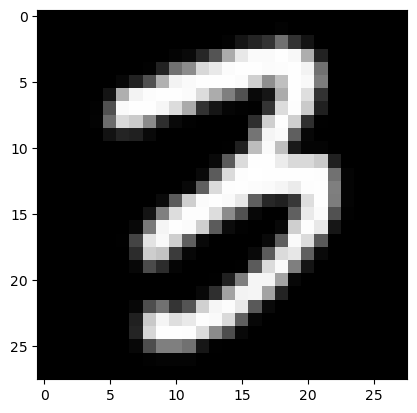

Predicted: 1, True Label: 1


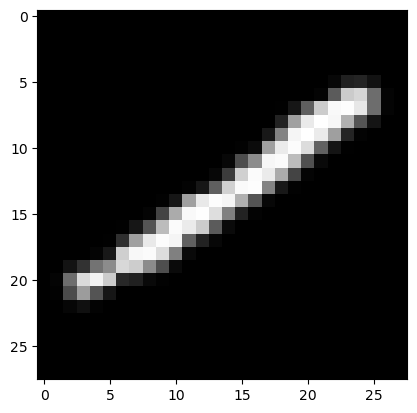

Predicted: 30, True Label: 30


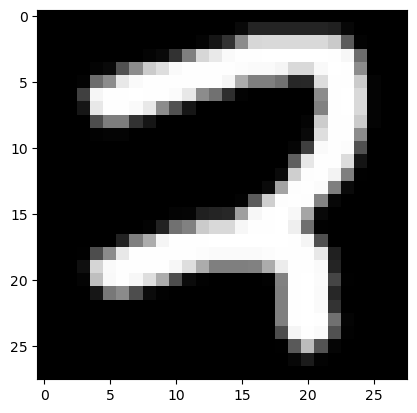

Predicted: 35, True Label: 35


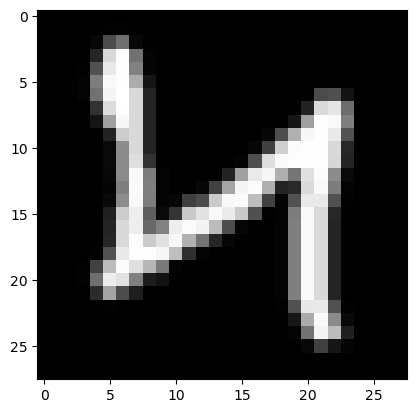

Predicted: 41, True Label: 41


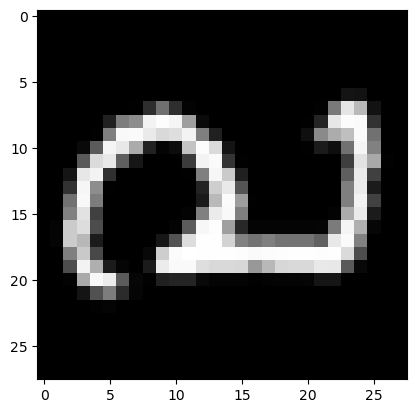

Predicted: 5, True Label: 5


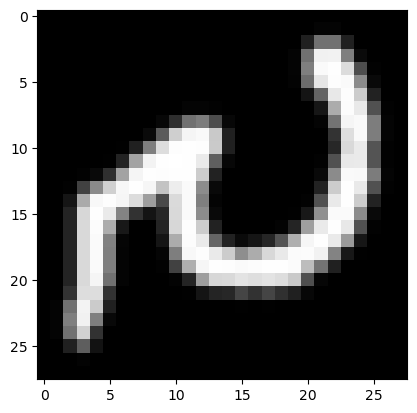

Predicted: 39, True Label: 39


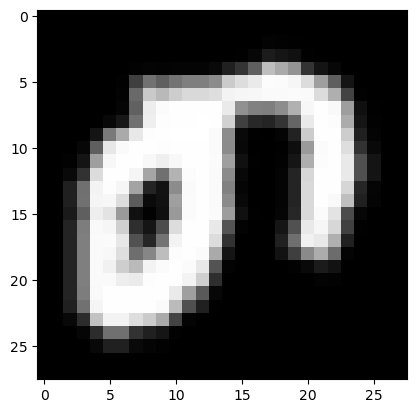

Predicted: 39, True Label: 39


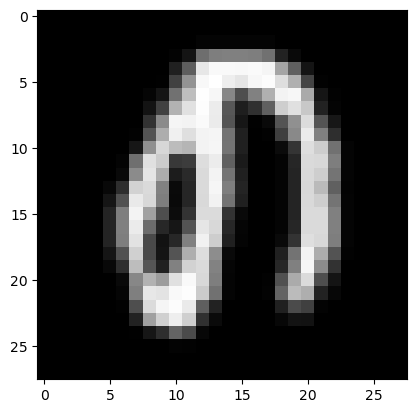

Predicted: 45, True Label: 45


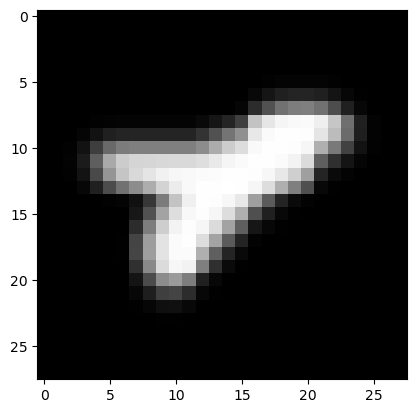

Predicted: 5, True Label: 5


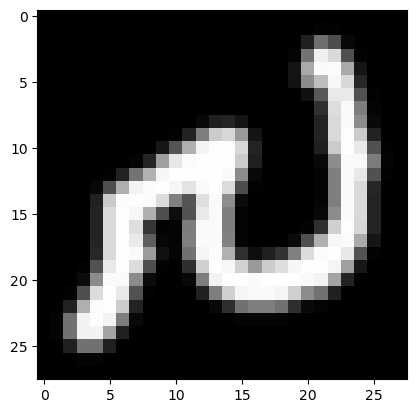

Predicted: 38, True Label: 8


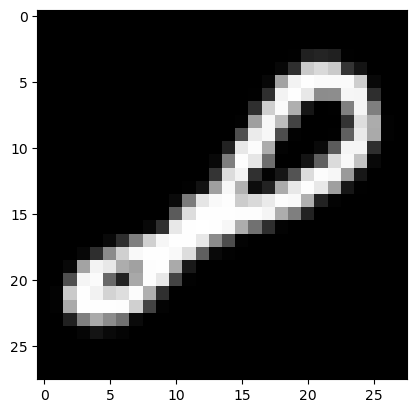

Predicted: 36, True Label: 36


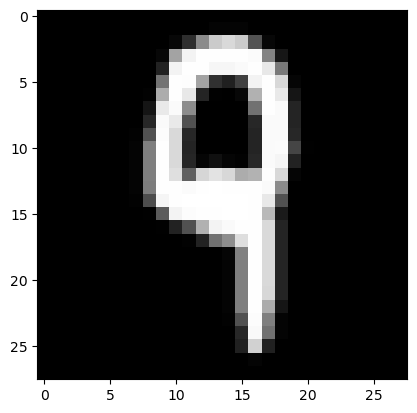

Predicted: 18, True Label: 18


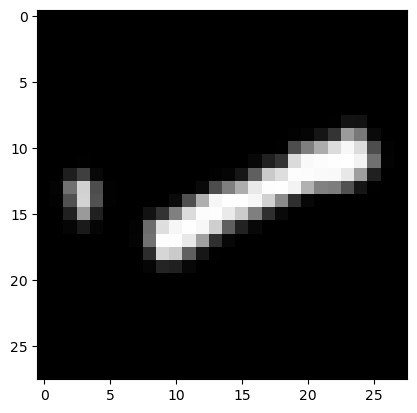

Predicted: 43, True Label: 43


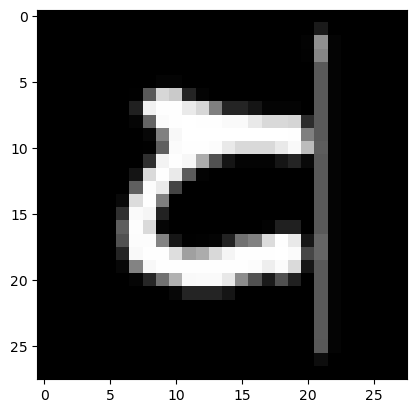

Predicted: 45, True Label: 45


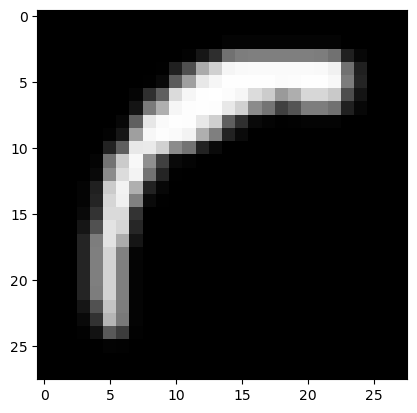

Predicted: 19, True Label: 19


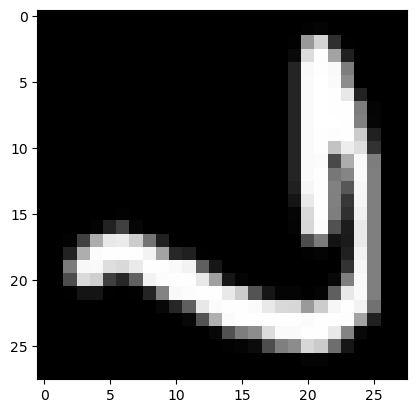

Predicted: 33, True Label: 33


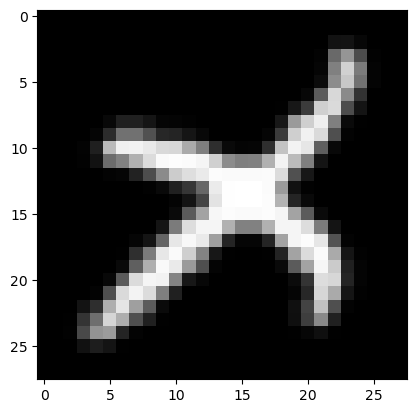

Predicted: 43, True Label: 43


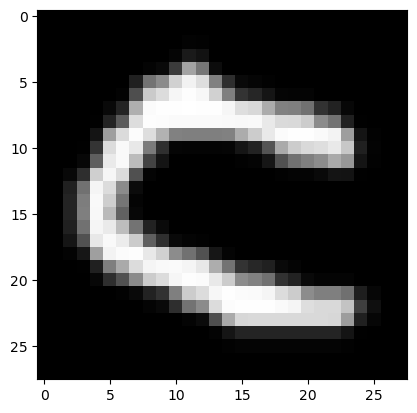

Predicted: 43, True Label: 43


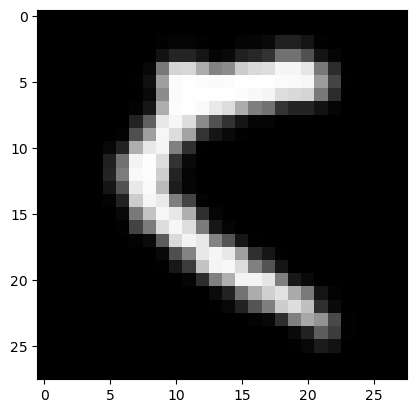

Predicted: 21, True Label: 21


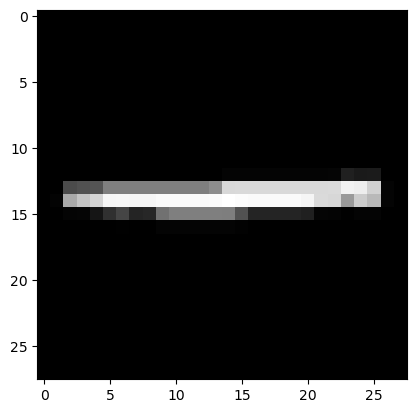

Predicted: 16, True Label: 16


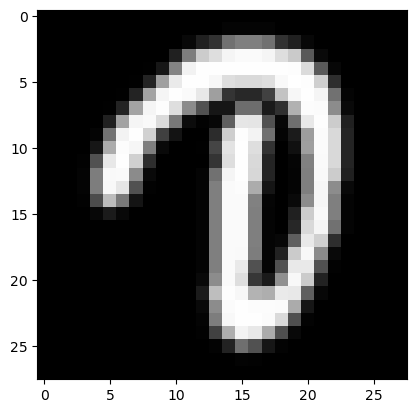

Predicted: 42, True Label: 42


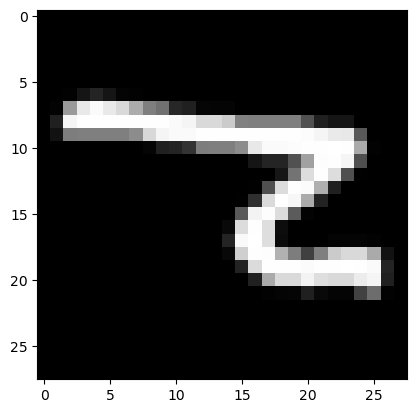

Predicted: 21, True Label: 21


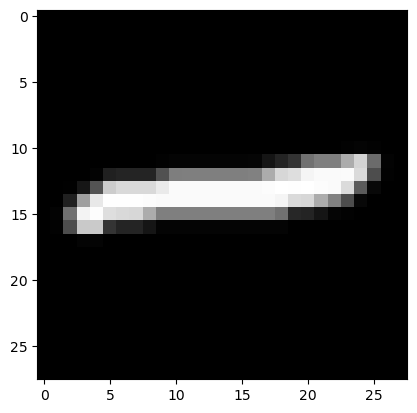

Predicted: 10, True Label: 10


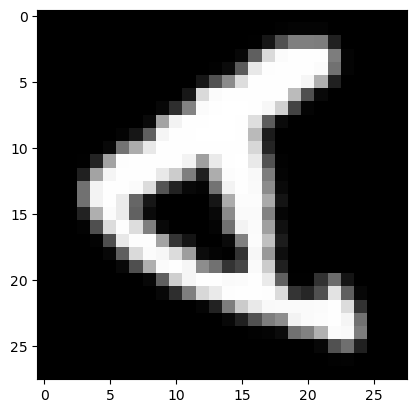

Predicted: 29, True Label: 29


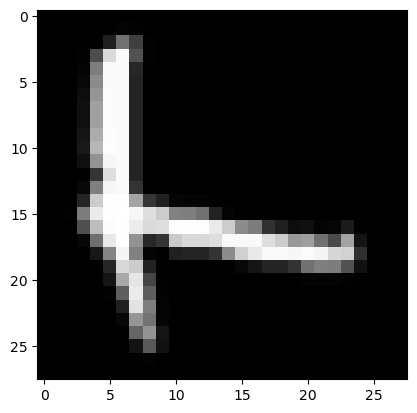

Predicted: 31, True Label: 34


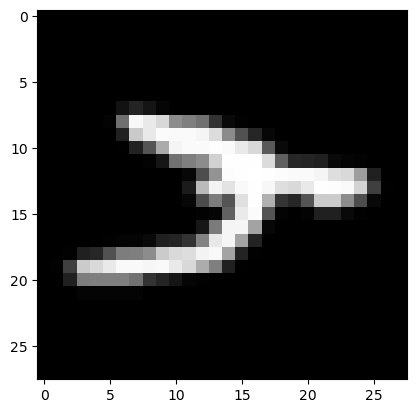

Predicted: 1, True Label: 21


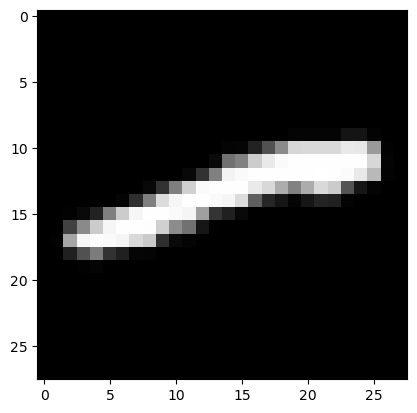

Predicted: 28, True Label: 28


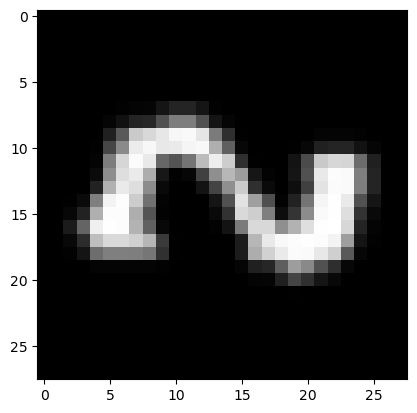

Predicted: 22, True Label: 22


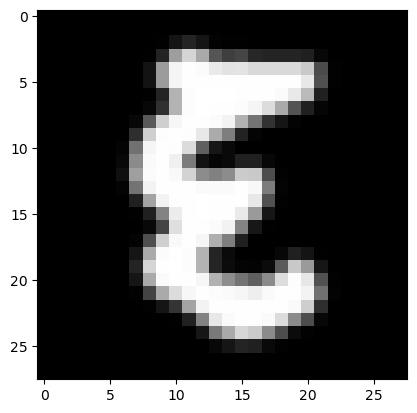

Predicted: 46, True Label: 46


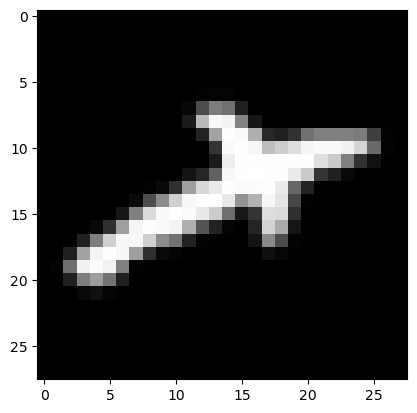

Predicted: 43, True Label: 43


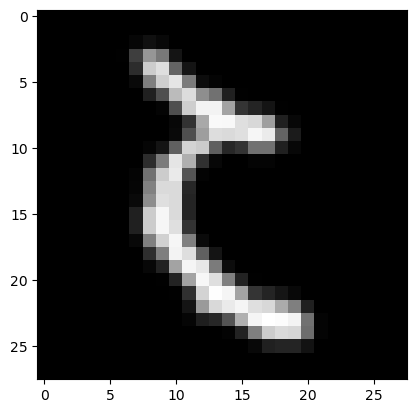

Predicted: 27, True Label: 27


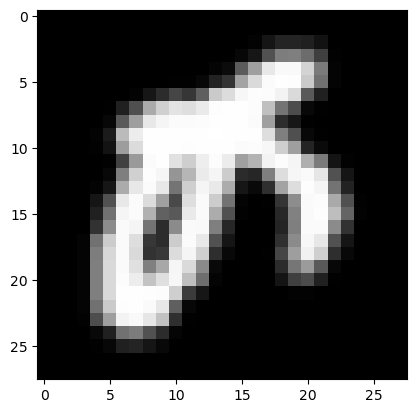

Predicted: 36, True Label: 27


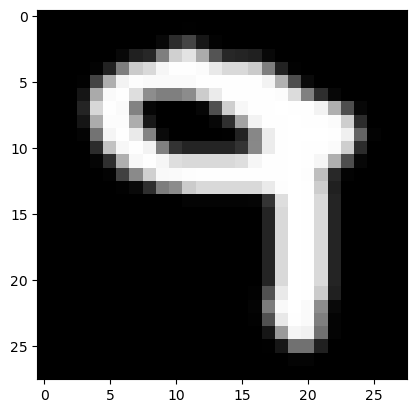

Predicted: 11, True Label: 11


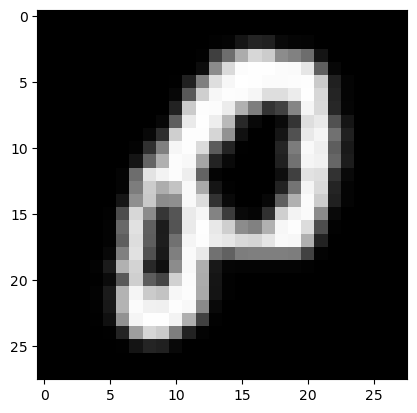

Predicted: 24, True Label: 0


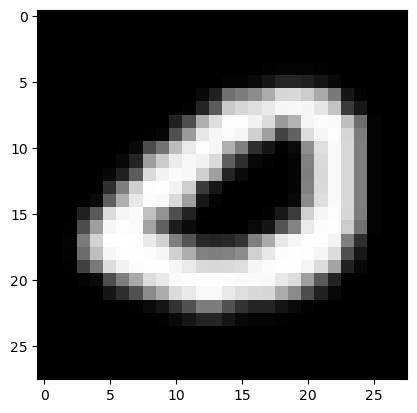

Predicted: 10, True Label: 10


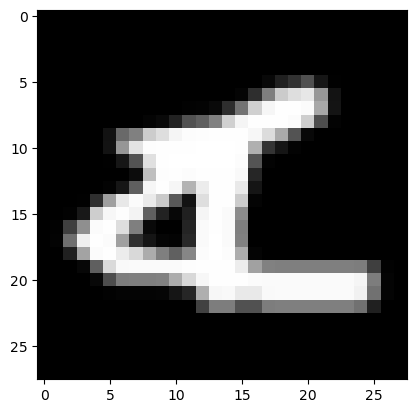

Predicted: 11, True Label: 11


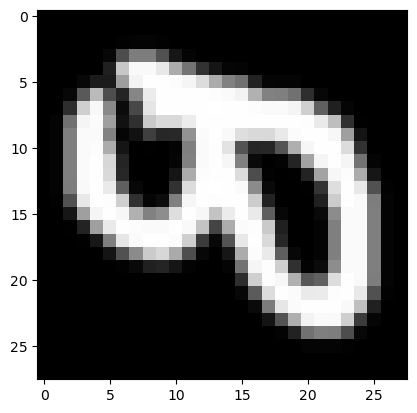

Predicted: 41, True Label: 8


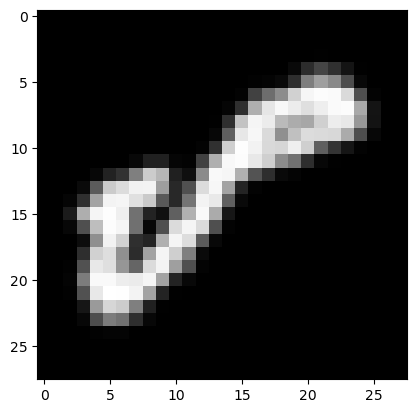

Predicted: 31, True Label: 31


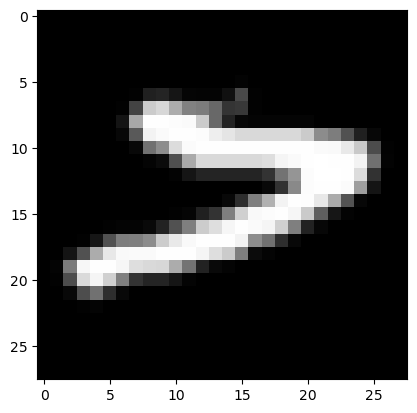

In [62]:
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = cnn_model(images)

        # Get the predicted classes
        _, predicted = torch.max(outputs.data, 1)

        # Print the top 5 predictions along with the true labels
        for i in range(5):
            print(f"Predicted: {predicted[i]}, True Label: {labels[i]}")
            plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
            plt.show()

Predicted: 13, True Label: 13


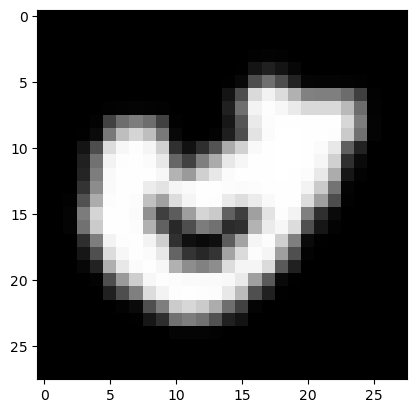

Predicted: 13, True Label: 0


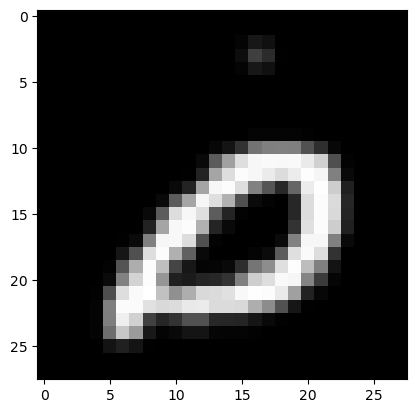

Predicted: 26, True Label: 26


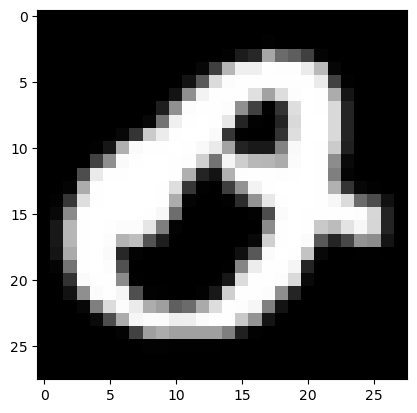

Predicted: 37, True Label: 37


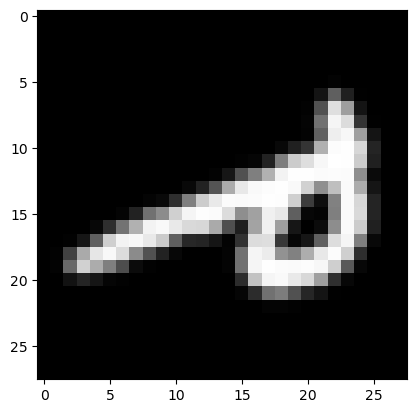

Predicted: 24, True Label: 0


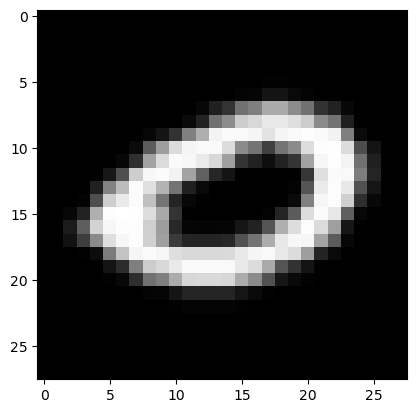

Predicted: 19, True Label: 18


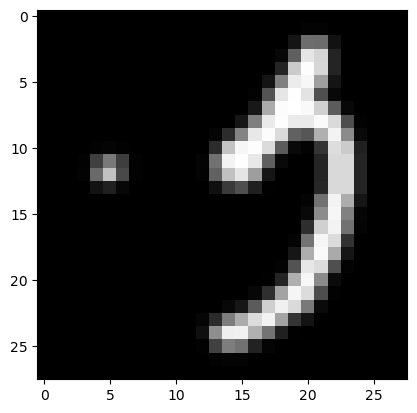

Predicted: 41, True Label: 41


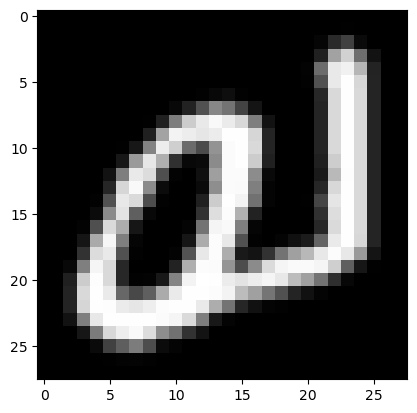

Predicted: 25, True Label: 15


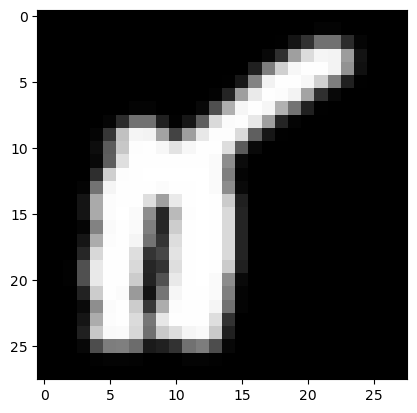

Predicted: 20, True Label: 20


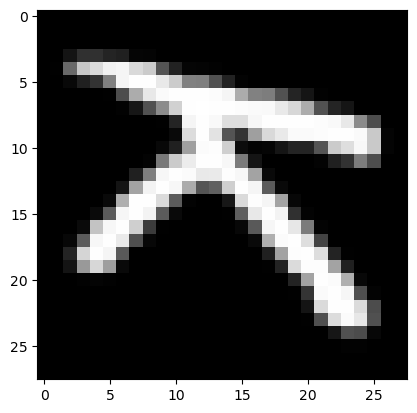

Predicted: 23, True Label: 23


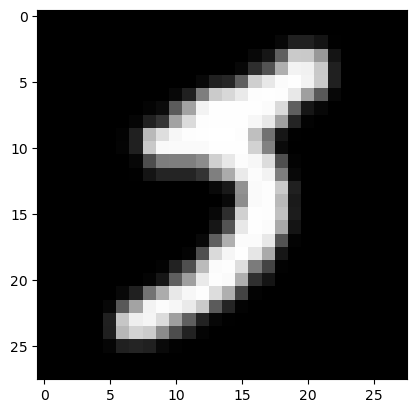

Predicted: 43, True Label: 43


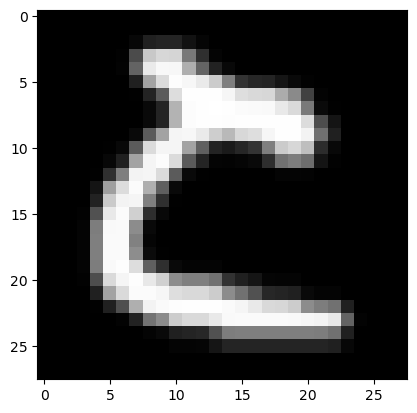

Predicted: 28, True Label: 28


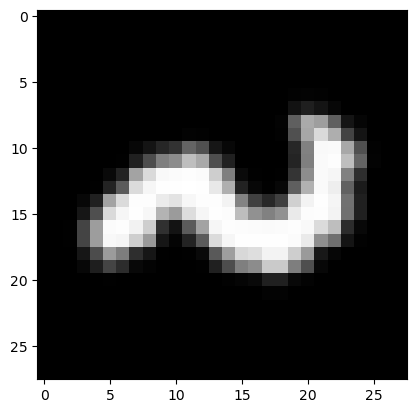

Predicted: 13, True Label: 25


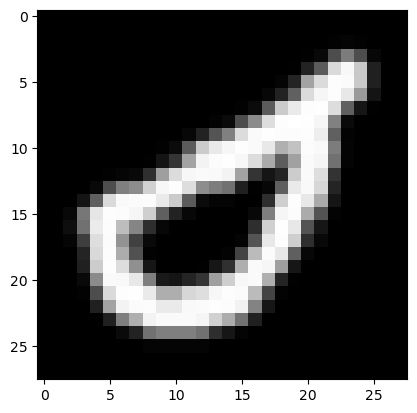

Predicted: 8, True Label: 8


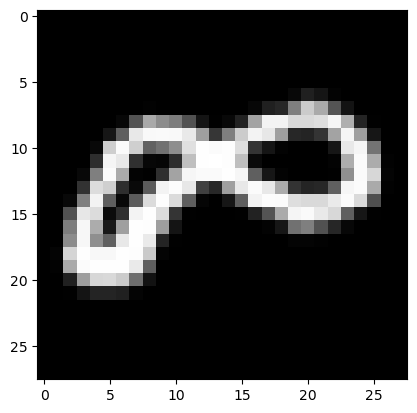

Predicted: 24, True Label: 24


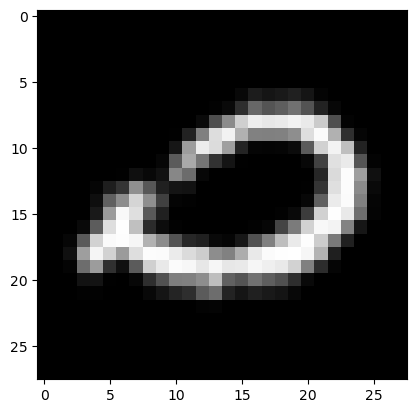

Predicted: 31, True Label: 31


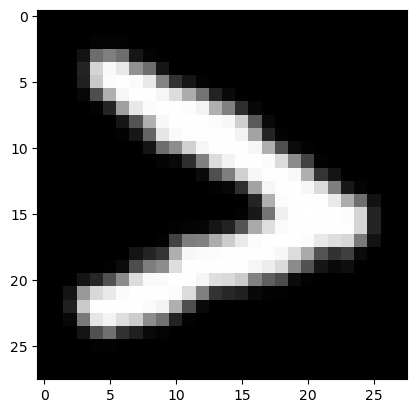

Predicted: 0, True Label: 24


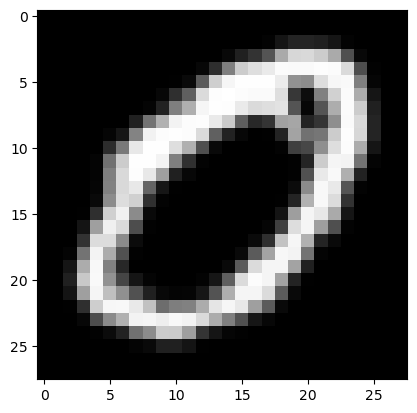

Predicted: 4, True Label: 4


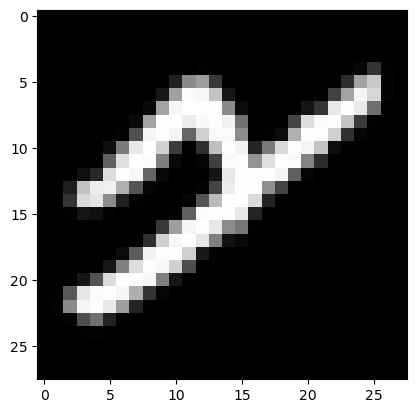

Predicted: 14, True Label: 14


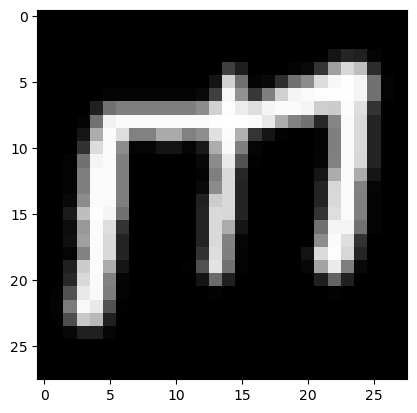

Predicted: 40, True Label: 40


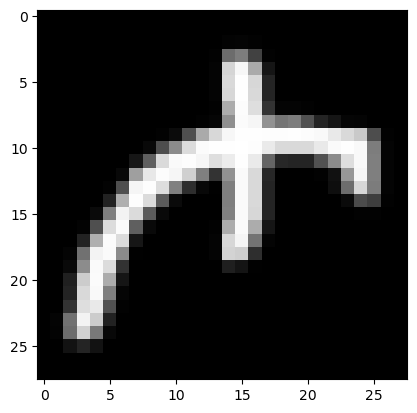

Predicted: 37, True Label: 37


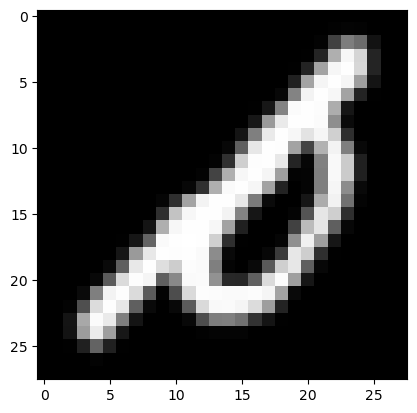

Predicted: 18, True Label: 18


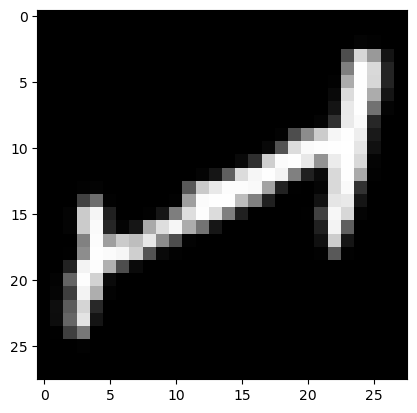

Predicted: 41, True Label: 41


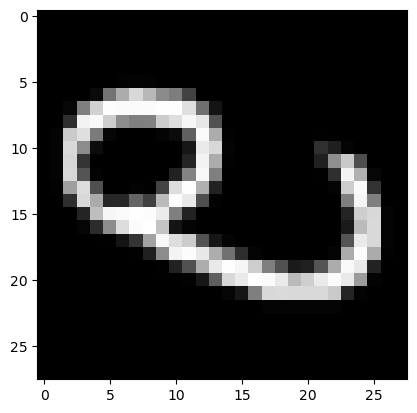

Predicted: 7, True Label: 7


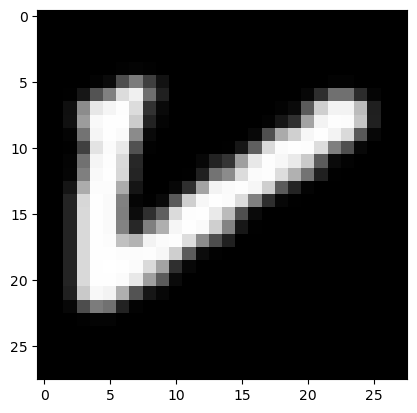

Predicted: 31, True Label: 31


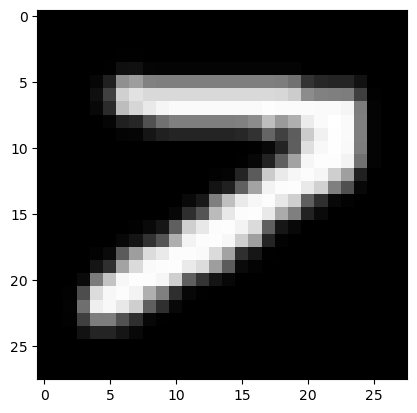

Predicted: 0, True Label: 13


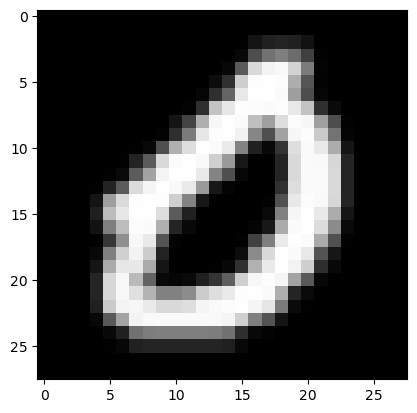

Predicted: 21, True Label: 21


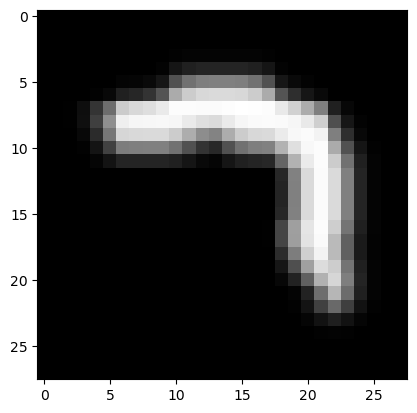

Predicted: 45, True Label: 45


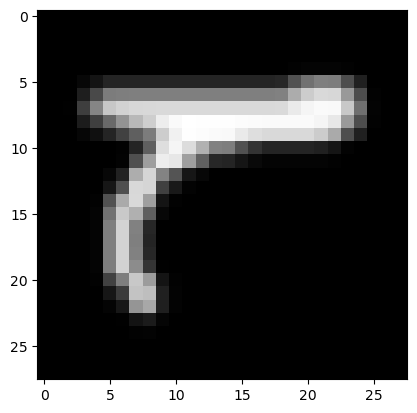

Predicted: 6, True Label: 6


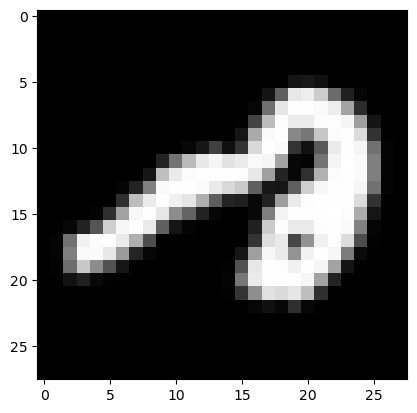

Predicted: 0, True Label: 24


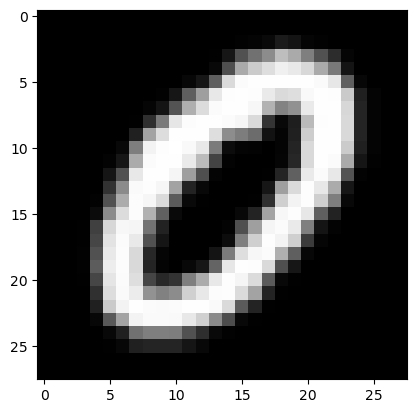

Predicted: 0, True Label: 24


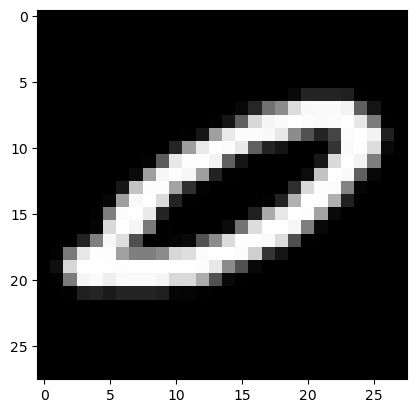

Predicted: 10, True Label: 10


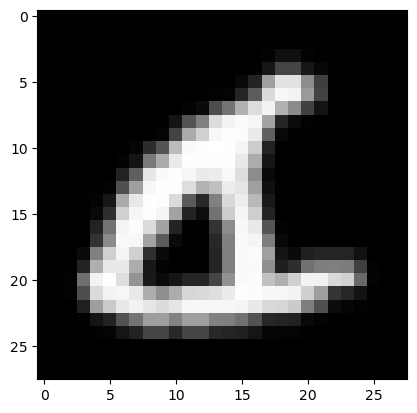

Predicted: 14, True Label: 14


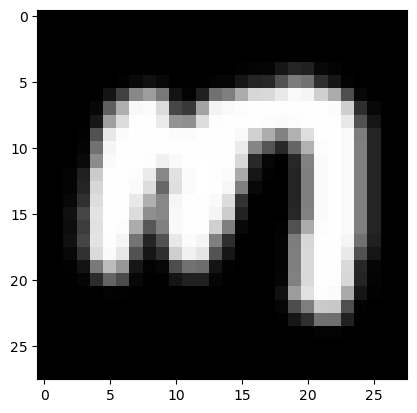

Predicted: 1, True Label: 18


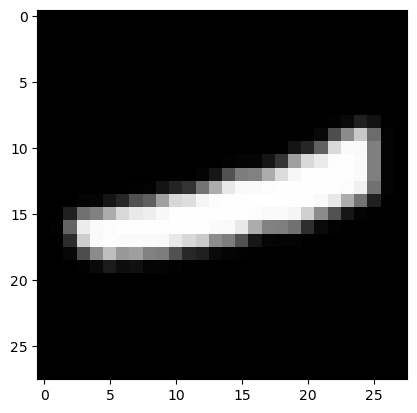

Predicted: 21, True Label: 1


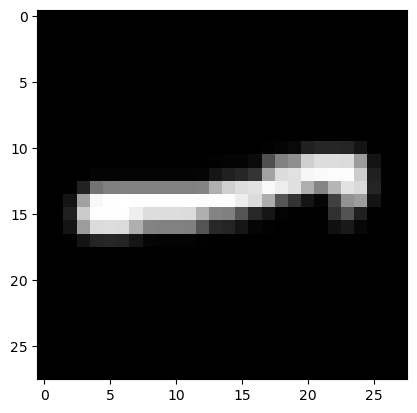

Predicted: 40, True Label: 15


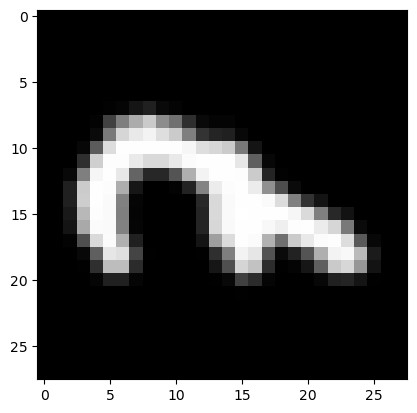

Predicted: 43, True Label: 43


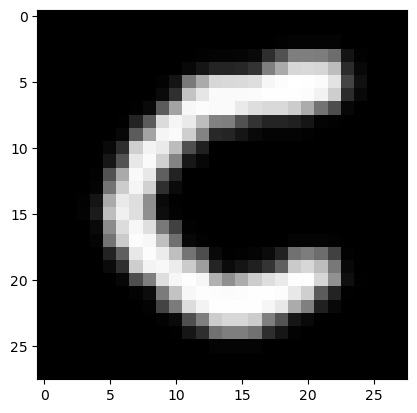

Predicted: 40, True Label: 40


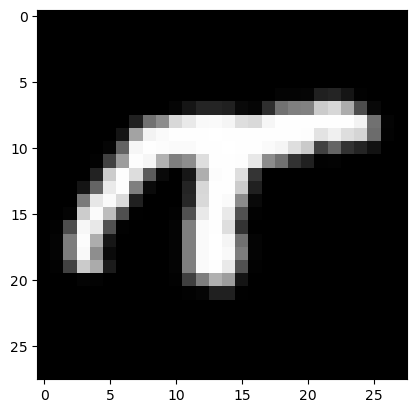

Predicted: 33, True Label: 33


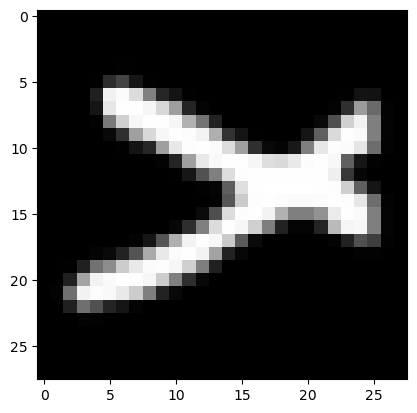

Predicted: 20, True Label: 20


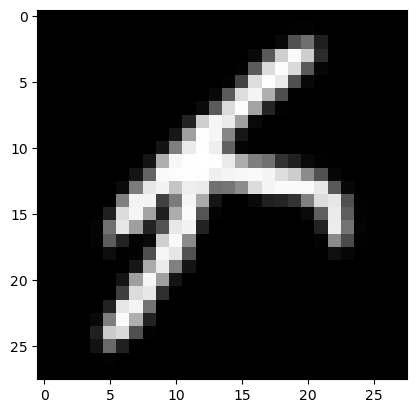

Predicted: 39, True Label: 39


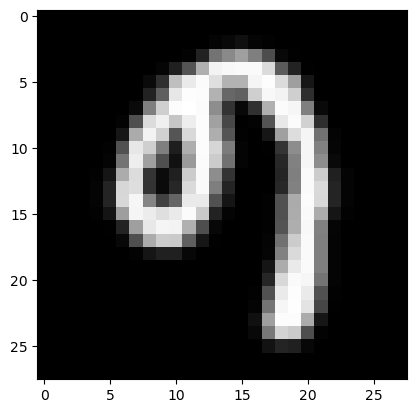

Predicted: 29, True Label: 29


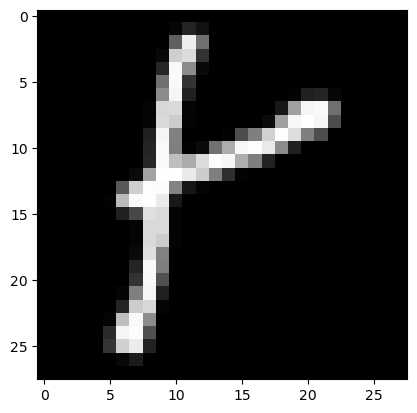

Predicted: 31, True Label: 23


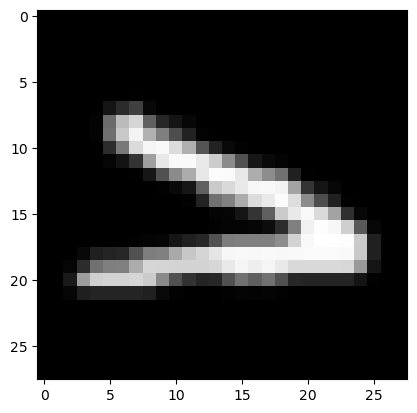

Predicted: 41, True Label: 41


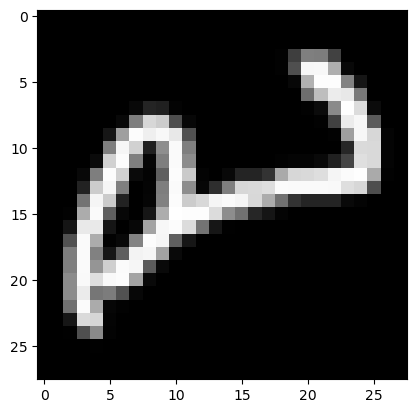

Predicted: 45, True Label: 45


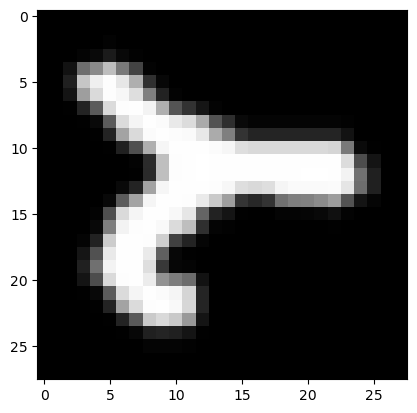

Predicted: 45, True Label: 45


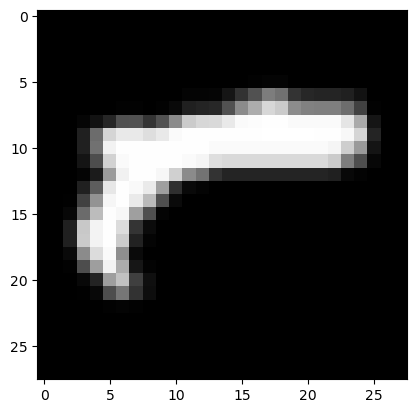

Predicted: 25, True Label: 25


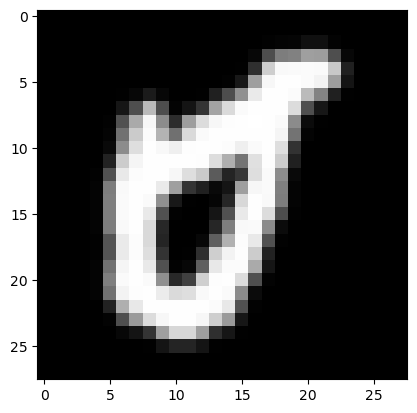

Predicted: 45, True Label: 15


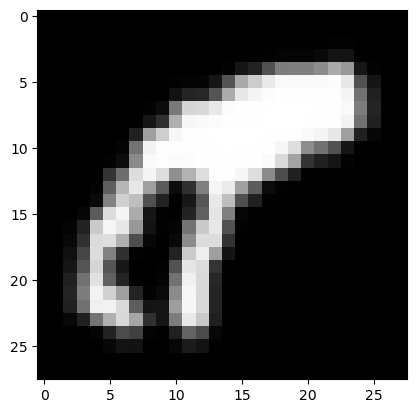

Predicted: 19, True Label: 19


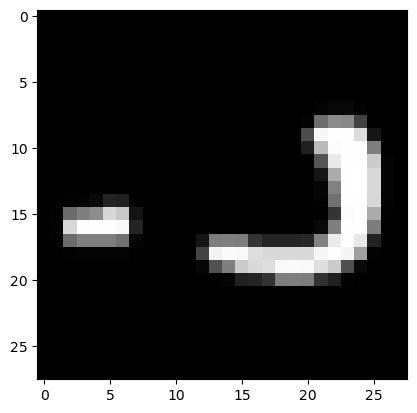

Predicted: 23, True Label: 23


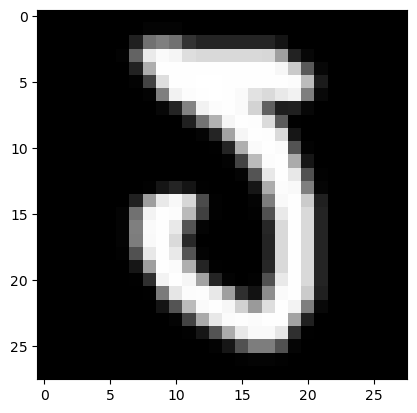

Predicted: 27, True Label: 27


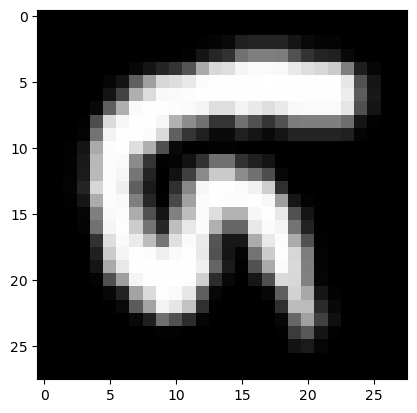

Predicted: 26, True Label: 26


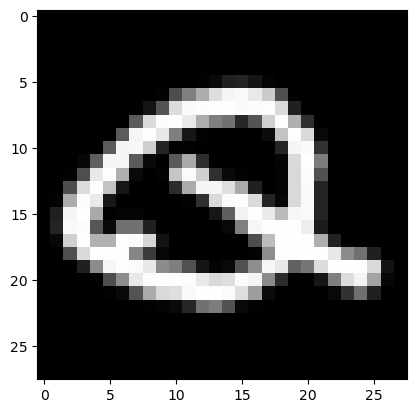

Predicted: 28, True Label: 28


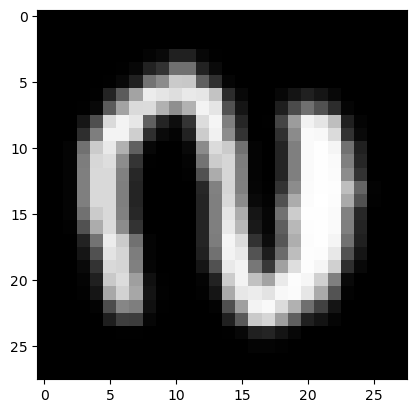

Predicted: 2, True Label: 2


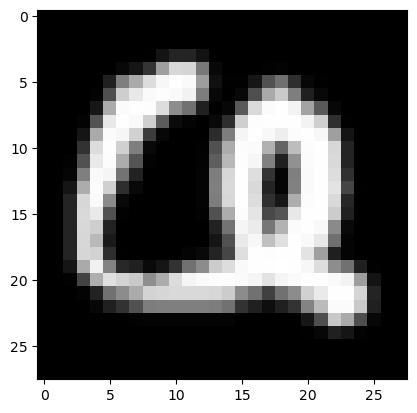

Predicted: 41, True Label: 44


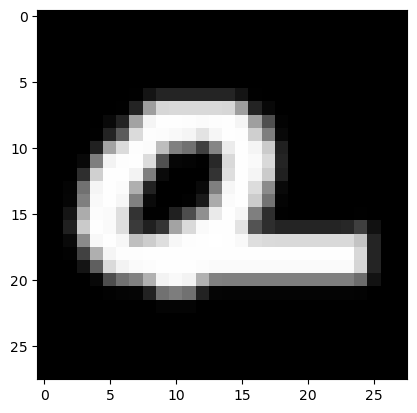

Predicted: 27, True Label: 27


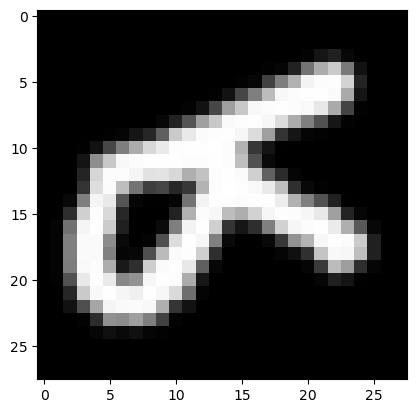

Predicted: 19, True Label: 19


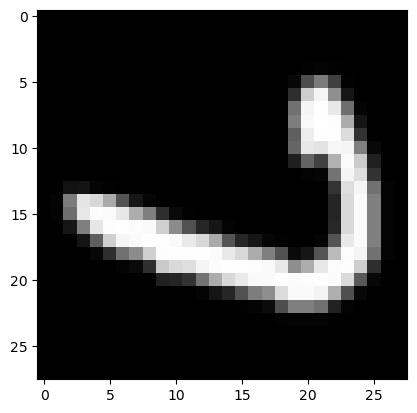

Predicted: 34, True Label: 34


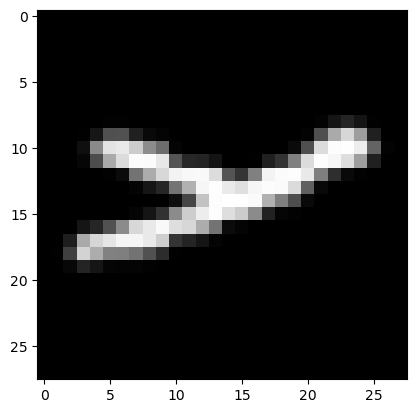

Predicted: 34, True Label: 34


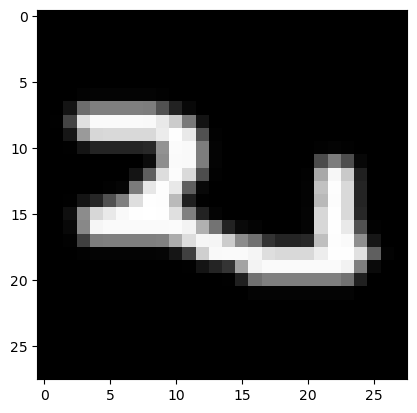

Predicted: 4, True Label: 4


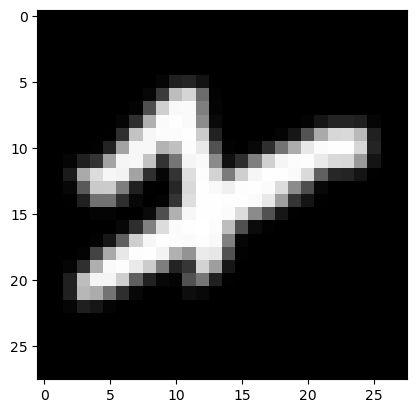

Predicted: 37, True Label: 37


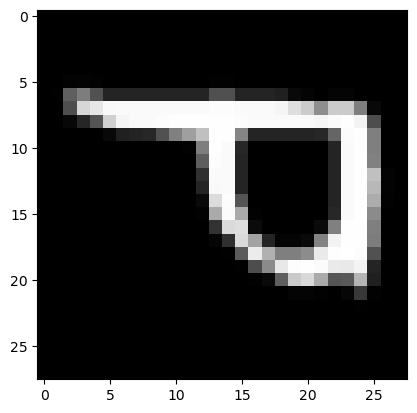

Predicted: 35, True Label: 35


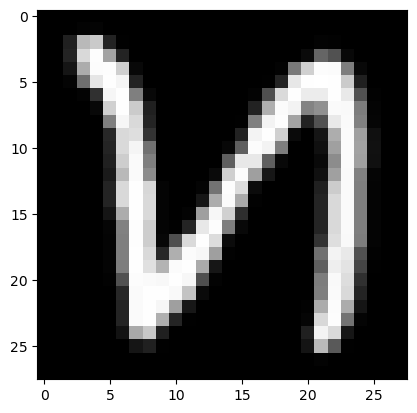

Predicted: 8, True Label: 8


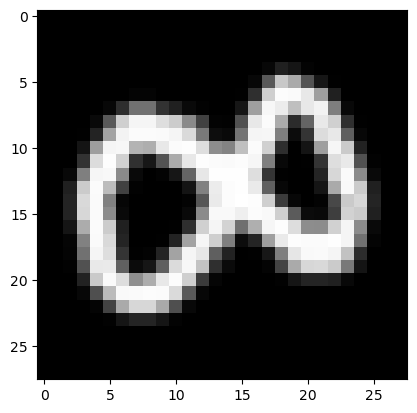

Predicted: 15, True Label: 15


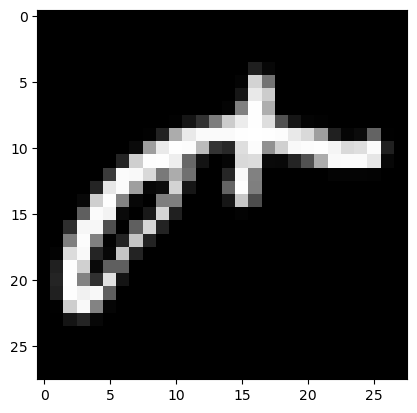

Predicted: 30, True Label: 30


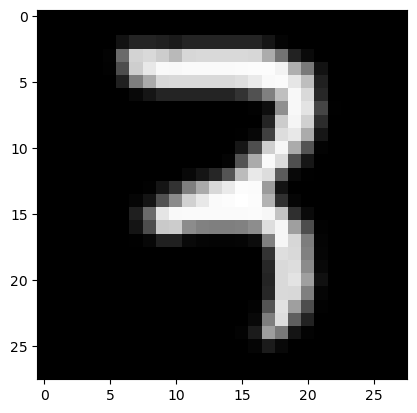

Predicted: 25, True Label: 25


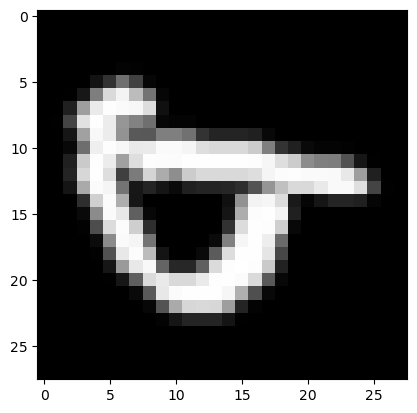

Predicted: 10, True Label: 10


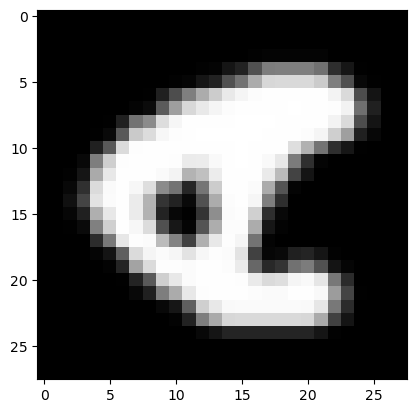

Predicted: 1, True Label: 18


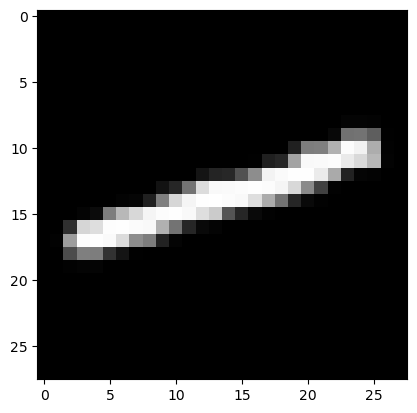

Predicted: 10, True Label: 10


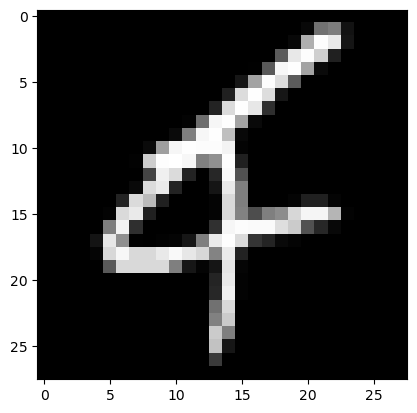

Predicted: 32, True Label: 32


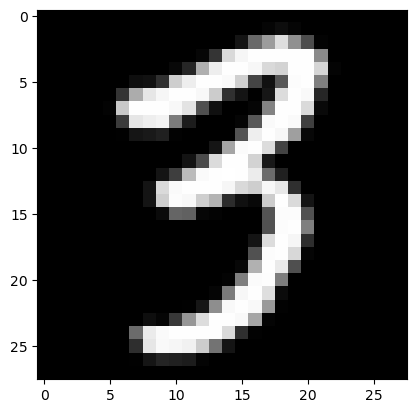

Predicted: 27, True Label: 27


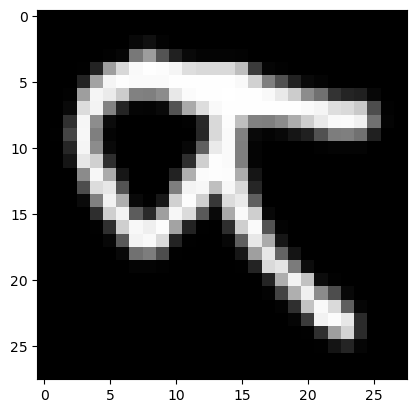

Predicted: 18, True Label: 18


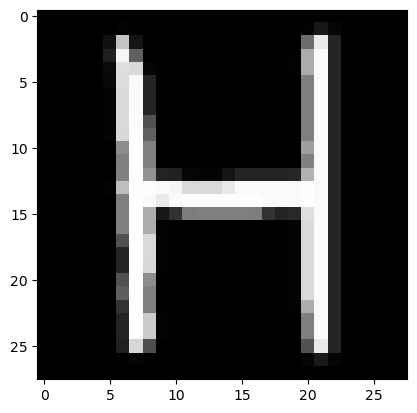

Predicted: 42, True Label: 42


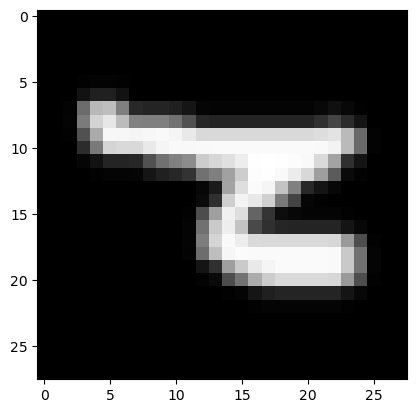

Predicted: 18, True Label: 18


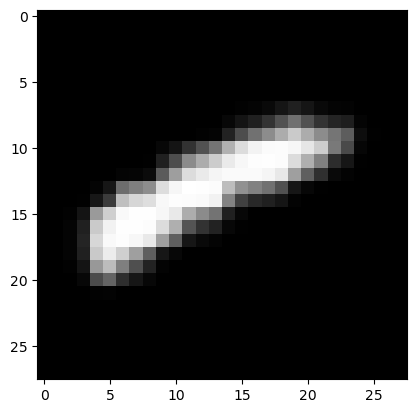

Predicted: 13, True Label: 13


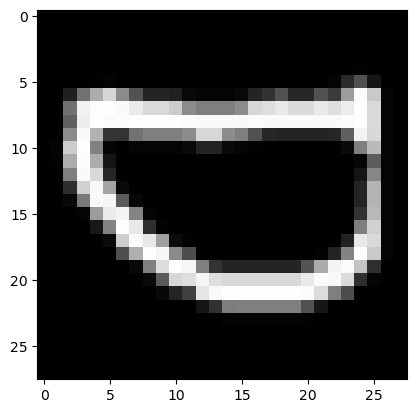

Predicted: 17, True Label: 17


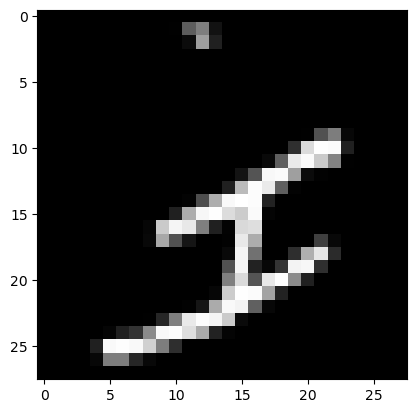

Predicted: 33, True Label: 33


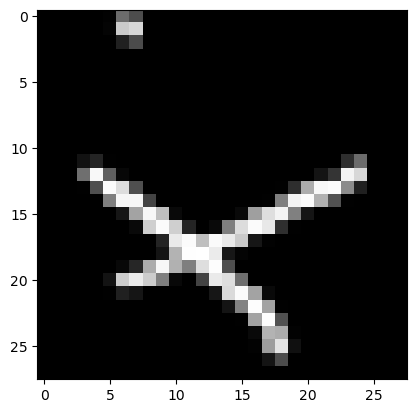

Predicted: 26, True Label: 26


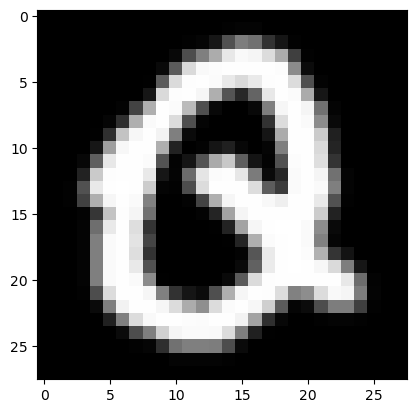

Predicted: 11, True Label: 8


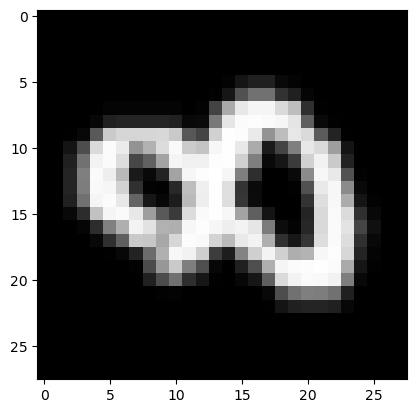

Predicted: 5, True Label: 19


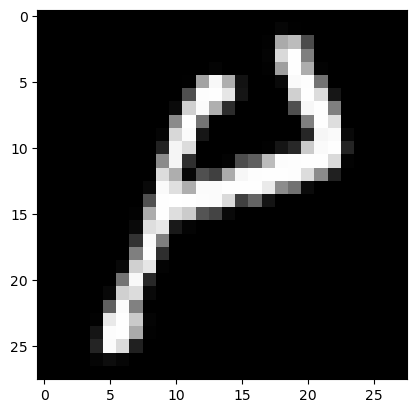

Predicted: 19, True Label: 19


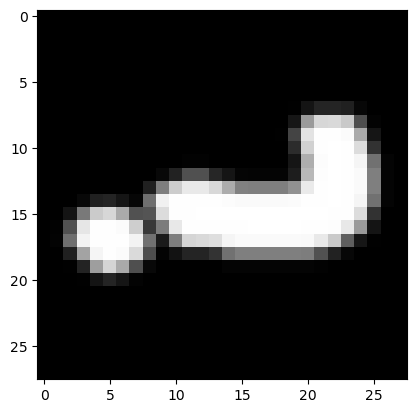

Predicted: 14, True Label: 14


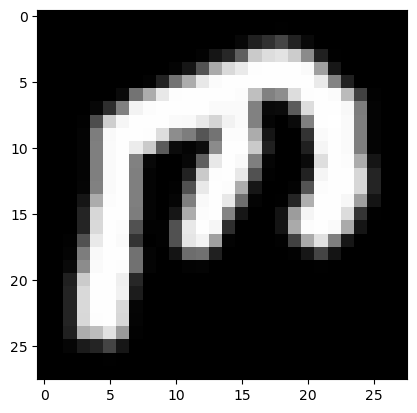

Predicted: 38, True Label: 38


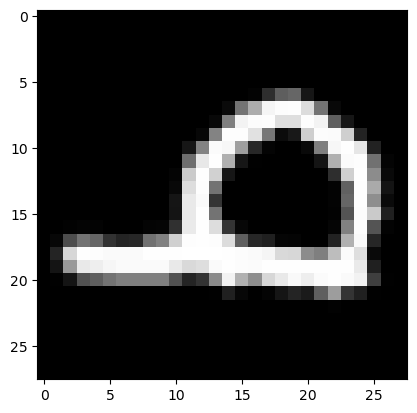

Predicted: 30, True Label: 30


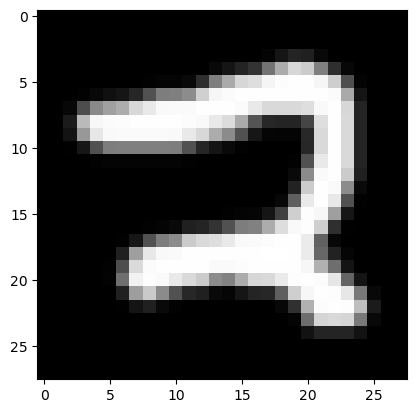

Predicted: 1, True Label: 21


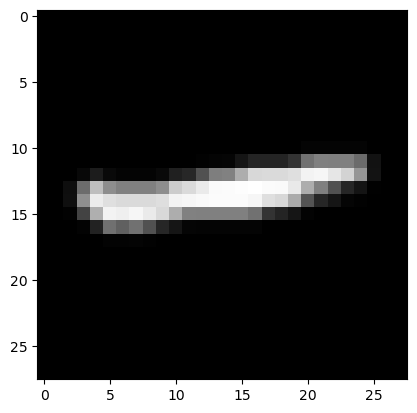

Predicted: 13, True Label: 13


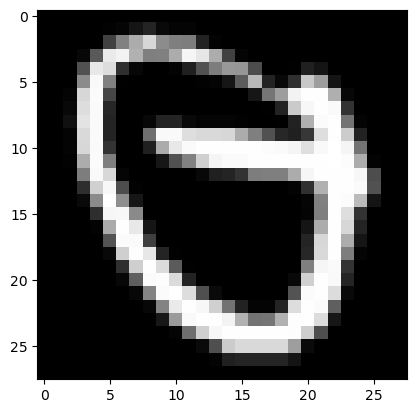

Predicted: 23, True Label: 23


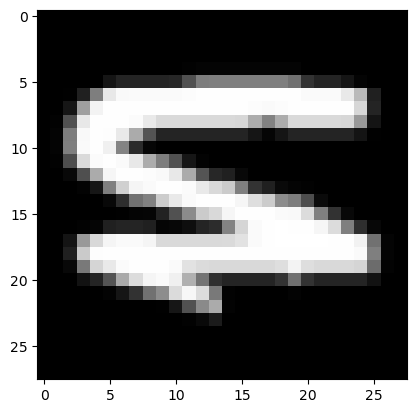

Predicted: 29, True Label: 29


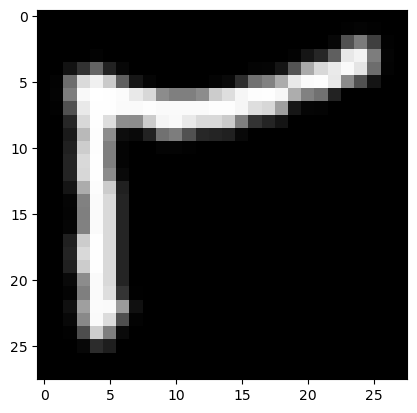

Predicted: 46, True Label: 46


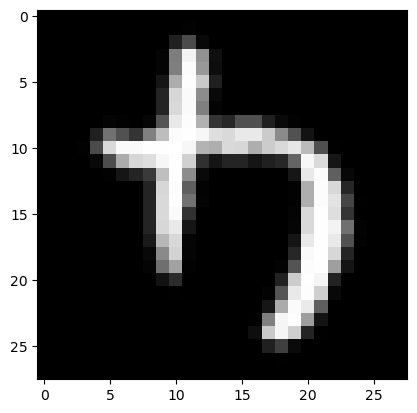

Predicted: 39, True Label: 39


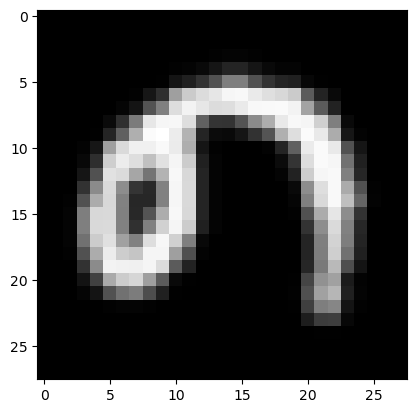

Predicted: 45, True Label: 45


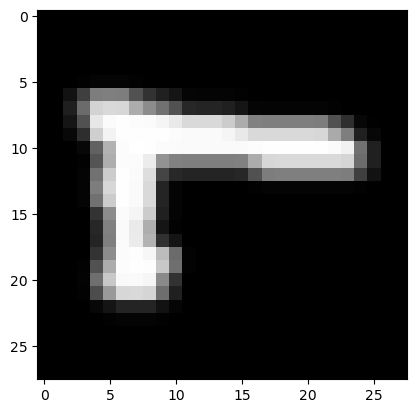

Predicted: 8, True Label: 8


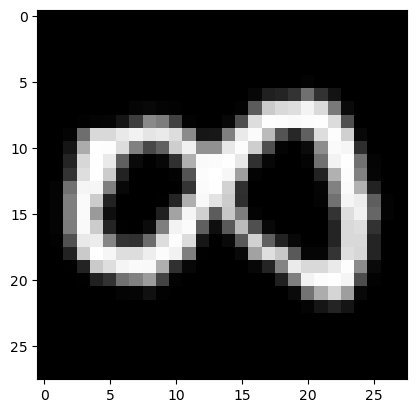

Predicted: 42, True Label: 42


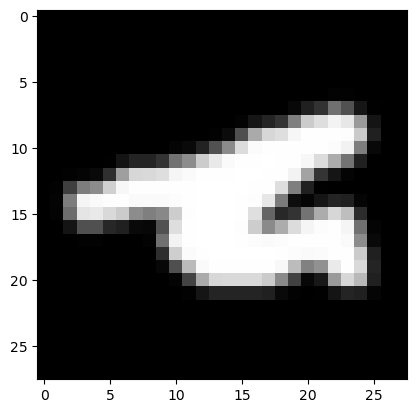

Predicted: 41, True Label: 2


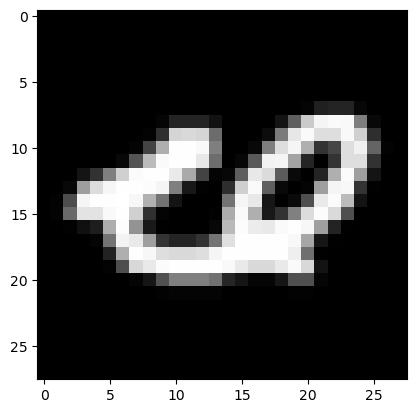

Predicted: 32, True Label: 32


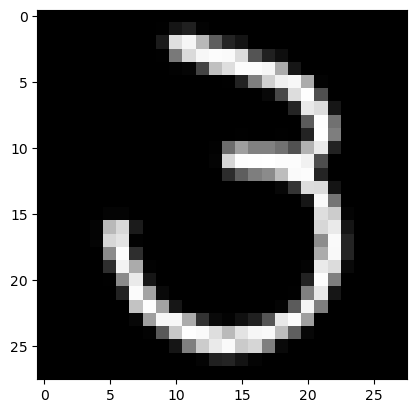

Predicted: 23, True Label: 23


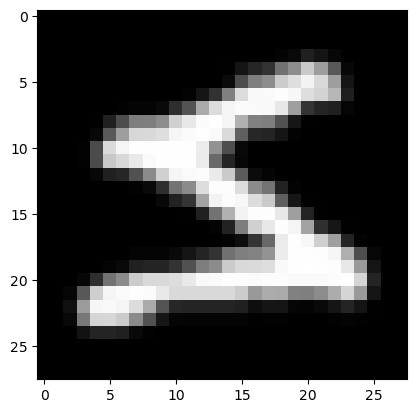

Predicted: 26, True Label: 26


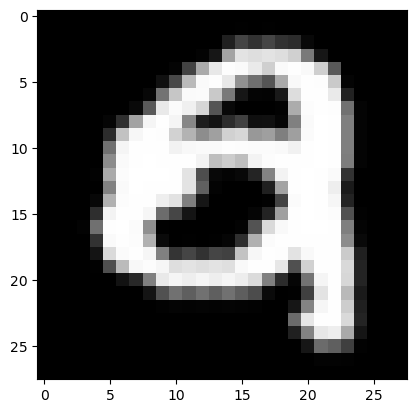

Predicted: 38, True Label: 36


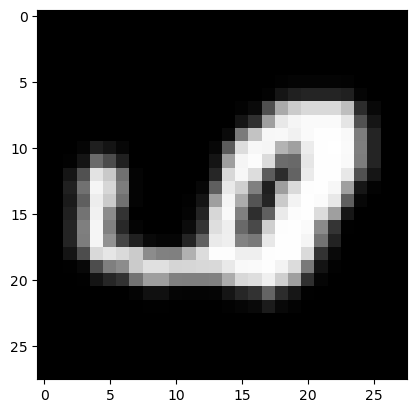

Predicted: 32, True Label: 32


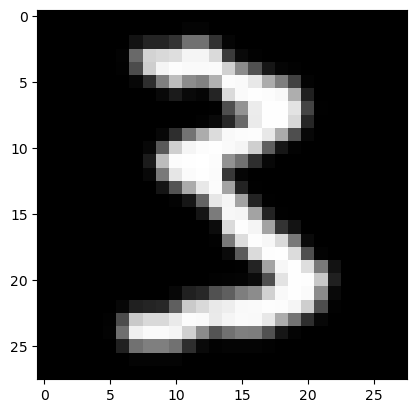

Predicted: 25, True Label: 25


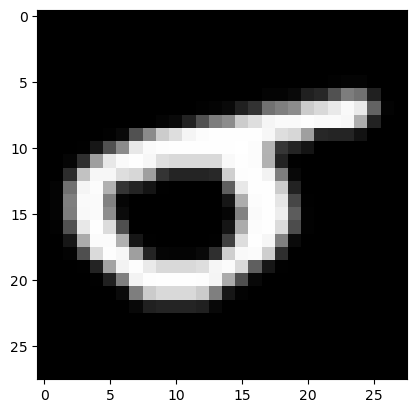

Predicted: 26, True Label: 26


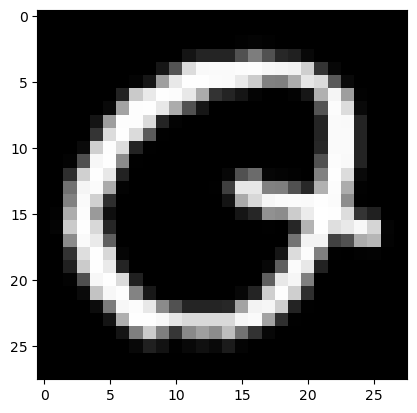

Predicted: 22, True Label: 22


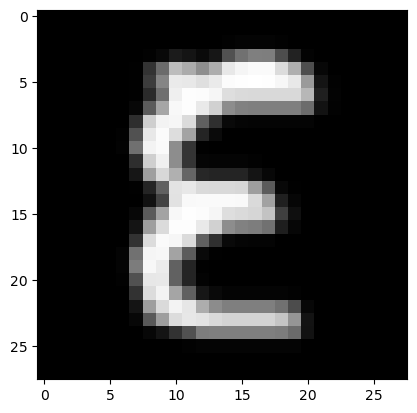

Predicted: 33, True Label: 33


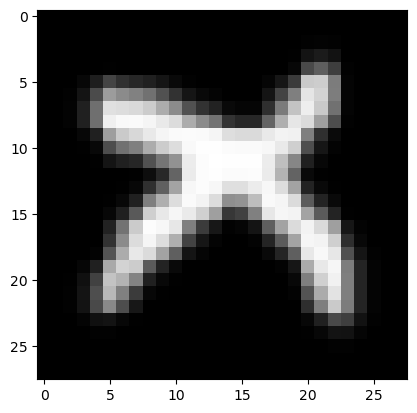

Predicted: 40, True Label: 40


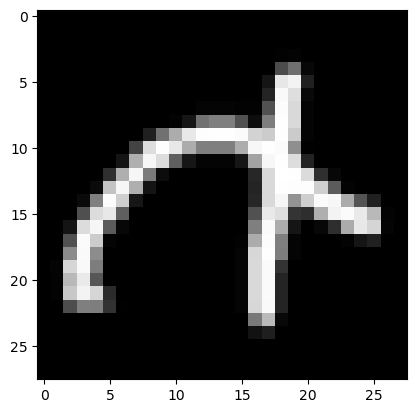

Predicted: 37, True Label: 46


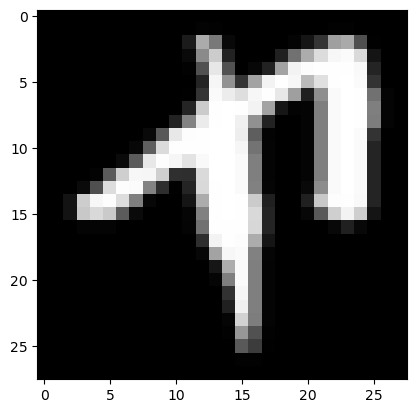

Predicted: 14, True Label: 14


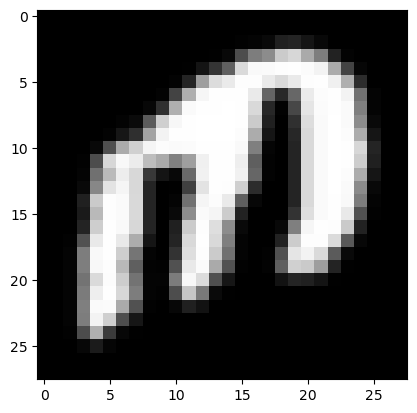

Predicted: 7, True Label: 7


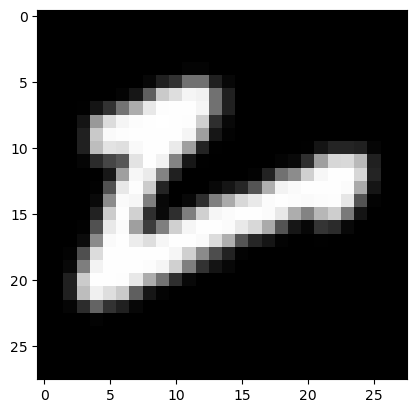

Predicted: 42, True Label: 42


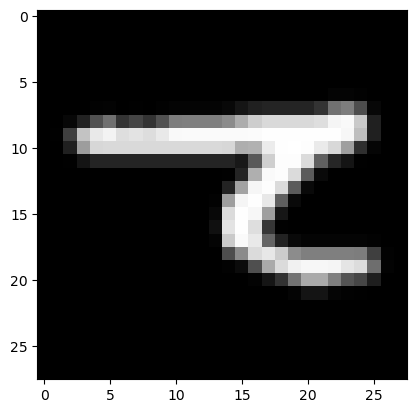

Predicted: 26, True Label: 41


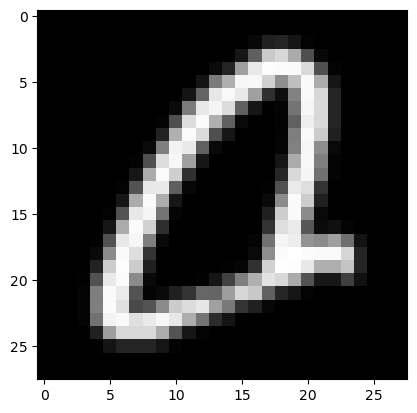

Predicted: 44, True Label: 26


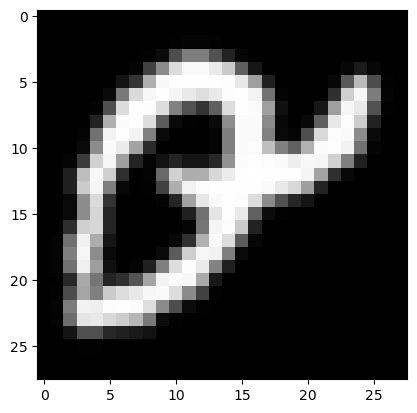

Predicted: 40, True Label: 15


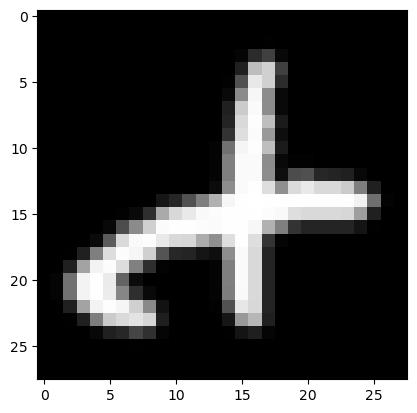

Predicted: 5, True Label: 28


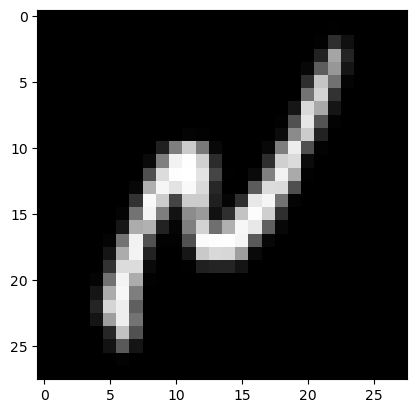

Predicted: 45, True Label: 45


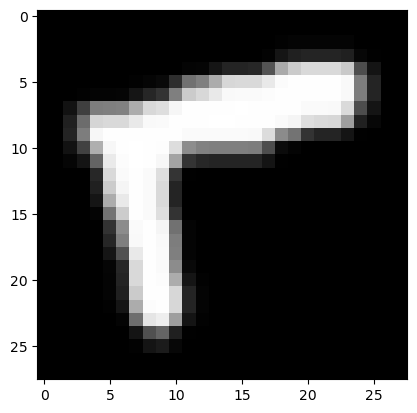

Predicted: 36, True Label: 36


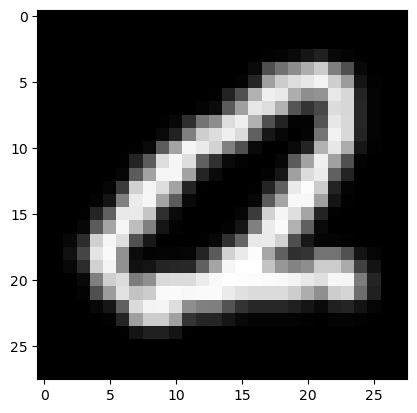

Predicted: 15, True Label: 40


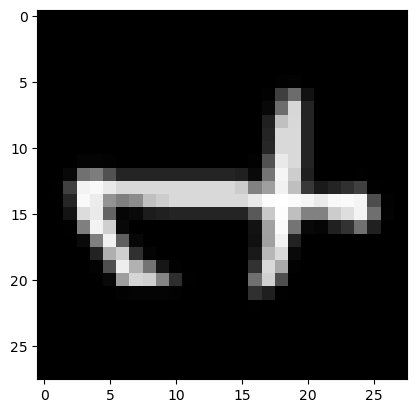

Predicted: 41, True Label: 41


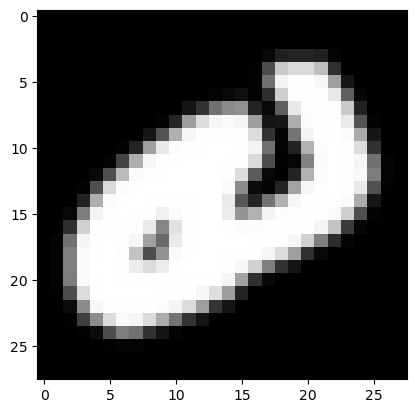

Predicted: 2, True Label: 2


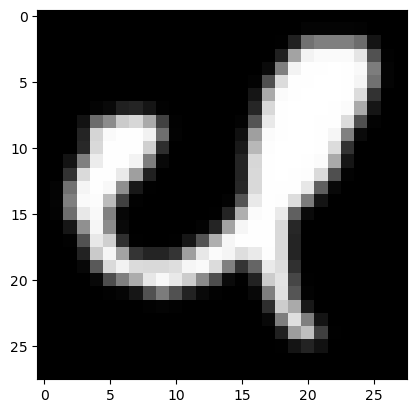

Predicted: 12, True Label: 12


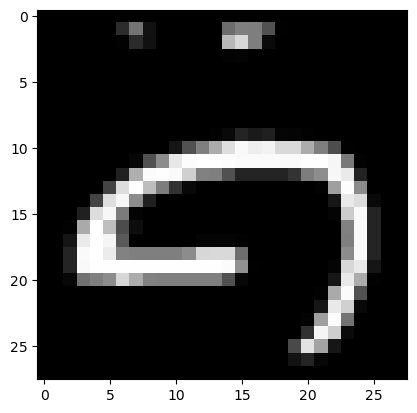

Predicted: 14, True Label: 14


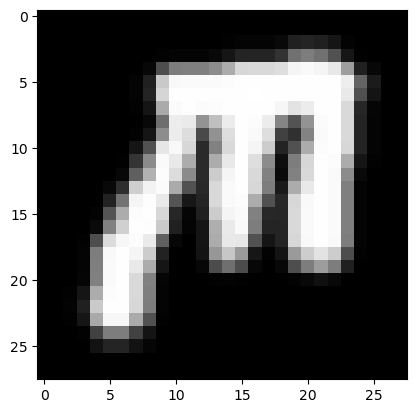

Predicted: 31, True Label: 31


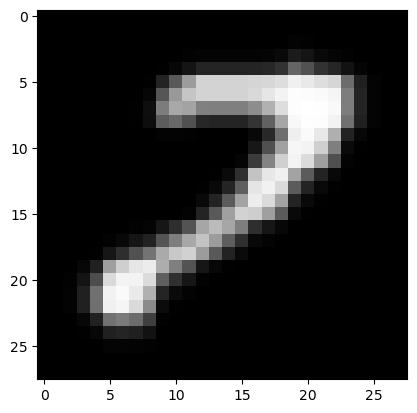

Predicted: 22, True Label: 22


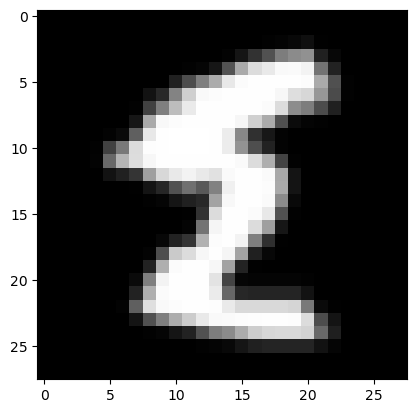

Predicted: 37, True Label: 37


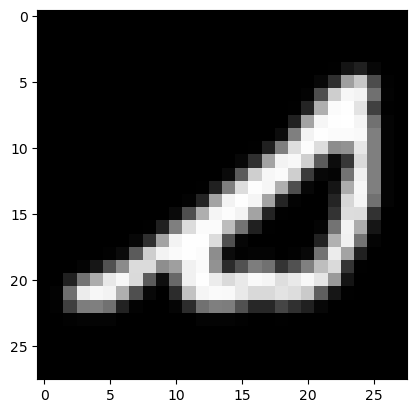

Predicted: 3, True Label: 3


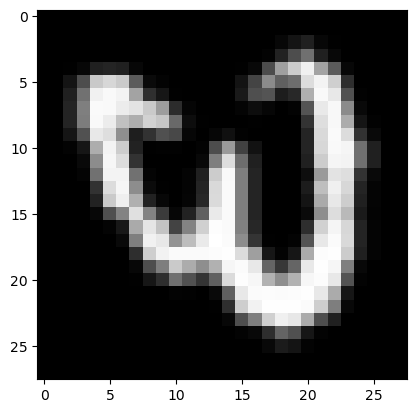

Predicted: 5, True Label: 5


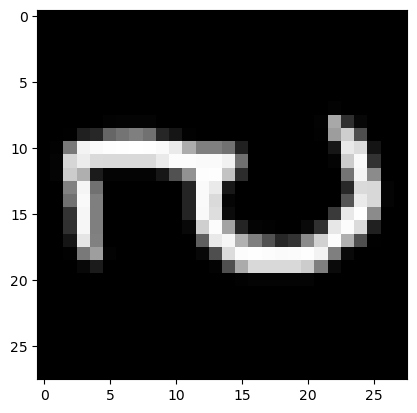

Predicted: 15, True Label: 15


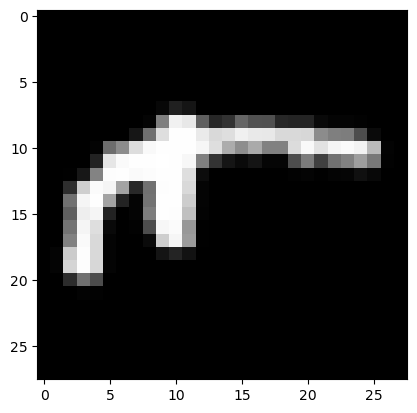

Predicted: 35, True Label: 35


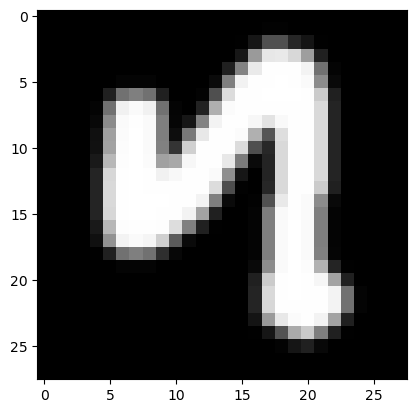

Predicted: 21, True Label: 21


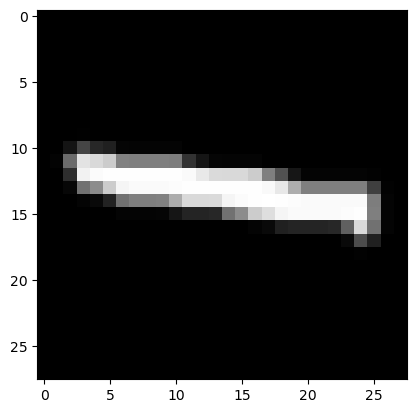

Predicted: 40, True Label: 15


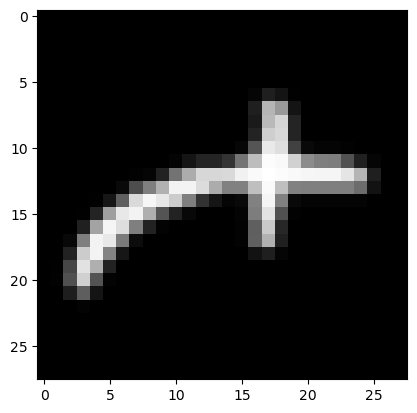

Predicted: 18, True Label: 21


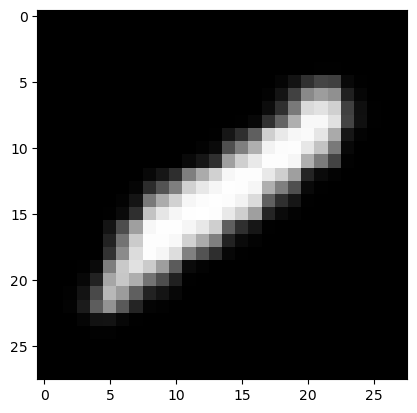

Predicted: 4, True Label: 4


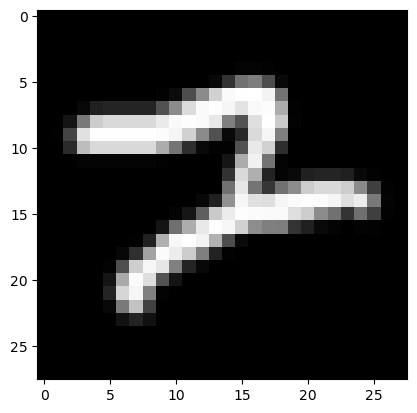

Predicted: 39, True Label: 39


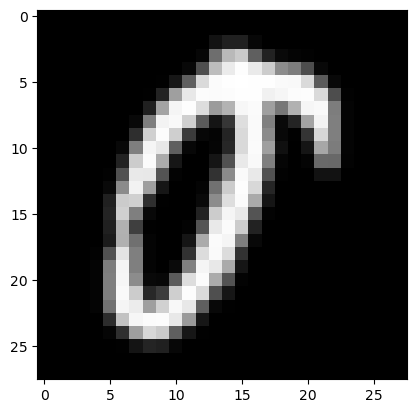

Predicted: 23, True Label: 23


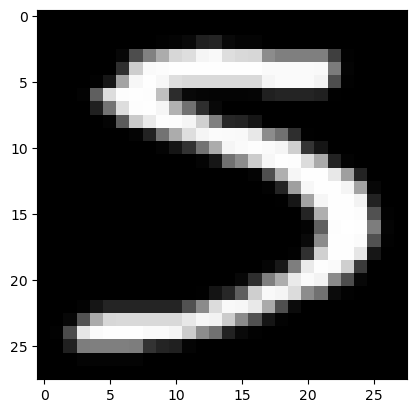

Predicted: 16, True Label: 6


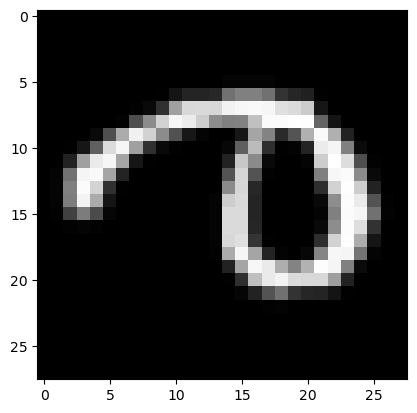

Predicted: 24, True Label: 24


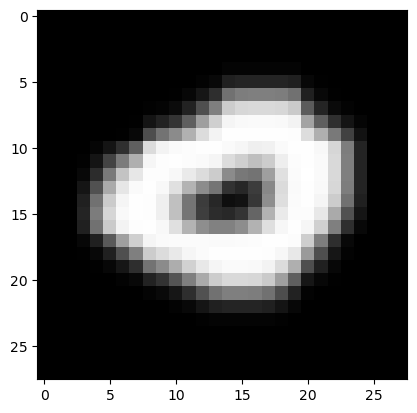

Predicted: 25, True Label: 40


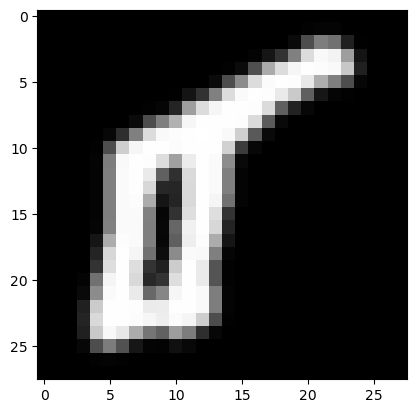

Predicted: 19, True Label: 34


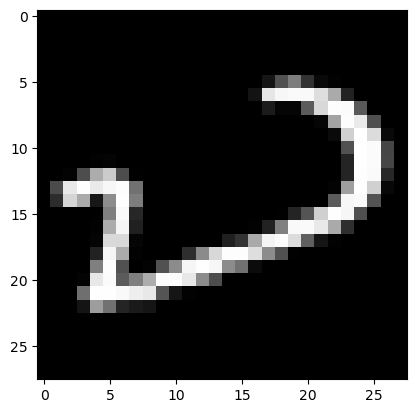

Predicted: 45, True Label: 45


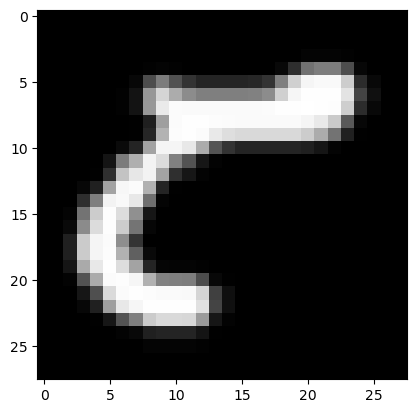

Predicted: 6, True Label: 6


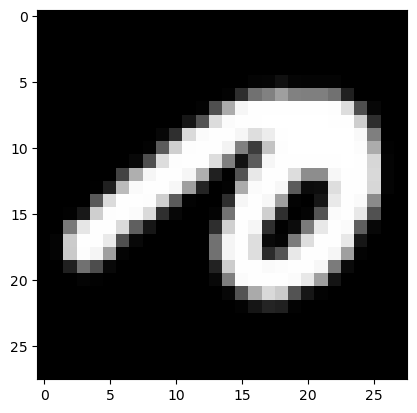

Predicted: 5, True Label: 5


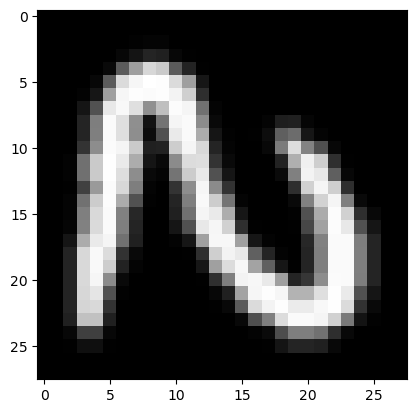

Predicted: 37, True Label: 37


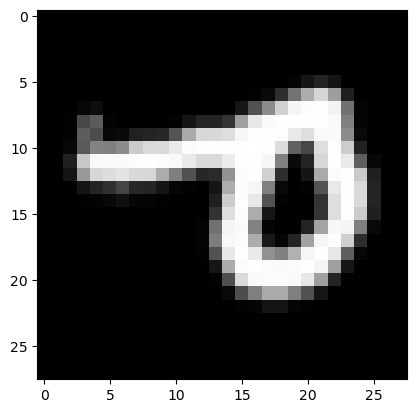

Predicted: 0, True Label: 0


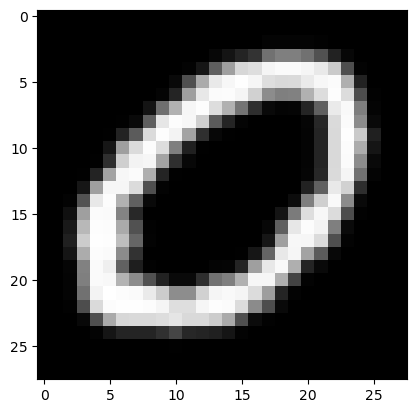

Predicted: 20, True Label: 20


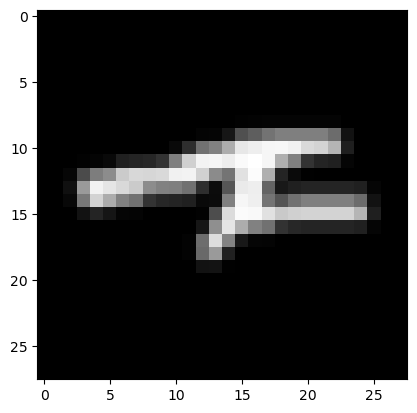

Predicted: 31, True Label: 30


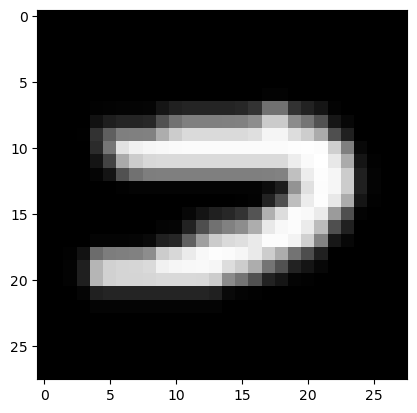

Predicted: 10, True Label: 27


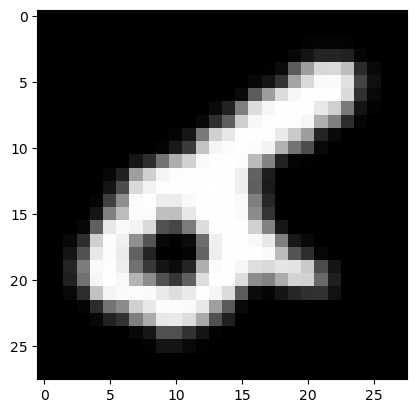

Predicted: 12, True Label: 12


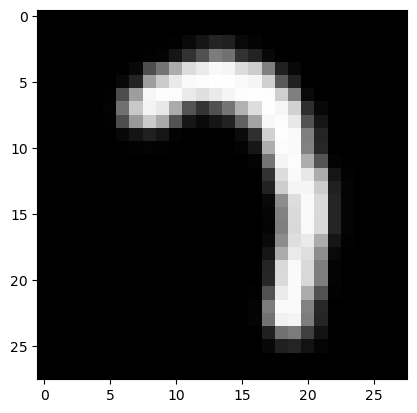

Predicted: 15, True Label: 40


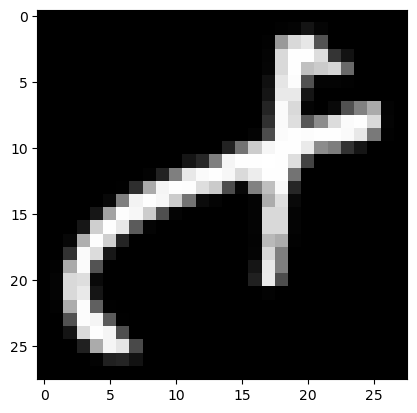

Predicted: 31, True Label: 31


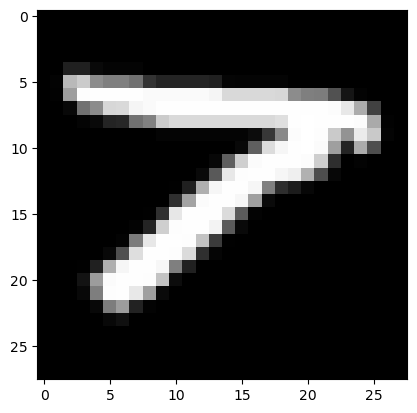

Predicted: 11, True Label: 11


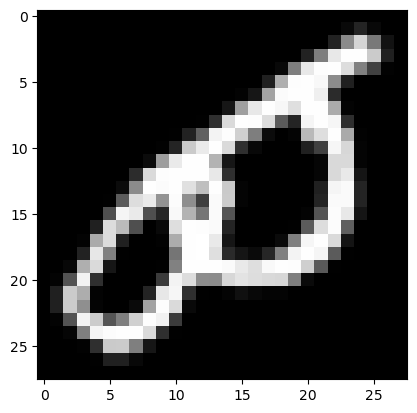

Predicted: 36, True Label: 36


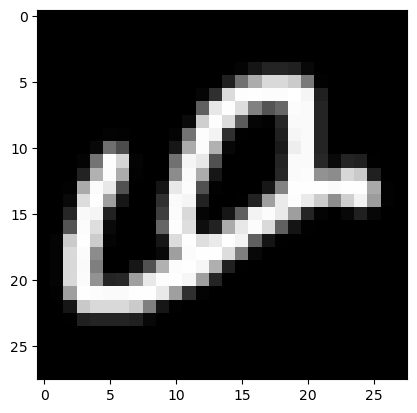

Predicted: 9, True Label: 41


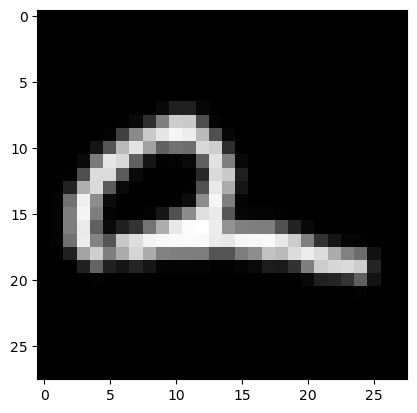

Predicted: 4, True Label: 4


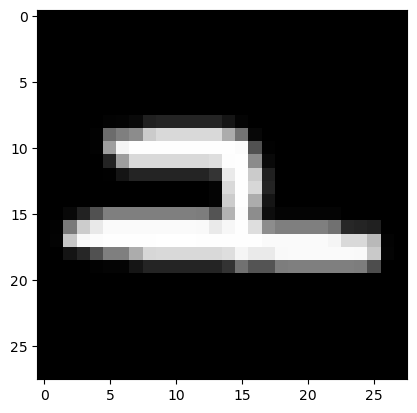

Predicted: 10, True Label: 10


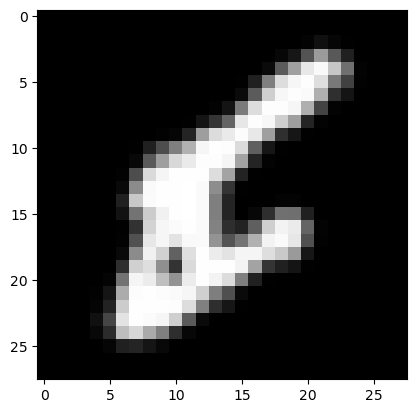

Predicted: 4, True Label: 4


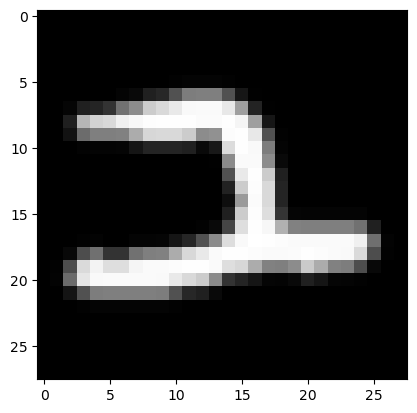

Predicted: 37, True Label: 46


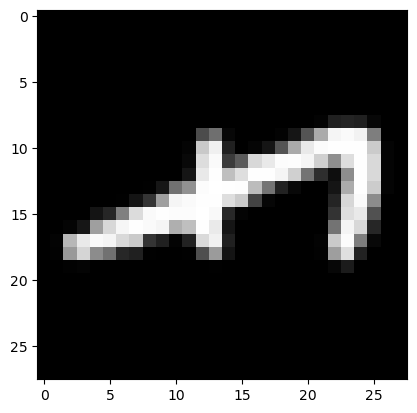

Predicted: 19, True Label: 19


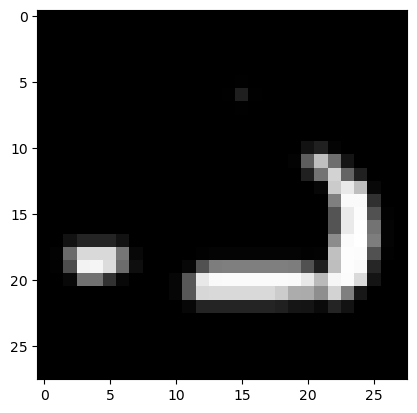

Predicted: 27, True Label: 27


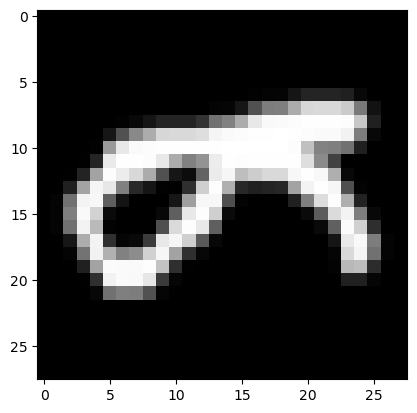

Predicted: 45, True Label: 45


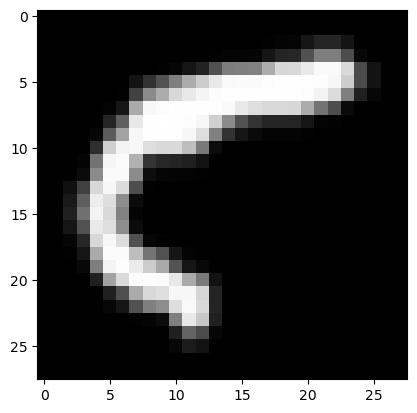

Predicted: 29, True Label: 29


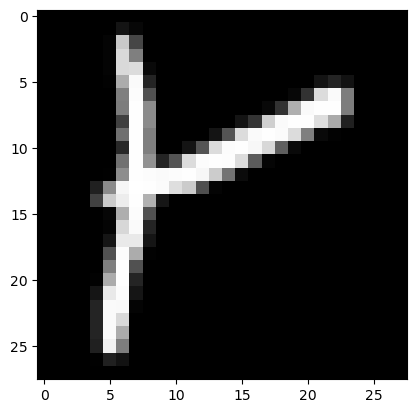

Predicted: 35, True Label: 35


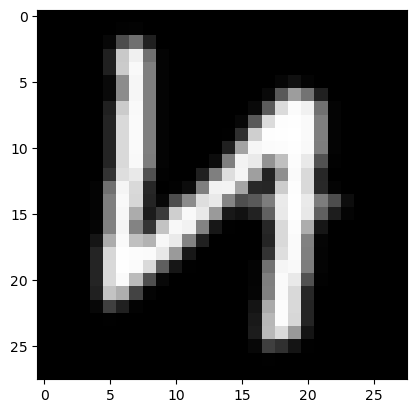

Predicted: 22, True Label: 22


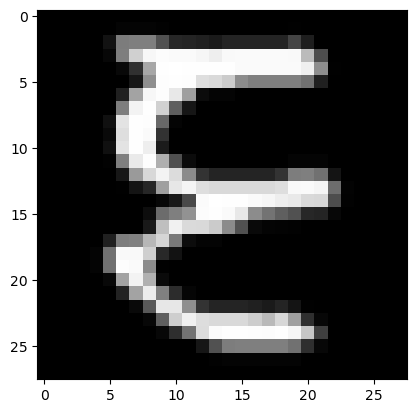

Predicted: 10, True Label: 10


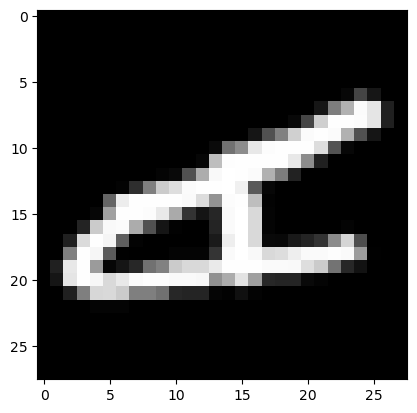

Predicted: 2, True Label: 2


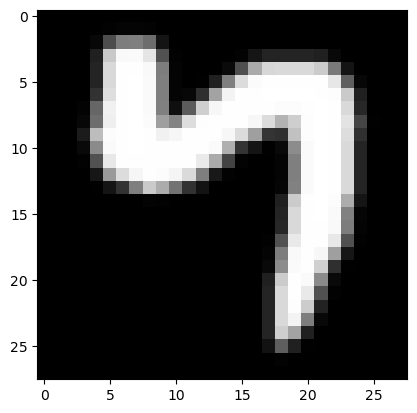

Predicted: 10, True Label: 10


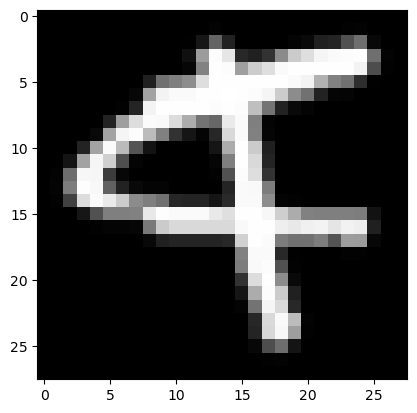

Predicted: 28, True Label: 28


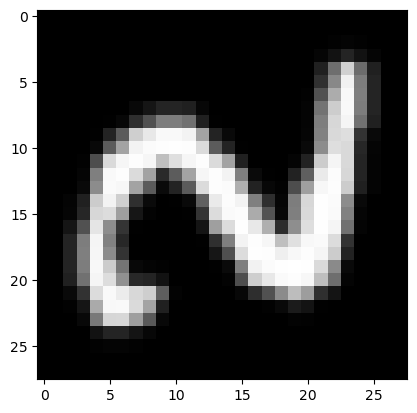

Predicted: 35, True Label: 35


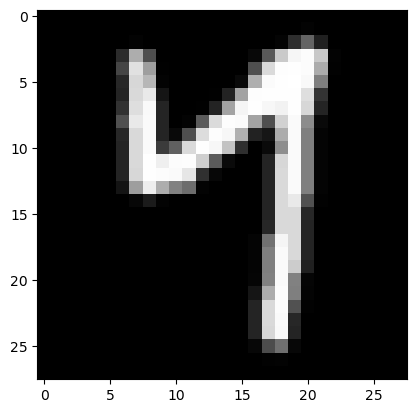

Predicted: 12, True Label: 35


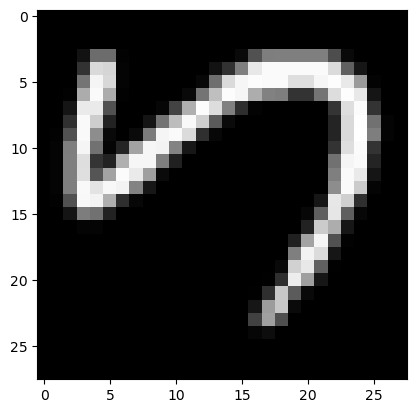

Predicted: 0, True Label: 0


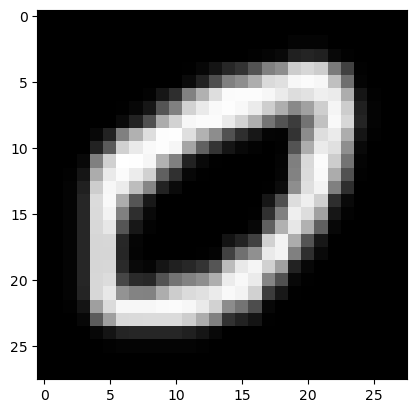

Predicted: 0, True Label: 13


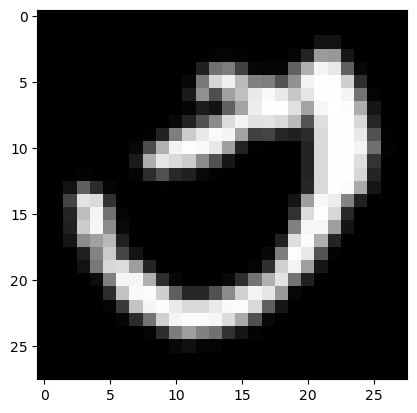

Predicted: 23, True Label: 23


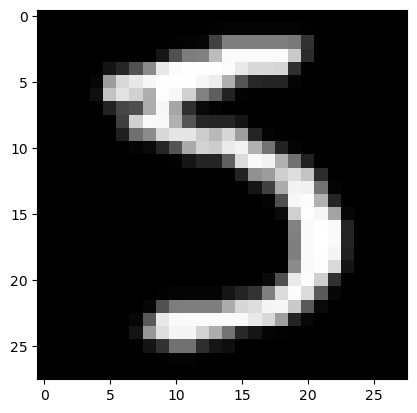

Predicted: 43, True Label: 43


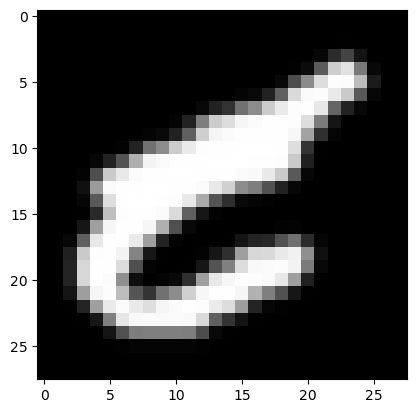

Predicted: 20, True Label: 20


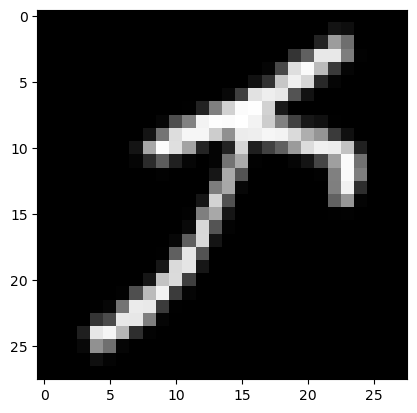

Predicted: 23, True Label: 23


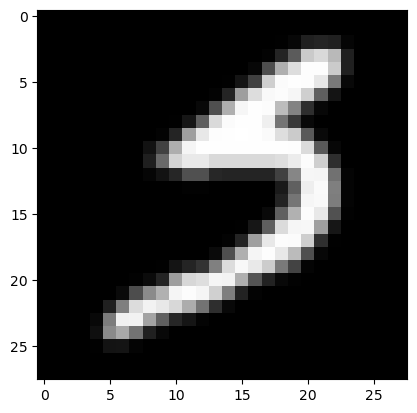

Predicted: 28, True Label: 28


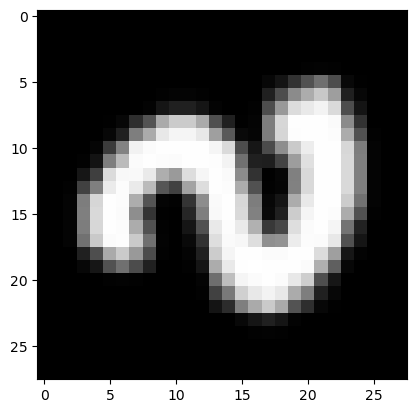

Predicted: 20, True Label: 20


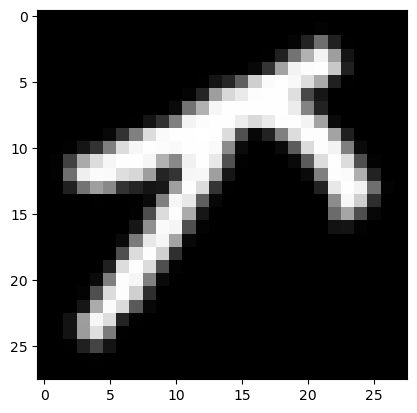

Predicted: 2, True Label: 35


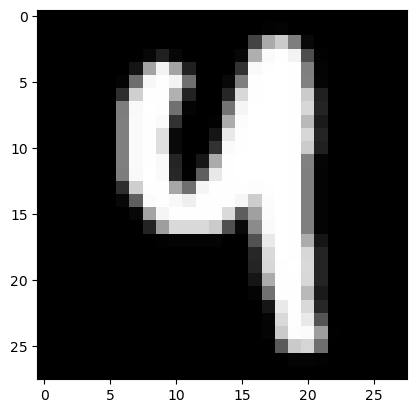

Predicted: 14, True Label: 14


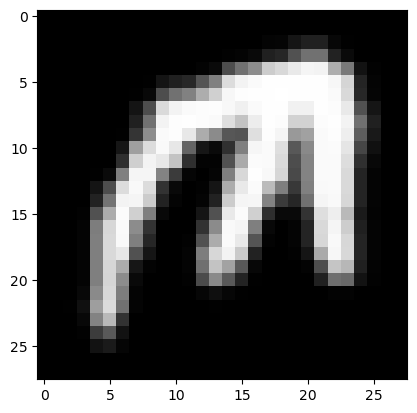

Predicted: 27, True Label: 27


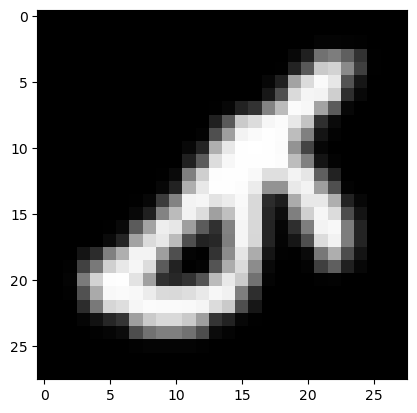

Predicted: 22, True Label: 22


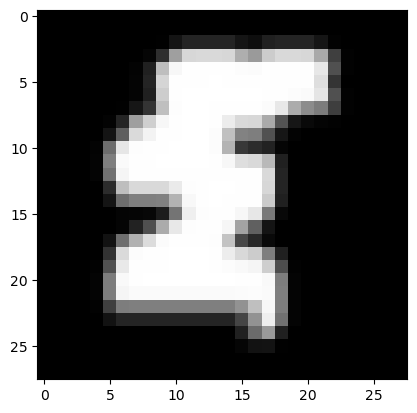

Predicted: 14, True Label: 14


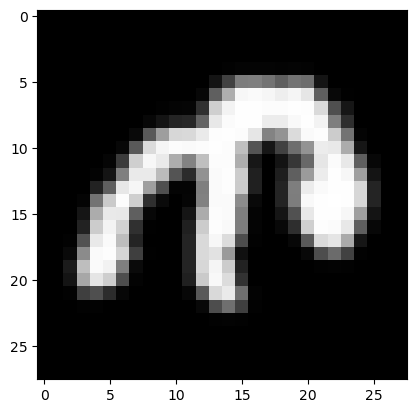

Predicted: 1, True Label: 1


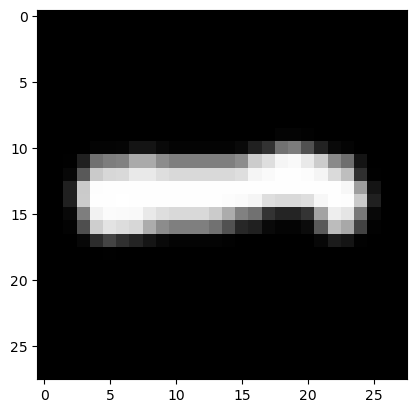

Predicted: 11, True Label: 11


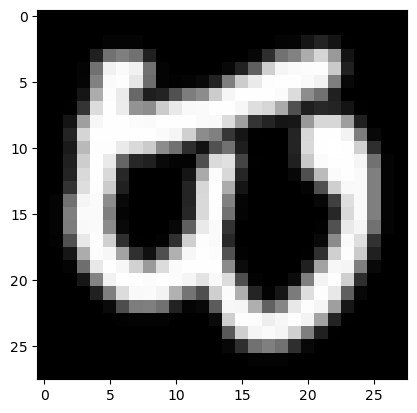

Predicted: 31, True Label: 31


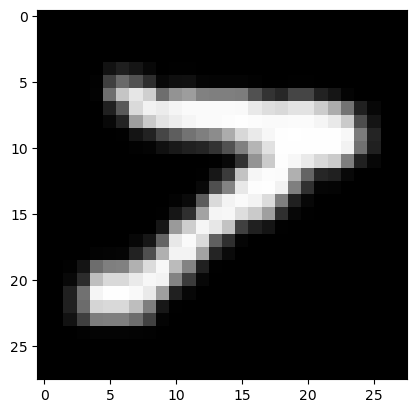

Predicted: 25, True Label: 25


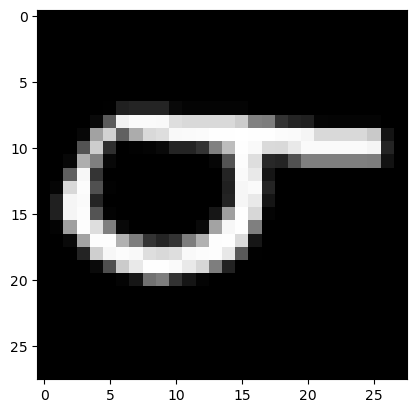

Predicted: 11, True Label: 24


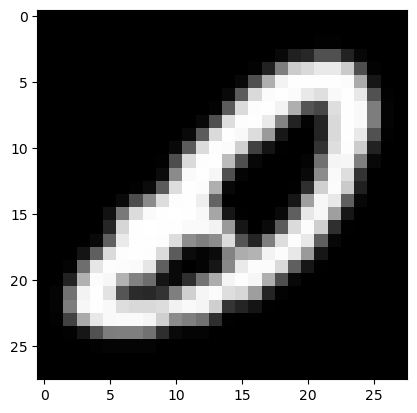

Predicted: 32, True Label: 32


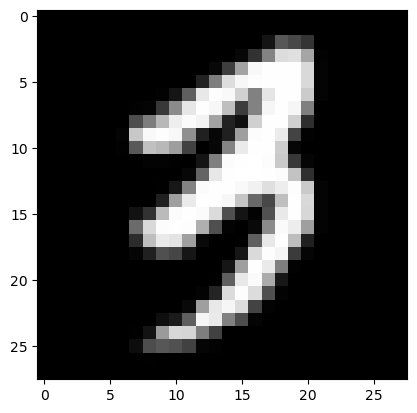

Predicted: 20, True Label: 20


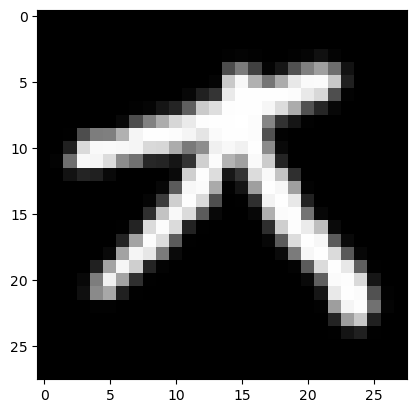

Predicted: 18, True Label: 18


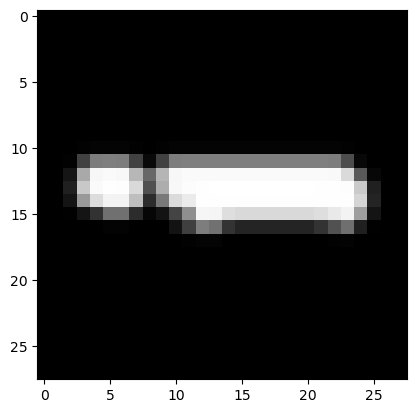

Predicted: 34, True Label: 34


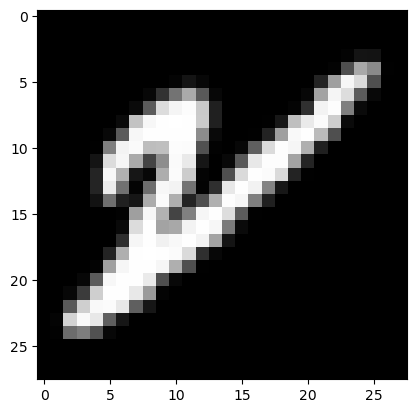

Predicted: 42, True Label: 42


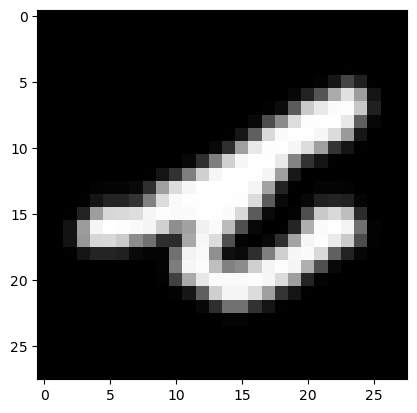

Predicted: 6, True Label: 6


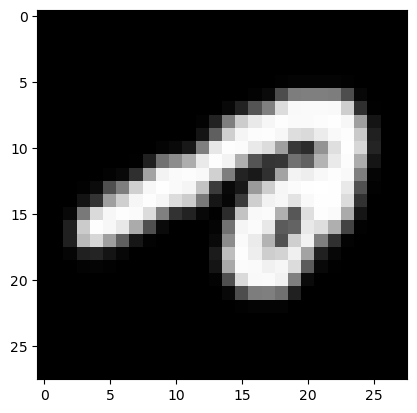

Predicted: 36, True Label: 30


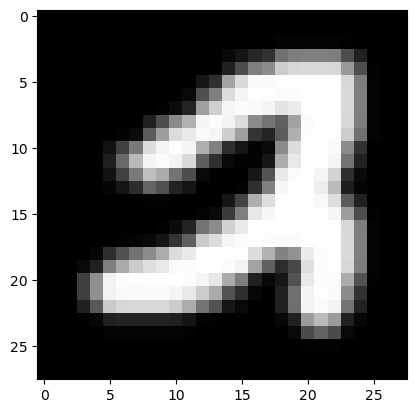

Predicted: 18, True Label: 18


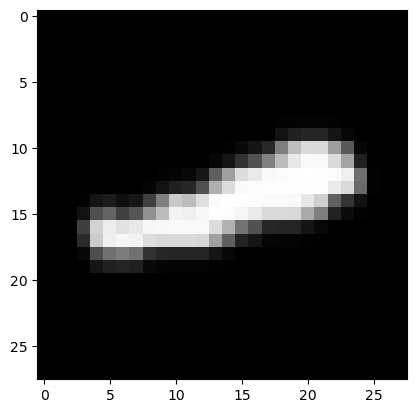

Predicted: 13, True Label: 13


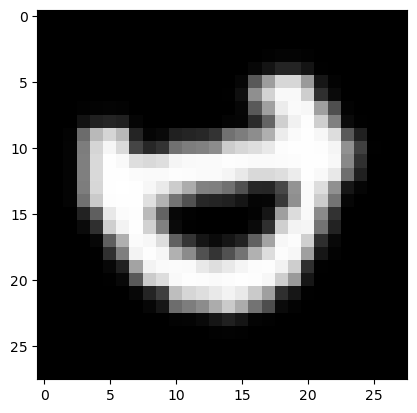

Predicted: 25, True Label: 25


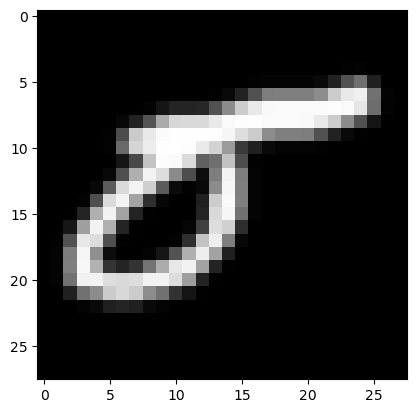

Predicted: 26, True Label: 26


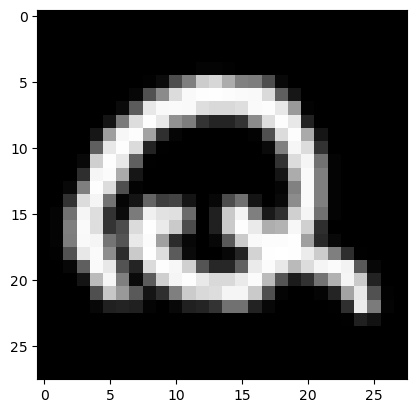

Predicted: 16, True Label: 16


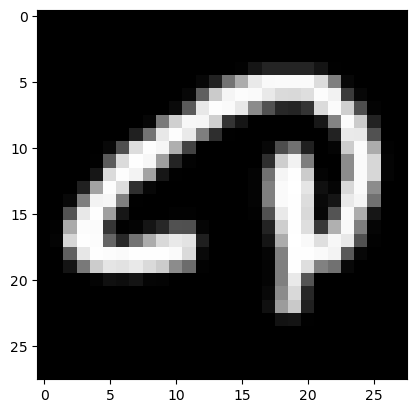

Predicted: 12, True Label: 12


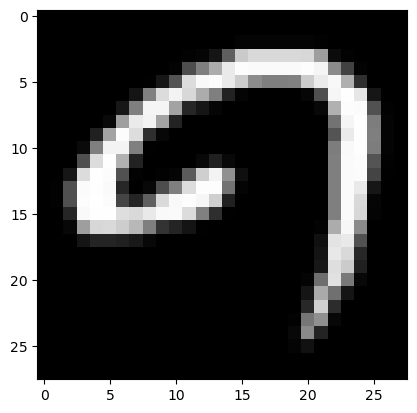

Predicted: 13, True Label: 13


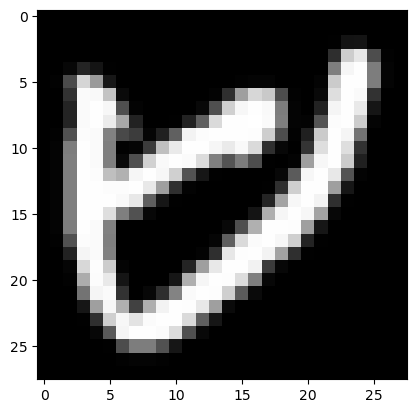

Predicted: 6, True Label: 6


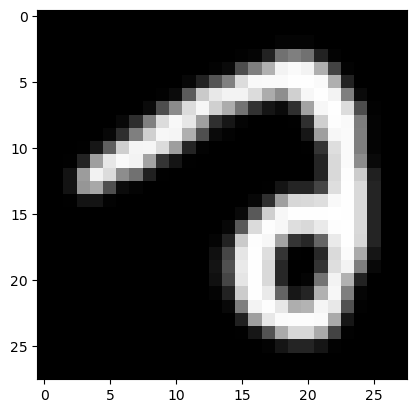

Predicted: 20, True Label: 20


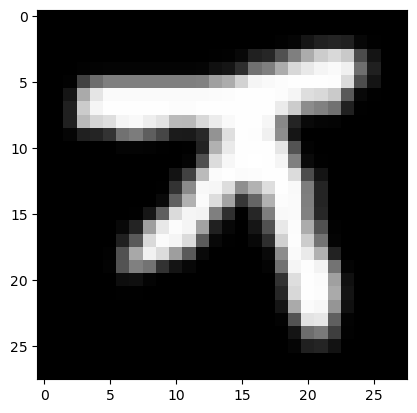

Predicted: 40, True Label: 40


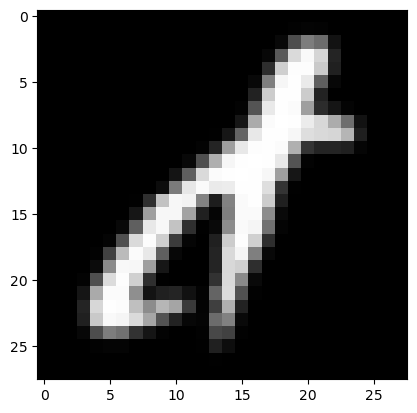

Predicted: 39, True Label: 39


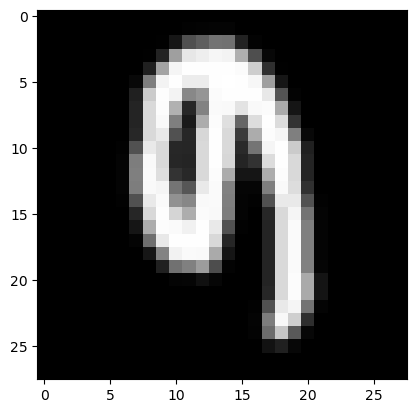

Predicted: 12, True Label: 12


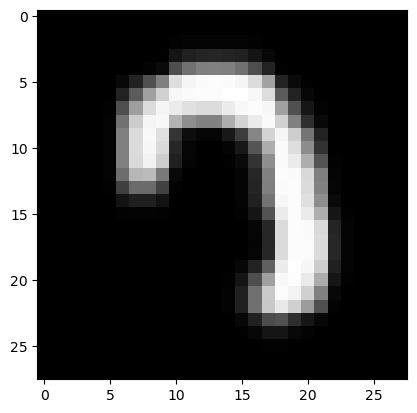

Predicted: 19, True Label: 19


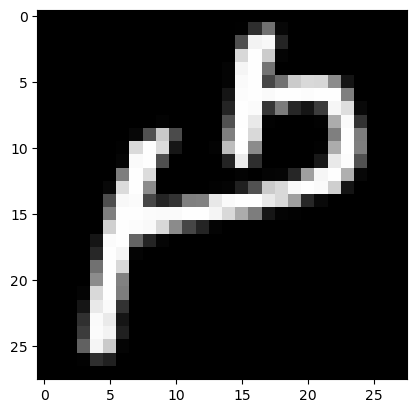

Predicted: 40, True Label: 15


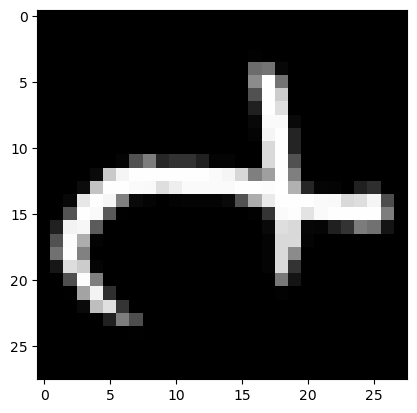

Predicted: 26, True Label: 16


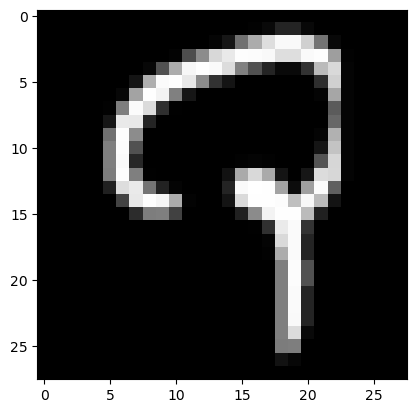

Predicted: 19, True Label: 18


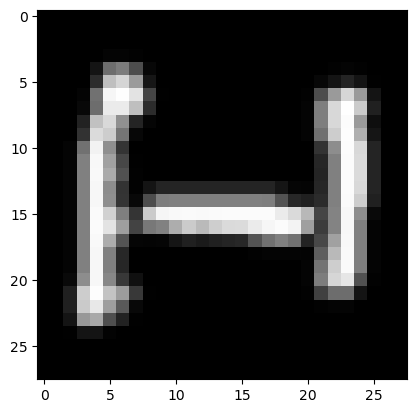

Predicted: 28, True Label: 28


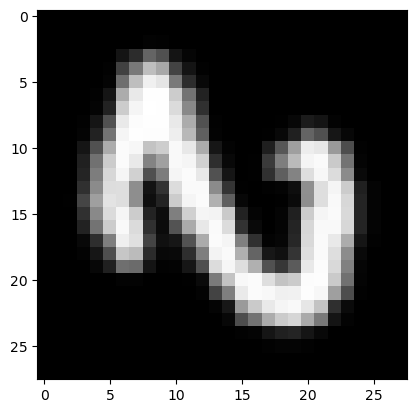

Predicted: 28, True Label: 28


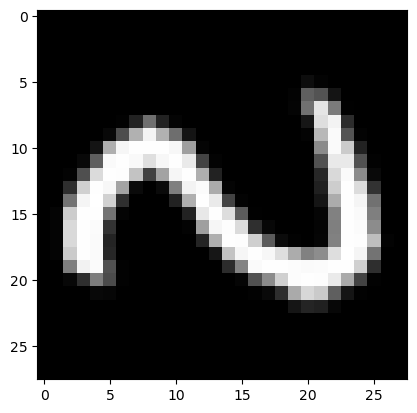

Predicted: 20, True Label: 20


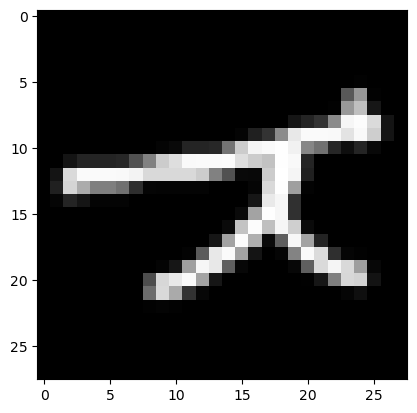

Predicted: 28, True Label: 28


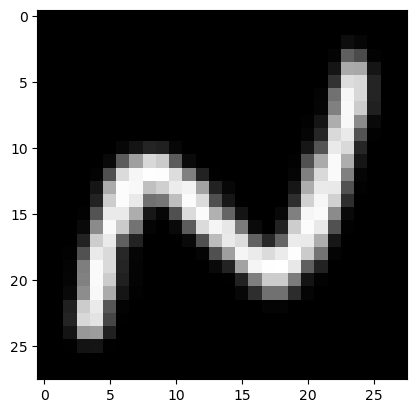

Predicted: 4, True Label: 4


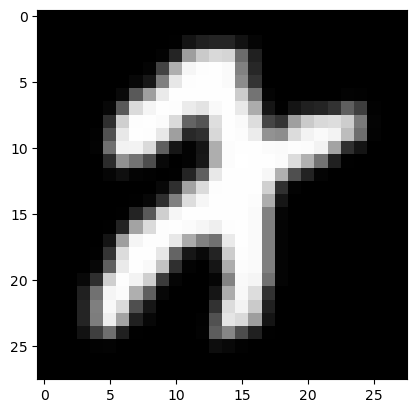

Predicted: 37, True Label: 37


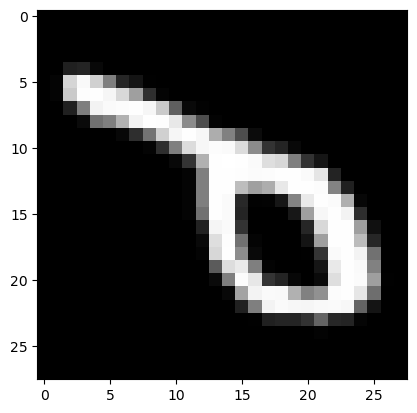

Predicted: 24, True Label: 24


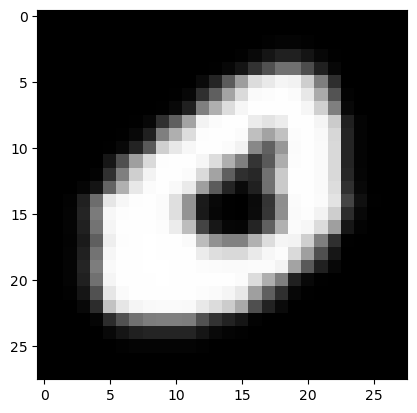

Predicted: 3, True Label: 3


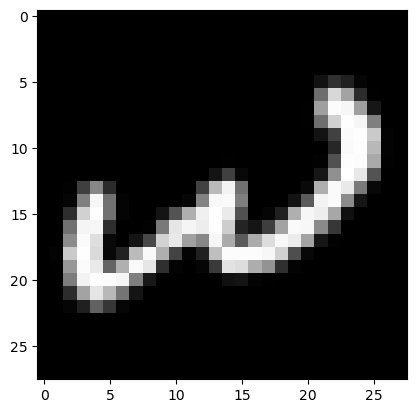

Predicted: 3, True Label: 3


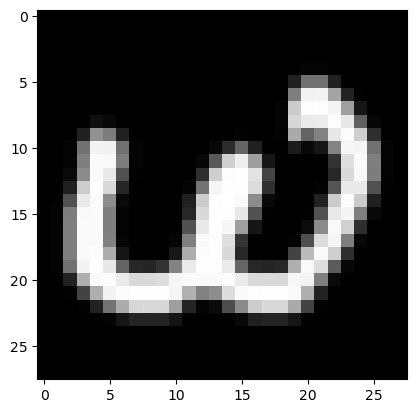

Predicted: 9, True Label: 9


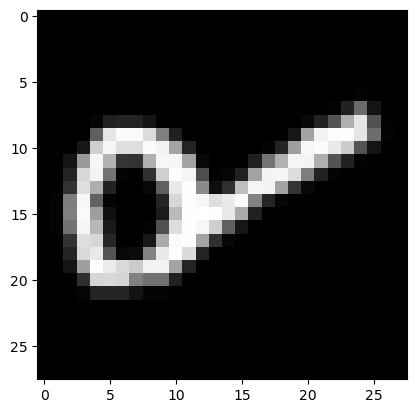

Predicted: 27, True Label: 8


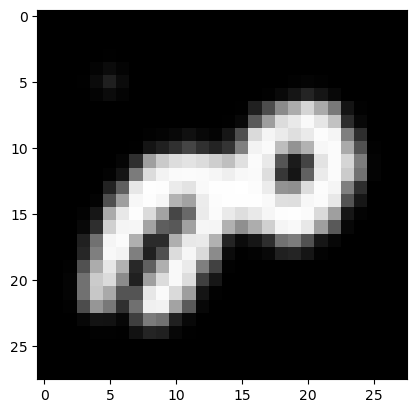

Predicted: 12, True Label: 12


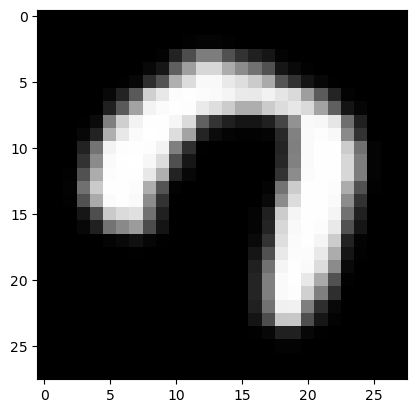

Predicted: 36, True Label: 36


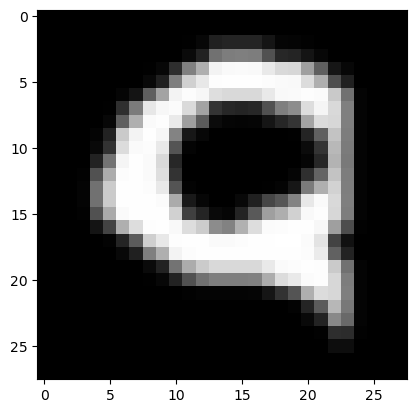

Predicted: 40, True Label: 40


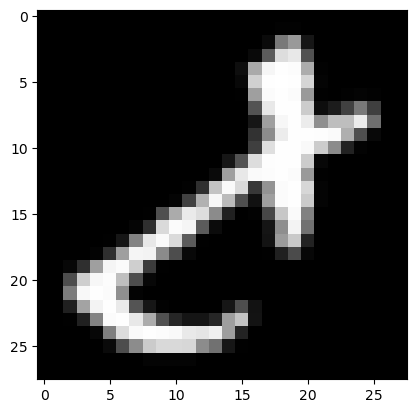

Predicted: 27, True Label: 27


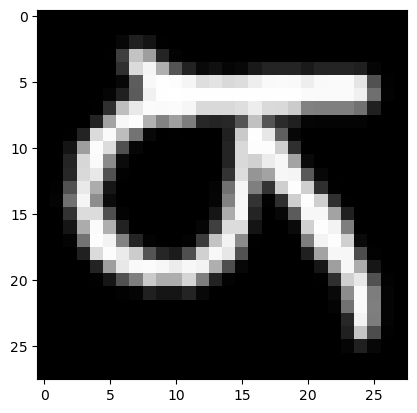

Predicted: 32, True Label: 32


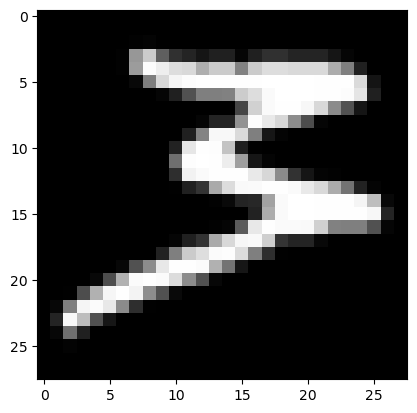

Predicted: 18, True Label: 18


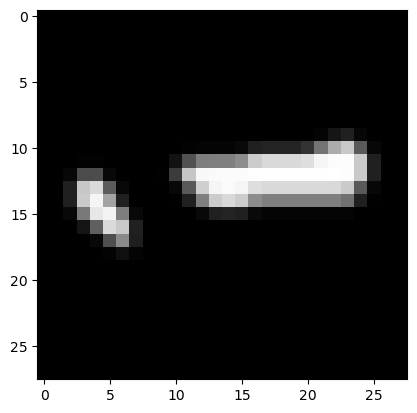

Predicted: 18, True Label: 18


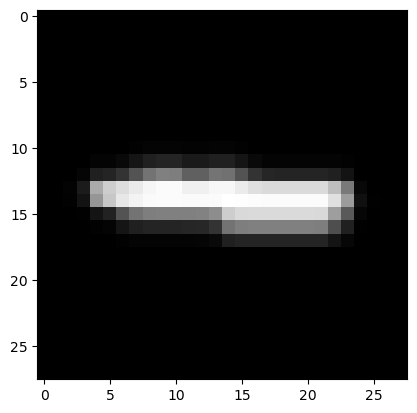

Predicted: 43, True Label: 43


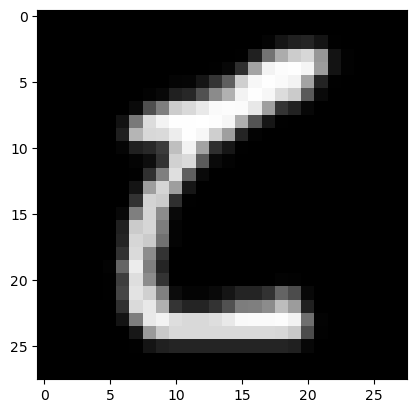

Predicted: 44, True Label: 41


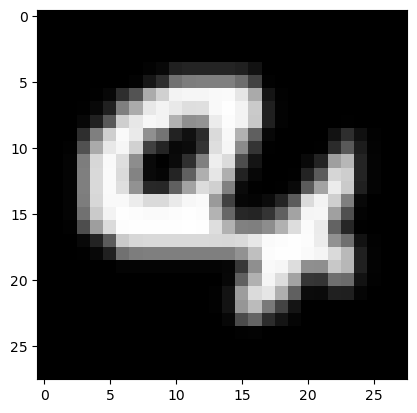

Predicted: 10, True Label: 10


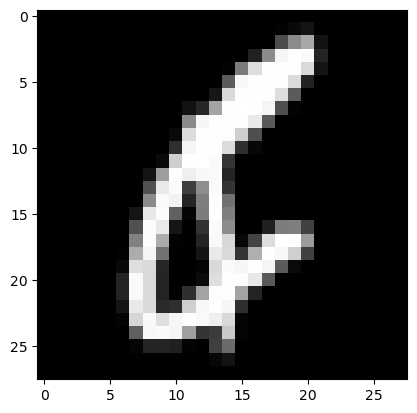

Predicted: 7, True Label: 7


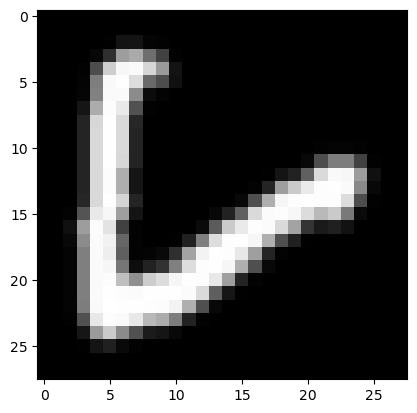

Predicted: 38, True Label: 38


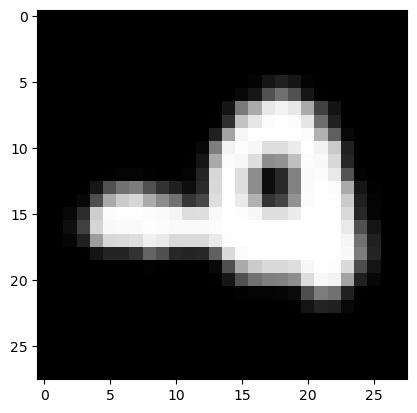

Predicted: 3, True Label: 3


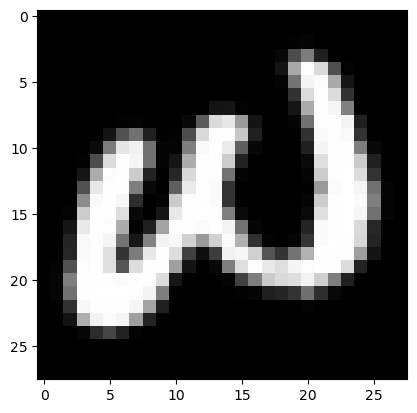

Predicted: 27, True Label: 27


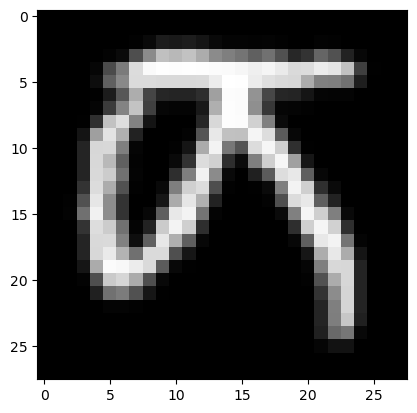

Predicted: 37, True Label: 37


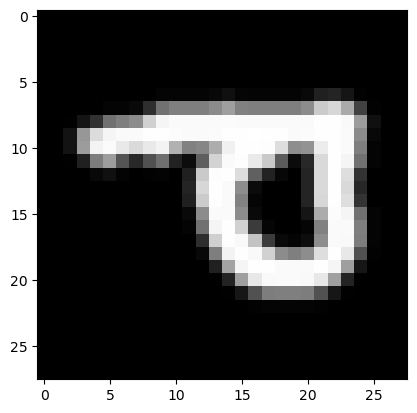

Predicted: 31, True Label: 31


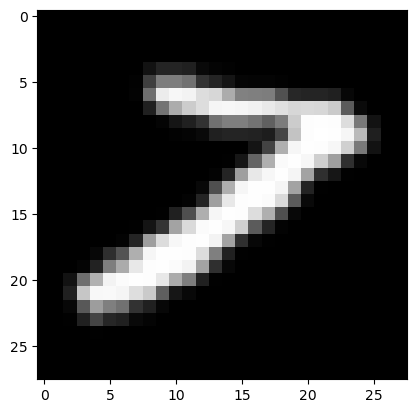

Predicted: 30, True Label: 30


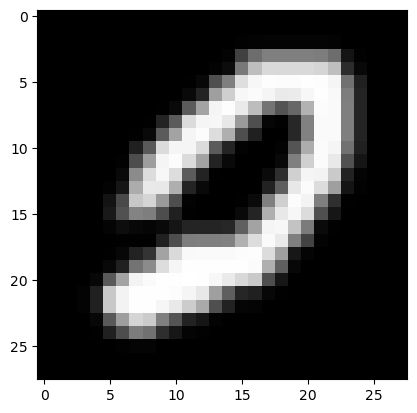

Predicted: 43, True Label: 43


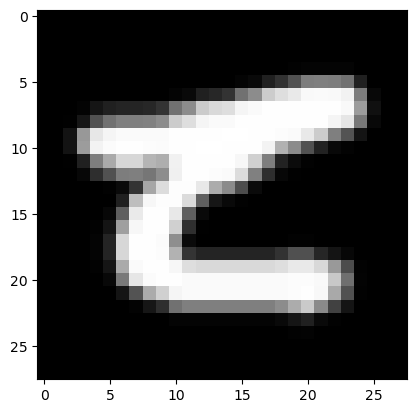

Predicted: 27, True Label: 27


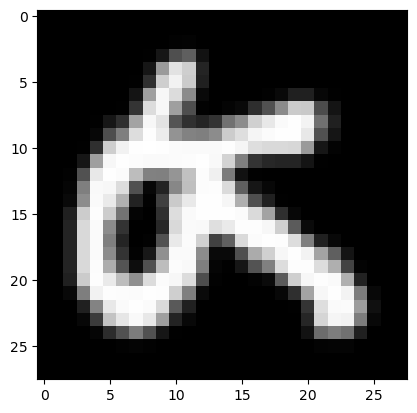

Predicted: 23, True Label: 23


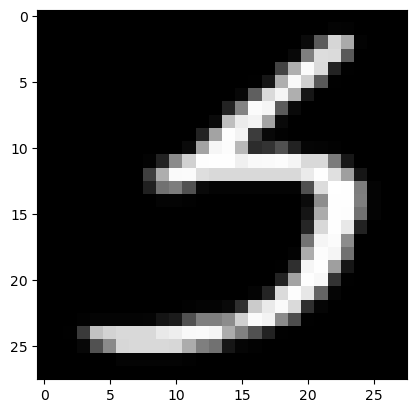

Predicted: 11, True Label: 35


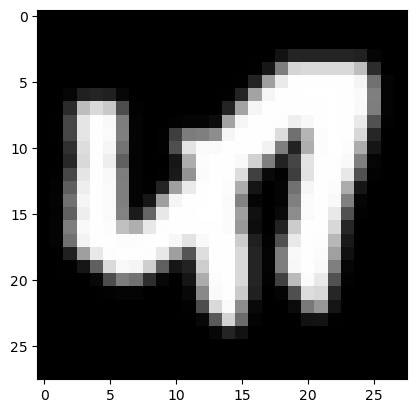

Predicted: 34, True Label: 34


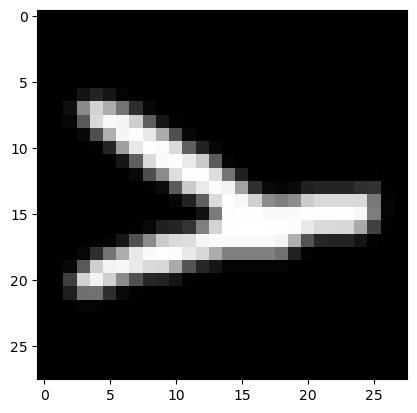

Predicted: 25, True Label: 25


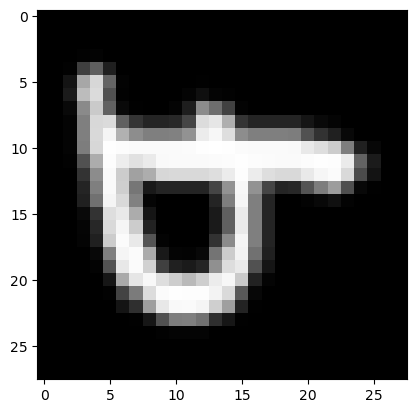

Predicted: 0, True Label: 24


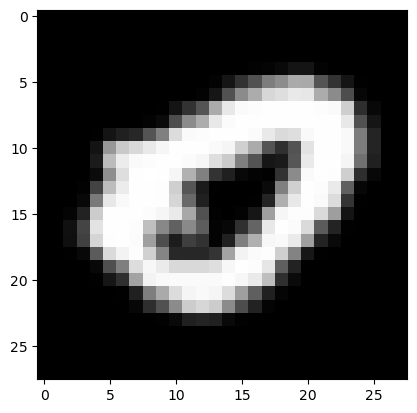

Predicted: 43, True Label: 43


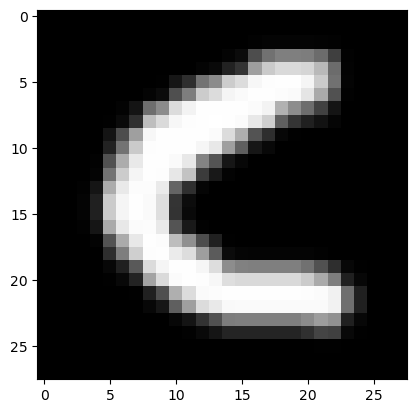

Predicted: 40, True Label: 40


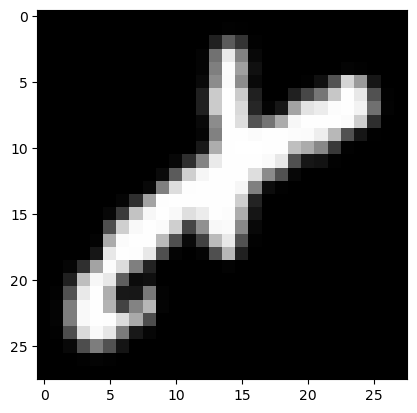

Predicted: 0, True Label: 24


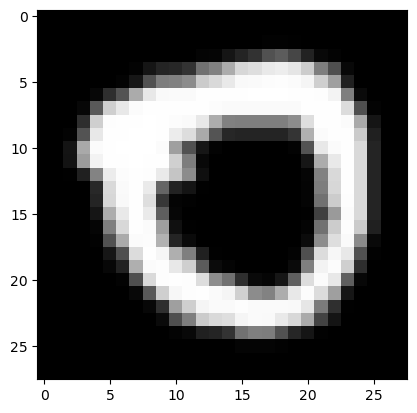

Predicted: 14, True Label: 14


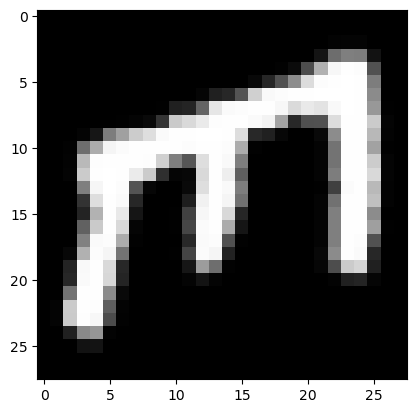

Predicted: 28, True Label: 28


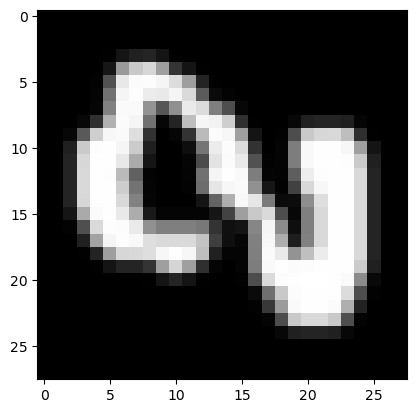

Predicted: 6, True Label: 5


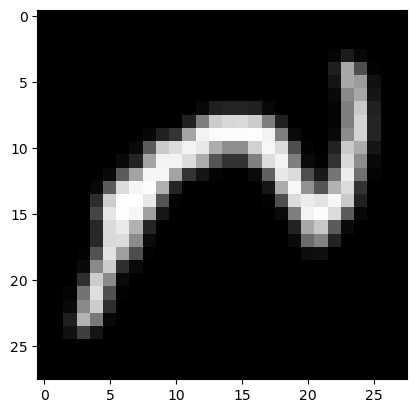

Predicted: 33, True Label: 33


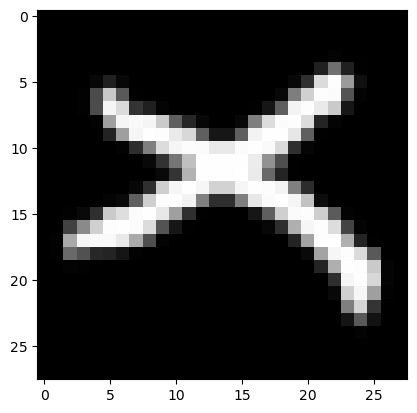

Predicted: 6, True Label: 6


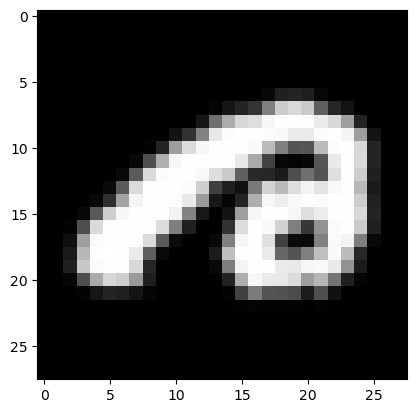

Predicted: 37, True Label: 37


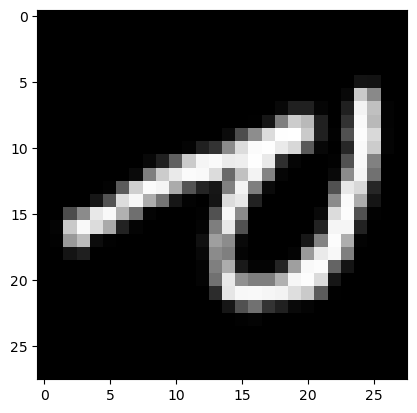

Predicted: 38, True Label: 38


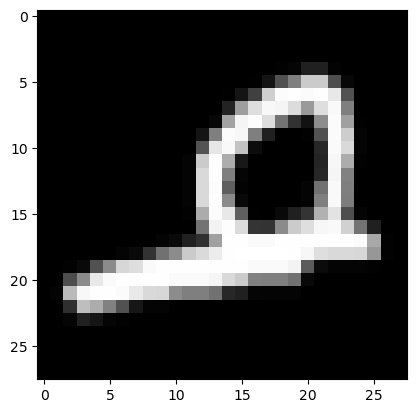

Predicted: 44, True Label: 7


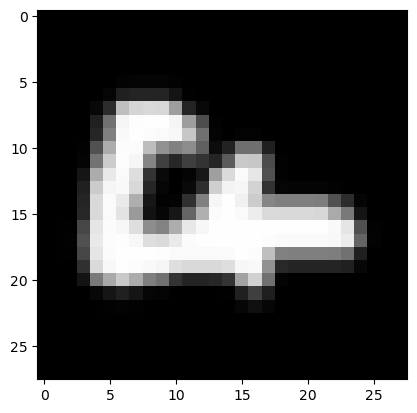

Predicted: 29, True Label: 29


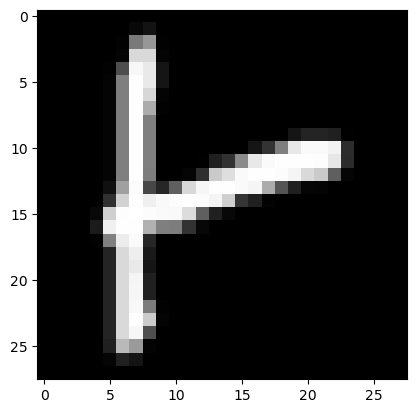

Predicted: 31, True Label: 31


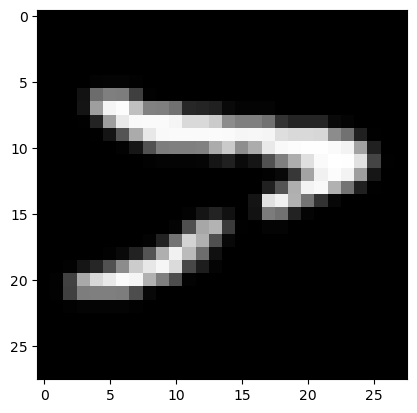

Predicted: 36, True Label: 36


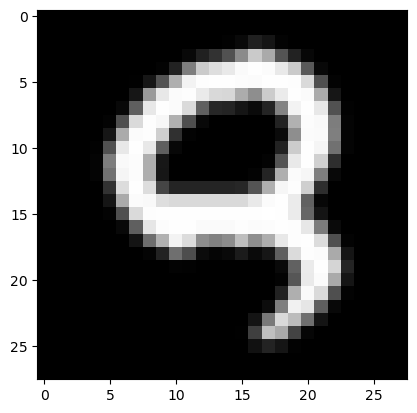

Predicted: 9, True Label: 9


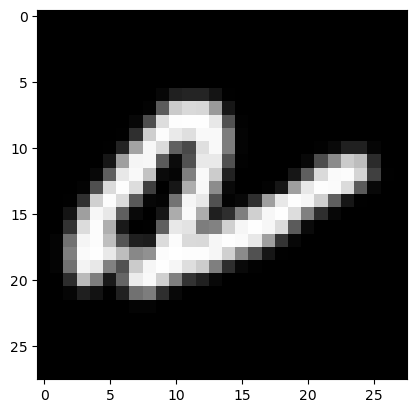

Predicted: 9, True Label: 44


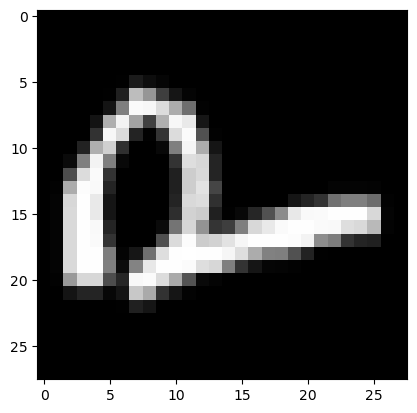

Predicted: 6, True Label: 6


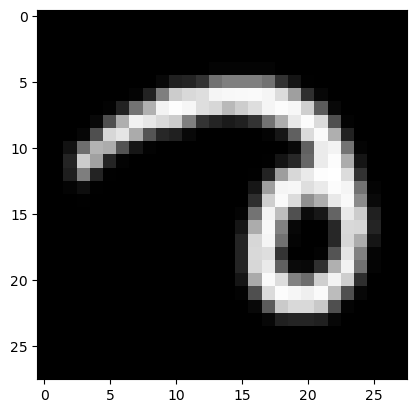

Predicted: 5, True Label: 5


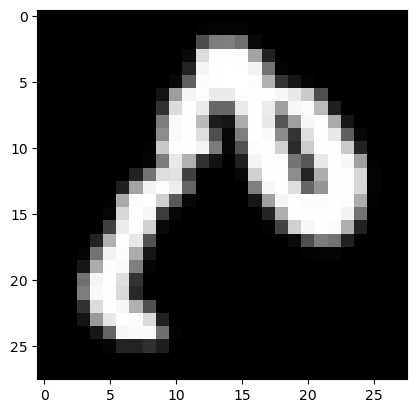

Predicted: 14, True Label: 14


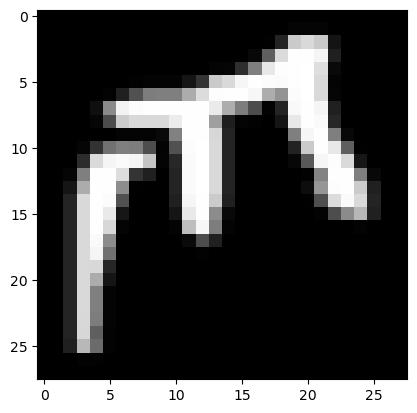

Predicted: 21, True Label: 21


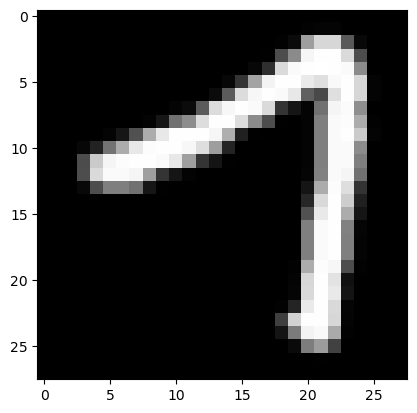

Predicted: 19, True Label: 19


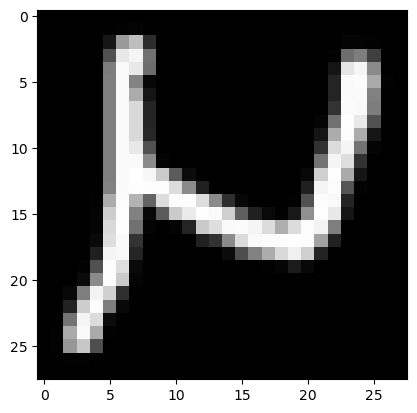

Predicted: 14, True Label: 14


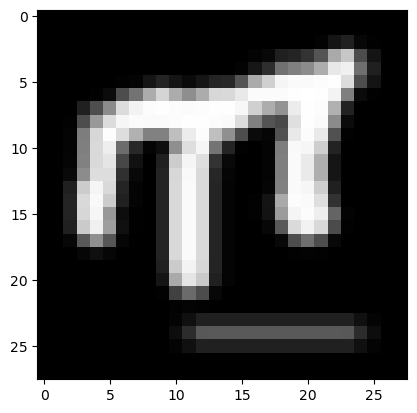

Predicted: 4, True Label: 4


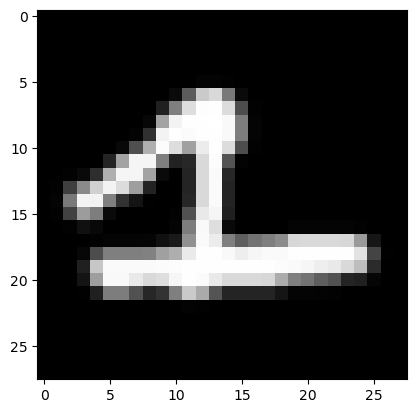

Predicted: 14, True Label: 14


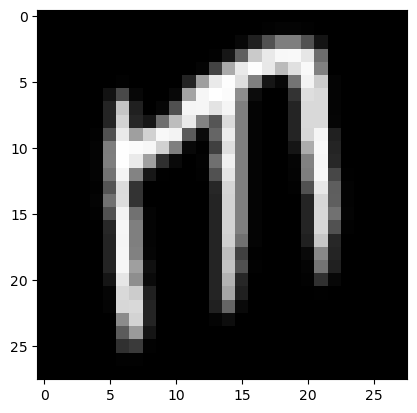

Predicted: 10, True Label: 10


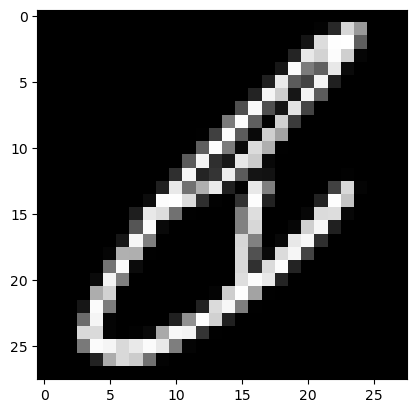

Predicted: 20, True Label: 20


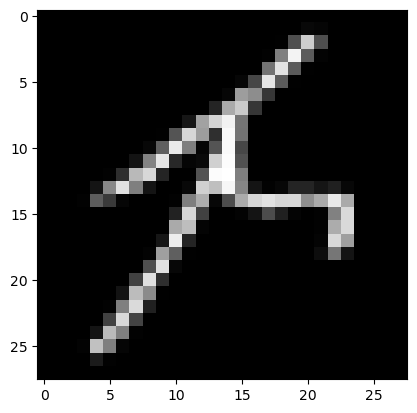

Predicted: 10, True Label: 10


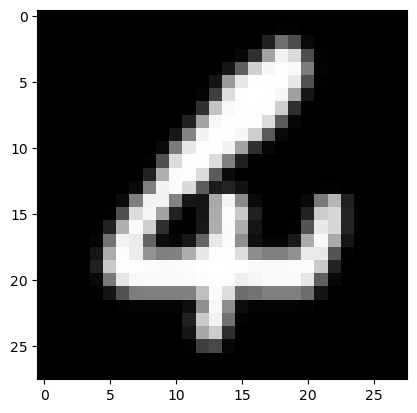

Predicted: 25, True Label: 25


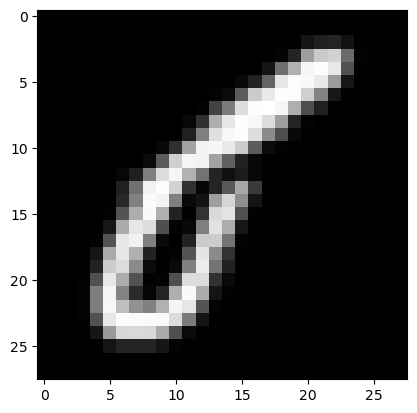

Predicted: 43, True Label: 43


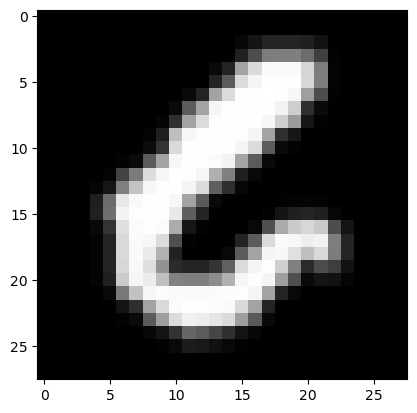

Predicted: 0, True Label: 13


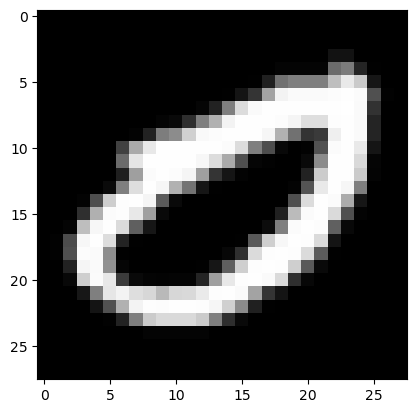

Predicted: 25, True Label: 25


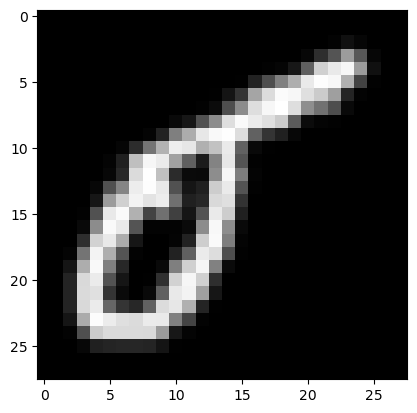

Predicted: 15, True Label: 15


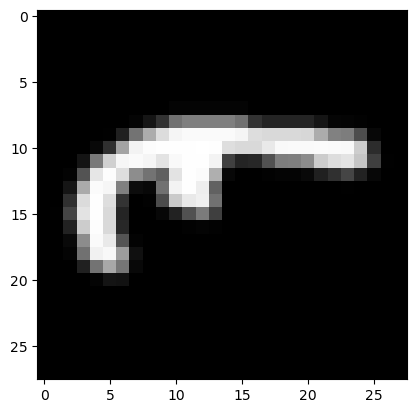

Predicted: 40, True Label: 15


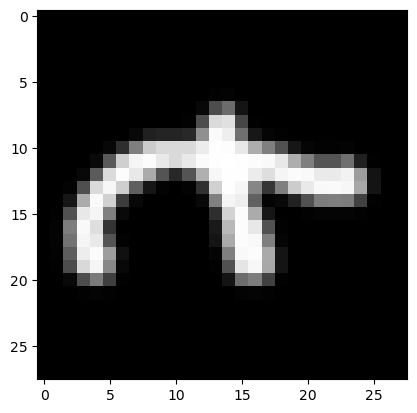

Predicted: 3, True Label: 3


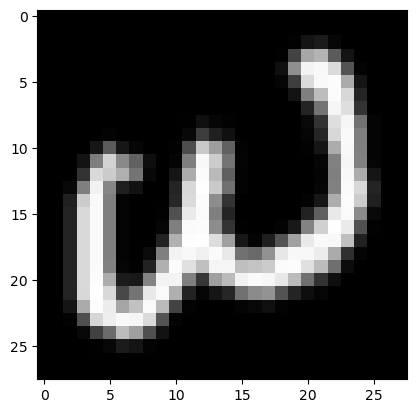

Predicted: 24, True Label: 24


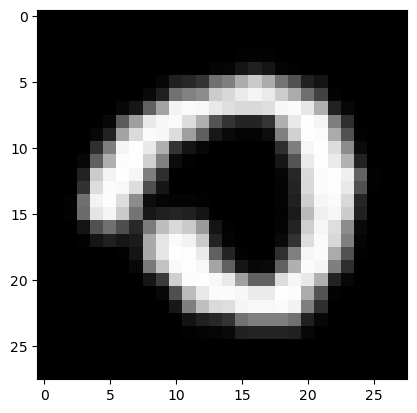

Predicted: 46, True Label: 46


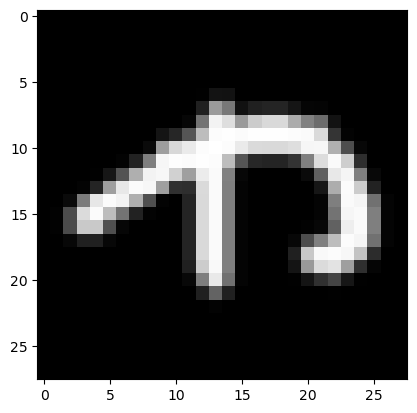

Predicted: 10, True Label: 10


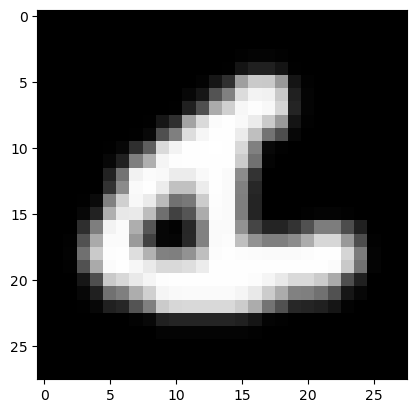

Predicted: 38, True Label: 38


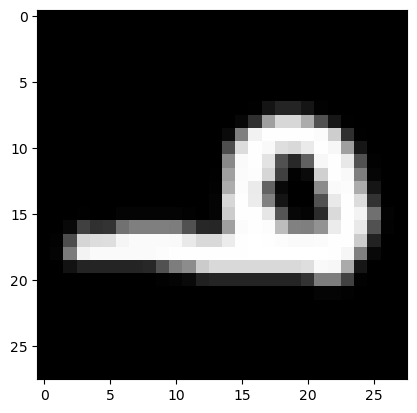

Predicted: 40, True Label: 40


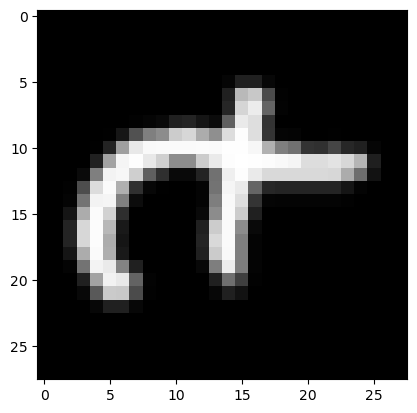

Predicted: 28, True Label: 28


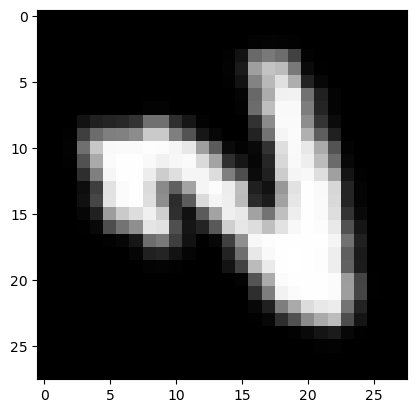

Predicted: 2, True Label: 2


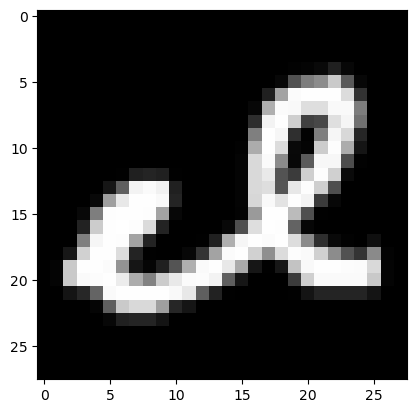

Predicted: 0, True Label: 13


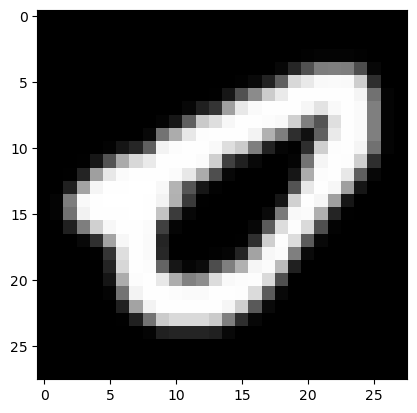

Predicted: 2, True Label: 2


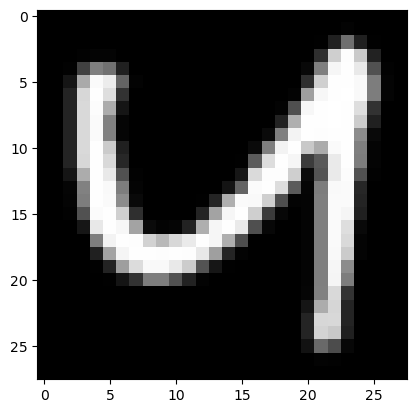

Predicted: 10, True Label: 10


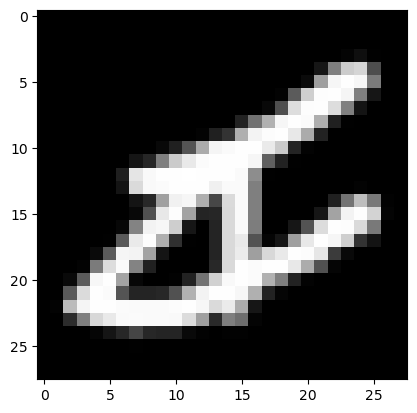

Predicted: 12, True Label: 12


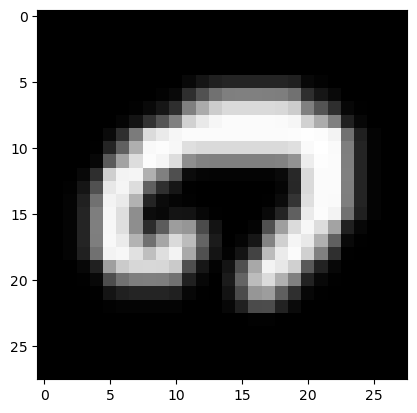

Predicted: 35, True Label: 35


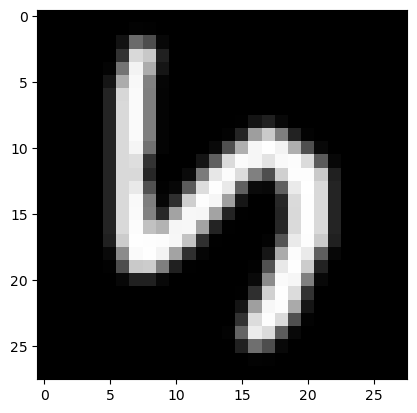

Predicted: 24, True Label: 24


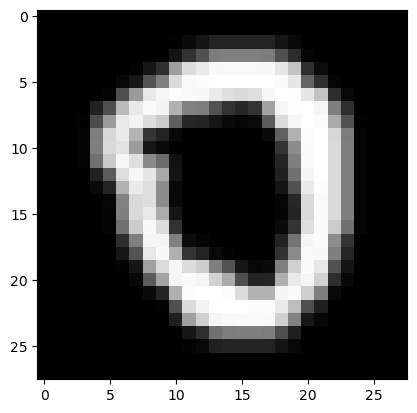

Predicted: 31, True Label: 31


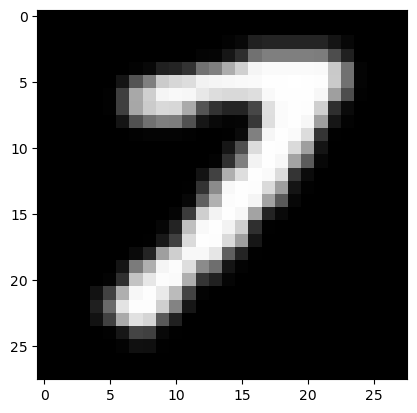

Predicted: 22, True Label: 22


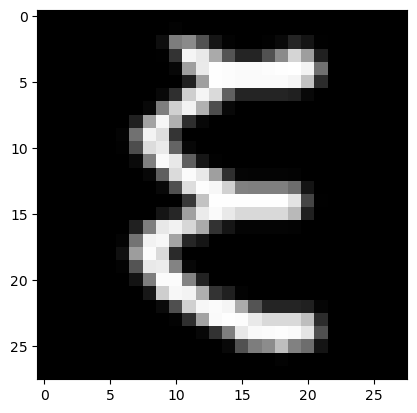

Predicted: 36, True Label: 36


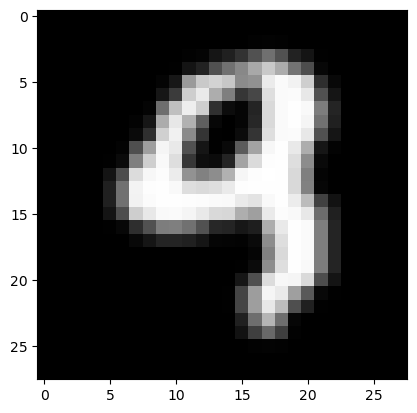

Predicted: 25, True Label: 25


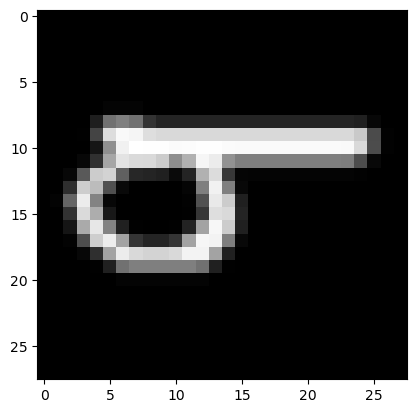

Predicted: 8, True Label: 41


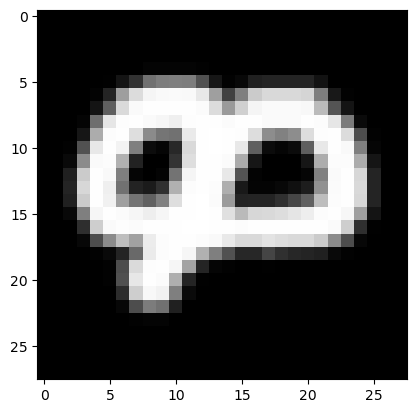

Predicted: 30, True Label: 30


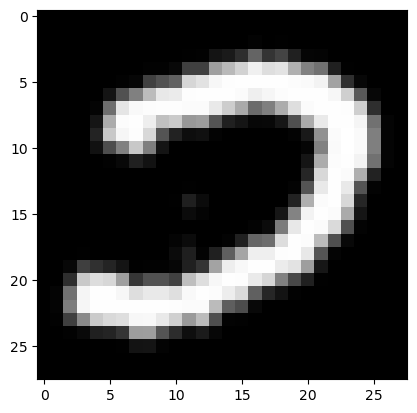

Predicted: 24, True Label: 24


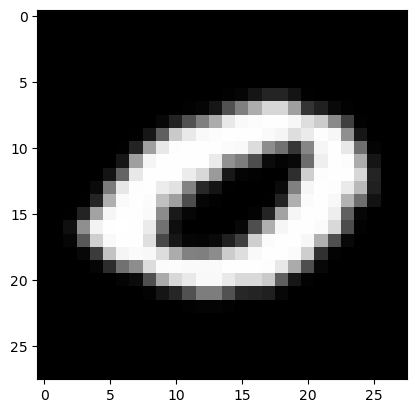

Predicted: 1, True Label: 1


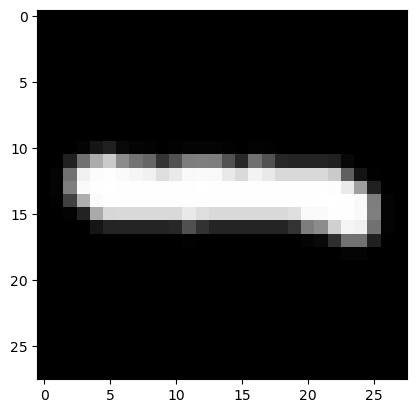

Predicted: 18, True Label: 1


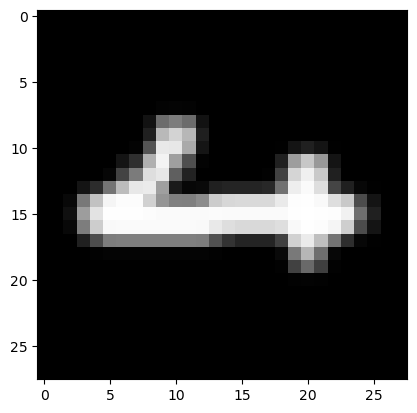

Predicted: 26, True Label: 36


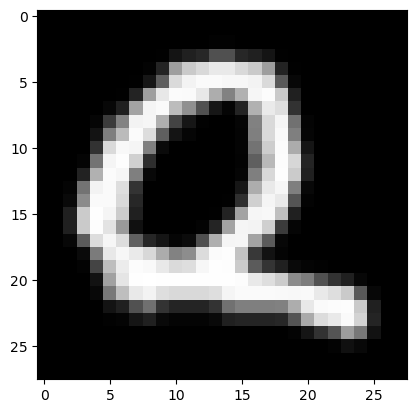

Predicted: 16, True Label: 16


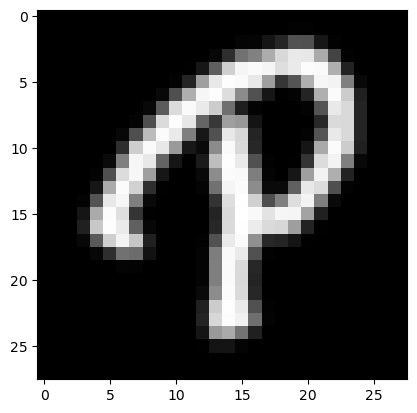

Predicted: 20, True Label: 20


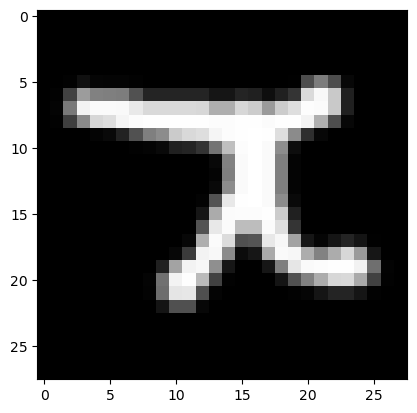

Predicted: 25, True Label: 8


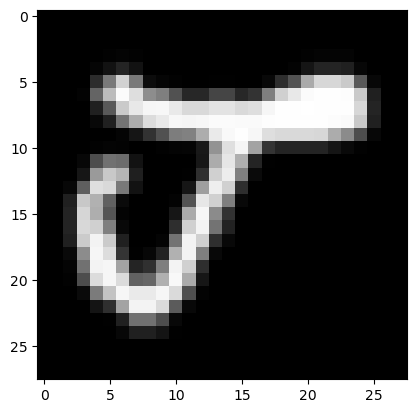

Predicted: 42, True Label: 42


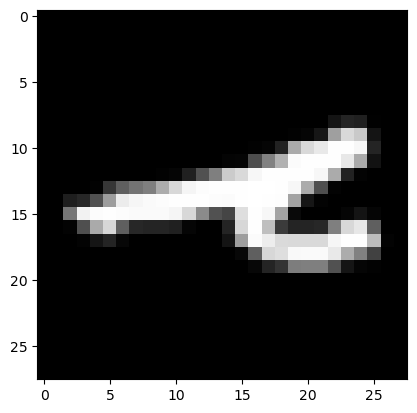

Predicted: 35, True Label: 35


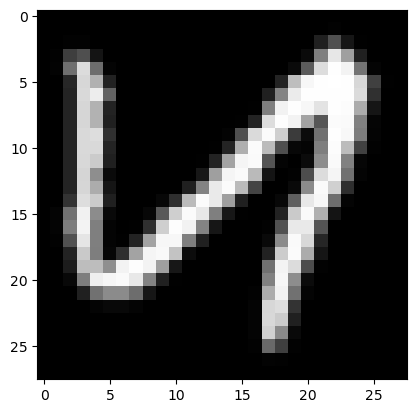

Predicted: 31, True Label: 31


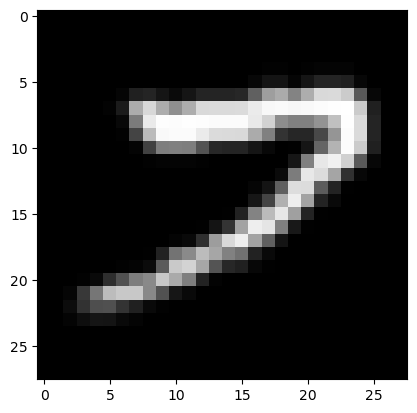

Predicted: 23, True Label: 23


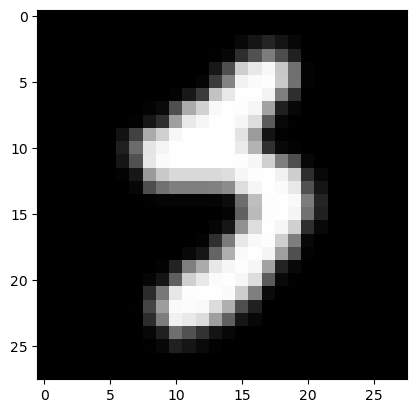

Predicted: 40, True Label: 40


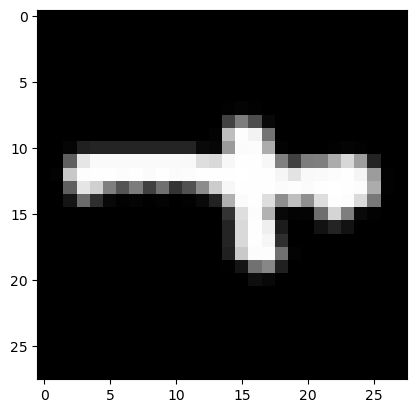

Predicted: 19, True Label: 19


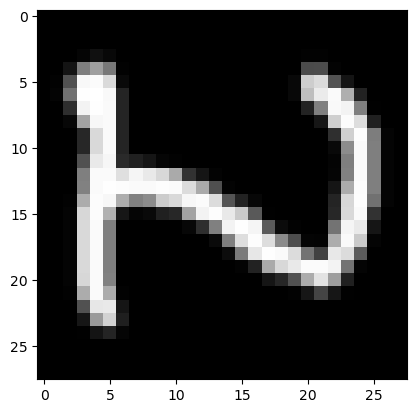

Predicted: 43, True Label: 43


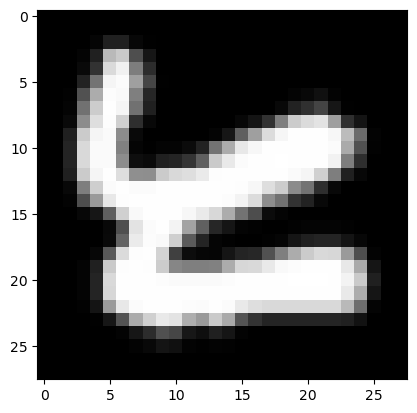

Predicted: 11, True Label: 11


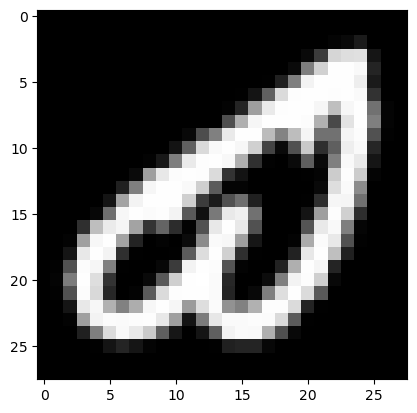

Predicted: 12, True Label: 12


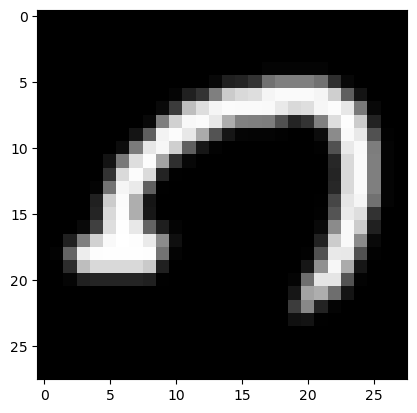

Predicted: 19, True Label: 19


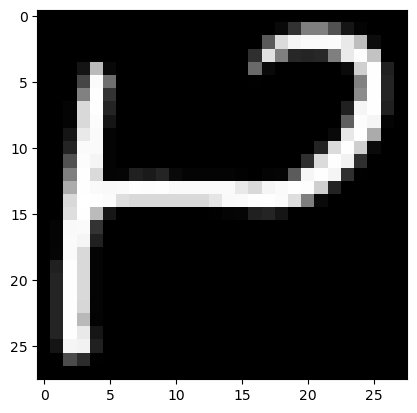

Predicted: 36, True Label: 36


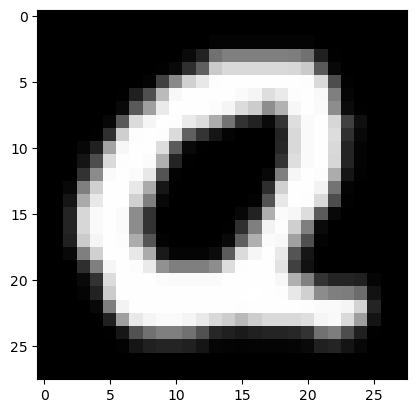

Predicted: 25, True Label: 40


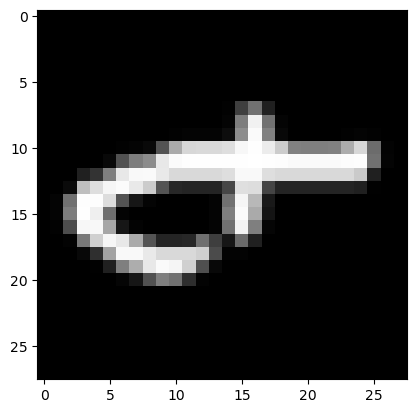

Predicted: 35, True Label: 35


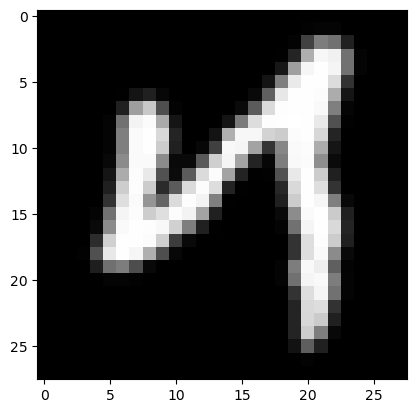

Predicted: 1, True Label: 1


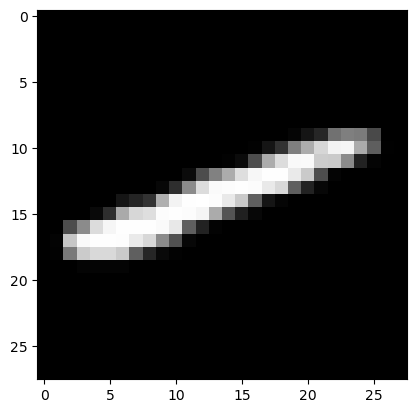

Predicted: 10, True Label: 10


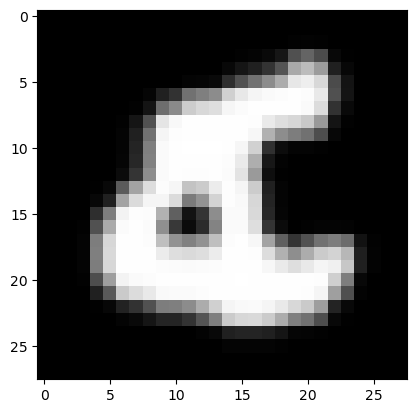

Predicted: 38, True Label: 38


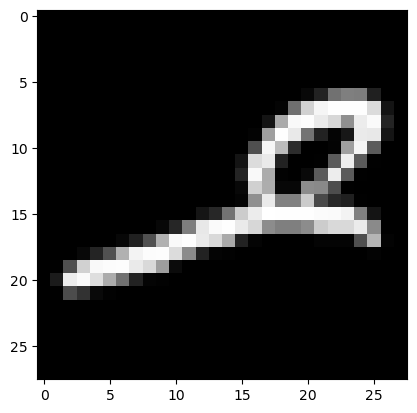

Predicted: 23, True Label: 23


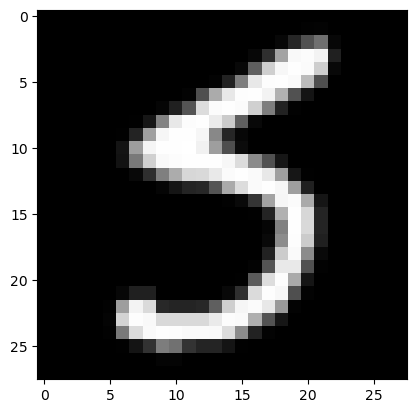

Predicted: 6, True Label: 6


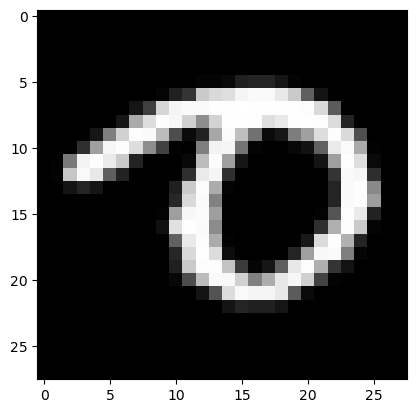

Predicted: 1, True Label: 18


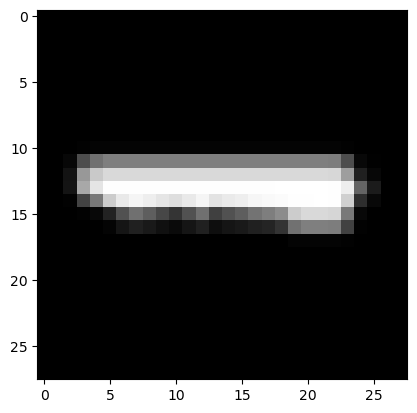

Predicted: 30, True Label: 30


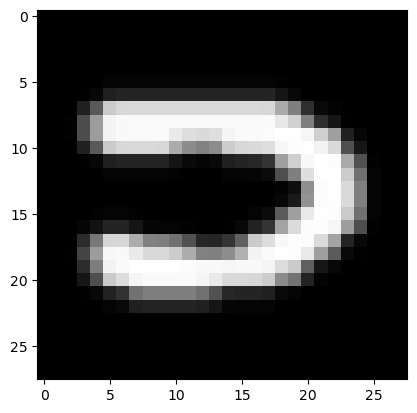

Predicted: 22, True Label: 22


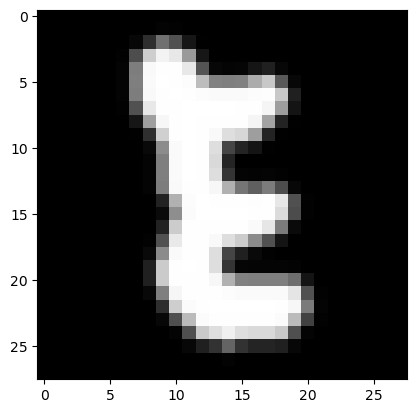

Predicted: 38, True Label: 38


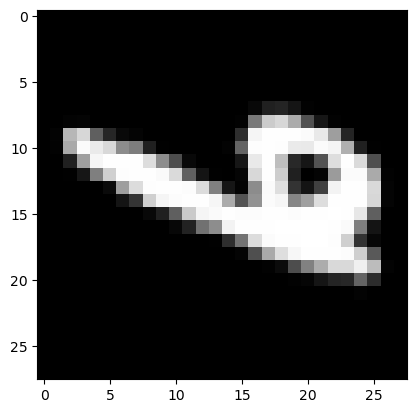

Predicted: 35, True Label: 35


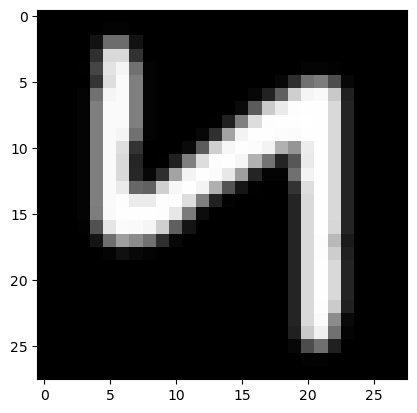

Predicted: 38, True Label: 38


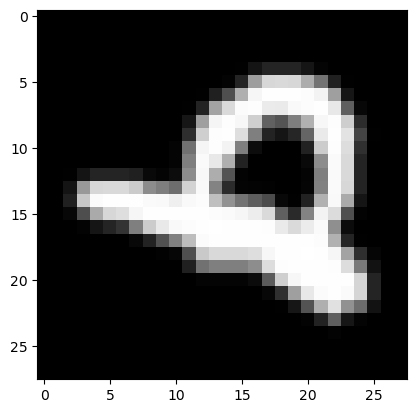

Predicted: 43, True Label: 45


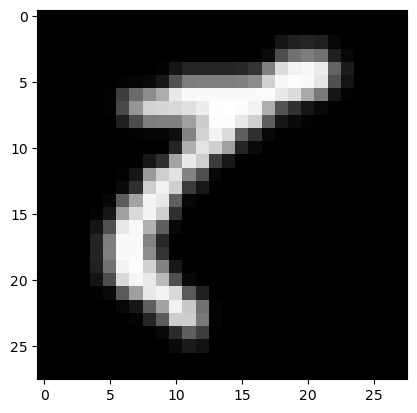

Predicted: 21, True Label: 21


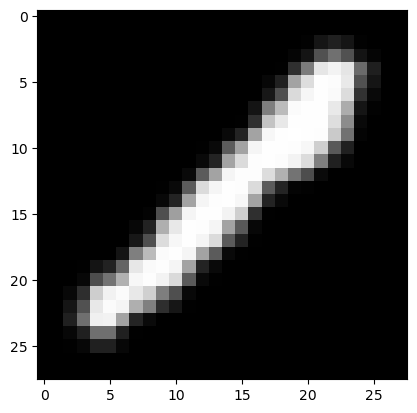

Predicted: 21, True Label: 21


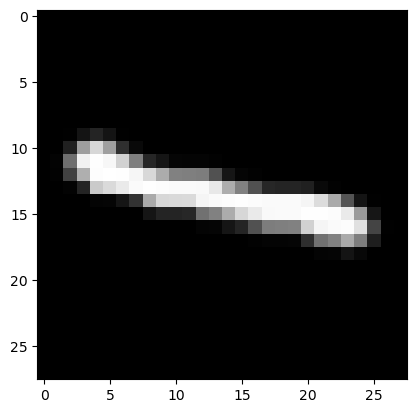

Predicted: 10, True Label: 17


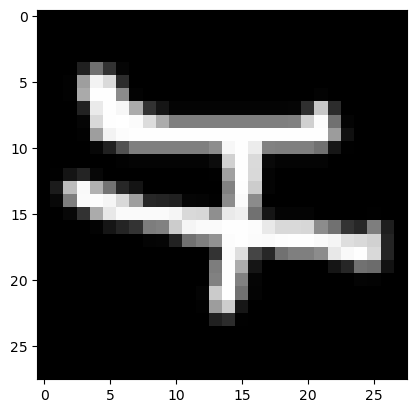

Predicted: 15, True Label: 15


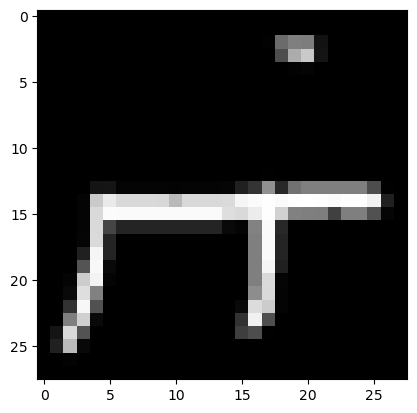

Predicted: 23, True Label: 23


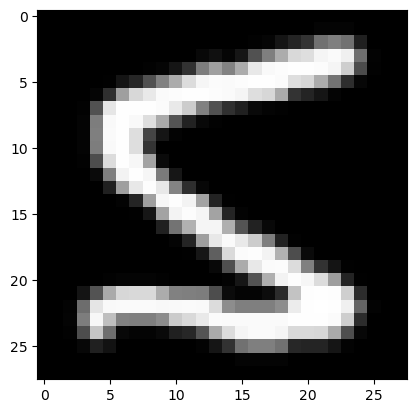

Predicted: 2, True Label: 35


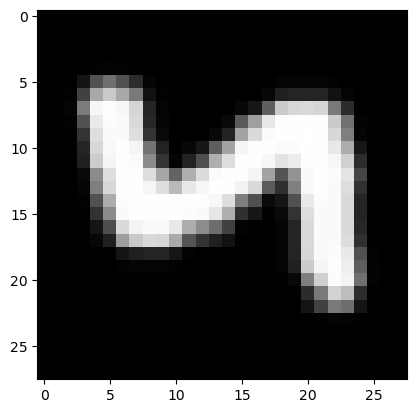

Predicted: 35, True Label: 35


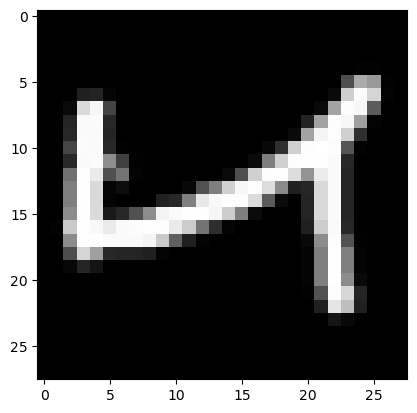

Predicted: 4, True Label: 4


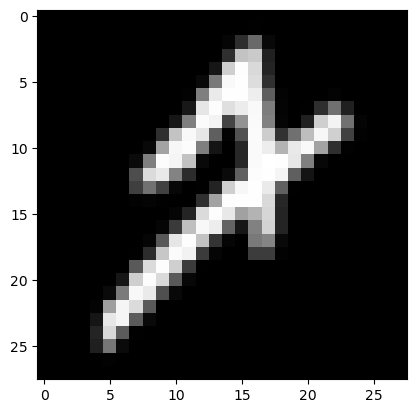

Predicted: 23, True Label: 22


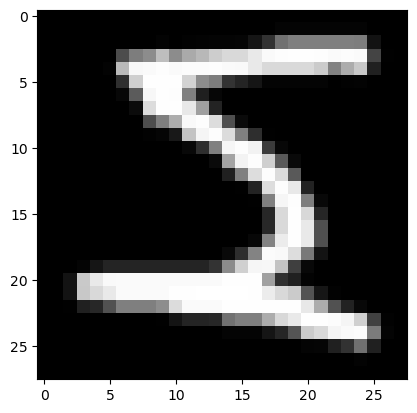

Predicted: 17, True Label: 17


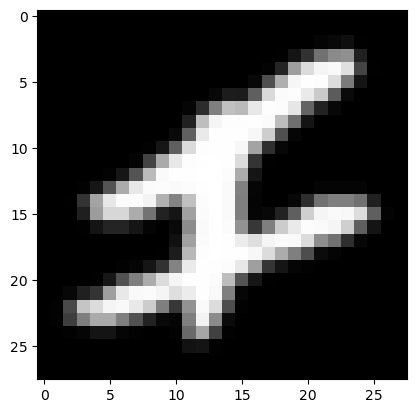

Predicted: 38, True Label: 38


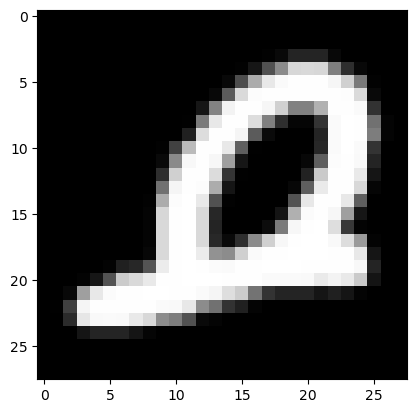

Predicted: 40, True Label: 40


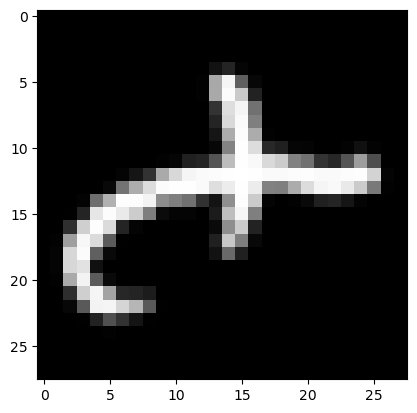

Predicted: 19, True Label: 19


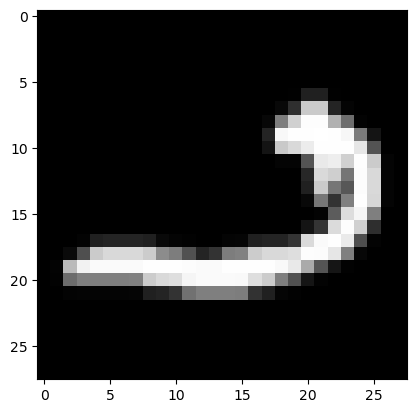

Predicted: 26, True Label: 26


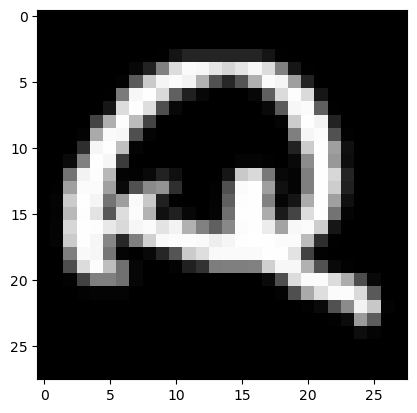

Predicted: 2, True Label: 2


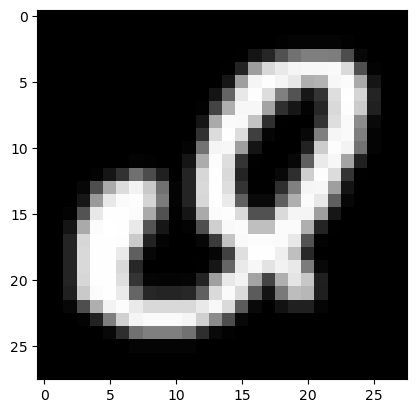

Predicted: 20, True Label: 42


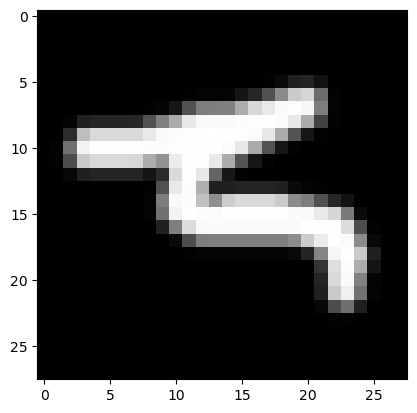

Predicted: 9, True Label: 44


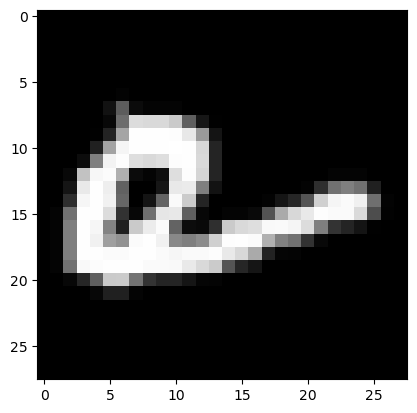

Predicted: 17, True Label: 17


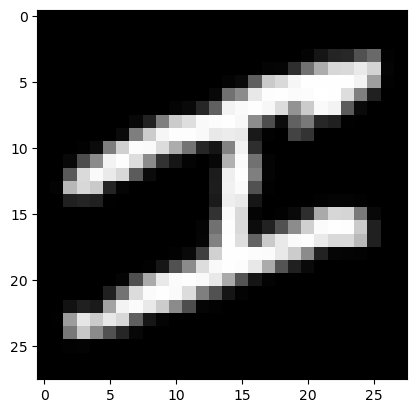

Predicted: 32, True Label: 32


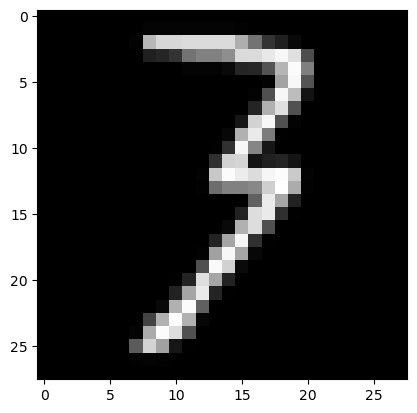

Predicted: 14, True Label: 14


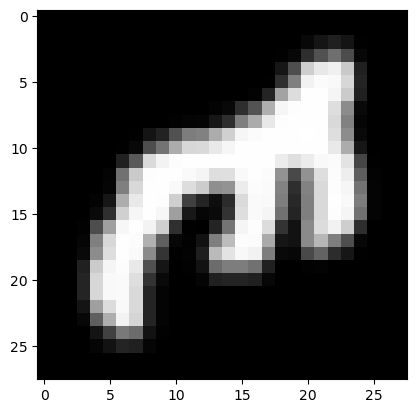

Predicted: 23, True Label: 22


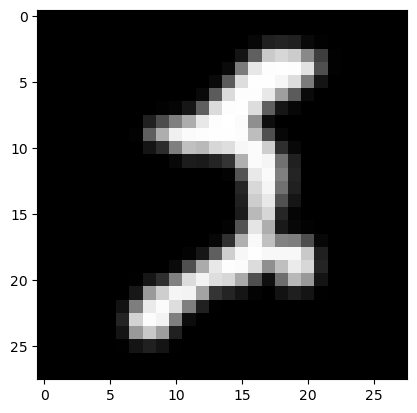

Predicted: 17, True Label: 17


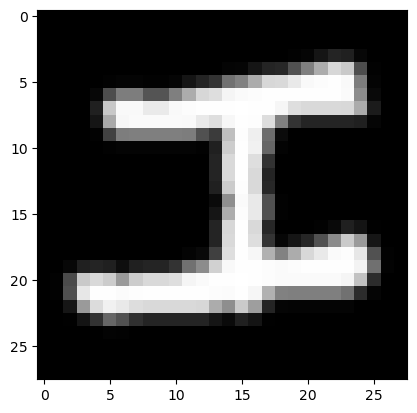

Predicted: 43, True Label: 43


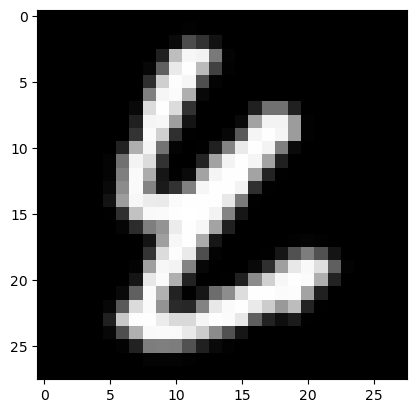

Predicted: 20, True Label: 17


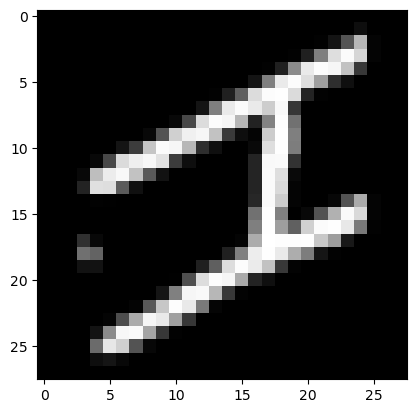

Predicted: 45, True Label: 45


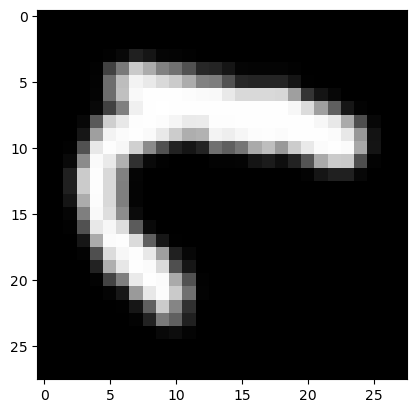

Predicted: 40, True Label: 15


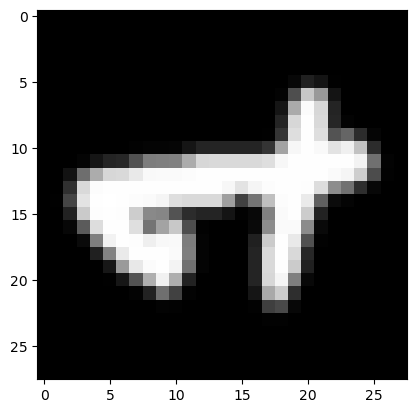

Predicted: 12, True Label: 12


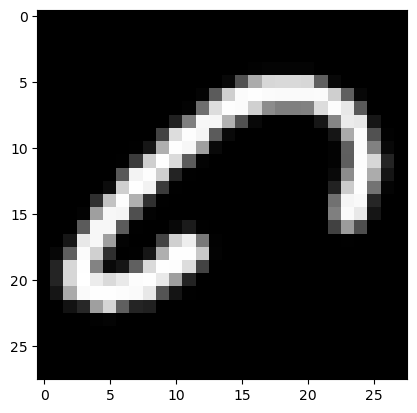

Predicted: 0, True Label: 0


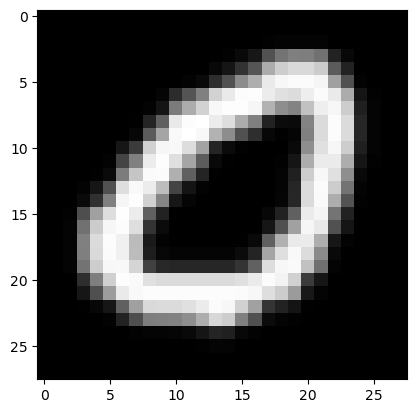

Predicted: 26, True Label: 26


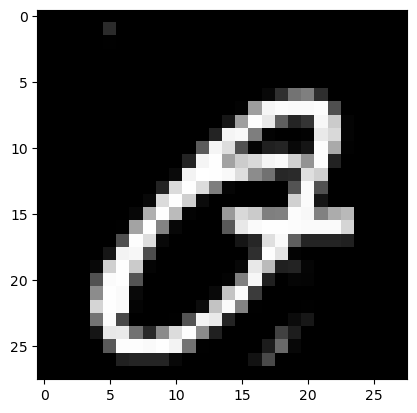

Predicted: 9, True Label: 44


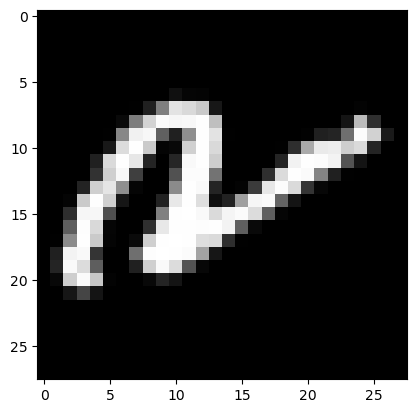

Predicted: 3, True Label: 3


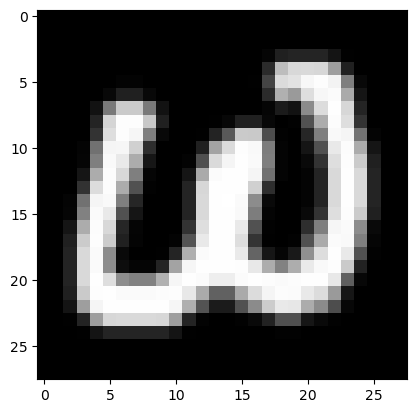

Predicted: 28, True Label: 28


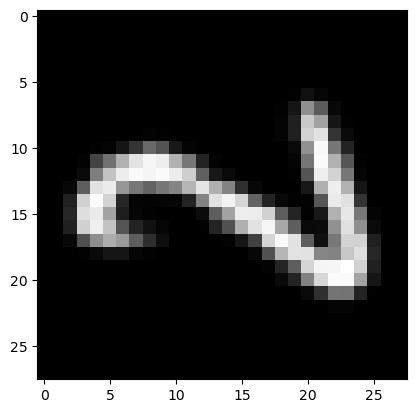

Predicted: 9, True Label: 44


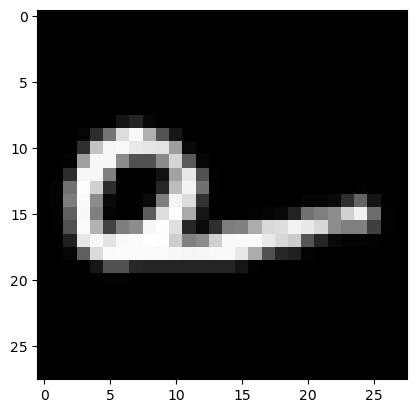

Predicted: 33, True Label: 33


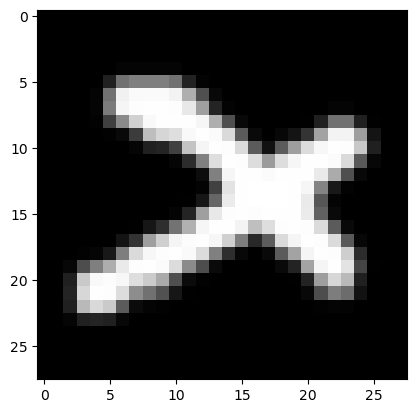

Predicted: 1, True Label: 1


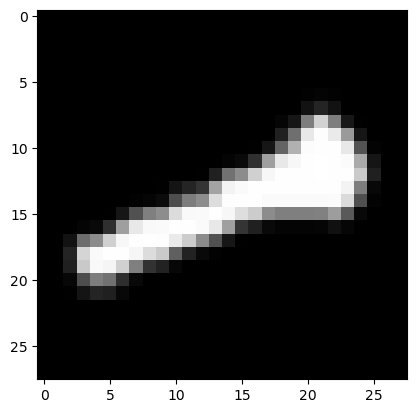

Predicted: 36, True Label: 36


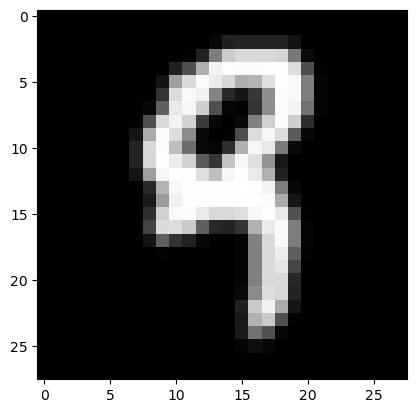

Predicted: 30, True Label: 30


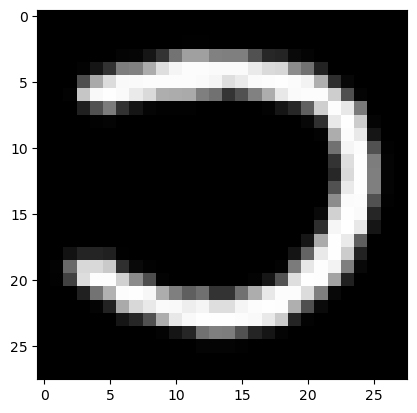

Predicted: 10, True Label: 10


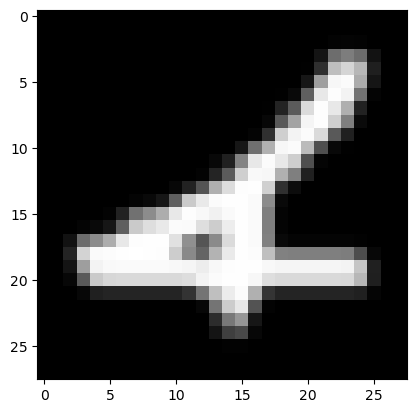

Predicted: 15, True Label: 40


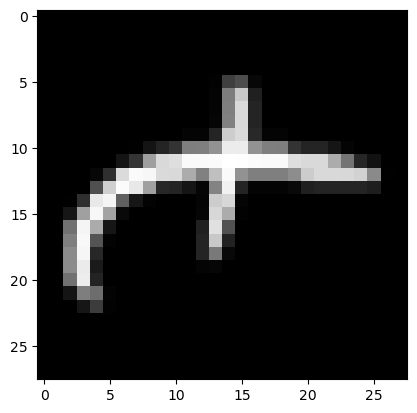

Predicted: 43, True Label: 43


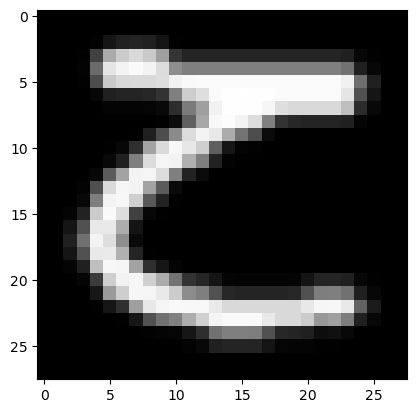

Predicted: 32, True Label: 32


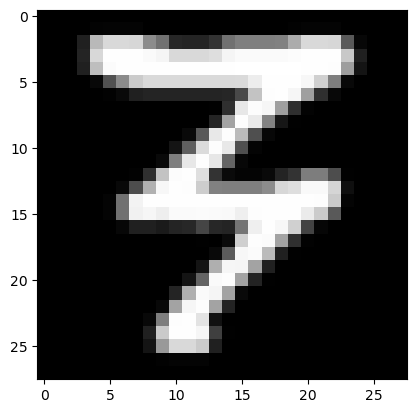

Predicted: 13, True Label: 13


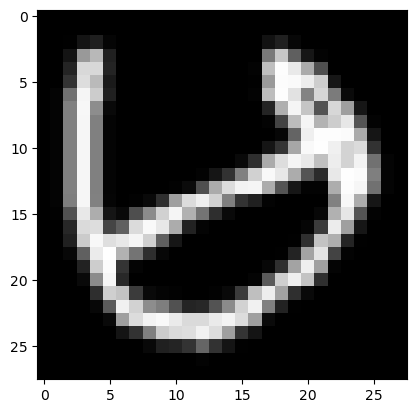

Predicted: 40, True Label: 46


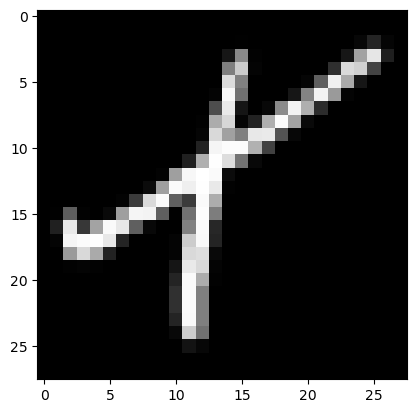

Predicted: 25, True Label: 25


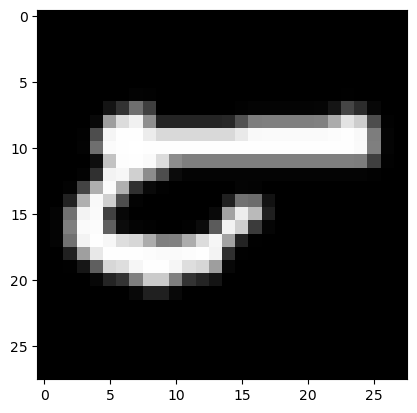

Predicted: 14, True Label: 14


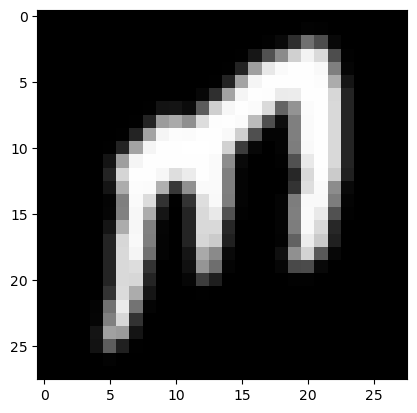

Predicted: 45, True Label: 45


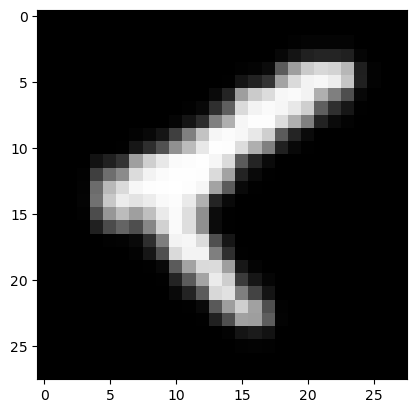

Predicted: 39, True Label: 39


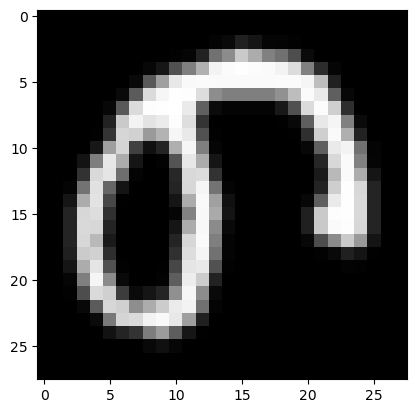

Predicted: 37, True Label: 37


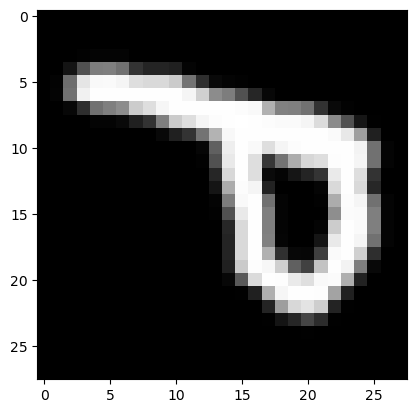

Predicted: 3, True Label: 3


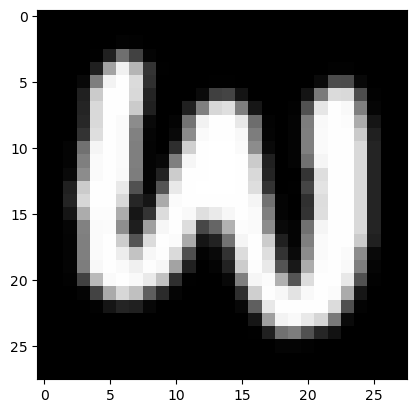

Predicted: 33, True Label: 37


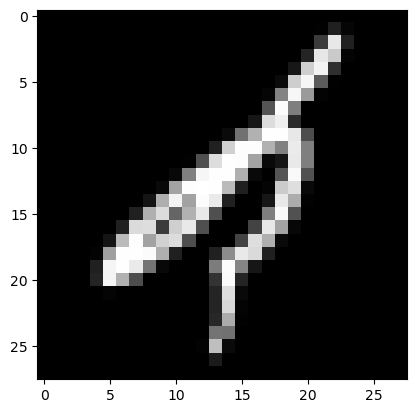

Predicted: 28, True Label: 5


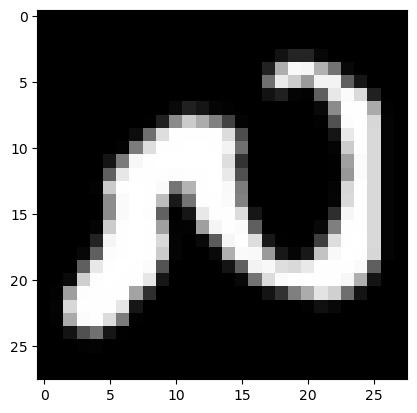

Predicted: 46, True Label: 46


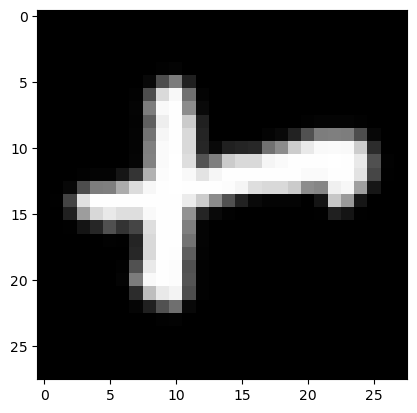

Predicted: 0, True Label: 24


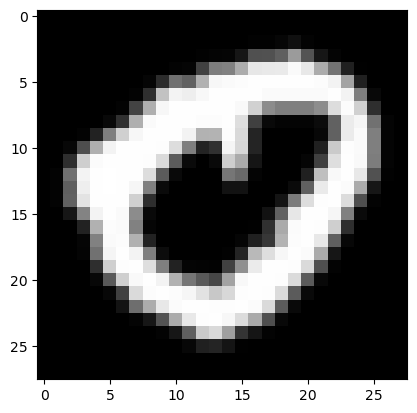

In [91]:
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = mlp_model(images)

        # Get the predicted classes
        _, predicted = torch.max(outputs.data, 1)

        # Print the top 5 predictions along with the true labels
        for i in range(5):
            print(f"Predicted: {predicted[i]}, True Label: {labels[i]}")
            plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
            plt.show()

#### 3. Plot the confusion matrix of two models – MLP and CNNs


In [63]:
# get true labels
true_labels = []
for _, label in test_loader:
    true_labels += label.tolist()

In [64]:
# make predictions using MLP model
mlp_predictions = []
mlp_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = mlp_model(images)
        _, predicted = torch.max(outputs.data, 1)
        mlp_predictions += predicted.tolist()
# create confusion matrices
mlp_cm = confusion_matrix(true_labels, mlp_predictions)

In [65]:
# make predictions using CNN model
cnn_predictions = []
cnn_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        cnn_predictions += predicted.tolist()
        
# create confusion matrices
cnn_cm = confusion_matrix(true_labels, cnn_predictions)

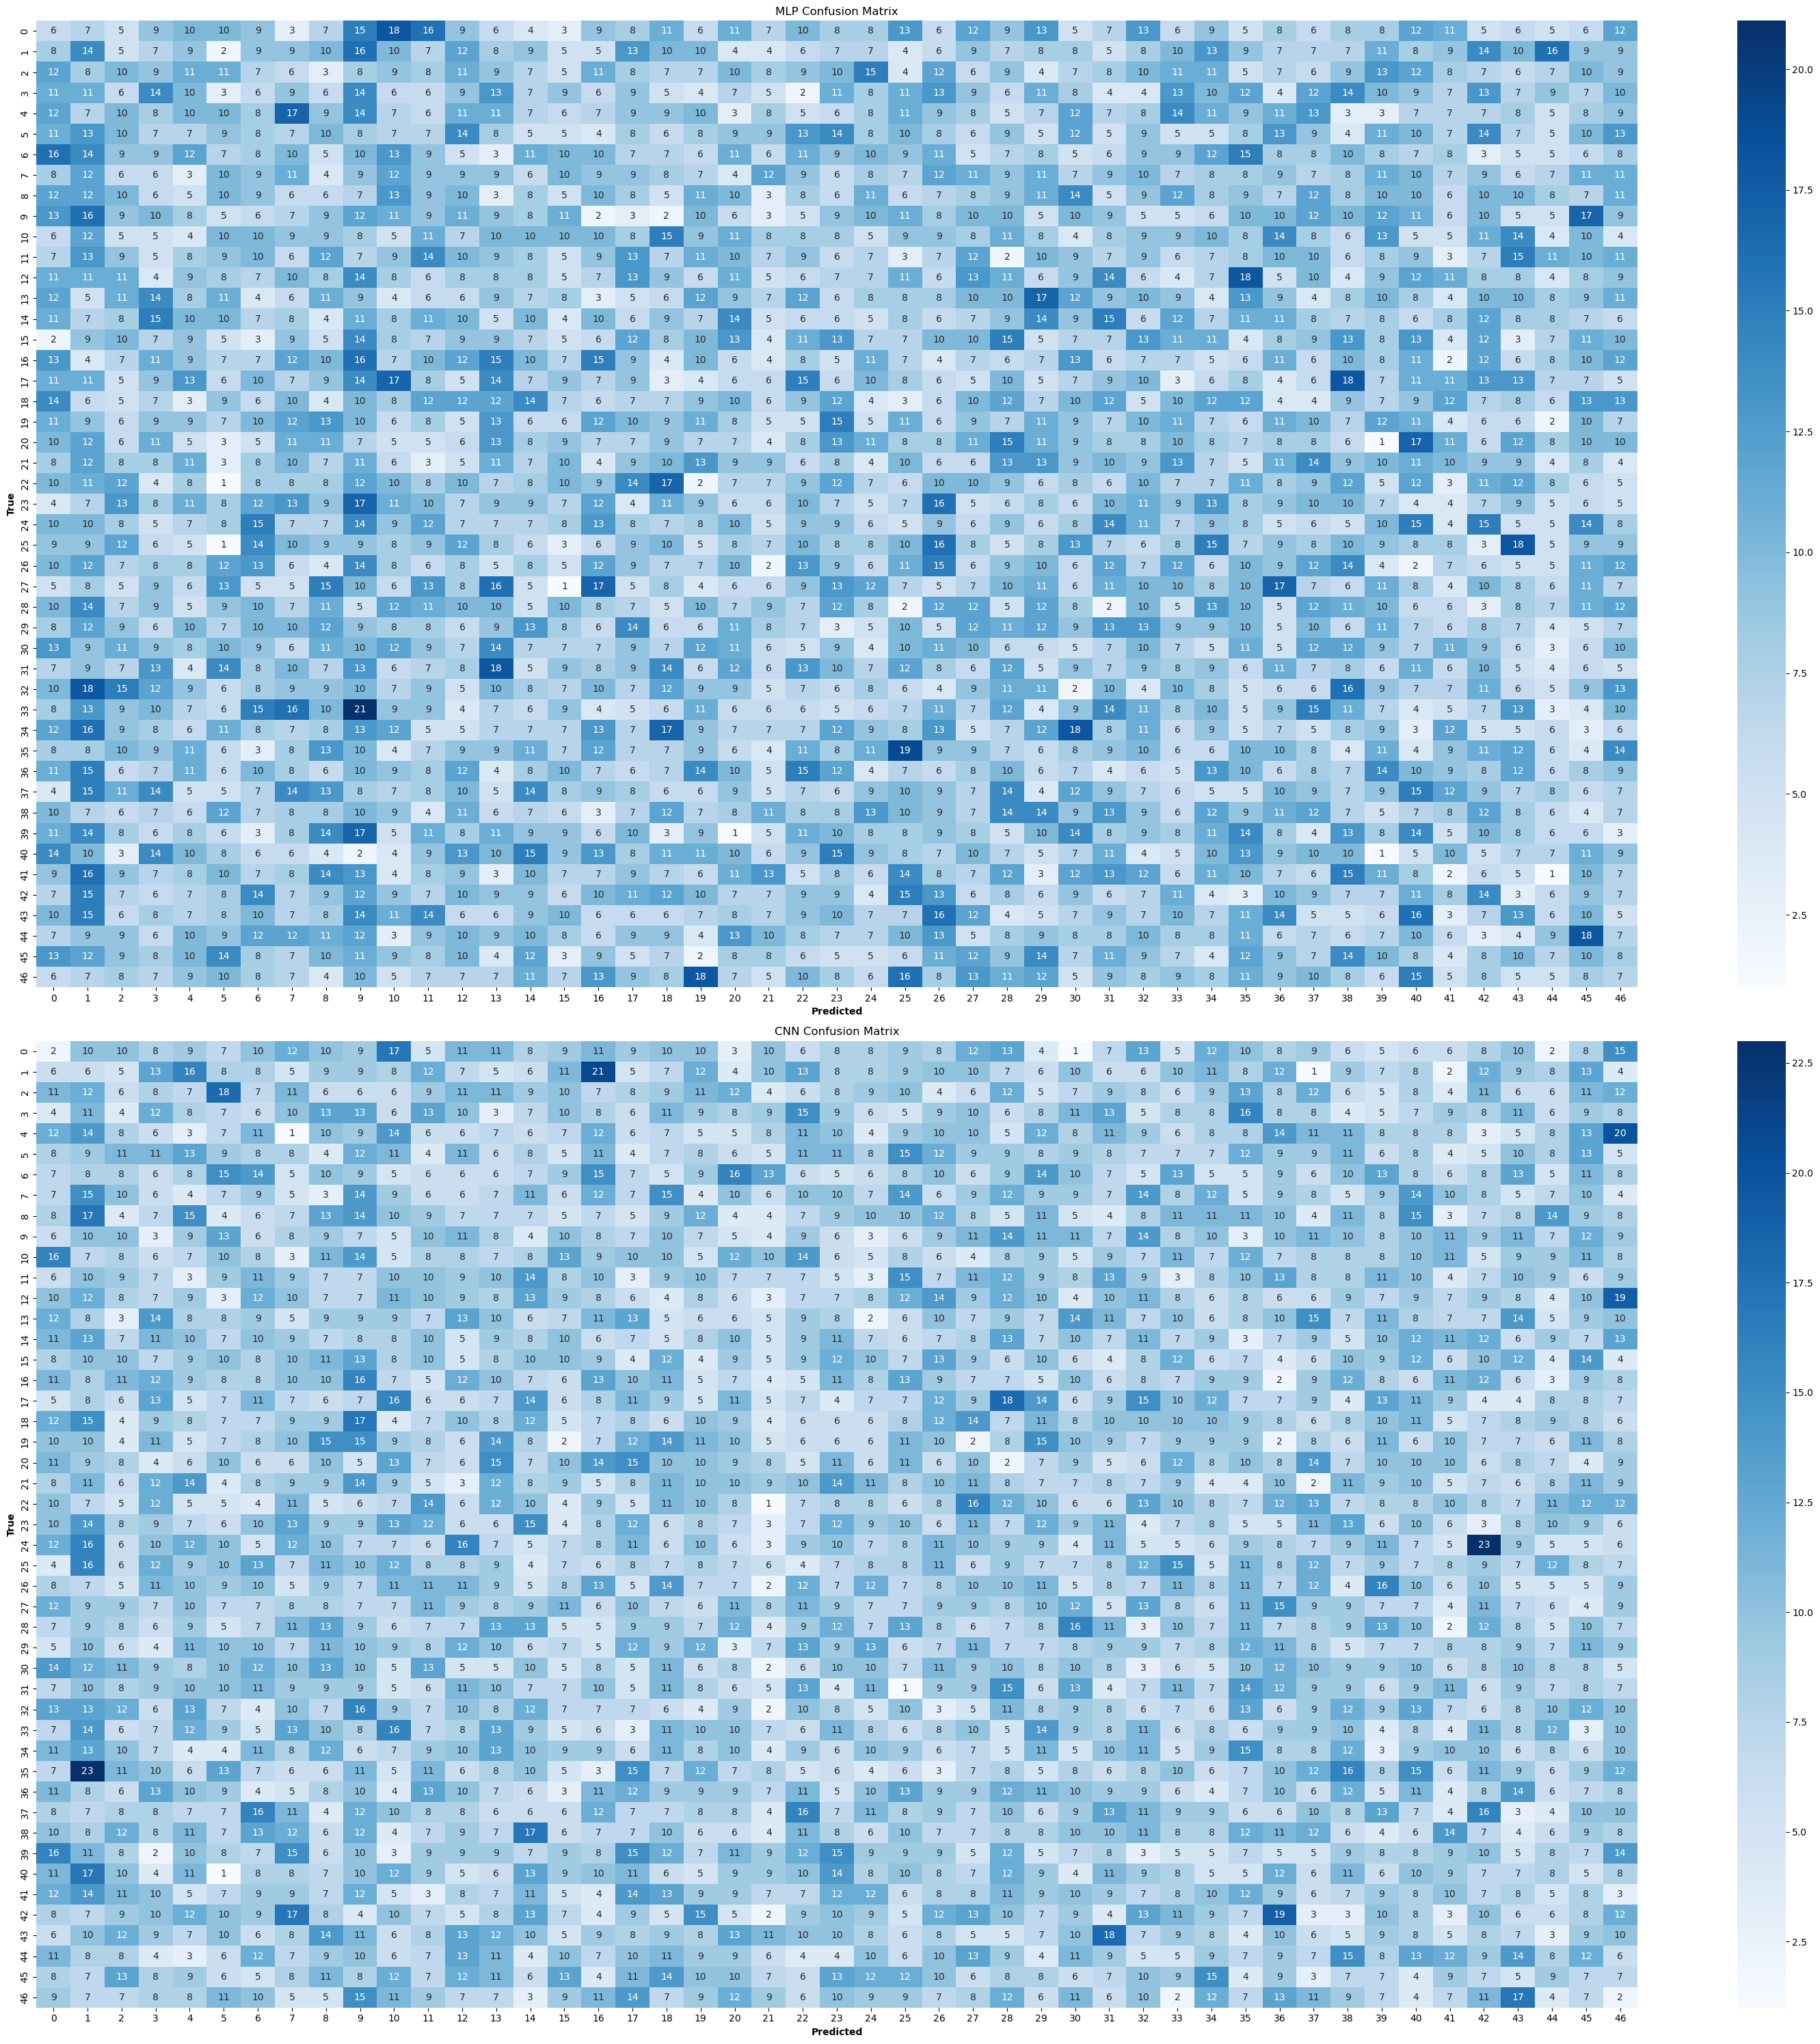

In [66]:
# plot confusion matrices
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 30))

# MLP confusion matrix
sns.heatmap(mlp_cm, annot=True, fmt='g', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted', weight='bold')
ax1.set_ylabel('True', weight='bold')
ax1.set_title('MLP Confusion Matrix')

# CNN confusion matrix
sns.heatmap(cnn_cm, annot=True, fmt='g', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted', weight='bold')
ax2.set_ylabel('True', weight='bold')
ax2.set_title('CNN Confusion Matrix')

plt.tight_layout()
plt.show()

#### 4. Summarize the performance of two models using accuracy; please also report the precision, recall and F1 score of MLP and CNNs

In [94]:
# Set the model to evaluation mode
mlp_model.eval()

# Define the lists to store the true and predicted labels
true_labels = []
pred_labels = []

# Loop through the test data and generate predictions
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Generate predictions
        outputs = mlp_model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append the true and predicted labels to the lists
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Print the classification report
print(classification_report(true_labels, pred_labels))


              precision    recall  f1-score   support

           0       0.61      0.69      0.65       400
           1       0.54      0.70      0.61       400
           2       0.89      0.82      0.85       400
           3       0.94      0.92      0.93       400
           4       0.87      0.87      0.87       400
           5       0.87      0.82      0.85       400
           6       0.89      0.86      0.88       400
           7       0.96      0.96      0.96       400
           8       0.85      0.86      0.85       400
           9       0.63      0.80      0.70       400
          10       0.92      0.92      0.92       400
          11       0.88      0.91      0.90       400
          12       0.92      0.93      0.92       400
          13       0.86      0.88      0.87       400
          14       0.95      0.94      0.95       400
          15       0.65      0.53      0.59       400
          16       0.89      0.88      0.89       400
          17       0.93    

In [95]:
# Set the model to evaluation mode
cnn_model.eval()

# Define the lists to store the true and predicted labels
true_labels = []
pred_labels = []

# Loop through the test data and generate predictions
with torch.no_grad():
    for images, labels in test_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Generate predictions
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append the true and predicted labels to the lists
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Print the classification report
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       400
           1       0.53      0.70      0.60       400
           2       0.90      0.86      0.88       400
           3       0.97      0.96      0.97       400
           4       0.90      0.90      0.90       400
           5       0.91      0.85      0.88       400
           6       0.91      0.92      0.91       400
           7       0.95      0.95      0.95       400
           8       0.89      0.91      0.90       400
           9       0.64      0.78      0.70       400
          10       0.94      0.95      0.95       400
          11       0.95      0.94      0.95       400
          12       0.94      0.93      0.93       400
          13       0.89      0.90      0.89       400
          14       0.96      0.97      0.96       400
          15       0.66      0.57      0.61       400
          16       0.91      0.91      0.91       400
          17       0.95    